In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm
import sys
sys.path.append("../../")
from src.tdvp import mps
from src.tdvp import tebd
from src.tdvp import tdvp
from src.tdvp import tfi_model

In this notebook we will compare the time evolution of the two-site Time Dependent Variational Principle (TDVP) method with standard Time Evolving Block Decimation (TEBD), using the transverse field ising model (TFI) as an example.

# TEBD

In [3]:
L = 14

In [4]:
MPS_all_spin_up = mps.init_spinup_MPS(L)

In [5]:
sigma_z = np.array([[1.0, 0.0], [0.0, -1.0]])
sigma_x = np.array([[0.0, 1.0], [1.0, 0.0]])

In [6]:
J = 1.
g = 1.5
chi_max = 10
eps = 1.e-10
dts_compare = [0.1, 0.01]
t_stop = 10*J

In [7]:
ms_compare = [[] for i in range(len(dts_compare))]
entropies_compare = [[] for i in range(len(dts_compare))]

model = tfi_model.TFIModel(L, J, g)

for i, dt in enumerate(dts_compare):
    start = time.time()
    print("computing for dt =", dt)
    N = (int)(np.ceil(t_stop/dt))
    U_bonds = tebd.calc_U_bonds(model, dt*1.j) # imagingary t for real time evolution!
    psi = MPS_all_spin_up.copy()
    for _ in range(N):
        tebd.run_TEBD(psi, U_bonds, N_steps=1, chi_max=chi_max, eps=eps)
        ms_compare[i].append(np.sum(psi.site_expectation_value(sigma_z)))
        entropies_compare[i].append(psi.entanglement_entropy()[L//2])
    end = time.time()
    print("took", end-start, "seconds!")

computing for dt = 0.1
[0.99508817 0.09899264]
[0.99504164 0.09945921]
[0.99504164 0.09945921]
[0.99504164 0.09945921]
[0.99504164 0.09945921]
[0.99504164 0.09945921]
[0.99508817 0.09899264]
[9.95040909e-01 9.94665222e-02 7.30925695e-06 7.30649727e-07]
[9.95040906e-01 9.94665562e-02 7.34336100e-06 7.34059098e-07]
[9.95040906e-01 9.94665562e-02 7.34336100e-06 7.34059098e-07]
[9.95040906e-01 9.94665562e-02 7.34336100e-06 7.34059098e-07]
[9.95040906e-01 9.94665562e-02 7.34336100e-06 7.34059098e-07]
[9.95040909e-01 9.94665222e-02 7.30925695e-06 7.30649727e-07]
[0.98212498 0.18822995]
[9.81943437e-01 1.89174743e-01 5.31658808e-05 1.02425878e-05
 3.90683950e-11 7.52665919e-12 2.11530216e-15 4.07519874e-16]
[9.81943437e-01 1.89174743e-01 5.31658846e-05 1.02425885e-05
 3.92506937e-11 7.56177966e-12 2.12517227e-15 4.09421449e-16]
[9.81943437e-01 1.89174743e-01 5.31658846e-05 1.02425885e-05
 3.92506937e-11 7.56177966e-12 2.12517227e-15 4.09421449e-16]
[9.81943437e-01 1.89174743e-01 5.31658846e-0

[0.8826561  0.31952174 0.28358809 0.15279022 0.10053202 0.05381592
 0.04278518 0.01495302]
[0.94511603 0.32673489]
[0.90736319 0.35178763 0.21500519 0.08191623]
[8.65002876e-01 3.13310065e-01 2.90425943e-01 2.12018725e-01
 1.03175825e-01 7.47616984e-02 6.72422746e-02 5.14967608e-02
 2.22243088e-02 1.77159045e-02 8.87697045e-03 2.99844968e-03
 1.91049782e-03 6.28266990e-04 2.12404247e-04 5.37466593e-05]
[8.55792689e-01 3.16098007e-01 3.03919461e-01 2.08847579e-01
 1.11052862e-01 7.81415505e-02 7.60375977e-02 7.01649304e-02
 3.25847428e-02 2.69730194e-02 2.26403611e-02 9.44744865e-03
 8.61390431e-03 7.75555776e-03 5.06869604e-03 3.58531896e-03
 2.59114249e-03 1.77888546e-03 1.14516349e-03 3.74591616e-04]
[8.55792689e-01 3.16098007e-01 3.03919461e-01 2.08847579e-01
 1.11052862e-01 7.81415505e-02 7.60375977e-02 7.01649304e-02
 3.25847428e-02 2.69730194e-02 2.26403611e-02 9.44744865e-03
 8.61390431e-03 7.75555776e-03 5.06869604e-03 3.58531896e-03
 2.59114249e-03 1.77888546e-03 1.14516349e-0

[8.52267353e-01 3.01780193e-01 2.80971936e-01 2.16710458e-01
 1.46335135e-01 1.44880611e-01 7.46447997e-02 6.98967987e-02
 4.86800092e-02 3.55340217e-02 1.06384817e-02 5.80943772e-03
 3.03643132e-03 2.55442570e-03 1.48883485e-03 1.03006061e-03
 7.83314518e-04 2.33416220e-04 4.42757527e-05 1.55162250e-05]
[8.67135178e-01 3.01831037e-01 2.74094134e-01 2.22952265e-01
 1.44020242e-01 6.99093996e-02 5.70390459e-02 5.01787494e-02
 2.18349070e-02 1.45383327e-02 4.53574553e-03 3.59045824e-03
 3.03334022e-03 2.35741518e-03 1.45398385e-03 5.33101807e-04
 3.51341133e-04 1.89122627e-04 1.05557311e-04 3.13281841e-05]
[0.89549343 0.32252187 0.27547805 0.11293356 0.06424782 0.03115571
 0.01732529 0.00551322]
[0.94946175 0.31388277]
[0.92946783 0.32108739 0.17570175 0.04605798]
[8.83251929e-01 3.00717580e-01 2.78080475e-01 2.06578094e-01
 6.74995965e-02 5.20676100e-02 3.38942961e-02 2.41999539e-02
 1.77491294e-02 1.02084701e-02 2.21246635e-03 1.91400198e-03
 1.10022905e-03 9.51402126e-04 2.20562741e-0

[9.63756158e-01 1.52191784e-01 1.21806786e-01 1.10938590e-01
 9.71948085e-02 8.58140877e-02 4.42291109e-02 2.84229118e-02
 2.83230371e-02 1.87017934e-02 9.38337420e-03 5.22032717e-03
 3.75669381e-03 2.47564369e-03 2.00863592e-03 1.10318652e-03
 6.60016107e-04 2.90066631e-04 6.30215478e-05 5.30867742e-05]
[9.70762861e-01 1.54889856e-01 1.15304611e-01 1.07540026e-01
 7.24438631e-02 3.90105847e-02 3.78145379e-02 1.83062743e-02
 1.39839673e-02 4.95227743e-03 3.22702214e-03 1.28747868e-03
 9.91225665e-04 4.37274442e-04 3.94575394e-04 3.38098244e-04]
[0.98074059 0.14382317 0.12866286 0.03014395]
[0.98273901 0.18499742]
[0.9755467  0.15726719 0.12850803 0.05797241 0.05779143 0.01537101
 0.00827539 0.0074799 ]
[9.68427976e-01 1.41047689e-01 1.26252110e-01 1.04568770e-01
 8.15110230e-02 7.82628947e-02 3.77480102e-02 2.65663357e-02
 1.57491177e-02 1.34913321e-02 5.33741189e-03 2.83864018e-03
 2.80999692e-03 1.70230655e-03 9.68967345e-04 5.67511021e-04
 4.64675967e-04 1.88232256e-04 1.66013577e-0

[0.99758648 0.06943496]
[9.97586160e-01 6.94395721e-02 1.68724637e-06 1.17359047e-07]
[9.97586160e-01 6.94395722e-02 1.68729787e-06 1.17362626e-07
 4.20475266e-13 2.91388564e-14 7.08781043e-19 4.90896920e-20]
[9.97586160e-01 6.94395722e-02 1.68729787e-06 1.17362626e-07
 4.20475267e-13 2.91388537e-14 7.08825928e-19 4.90900399e-20]
[9.97586160e-01 6.94395722e-02 1.68729787e-06 1.17362626e-07
 4.20475269e-13 2.91388577e-14 7.08782104e-19 4.90896530e-20]
[9.97586160e-01 6.94395722e-02 1.68729787e-06 1.17362626e-07
 4.20475271e-13 2.91388586e-14 7.08780012e-19 4.90896006e-20]
[9.97586160e-01 6.94395721e-02 1.68724637e-06 1.17359047e-07]
[0.99686225 0.07915593]
[9.96861847e-01 7.91609625e-02 2.00316003e-06 1.59060908e-07
 9.27948174e-13 7.36536572e-14 1.85368860e-18 1.47351491e-19]
[9.96861847e-01 7.91609625e-02 2.00316003e-06 1.59060908e-07
 9.27975576e-13 7.36558338e-14 1.85377903e-18 1.47355262e-19]
[9.96861847e-01 7.91609625e-02 2.00316003e-06 1.59060908e-07
 9.27975569e-13 7.36558387e-1

[0.95047982 0.31069809 0.00703705 0.00230031]
[0.95087931 0.30956184]
[9.49361604e-01 3.14090499e-01 7.33575516e-03 2.42698987e-03
 3.76160075e-06 1.24442480e-06 2.88332558e-08 9.34063691e-09]
[9.49361601e-01 3.14090506e-01 7.33577066e-03 2.42699506e-03
 3.76547475e-06 1.24570622e-06 2.88632864e-08 9.35036012e-09
 7.10318672e-11 2.34873642e-11 5.26790238e-13 1.61851688e-13
 2.50636132e-16 7.73686610e-17 1.58618180e-18 4.48414058e-19]
[9.49361601e-01 3.14090506e-01 7.33577066e-03 2.42699506e-03
 3.76547475e-06 1.24570622e-06 2.88632864e-08 9.35036012e-09
 7.10318833e-11 2.34873695e-11 5.26790349e-13 1.61851725e-13
 2.50636191e-16 7.73686798e-17 1.58618220e-18 4.48414184e-19]
[9.49361601e-01 3.14090506e-01 7.33577066e-03 2.42699506e-03
 3.76547475e-06 1.24570622e-06 2.88632864e-08 9.35036012e-09
 7.10318672e-11 2.34873642e-11 5.26790241e-13 1.61851688e-13
 2.50636136e-16 7.73686617e-17 1.58618177e-18 4.48414038e-19]
[9.49361604e-01 3.14090499e-01 7.33575516e-03 2.42698987e-03
 3.76160075

[9.32186494e-01 3.54777058e-01 6.71445925e-02 2.55542868e-02
 3.74144809e-04 1.42394245e-04 2.69491102e-05 1.02563598e-05
 2.23781382e-07 8.50227592e-08 3.50673834e-09 1.33390995e-09
 2.21648289e-11 8.42969303e-12 8.01718409e-12 2.96788799e-12
 1.11729319e-12 4.25119992e-13 1.01687433e-13 3.76185451e-14]
[9.32186494e-01 3.54777058e-01 6.71445925e-02 2.55542868e-02
 3.74144800e-04 1.42394241e-04 2.69491095e-05 1.02563595e-05
 2.23779584e-07 8.50220776e-08 3.50669989e-09 1.33389533e-09
 2.21644175e-11 8.42950684e-12 7.99014519e-12 2.95787632e-12
 1.11727796e-12 4.25114196e-13 1.01343248e-13 3.74913225e-14]
[9.32188660e-01 3.54773224e-01 6.71361532e-02 2.55507394e-02
 3.71189796e-04 1.41267757e-04 2.67328436e-05 1.01739223e-05]
[0.94755345 0.31959733]
[0.93175452 0.35584635 0.06740992 0.02574452]
[9.31331592e-01 3.56666293e-01 6.86908370e-02 2.63061045e-02
 3.94658191e-04 1.51139794e-04 2.91080391e-05 1.11472570e-05
 2.48441703e-07 9.49420823e-08 3.93718486e-09 1.50686833e-09
 2.57542381e

[9.24709392e-01 3.28483930e-01 1.81179003e-01 6.43601022e-02
 6.04925103e-03 2.14887151e-03 1.18522954e-03 4.21028386e-04
 1.57088712e-05 5.57776437e-06 4.56921570e-07 1.62152754e-07
 1.86810713e-08 6.63112042e-09 2.52101956e-09 1.60249394e-09
 8.94653580e-10 5.48374924e-10 4.90706859e-11 1.67962997e-11]
[9.24827035e-01 3.28345081e-01 1.80885859e-01 6.42206379e-02
 5.88408986e-03 2.08905221e-03 1.15086199e-03 4.08595268e-04]
[0.95936057 0.2821831 ]
[0.92910722 0.32274529 0.17054494 0.05924244]
[9.24245392e-01 3.29363028e-01 1.81788349e-01 6.47818877e-02
 6.31988290e-03 2.25214620e-03 1.24304280e-03 4.42969357e-04
 1.65755793e-05 5.90561640e-06 4.78409927e-07 1.70347685e-07
 2.03930361e-08 7.26290846e-09 2.75365315e-09 9.80460233e-10]
[9.24244436e-01 3.29364053e-01 1.81790849e-01 6.47830473e-02
 6.32206948e-03 2.25293466e-03 1.24349087e-03 4.43130852e-04
 1.68426028e-05 6.00045005e-06 4.87606413e-07 1.73617830e-07
 2.08261583e-08 7.41676681e-09 2.81576641e-09 1.74860508e-09
 1.00251353e

[9.15315987e-01 2.86184798e-01 2.67950208e-01 8.37779332e-02
 3.52241957e-02 1.10132736e-02 1.03111315e-02 3.22390075e-03
 3.02903214e-04 9.49431124e-05 9.68837924e-06 3.03017347e-06
 1.62617102e-06 5.08281662e-07 3.34117302e-07 1.04357237e-07
 6.63447375e-08 1.98419950e-08 3.48040647e-09 1.04241753e-09]
[9.15347365e-01 2.86156143e-01 2.67893484e-01 8.37489398e-02
 3.51563289e-02 1.09905790e-02 1.02887896e-02 3.21648356e-03
 2.91581821e-04 9.13939986e-05 9.24881453e-06 2.89242228e-06
 1.54603558e-06 4.83200889e-07 3.16669315e-07 9.88980617e-08]
[0.93217323 0.28848993 0.20891688 0.06465581]
[0.95183674 0.30660533]
[0.91606141 0.28470882 0.26741714 0.08311235 0.03371595 0.0104788
 0.00984235 0.00305897]
[9.14604611e-01 2.85998185e-01 2.70236777e-01 8.45034381e-02
 3.58561790e-02 1.12122642e-02 1.05939199e-02 3.31272972e-03
 3.19261253e-04 9.99380225e-05 1.02663009e-05 3.20683500e-06
 1.73818511e-06 5.42669613e-07 3.61521099e-07 1.12789322e-07
 6.85777551e-08 2.04753999e-08 3.62974080e-09

[0.94451362 0.32847227]
[0.9144661  0.30591393 0.23169999 0.09409088 0.0775101  0.03147518
 0.02383997 0.00797494]
[9.07674718e-01 3.13270921e-01 2.40853615e-01 1.04407242e-01
 8.31280994e-02 3.60237317e-02 2.77039430e-02 9.55880138e-03
 2.99990801e-03 8.50974637e-04 8.03704031e-05 3.60607369e-05
 2.28651955e-05 1.07711581e-05 8.34949730e-06 2.49606856e-06
 1.19216867e-06 3.01040054e-07 1.06096020e-07 2.67359366e-08]
[9.07666140e-01 3.13280633e-01 2.40861040e-01 1.04426067e-01
 8.31340023e-02 3.60314880e-02 2.77100001e-02 9.56122398e-03
 3.00841583e-03 8.53514164e-04 8.06907769e-05 3.62346627e-05
 2.29603356e-05 1.08265899e-05 8.39194504e-06 2.50955716e-06
 1.26899155e-06 3.20608644e-07 1.12852705e-07 2.84528299e-08]
[9.07674718e-01 3.13270921e-01 2.40853615e-01 1.04407242e-01
 8.31280994e-02 3.60237317e-02 2.77039430e-02 9.55880138e-03
 2.99990801e-03 8.50974637e-04 8.03704031e-05 3.60607369e-05
 2.28651955e-05 1.07711581e-05 8.34949730e-06 2.49606856e-06
 1.19216867e-06 3.01040054e-0

[8.97703216e-01 3.30749331e-01 1.98287338e-01 1.82826150e-01
 7.30652986e-02 6.72889319e-02 4.03611407e-02 1.57617700e-02
 1.48563495e-02 5.08941940e-03 2.70421102e-04 2.21109849e-04
 9.35833345e-05 7.54052611e-05 4.76690118e-05 1.70098335e-05
 1.11838008e-05 2.98176536e-06 1.22981915e-06 3.20121386e-07]
[8.97596962e-01 3.30844852e-01 1.98377146e-01 1.82993358e-01
 7.31282930e-02 6.73750617e-02 4.04186433e-02 1.58898672e-02
 1.48830070e-02 5.13509289e-03 2.73571163e-04 2.24562129e-04
 9.48132013e-05 7.65964271e-05 4.84489445e-05 1.73017425e-05
 1.24541520e-05 3.33630548e-06 1.36476313e-06 3.56931865e-07]
[8.97703216e-01 3.30749331e-01 1.98287338e-01 1.82826150e-01
 7.30652986e-02 6.72889319e-02 4.03611407e-02 1.57617700e-02
 1.48563495e-02 5.08941940e-03 2.70421102e-04 2.21109849e-04
 9.35833345e-05 7.54052611e-05 4.76690118e-05 1.70098335e-05
 1.11838008e-05 2.98176536e-06 1.22981915e-06 3.20121386e-07]
[0.91328963 0.3164934  0.20028976 0.13310884 0.06940858 0.04612869
 0.0291936  0.0

[0.90677377 0.31741209 0.24542452 0.08827612 0.08590497 0.03091164
 0.02405896 0.0084258 ]
[0.9431523  0.33236087]
[0.91112584 0.34242263 0.21468181 0.08067317]
[8.93555976e-01 3.29942932e-01 2.36717487e-01 1.47261695e-01
 8.73834792e-02 5.43573842e-02 4.82531217e-02 3.92792480e-02
 1.73644543e-02 1.44954423e-02 7.27234595e-04 3.35947130e-04
 2.66702702e-04 1.23873718e-04 1.08478077e-04 4.04716192e-05]
[8.85887061e-01 3.37094739e-01 2.42461806e-01 1.57841584e-01
 9.21637053e-02 5.99482987e-02 5.65587902e-02 4.32782631e-02
 2.09441631e-02 1.64253190e-02 9.21111084e-04 4.69337915e-04
 3.47832253e-04 1.78150952e-04 1.52211500e-04 9.17208074e-05
 5.81772072e-05 3.15769152e-05 1.42285356e-05 4.83531072e-06]
[8.85887061e-01 3.37094739e-01 2.42461806e-01 1.57841584e-01
 9.21637053e-02 5.99482987e-02 5.65587902e-02 4.32782631e-02
 2.09441631e-02 1.64253190e-02 9.21111084e-04 4.69337915e-04
 3.47832253e-04 1.78150952e-04 1.52211500e-04 9.17208074e-05
 5.81772072e-05 3.15769152e-05 1.42285356e-0

[8.72844750e-01 3.33549830e-01 2.78273294e-01 1.28793319e-01
 1.22675658e-01 1.06604527e-01 4.85383559e-02 4.67223354e-02
 4.07599894e-02 1.56214134e-02 1.77388001e-03 7.27196568e-04
 6.70227259e-04 5.24298070e-04 2.80796220e-04 2.62592934e-04
 1.93234914e-04 1.25326178e-04 1.00885247e-04 4.56675941e-05]
[8.76243946e-01 3.30720715e-01 2.75570654e-01 1.27930123e-01
 1.16461525e-01 1.04316022e-01 4.81487272e-02 4.38337841e-02
 3.99454265e-02 1.51922052e-02 1.62274645e-03 6.75718709e-04
 6.08257308e-04 4.14697676e-04 2.51911876e-04 2.41156366e-04
 1.49767485e-04 1.01514628e-04 8.68420030e-05 3.52933101e-05]
[0.89016159 0.31714648 0.28190526 0.11859531 0.10042398 0.04217336
 0.03805652 0.01353354]
[0.94327299 0.33201817]
[0.91049912 0.34576828 0.21203803 0.08047064]
[8.87375486e-01 3.20567326e-01 2.68103470e-01 1.34687916e-01
 9.70602240e-02 7.44198372e-02 4.88089244e-02 3.90063396e-02
 2.67828642e-02 1.41386793e-02 8.21663675e-04 4.39198657e-04
 2.96051523e-04 1.58088572e-04 1.34736357e-0

[8.67942796e-01 3.18388212e-01 2.89672638e-01 1.85923784e-01
 1.06988923e-01 8.54453505e-02 6.82811953e-02 4.61297995e-02
 3.15516234e-02 1.69794393e-02 1.35482804e-03 1.15328494e-03
 9.49530850e-04 4.72948067e-04 4.24557756e-04 3.43563838e-04
 2.91835324e-04 2.11268034e-04 1.02772418e-04 7.65277255e-05]
[8.60313529e-01 3.23663010e-01 2.97447020e-01 1.90298282e-01
 1.12706483e-01 9.72447767e-02 7.05452010e-02 4.19579237e-02
 3.56222515e-02 1.54815399e-02 2.06512562e-03 1.74363127e-03
 9.61908593e-04 7.74130985e-04 6.21394453e-04 4.67638304e-04
 3.48401212e-04 3.32431082e-04 1.67860119e-04 1.22644989e-04]
[8.67942796e-01 3.18388212e-01 2.89672638e-01 1.85923784e-01
 1.06988923e-01 8.54453505e-02 6.82811953e-02 4.61297995e-02
 3.15516234e-02 1.69794393e-02 1.35482804e-03 1.15328494e-03
 9.49530850e-04 4.72948067e-04 4.24557756e-04 3.43563838e-04
 2.91835324e-04 2.11268034e-04 1.02772418e-04 7.65277255e-05]
[0.88027814 0.32041923 0.28810157 0.15156199 0.10486998 0.05425467
 0.04732792 0.0

[0.90946785 0.34721081 0.21369266 0.08153736]
[0.9433066  0.33192268]
[0.88181284 0.32102308 0.28768762 0.14783301 0.10472178 0.05245064
 0.03000107 0.01066555]
[8.59035447e-01 3.13726083e-01 2.84735738e-01 2.27405499e-01
 1.04282768e-01 8.27828314e-02 8.14259769e-02 6.95706971e-02
 3.05276259e-02 2.66645783e-02 1.52659565e-03 1.49070113e-03
 5.71525401e-04 5.22315475e-04 2.65151237e-04 1.00717621e-04
 9.82798568e-05 4.01993510e-05 2.59500036e-05 1.00757938e-05]
[8.49633700e-01 3.11133999e-01 3.08032280e-01 2.30183122e-01
 1.13267366e-01 8.43227725e-02 8.23259443e-02 5.59651398e-02
 5.02114151e-02 3.27508498e-02 1.42218652e-03 1.38878767e-03
 1.10602506e-03 8.60703656e-04 6.44916275e-04 5.29415812e-04
 2.78810701e-04 2.03776676e-04 1.87116745e-04 3.48118002e-05]
[8.59035447e-01 3.13726083e-01 2.84735738e-01 2.27405499e-01
 1.04282768e-01 8.27828314e-02 8.14259769e-02 6.95706971e-02
 3.05276259e-02 2.66645783e-02 1.52659565e-03 1.49070113e-03
 5.71525401e-04 5.22315475e-04 2.65151237e-0

[8.38944630e-01 3.13627185e-01 2.89221029e-01 2.52254655e-01
 1.34849851e-01 1.08482798e-01 9.25355433e-02 7.73793383e-02
 6.43453893e-02 4.33460146e-02 2.02018452e-03 9.65222575e-04
 6.55810789e-04 6.14197571e-04 4.96009358e-04 1.16673291e-04
 6.24717737e-05 5.33046294e-05 1.74690046e-05 1.72680315e-05]
[8.38944630e-01 3.13627185e-01 2.89221029e-01 2.52254655e-01
 1.34849851e-01 1.08482798e-01 9.25355433e-02 7.73793383e-02
 6.43453893e-02 4.33460146e-02 2.02018452e-03 9.65222575e-04
 6.55810789e-04 6.14197571e-04 4.96009358e-04 1.16673291e-04
 6.24717737e-05 5.33046294e-05 1.74690046e-05 1.72680315e-05]
[8.53692579e-01 3.12975117e-01 2.91274488e-01 2.30789329e-01
 1.11066241e-01 1.05985955e-01 8.18403309e-02 5.60233823e-02
 3.69858644e-02 1.93925940e-02 1.20546723e-03 4.15275056e-04
 3.82244189e-04 1.31061156e-04 7.87032115e-05 2.66479896e-05]
[0.90971852 0.34678771 0.21358743 0.08081398]
[0.94333759 0.33183459]
[0.88121156 0.32095784 0.28868119 0.14916919 0.10517129 0.05268898
 0.030

[8.24765695e-01 3.14755681e-01 2.76750445e-01 2.72191523e-01
 1.86749512e-01 1.07277485e-01 1.00199604e-01 8.06549489e-02
 6.41040753e-02 5.44449339e-02 2.22737242e-03 1.28846536e-03
 9.87142145e-04 7.02743967e-04 6.48228090e-04 4.51277697e-04
 2.04941120e-04 1.22616467e-04 4.38190163e-05 8.60631635e-06]
[8.32490204e-01 3.19144898e-01 2.73429916e-01 2.65013545e-01
 1.78430409e-01 1.02883691e-01 9.70994225e-02 7.01284451e-02
 5.13250851e-02 2.64879365e-02 1.87456845e-03 9.56451062e-04
 9.53682809e-04 5.75943632e-04 2.67717502e-04 2.56993680e-04
 1.90222483e-04 1.14745939e-04 4.78787268e-05 2.68965742e-05]
[0.88002845 0.32123282 0.28820616 0.15215504 0.10488652 0.0544193
 0.04400582 0.01569416]
[0.94323869 0.3321156 ]
[0.9104102  0.34487287 0.21474127 0.07811628]
[8.59031598e-01 3.12148238e-01 2.91120535e-01 2.26448602e-01
 1.05084599e-01 9.13251296e-02 8.06161282e-02 4.02691584e-02
 3.01023742e-02 1.36410188e-02 1.27928651e-03 5.67865149e-04
 4.42033194e-04 2.03572040e-04 1.06888331e-04

[8.19639697e-01 3.18159233e-01 2.89241233e-01 2.47338258e-01
 2.19741275e-01 1.09861464e-01 9.80133857e-02 7.60400230e-02
 6.70923824e-02 4.32582383e-02 2.24403959e-03 1.84057696e-03
 1.04560216e-03 1.01049194e-03 7.77248049e-04 5.35730694e-04
 3.25723570e-04 2.78943470e-04 8.90704912e-05 6.32598984e-05]
[8.19639697e-01 3.18159233e-01 2.89241233e-01 2.47338258e-01
 2.19741275e-01 1.09861464e-01 9.80133857e-02 7.60400230e-02
 6.70923824e-02 4.32582383e-02 2.24403959e-03 1.84057696e-03
 1.04560216e-03 1.01049194e-03 7.77248049e-04 5.35730694e-04
 3.25723570e-04 2.78943470e-04 8.90704912e-05 6.32598984e-05]
[8.58010652e-01 3.13322215e-01 2.90157327e-01 2.30951133e-01
 1.07129436e-01 8.29246990e-02 7.24533901e-02 5.96656366e-02
 2.26524735e-02 2.09688458e-02 1.21643455e-03 3.89481630e-04
 1.80795974e-04 1.00974118e-04 5.73551384e-05 3.91502091e-05]
[0.9115721  0.34391327 0.21271114 0.07425592]
[0.94336225 0.33176448]
[0.88120559 0.32038396 0.28985333 0.1488924  0.10362237 0.05314606
 0.031

[8.16381506e-01 3.14342557e-01 2.88854272e-01 2.36425146e-01
 2.28270665e-01 1.15959462e-01 1.15197862e-01 9.85602442e-02
 6.31589146e-02 5.32788762e-02 2.12203439e-03 1.51957361e-03
 1.09768746e-03 9.87391089e-04 7.10398897e-04 4.11430127e-04
 3.73195410e-04 2.89502277e-04 9.05630077e-05 7.85962579e-05]
[8.53307114e-01 3.16393996e-01 2.89821249e-01 2.29276109e-01
 1.13236823e-01 1.00715611e-01 7.91495676e-02 6.77211805e-02
 2.87845305e-02 2.34788978e-02 9.80920783e-04 3.32790273e-04
 9.31899591e-05 6.10537502e-05 2.82213314e-05 1.86479189e-05]
[0.91050326 0.34451542 0.21526827 0.0771525 ]
[0.94350078 0.3313703 ]
[0.88501244 0.31752649 0.28633168 0.14518013 0.10057659 0.04903653
 0.01736878 0.00670045]
[8.36735129e-01 3.16625862e-01 2.74772455e-01 2.55094658e-01
 1.68706211e-01 1.08950404e-01 1.01049734e-01 6.83643918e-02
 4.72698255e-02 3.99225552e-02 1.50218228e-03 8.96824762e-04
 7.72977172e-04 5.30986850e-04 4.84520568e-04 1.88411358e-04
 1.45854910e-04 7.64844666e-05 3.35118286e-0

[0.94387307 0.3303084 ]
[0.8885709  0.31712379 0.28226507 0.13072494 0.10102305 0.03977923
 0.03418823 0.01244169]
[8.32749454e-01 3.16441856e-01 2.70951636e-01 2.57287209e-01
 1.77676095e-01 1.22459483e-01 1.01459044e-01 7.63279896e-02
 5.11178717e-02 3.84880952e-02 9.45585430e-04 7.42362521e-04
 5.07795418e-04 4.84497836e-04 2.03261374e-04 1.63546920e-04
 7.47205903e-05 3.67914746e-05 9.59359888e-06 4.85358105e-06]
[8.05612385e-01 3.09483535e-01 2.93518027e-01 2.51506220e-01
 2.20380906e-01 1.49169910e-01 1.19785157e-01 9.75963391e-02
 8.12611096e-02 6.70253928e-02 2.06327271e-03 1.65186836e-03
 1.54161119e-03 9.81593200e-04 8.74582184e-04 6.56115782e-04
 3.35050129e-04 2.63769486e-04 8.42003648e-05 2.19308782e-05]
[8.32749454e-01 3.16441856e-01 2.70951636e-01 2.57287209e-01
 1.77676095e-01 1.22459483e-01 1.01459044e-01 7.63279896e-02
 5.11178717e-02 3.84880952e-02 9.45585430e-04 7.42362521e-04
 5.07795418e-04 4.84497836e-04 2.03261374e-04 1.63546920e-04
 7.47205903e-05 3.67914746e-0

[0.88441318 0.32111129 0.28645705 0.13613398 0.10732951 0.04054475
 0.02806564 0.01263245]
[8.32319365e-01 3.13170318e-01 2.69358555e-01 2.60583672e-01
 1.80525200e-01 1.28299213e-01 9.73463548e-02 7.05133632e-02
 5.18944429e-02 5.01761683e-02 9.10202426e-04 7.41851314e-04
 5.11458443e-04 3.17058664e-04 1.70100917e-04 6.71707190e-05
 6.33447978e-05 5.03500955e-05 9.09673594e-06 6.80499643e-06]
[8.04902325e-01 3.12620195e-01 2.86605023e-01 2.48324689e-01
 2.10651118e-01 1.67248930e-01 1.25577856e-01 1.03210292e-01
 8.34142657e-02 6.96925526e-02 1.95269107e-03 1.88247425e-03
 9.77432972e-04 9.57246972e-04 5.54403158e-04 5.14096808e-04
 4.31895580e-04 1.74713288e-04 4.20231393e-05 8.80475265e-06]
[8.32319365e-01 3.13170318e-01 2.69358555e-01 2.60583672e-01
 1.80525200e-01 1.28299213e-01 9.73463548e-02 7.05133632e-02
 5.18944429e-02 5.01761683e-02 9.10202426e-04 7.41851314e-04
 5.11458443e-04 3.17058664e-04 1.70100917e-04 6.71707190e-05
 6.33447978e-05 5.03500955e-05 9.09673594e-06 6.80499

[8.16450425e-01 3.17594688e-01 2.73983802e-01 2.39638920e-01
 1.91399325e-01 1.57659219e-01 1.31917126e-01 1.07375989e-01
 8.12661252e-02 5.48974803e-02 1.81415328e-03 1.49283447e-03
 1.25670633e-03 9.38646665e-04 5.94827741e-04 3.28986069e-04
 3.12182011e-04 2.54045993e-04 1.13538494e-05 3.36537667e-06]
[8.35053421e-01 3.16642617e-01 2.71104686e-01 2.62317587e-01
 1.70489259e-01 1.17988002e-01 8.84880338e-02 6.52446100e-02
 6.20579162e-02 3.44414227e-02 1.22077498e-03 8.91415984e-04
 6.39675372e-04 2.54424768e-04 2.30828220e-04 8.38278213e-05
 7.96675935e-05 3.68676340e-05 3.55795034e-06 1.73941481e-06]
[0.88315272 0.32654671 0.28534861 0.13684577 0.10661783 0.03763383
 0.01868741 0.01118208]
[0.94277788 0.33342147]
[0.91399036 0.3422154  0.20635795 0.07018998]
[8.61277173e-01 3.13929858e-01 2.85722499e-01 2.24917018e-01
 1.12160290e-01 8.17061416e-02 7.05516804e-02 4.84744903e-02
 2.38270526e-02 1.65404262e-02 3.21874797e-04 2.59206856e-04
 1.48280040e-04 1.09433428e-04 6.33081959e-0

[0.94265093 0.33378022]
[0.88923584 0.32488924 0.28025769 0.11855947 0.09754357 0.0311768
 0.02104575 0.01327477]
[8.39300918e-01 3.24424120e-01 2.65640785e-01 2.62008893e-01
 1.60209800e-01 1.11346752e-01 7.78576198e-02 6.34685935e-02
 4.12991644e-02 3.52934517e-02 9.74027823e-04 8.97630638e-04
 7.46503846e-04 3.92678107e-04 3.58982141e-04 2.11658189e-04
 1.61506393e-04 8.28692661e-05 1.84825128e-05 1.44665602e-05]
[8.29190553e-01 3.17396209e-01 2.68741751e-01 2.42262999e-01
 1.80914510e-01 1.30147721e-01 1.09191967e-01 1.07072482e-01
 7.51478656e-02 4.55795547e-02 1.98024100e-03 1.47290278e-03
 1.05625254e-03 8.80142065e-04 5.49545876e-04 3.64947173e-04
 3.54309770e-04 2.17144920e-04 6.28772291e-05 4.88726015e-05]
[8.39300918e-01 3.24424120e-01 2.65640785e-01 2.62008893e-01
 1.60209800e-01 1.11346752e-01 7.78576198e-02 6.34685935e-02
 4.12991644e-02 3.52934517e-02 9.74027823e-04 8.97630638e-04
 7.46503846e-04 3.92678107e-04 3.58982141e-04 2.11658189e-04
 1.61506393e-04 8.28692661e-05

[0.94421939 0.3293171 ]
[0.89086393 0.32095111 0.28194561 0.11914235 0.08926607 0.03402441
 0.01891812 0.01340284]
[8.42016119e-01 3.25548475e-01 2.65877102e-01 2.52617713e-01
 1.56539034e-01 1.10744757e-01 8.20769624e-02 6.79128511e-02
 3.77726605e-02 3.12074080e-02 1.16488062e-03 6.05388862e-04
 5.25302171e-04 4.71916482e-04 3.13160452e-04 1.93819901e-04
 9.80450655e-05 7.78058084e-05 2.77282092e-05 1.89314231e-05]
[8.37304789e-01 3.14244403e-01 2.63517894e-01 2.51081946e-01
 1.74854391e-01 1.14271677e-01 1.07114413e-01 7.62717596e-02
 6.86540789e-02 4.51633218e-02 2.00023455e-03 1.84748338e-03
 1.46530144e-03 8.74815574e-04 7.35447328e-04 4.27857766e-04
 4.03306353e-04 1.64185331e-04 1.10155336e-04 9.03703772e-05]
[8.42016119e-01 3.25548475e-01 2.65877102e-01 2.52617713e-01
 1.56539034e-01 1.10744757e-01 8.20769624e-02 6.79128511e-02
 3.77726605e-02 3.12074080e-02 1.16488062e-03 6.05388862e-04
 5.25302171e-04 4.71916482e-04 3.13160452e-04 1.93819901e-04
 9.80450655e-05 7.78058084e-0

[0.88818085 0.32216434 0.28974393 0.12145114 0.08290457 0.03744367
 0.0164861  0.00979776]
[0.94573339 0.32494362]
[0.91609083 0.34795925 0.19338608 0.0479976 ]
[8.65553831e-01 3.12500863e-01 2.91204444e-01 2.20974372e-01
 9.83765423e-02 7.40236102e-02 4.81743772e-02 3.84817665e-02
 1.97121260e-02 1.34787019e-02 7.69321632e-04 3.12580504e-04
 2.30713588e-04 1.61652460e-04 7.31151490e-05 4.76313907e-05]
[8.46505659e-01 3.10650748e-01 2.63554878e-01 2.36587055e-01
 1.75128283e-01 1.13219752e-01 8.19236943e-02 6.65681134e-02
 6.39869581e-02 5.25173960e-02 1.48632302e-03 1.38102632e-03
 8.29225830e-04 8.04962306e-04 4.79169671e-04 2.81904907e-04
 1.94218188e-04 1.55720826e-04 9.69150510e-05 2.71451383e-05]
[8.46505659e-01 3.10650748e-01 2.63554878e-01 2.36587055e-01
 1.75128283e-01 1.13219752e-01 8.19236943e-02 6.65681134e-02
 6.39869581e-02 5.25173960e-02 1.48632302e-03 1.38102632e-03
 8.29225830e-04 8.04962306e-04 4.79169671e-04 2.81904907e-04
 1.94218188e-04 1.55720826e-04 9.69150510e-0

[8.60556442e-01 3.04518091e-01 2.78967554e-01 2.13903121e-01
 1.43375140e-01 1.06378111e-01 7.31063015e-02 5.90865767e-02
 3.56283591e-02 3.39735824e-02 8.56604222e-04 7.48525572e-04
 5.29062989e-04 4.18134656e-04 2.15704165e-04 1.53754918e-04
 7.56903325e-05 6.65455737e-05 2.10588300e-05 5.44337978e-06]
[8.38508419e-01 3.03328207e-01 2.80433185e-01 2.09929897e-01
 1.87860133e-01 1.25647625e-01 1.18717647e-01 8.63226500e-02
 8.01447219e-02 5.59385773e-02 1.67086985e-03 1.33906831e-03
 9.21332483e-04 4.28125691e-04 3.35894023e-04 1.66917625e-04
 5.28068777e-05 2.14988255e-05 1.50942677e-05 5.89196178e-06]
[8.60556442e-01 3.04518091e-01 2.78967554e-01 2.13903121e-01
 1.43375140e-01 1.06378111e-01 7.31063015e-02 5.90865767e-02
 3.56283591e-02 3.39735824e-02 8.56604222e-04 7.48525572e-04
 5.29062989e-04 4.18134656e-04 2.15704165e-04 1.53754918e-04
 7.56903325e-05 6.65455737e-05 2.10588300e-05 5.44337978e-06]
[0.88894901 0.33074959 0.28681855 0.10540632 0.0712702  0.03698872
 0.02205979 0.0

[0.89351043 0.33120269 0.27385728 0.10132865 0.07010048 0.0332158
 0.02340211 0.01065624]
[0.94923693 0.314562  ]
[0.91783618 0.34617364 0.18462194 0.060459  ]
[8.75715927e-01 3.12773846e-01 2.74846166e-01 2.05759232e-01
 9.49331642e-02 5.64044765e-02 5.56804539e-02 3.25492906e-02
 2.75852745e-02 1.73776135e-02 4.92270586e-04 2.84801113e-04
 2.36478231e-04 9.22562576e-05 4.39955059e-05 2.59953751e-05]
[8.49533167e-01 3.03976697e-01 2.68868112e-01 2.11762924e-01
 1.82435800e-01 1.14258563e-01 9.77964065e-02 8.92674970e-02
 6.11289721e-02 3.38810831e-02 1.08316888e-03 7.74415445e-04
 5.93577950e-04 4.60447325e-04 3.56929368e-04 2.81784819e-04
 2.55118311e-04 1.16345803e-04 4.13172370e-05 3.42258814e-05]
[8.49533167e-01 3.03976697e-01 2.68868112e-01 2.11762924e-01
 1.82435800e-01 1.14258563e-01 9.77964065e-02 8.92674970e-02
 6.11289721e-02 3.38810831e-02 1.08316888e-03 7.74415445e-04
 5.93577950e-04 4.60447325e-04 3.56929368e-04 2.81784819e-04
 2.55118311e-04 1.16345803e-04 4.13172370e-05

[8.62690411e-01 3.22386505e-01 2.62034137e-01 2.21628334e-01
 1.30953837e-01 9.26542377e-02 6.59906229e-02 4.51235442e-02
 3.12937908e-02 3.07550863e-02 8.47213801e-04 6.61034737e-04
 3.32870167e-04 2.79466623e-04 1.87642623e-04 1.29669107e-04
 5.82512912e-05 4.24257656e-05 1.36800243e-05 8.78183764e-06]
[8.51032406e-01 3.18135453e-01 2.47897432e-01 2.32702524e-01
 1.38354027e-01 1.09429418e-01 9.81647471e-02 8.27501539e-02
 8.25147651e-02 6.71987932e-02 1.50792609e-03 1.50386712e-03
 5.04073620e-04 3.96995963e-04 3.52085009e-04 2.20551680e-04
 2.04949668e-04 9.56086380e-05 3.68541178e-05 2.40282897e-05]
[8.62690411e-01 3.22386505e-01 2.62034137e-01 2.21628334e-01
 1.30953837e-01 9.26542377e-02 6.59906229e-02 4.51235442e-02
 3.12937908e-02 3.07550863e-02 8.47213801e-04 6.61034737e-04
 3.32870167e-04 2.79466623e-04 1.87642623e-04 1.29669107e-04
 5.82512912e-05 4.24257656e-05 1.36800243e-05 8.78183764e-06]
[0.89995728 0.32688748 0.25609795 0.09648769 0.08156556 0.03358296
 0.01965705 0.0

[0.95145883 0.30777604]
[0.90457813 0.32452971 0.24370097 0.08871697 0.08519652 0.0352189
 0.02221298 0.01287515]
[8.60414154e-01 3.27094675e-01 2.54937385e-01 2.28216150e-01
 1.33453715e-01 1.03581709e-01 6.05097426e-02 4.43896233e-02
 2.82840060e-02 2.54736466e-02 7.60424520e-04 5.12917956e-04
 3.26324729e-04 2.19167953e-04 1.96699310e-04 1.18045215e-04
 4.75937768e-05 2.46031723e-05 5.70525671e-06 4.27852349e-06]
[8.61295589e-01 3.14968459e-01 2.40344037e-01 2.24657296e-01
 1.18572462e-01 1.17116930e-01 8.62709866e-02 7.60636940e-02
 7.55987694e-02 6.32776084e-02 1.86475581e-03 1.00088789e-03
 5.44698823e-04 5.39678560e-04 3.46980378e-04 1.76709002e-04
 1.82926700e-05 1.05621715e-05 4.53459570e-06 2.24630830e-06]
[8.60414154e-01 3.27094675e-01 2.54937385e-01 2.28216150e-01
 1.33453715e-01 1.03581709e-01 6.05097426e-02 4.43896233e-02
 2.82840060e-02 2.54736466e-02 7.60424520e-04 5.12917956e-04
 3.26324729e-04 2.19167953e-04 1.96699310e-04 1.18045215e-04
 4.75937768e-05 2.46031723e-05

[0.90547302 0.32327877 0.24442539 0.08488404 0.08263301 0.03456283
 0.02211252 0.01219073]
[0.95079183 0.30983042]
[0.92983337 0.32748442 0.15832983 0.05563737]
[8.91241725e-01 3.09855512e-01 2.47684374e-01 1.84688845e-01
 9.32517675e-02 4.91416375e-02 4.04692490e-02 2.89097269e-02
 2.07294342e-02 1.43451397e-02 4.38683160e-04 3.52965891e-04
 2.10279255e-04 2.05431315e-04 8.45158221e-05 4.38078513e-05]
[8.71914790e-01 3.06999251e-01 2.55269075e-01 1.99715343e-01
 1.15189980e-01 1.03456360e-01 9.20775012e-02 6.20057941e-02
 4.87858668e-02 4.23106921e-02 9.46731755e-04 8.70259647e-04
 7.02712381e-04 3.08394654e-04 2.48514262e-04 1.53560740e-04
 1.30332352e-04 6.07625234e-05 1.78114360e-05 1.59743303e-05]
[8.71914790e-01 3.06999251e-01 2.55269075e-01 1.99715343e-01
 1.15189980e-01 1.03456360e-01 9.20775012e-02 6.20057941e-02
 4.87858668e-02 4.23106921e-02 9.46731755e-04 8.70259647e-04
 7.02712381e-04 3.08394654e-04 2.48514262e-04 1.53560740e-04
 1.30332352e-04 6.07625234e-05 1.78114360e-0

[0.90941057 0.31165135 0.25112333 0.07937683 0.07052677 0.03281463
 0.01685212 0.01214178]
[0.95531678 0.29558392]
[0.93894454 0.30261111 0.15568448 0.050715  ]
[8.95202797e-01 2.86157044e-01 2.70852754e-01 1.65989970e-01
 9.41998516e-02 5.29758420e-02 5.11221553e-02 2.86219343e-02
 2.15260434e-02 1.53557353e-02 3.96844804e-04 3.10333614e-04
 1.50095793e-04 1.40668783e-04 6.32264208e-05 5.16997047e-05]
[8.83907020e-01 2.87101606e-01 2.67954180e-01 1.64637653e-01
 1.10741855e-01 1.04227488e-01 9.10602849e-02 5.09051990e-02
 4.31277009e-02 3.87276533e-02 1.74095933e-03 1.36082505e-03
 8.27206520e-04 3.49087701e-04 1.97765299e-04 1.57333061e-04
 1.26230170e-04 9.06079702e-05 5.63107766e-06 4.04710826e-06]
[8.83907020e-01 2.87101606e-01 2.67954180e-01 1.64637653e-01
 1.10741855e-01 1.04227488e-01 9.10602849e-02 5.09051990e-02
 4.31277009e-02 3.87276533e-02 1.74095933e-03 1.36082505e-03
 8.27206520e-04 3.49087701e-04 1.97765299e-04 1.57333061e-04
 1.26230170e-04 9.06079702e-05 5.63107766e-0

[0.91822597 0.29979766 0.23766719 0.06817538 0.06430181 0.03542515
 0.0163741  0.01382302]
[9.00166820e-01 2.92159596e-01 2.37738900e-01 1.29336603e-01
 1.09498725e-01 9.78374713e-02 7.79096402e-02 3.95417814e-02
 3.49505654e-02 2.60057554e-02 6.97390696e-04 6.74483488e-04
 4.20322655e-04 2.66377907e-04 2.42123162e-04 1.46929597e-04
 8.69680169e-05 3.10423193e-05 1.12858060e-05 4.81468195e-06]
[8.96576768e-01 2.80854000e-01 2.38250308e-01 1.48359542e-01
 1.29547702e-01 8.31198882e-02 7.50832539e-02 6.72256763e-02
 5.41555402e-02 4.13384530e-02 1.85819158e-03 1.70465984e-03
 6.34356661e-04 5.81217353e-04 3.41410219e-04 2.63421271e-04
 2.23440864e-04 1.67251998e-04 5.73796821e-05 4.16028516e-05]
[9.00166820e-01 2.92159596e-01 2.37738900e-01 1.29336603e-01
 1.09498725e-01 9.78374713e-02 7.79096402e-02 3.95417814e-02
 3.49505654e-02 2.60057554e-02 6.97390696e-04 6.74483488e-04
 4.20322655e-04 2.66377907e-04 2.42123162e-04 1.46929597e-04
 8.69680169e-05 3.10423193e-05 1.12858060e-05 4.81468

[0.91852551 0.32210576 0.20052439 0.07510423 0.06804713 0.0379445
 0.01993611 0.0155059 ]
[0.96250409 0.27126718]
[0.94048406 0.30629331 0.1381073  0.05099515]
[9.05379438e-01 3.31396994e-01 1.98455303e-01 1.26639550e-01
 8.91495261e-02 6.39290204e-02 4.02577572e-02 3.02676333e-02
 1.61256229e-02 1.44921914e-02 6.38852048e-04 3.37506236e-04
 1.88534345e-04 1.70762231e-04 3.73905246e-05 2.64546482e-05]
[8.97507462e-01 3.12824497e-01 2.15140336e-01 1.29187517e-01
 1.12997777e-01 8.97989299e-02 6.90114506e-02 6.03360928e-02
 5.06103534e-02 4.29722386e-02 1.08721693e-03 9.67869904e-04
 6.36340515e-04 4.97697974e-04 4.16687692e-04 2.44742819e-04
 9.78973978e-05 6.23382557e-05 3.46650065e-05 1.93960893e-05]
[8.97507462e-01 3.12824497e-01 2.15140336e-01 1.29187517e-01
 1.12997777e-01 8.97989299e-02 6.90114506e-02 6.03360928e-02
 5.06103534e-02 4.29722386e-02 1.08721693e-03 9.67869904e-04
 6.36340515e-04 4.97697974e-04 4.16687692e-04 2.44742819e-04
 9.78973978e-05 6.23382557e-05 3.46650065e-05

[0.93640918 0.32400657 0.12420507 0.05225592]
[9.10023650e-01 3.30062408e-01 1.73782358e-01 1.26139581e-01
 9.79237065e-02 5.77434733e-02 5.04910086e-02 2.95661901e-02
 1.61220785e-02 1.40355387e-02 5.77500241e-04 3.18208047e-04
 1.54388515e-04 1.38093426e-04 5.47839257e-05 2.80383240e-05]
[8.97634516e-01 3.27625569e-01 1.83325126e-01 1.36826941e-01
 1.22064091e-01 8.13562582e-02 6.74438621e-02 6.20673647e-02
 5.14731604e-02 4.48677717e-02 8.49070888e-04 6.90193010e-04
 5.99643911e-04 4.50318936e-04 2.89711555e-04 2.59147495e-04
 1.03189028e-04 8.15815012e-05 3.12042752e-05 2.46805031e-05]
[8.97634516e-01 3.27625569e-01 1.83325126e-01 1.36826941e-01
 1.22064091e-01 8.13562582e-02 6.74438621e-02 6.20673647e-02
 5.14731604e-02 4.48677717e-02 8.49070888e-04 6.90193010e-04
 5.99643911e-04 4.50318936e-04 2.89711555e-04 2.59147495e-04
 1.03189028e-04 8.15815012e-05 3.12042752e-05 2.46805031e-05]
[9.10023650e-01 3.30062408e-01 1.73782358e-01 1.26139581e-01
 9.79237065e-02 5.77434733e-02 5.049

[9.09034397e-01 3.08176219e-01 1.54813028e-01 1.42034542e-01
 1.28085711e-01 7.58950436e-02 6.90420466e-02 5.50666198e-02
 5.31817475e-02 4.17976195e-02 9.32791145e-04 9.29775661e-04
 5.81242841e-04 4.40260563e-04 3.56828142e-04 2.53426010e-04
 1.79217578e-04 1.59634634e-04 1.72103869e-05 1.11220337e-05]
[9.23685359e-01 2.94861096e-01 1.55315970e-01 1.36798139e-01
 1.04942663e-01 5.34896644e-02 4.39031873e-02 2.66006837e-02
 1.75656344e-02 1.44053749e-02 3.27028328e-04 3.08668281e-04
 1.46191371e-04 1.36430764e-04 8.03629731e-05 4.38348534e-05]
[0.9387347  0.31931546 0.11863432 0.05235173]
[0.95734346 0.28895243]
[0.92443858 0.32713484 0.1677132  0.0766476  0.05752201 0.02883112
 0.01140936 0.01110619]
[9.14891256e-01 3.03727250e-01 1.45267130e-01 1.37584386e-01
 1.28927310e-01 8.17813317e-02 6.27075916e-02 4.10181806e-02
 2.98330185e-02 2.95777915e-02 1.01159713e-03 6.38956320e-04
 3.26033515e-04 3.17063809e-04 1.80796840e-04 1.60325503e-04
 1.03311139e-04 1.00197131e-04 3.15055639e-0

[9.44836862e-01 2.30498106e-01 1.47142979e-01 1.28108212e-01
 1.05422759e-01 4.79858684e-02 3.65669583e-02 2.45571235e-02
 2.11360647e-02 1.69504860e-02 3.90092126e-04 3.35169029e-04
 1.57689760e-04 1.19041743e-04 6.26676811e-05 3.32826730e-05]
[9.34527104e-01 2.35163466e-01 1.45935965e-01 1.36114828e-01
 1.15007586e-01 8.21956763e-02 6.86151748e-02 5.64498153e-02
 4.53781606e-02 3.99109270e-02 1.09038901e-03 9.35478939e-04
 6.36672665e-04 6.05471142e-04 3.64322631e-04 3.45372222e-04
 1.68014177e-04 9.94620359e-05 2.86753399e-05 2.84234952e-05]
[9.34527104e-01 2.35163466e-01 1.45935965e-01 1.36114828e-01
 1.15007586e-01 8.21956763e-02 6.86151748e-02 5.64498153e-02
 4.53781606e-02 3.99109270e-02 1.09038901e-03 9.35478939e-04
 6.36672665e-04 6.05471142e-04 3.64322631e-04 3.45372222e-04
 1.68014177e-04 9.94620359e-05 2.86753399e-05 2.84234952e-05]
[9.44836862e-01 2.30498106e-01 1.47142979e-01 1.28108212e-01
 1.05422759e-01 4.79858684e-02 3.65669583e-02 2.45571235e-02
 2.11360647e-02 1.695

[0.9657508  0.17772071 0.15829706 0.06988097 0.06526989 0.0292443
 0.02257845 0.01320078]
[0.98181241 0.18985359]
[0.97290173 0.19063371 0.12135747 0.04892206]
[9.55202916e-01 1.89083237e-01 1.45647231e-01 1.22227883e-01
 1.03344696e-01 4.36752394e-02 3.73754865e-02 2.84590772e-02
 2.60705222e-02 1.43982923e-02 6.33884367e-04 4.39549092e-04
 1.99885567e-04 1.48001250e-04 7.87494374e-05 5.17844583e-05]
[9.48013421e-01 1.71177051e-01 1.47469732e-01 1.26456309e-01
 1.11186054e-01 8.43130716e-02 8.13575027e-02 6.35157441e-02
 5.09140876e-02 3.88643278e-02 1.31921961e-03 8.73943202e-04
 5.89538411e-04 5.80716507e-04 3.64747120e-04 2.45346986e-04
 1.85641700e-04 1.60010046e-04 4.52006085e-05 4.39640019e-05]
[9.48013421e-01 1.71177051e-01 1.47469732e-01 1.26456309e-01
 1.11186054e-01 8.43130716e-02 8.13575027e-02 6.35157441e-02
 5.09140876e-02 3.88643278e-02 1.31921961e-03 8.73943202e-04
 5.89538411e-04 5.80716507e-04 3.64747120e-04 2.45346986e-04
 1.85641700e-04 1.60010046e-04 4.52006085e-05

[9.40567801e-01 2.15527442e-01 1.44712060e-01 1.29882733e-01
 1.24073587e-01 8.72456514e-02 6.02982467e-02 4.20753112e-02
 4.14777734e-02 3.05830917e-02 5.64774733e-04 5.39582186e-04
 4.55947349e-04 3.72903688e-04 2.34645664e-04 1.08061227e-04
 6.06257560e-05 4.08700243e-05 1.19032958e-05 4.26532089e-06]
[9.43332625e-01 1.74440735e-01 1.53910830e-01 1.40963244e-01
 1.15555870e-01 9.10172879e-02 7.69547819e-02 6.83406035e-02
 4.81163510e-02 3.97708112e-02 2.30829621e-03 1.26678018e-03
 6.12074552e-04 5.99683575e-04 4.50971780e-04 3.91458831e-04
 2.89548410e-04 1.29338812e-04 2.44615386e-05 2.30994042e-05]
[9.40567801e-01 2.15527442e-01 1.44712060e-01 1.29882733e-01
 1.24073587e-01 8.72456514e-02 6.02982467e-02 4.20753112e-02
 4.14777734e-02 3.05830917e-02 5.64774733e-04 5.39582186e-04
 4.55947349e-04 3.72903688e-04 2.34645664e-04 1.08061227e-04
 6.06257559e-05 4.08700243e-05 1.19032958e-05 4.26532089e-06]
[0.95475949 0.22739825 0.16545594 0.06832503 0.05575383 0.03232101
 0.02028764 0.0

[0.93013575 0.31121184 0.16489266 0.07154709 0.06258948 0.03510236
 0.01960046 0.01234116]
[0.96446611 0.2642066 ]
[0.95074509 0.28050988 0.12075594 0.05306583]
[9.26662402e-01 2.92835113e-01 1.53690035e-01 1.25966915e-01
 1.00497465e-01 4.70291319e-02 4.18436491e-02 3.16880755e-02
 2.28756231e-02 2.15835518e-02 5.15273484e-04 2.90200887e-04
 2.36427848e-04 1.95190603e-04 7.03748245e-05 3.42022918e-05]
[9.14828406e-01 2.94359292e-01 1.48867534e-01 1.35637140e-01
 1.19210986e-01 8.37106228e-02 7.87299418e-02 6.92644789e-02
 4.40853120e-02 4.15005747e-02 9.36476257e-04 7.58970245e-04
 4.81470052e-04 4.62868729e-04 3.28542166e-04 2.50015708e-04
 1.46239498e-04 1.22453981e-04 3.45651854e-05 1.33499394e-05]
[9.14828406e-01 2.94359292e-01 1.48867534e-01 1.35637140e-01
 1.19210986e-01 8.37106228e-02 7.87299418e-02 6.92644789e-02
 4.40853120e-02 4.15005747e-02 9.36476257e-04 7.58970245e-04
 4.81470052e-04 4.62868729e-04 3.28542166e-04 2.50015708e-04
 1.46239498e-04 1.22453981e-04 3.45651854e-0

[0.93276526 0.33676139 0.11711209 0.05315538]
[9.14248373e-01 3.32908895e-01 1.50462489e-01 1.20590497e-01
 1.00578610e-01 4.97225710e-02 4.10389740e-02 3.10941823e-02
 2.19588584e-02 2.04569077e-02 4.67527297e-04 3.45737879e-04
 2.67690233e-04 1.57435326e-04 4.56216010e-05 4.24426965e-05]
[9.03334038e-01 3.23909190e-01 1.46118166e-01 1.43424282e-01
 1.10895347e-01 8.96100245e-02 8.92985040e-02 7.02031444e-02
 4.50838301e-02 4.34091523e-02 8.98142246e-04 6.56845685e-04
 5.56677960e-04 5.23583514e-04 3.19855234e-04 3.15998934e-04
 1.41086894e-04 1.12429687e-04 7.78187716e-05 4.42263969e-05]
[9.03334038e-01 3.23909190e-01 1.46118166e-01 1.43424282e-01
 1.10895347e-01 8.96100245e-02 8.92985040e-02 7.02031444e-02
 4.50838301e-02 4.34091523e-02 8.98142246e-04 6.56845685e-04
 5.56677960e-04 5.23583514e-04 3.19855234e-04 3.15998934e-04
 1.41086894e-04 1.12429687e-04 7.78187716e-05 4.42263969e-05]
[9.14248373e-01 3.32908895e-01 1.50462489e-01 1.20590497e-01
 1.00578610e-01 4.97225710e-02 4.103

[0.9597597  0.28082257]
[0.93360665 0.33562079 0.11458459 0.05106549]
[9.12559102e-01 3.32180951e-01 1.64550709e-01 1.17093022e-01
 1.03843825e-01 4.60341724e-02 4.00528236e-02 2.71113381e-02
 2.26376342e-02 1.86820293e-02 5.71312639e-04 3.95412723e-04
 2.21465653e-04 1.67202730e-04 7.70147810e-05 7.20229663e-05]
[9.03903665e-01 3.07679476e-01 1.80759493e-01 1.35828524e-01
 1.01776757e-01 9.79111823e-02 9.09873203e-02 6.65581069e-02
 5.13738775e-02 4.32739970e-02 9.96598996e-04 8.10484028e-04
 5.71325662e-04 4.32918793e-04 3.56393050e-04 2.86497766e-04
 1.88653039e-04 1.13708137e-04 5.03723981e-05 4.89610494e-05]
[9.03903665e-01 3.07679476e-01 1.80759493e-01 1.35828524e-01
 1.01776757e-01 9.79111823e-02 9.09873203e-02 6.65581069e-02
 5.13738775e-02 4.32739970e-02 9.96598996e-04 8.10484028e-04
 5.71325662e-04 4.32918793e-04 3.56393050e-04 2.86497766e-04
 1.88653039e-04 1.13708137e-04 5.03723981e-05 4.89610493e-05]
[9.12559102e-01 3.32180951e-01 1.64550709e-01 1.17093022e-01
 1.03843825e

[9.00503985e-01 2.87290574e-01 2.33609948e-01 1.24296436e-01
 1.10998656e-01 9.84183730e-02 8.32845246e-02 6.10628197e-02
 4.55920025e-02 4.21891602e-02 1.04081515e-03 1.02742577e-03
 6.68988838e-04 5.66176292e-04 3.06965760e-04 2.16999954e-04
 1.42802025e-04 6.38422727e-05 3.55271055e-05 1.88277150e-05]
[9.00503985e-01 2.87290574e-01 2.33609948e-01 1.24296436e-01
 1.10998656e-01 9.84183730e-02 8.32845246e-02 6.10628197e-02
 4.55920025e-02 4.21891602e-02 1.04081515e-03 1.02742577e-03
 6.68988838e-04 5.66176292e-04 3.06965760e-04 2.16999954e-04
 1.42802025e-04 6.38422727e-05 3.55271055e-05 1.88277150e-05]
[9.08927446e-01 3.12204000e-01 2.17656214e-01 1.10148729e-01
 1.05172973e-01 4.74867905e-02 4.07590909e-02 2.64142961e-02
 2.59616586e-02 2.28663113e-02 4.66494776e-04 2.98017865e-04
 1.31468248e-04 1.18115713e-04 9.06180589e-05 2.84528141e-05]
[0.94065191 0.30963327 0.12850295 0.05280356]
[0.96063624 0.27780931]
[0.92229526 0.30877183 0.20289573 0.07600111 0.06910343 0.03787046
 0.023

[0.94115685 0.30074986 0.14293987 0.05780573]
[0.95768649 0.28781345]
[0.91109283 0.28945883 0.26911801 0.08143215 0.07183076 0.03486977
 0.02007691 0.01700296]
[9.01866484e-01 2.81385348e-01 2.53604488e-01 1.15110655e-01
 1.11450599e-01 8.74310527e-02 6.78274416e-02 4.89837565e-02
 4.23004808e-02 3.22071793e-02 7.86427297e-04 5.88887207e-04
 4.65947610e-04 3.81776200e-04 2.00680456e-04 1.71424831e-04
 7.32150022e-05 3.47373383e-05 1.32323208e-05 6.77194004e-06]
[8.91465655e-01 2.70782450e-01 2.65833449e-01 1.47904698e-01
 1.22814447e-01 9.18828369e-02 8.66969261e-02 6.38245201e-02
 5.59010915e-02 3.43161221e-02 1.31586065e-03 9.42374840e-04
 9.28624522e-04 6.92431811e-04 4.06992580e-04 3.63903365e-04
 2.09601021e-04 1.61501966e-04 6.88890611e-06 4.60304567e-06]
[9.01866484e-01 2.81385348e-01 2.53604488e-01 1.15110655e-01
 1.11450599e-01 8.74310527e-02 6.78274416e-02 4.89837565e-02
 4.23004808e-02 3.22071793e-02 7.86427297e-04 5.88887207e-04
 4.65947610e-04 3.81776200e-04 2.00680456e-0

[9.02148661e-01 3.00831698e-01 2.12071533e-01 1.23168555e-01
 1.10659219e-01 9.15703326e-02 8.84304947e-02 5.40331821e-02
 4.57279243e-02 4.49271349e-02 1.30881858e-03 8.99636648e-04
 7.14492696e-04 6.34987637e-04 2.94854264e-04 2.79259092e-04
 1.33319602e-04 1.24142533e-04 4.90457157e-05 4.61125598e-05]
[9.13323134e-01 3.04285434e-01 2.16922652e-01 1.00017160e-01
 9.67471041e-02 5.59266202e-02 4.29535452e-02 2.77375518e-02
 2.68642945e-02 1.91843399e-02 5.75695213e-04 2.89460018e-04
 1.36791813e-04 1.24216097e-04 9.50617388e-05 5.82007677e-05]
[0.93497456 0.31706523 0.14550489 0.06419137]
[0.95510887 0.29625503]
[0.91597095 0.29910752 0.23997718 0.08413981 0.07070405 0.03715727
 0.01580868 0.01528817]
[9.01209115e-01 3.12493277e-01 2.13472375e-01 1.20911532e-01
 1.16868711e-01 8.10294016e-02 6.96472057e-02 5.33103871e-02
 3.42309779e-02 2.98280376e-02 8.76633503e-04 6.69851167e-04
 4.93454713e-04 4.34790746e-04 2.42493726e-04 2.26490125e-04
 6.51119514e-05 5.23849093e-05 1.42603279e-0

[9.01610663e-01 3.25399712e-01 1.85755662e-01 1.48747135e-01
 1.10167877e-01 6.63743459e-02 5.84027344e-02 5.59552142e-02
 3.05409923e-02 2.37131784e-02 1.29503234e-03 8.65194954e-04
 4.27689890e-04 3.90320919e-04 3.30498923e-04 2.07828616e-04
 6.05842407e-05 2.26831020e-05 6.16738060e-06 4.36737406e-06]
[9.00368451e-01 3.10916126e-01 1.83999893e-01 1.39012813e-01
 1.20843988e-01 1.04742955e-01 7.62629672e-02 5.88789245e-02
 5.53994388e-02 3.94513988e-02 1.65462575e-03 1.10213962e-03
 5.08611403e-04 4.85950224e-04 3.03692991e-04 2.77909571e-04
 1.57539789e-04 8.79643964e-05 6.74754322e-05 6.20499665e-05]
[9.01610663e-01 3.25399712e-01 1.85755662e-01 1.48747135e-01
 1.10167877e-01 6.63743459e-02 5.84027344e-02 5.59552142e-02
 3.05409923e-02 2.37131784e-02 1.29503234e-03 8.65194953e-04
 4.27689890e-04 3.90320919e-04 3.30498923e-04 2.07828616e-04
 6.05842407e-05 2.26831020e-05 6.16738059e-06 4.36737406e-06]
[0.92734078 0.30262992 0.18121433 0.08309394 0.0806122  0.04039948
 0.0206511  0.0

[0.92693808 0.30267722 0.18088824 0.08504663 0.08387097 0.03890027
 0.02374475 0.01036488]
[8.97139196e-01 3.27734663e-01 2.04788204e-01 1.54058190e-01
 1.02060101e-01 6.30189921e-02 5.49094865e-02 5.40103969e-02
 3.07778335e-02 2.81110803e-02 8.07376356e-04 7.14103996e-04
 4.93261169e-04 4.40435236e-04 3.53877282e-04 1.95620945e-04
 1.03820609e-04 6.58540209e-05 3.16433093e-05 1.69113155e-05]
[8.97762715e-01 3.06904099e-01 1.79760338e-01 1.47283782e-01
 1.32197104e-01 1.07740216e-01 7.47041091e-02 6.70967640e-02
 6.56915389e-02 4.83830020e-02 1.13513764e-03 8.75682204e-04
 4.94071335e-04 4.34044380e-04 2.80617542e-04 2.58098778e-04
 2.05066734e-04 1.15082073e-04 7.82044332e-06 5.96690010e-06]
[8.97139196e-01 3.27734663e-01 2.04788204e-01 1.54058190e-01
 1.02060101e-01 6.30189921e-02 5.49094865e-02 5.40103969e-02
 3.07778335e-02 2.81110803e-02 8.07376356e-04 7.14103996e-04
 4.93261169e-04 4.40435236e-04 3.53877282e-04 1.95620945e-04
 1.03820609e-04 6.58540209e-05 3.16433093e-05 1.69113

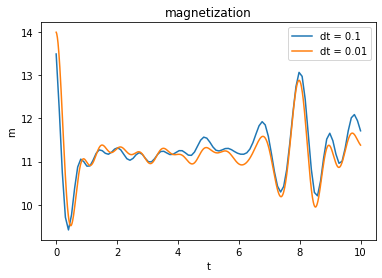

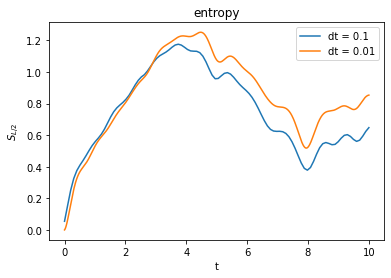

In [8]:
for i, dt in enumerate(dts_compare):
    N = (int)(np.ceil(t_stop/dt))
    ts = np.linspace(0, t_stop, N)
    plt.plot(ts, ms_compare[i], label="dt = "+str(dt))
plt.legend()
plt.title("magnetization")
plt.ylabel("m")
plt.xlabel("t")
plt.show()

for i, dt in enumerate(dts_compare):
    N = (int)(np.ceil(t_stop/dt))
    ts = np.linspace(0, t_stop, N)
    plt.plot(ts, entropies_compare[i], label="dt = "+str(dt))
plt.legend()
plt.title("entropy")
plt.ylabel("$S_{L/2}$")
plt.xlabel("t")
plt.show()

# TDVP

In [9]:
dts = [0.1, 0.01]

ms = [[] for i in range(len(dts))]
entropies = [[] for i in range(len(dts))]

model = tfi_model.TFIModel(L, J, g)

chi_max = 10
eps = 1.e-10

for i, dt in enumerate(dts):
    start = time.time()
    print("computing for dt =", dt)
    N = (int)(np.ceil(t_stop/dt))
    psi = MPS_all_spin_up.copy()
    engine = tdvp.TDVPEngine(psi, model, dt, chi_max=chi_max, eps=eps)
    for _ in tqdm(range(N)):
        engine.sweep()
        ms[i].append(np.sum(engine.psi.site_expectation_value(sigma_z)))
        entropies[i].append(engine.psi.entanglement_entropy()[L//2])
    end = time.time()
    print("took", end-start, "seconds")

computing for dt = 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

[0.99875961 0.04979193]
[0.9987596  0.04979208]
[0.9987596  0.04979208]
[0.9987596  0.04979208]
[0.9987596  0.04979208]
[0.9987596  0.04979208]
[0.9987596  0.04979208]
[0.9987596  0.04979208]
[0.9987596  0.04979208]
[0.9987596  0.04979208]
[0.9987596  0.04979208]
[0.9987596  0.04979208]
[0.9987596  0.04979208]
[0.99515222 0.09834662]
[9.95151733e-01 9.83515565e-02 7.66445468e-06 7.57170176e-07]
[9.95151736e-01 9.83515281e-02 7.58873023e-06 7.96445007e-07]
[9.95151732e-01 9.83515597e-02 7.59174928e-06 7.96980366e-07]
[9.95151733e-01 9.83515564e-02 7.59190400e-06 7.96993270e-07]
[9.95151733e-01 9.83515566e-02 7.59188299e-06 7.96987024e-07]
[9.95151733e-01 9.83515566e-02 7.59188358e-06 7.96987687e-07]
[9.95151733e-01 9.83515566e-02 7.59188361e-06 7.96987630e-07]
[9.95151733e-01 9.83515566e-02 7.59188361e-06 7.96987634e-07]
[9.95151733e-01 9.83515566e-02 7.59188361e-06 7.96987633e-07]
[9.95151733e-01 9.83515566e-02 7.59188361e-06 7.96987633e-07]
[9.95151733e-01 9.83515567e-02 7.59198731e-0

/home/benjamin/Documents/Uni/Informatik Bachelorarbeit/code/test/tdvp/../../src/util/krylov.py:84: RuntimeWarning: H[2, 1] ~= 0 encountered during Arnoldi iteration.
  warnings.warn(
/home/benjamin/Documents/Uni/Informatik Bachelorarbeit/code/test/tdvp/../../src/util/krylov.py:84: RuntimeWarning: H[3, 2] ~= 0 encountered during Arnoldi iteration.
  warnings.warn(


[9.50576589e-01 3.10407925e-01 6.79025131e-03 2.21858869e-03
 1.28607158e-04 1.25610625e-04 7.16769173e-05 3.57552630e-05
 1.79343135e-05 8.19783312e-06 3.64671909e-06 2.22114580e-06
 1.21978051e-06 4.98079083e-07 4.76699228e-07 3.38165542e-07
 1.73677214e-07 1.67438694e-07 8.75718897e-08 4.30860948e-08]
[9.50576833e-01 3.10407240e-01 6.78841495e-03 2.21679605e-03
 1.31781641e-04 1.06228939e-04 5.36525434e-05 2.06800169e-05
 1.47050130e-05 9.15145316e-06 2.01006941e-06 1.97404989e-06
 5.34862702e-07 4.93565865e-07 1.64716009e-07 5.16226170e-08]
[9.50577552e-01 3.10405038e-01 6.78892819e-03 2.21761804e-03
 1.06385653e-04 1.01710217e-04 3.05018095e-05 1.91777968e-05]
[0.95058102 0.31039477 0.00677461 0.00221461]
[0.95195131 0.30624942]
[0.94705468 0.32107232]
[0.94457491 0.32806739 0.0115711  0.00401731]
[9.44564592e-01 3.28095420e-01 1.16122958e-02 4.03206456e-03
 1.11738701e-04 9.90358861e-05 3.21972626e-05 2.06983768e-05]
[9.44563827e-01 3.28097629e-01 1.16118339e-02 4.03168194e-03
 1

[0.95097664 0.30926272]
[0.93143206 0.35140351 0.0885176  0.03338463]
[9.30639227e-01 3.52832888e-01 9.07516203e-02 3.43932427e-02
 7.81740398e-04 3.18694727e-04 2.63587889e-04 2.18651806e-04]
[9.30629698e-01 3.52851213e-01 9.07729866e-02 3.44061599e-02
 7.83478578e-04 3.02731878e-04 2.95366512e-04 2.35241313e-04
 1.19392297e-04 7.18769322e-05 2.97492086e-05 1.38419727e-05
 5.63005250e-06 1.97958049e-06 1.36866196e-06 7.03902140e-07]
[9.30627934e-01 3.52854828e-01 9.07743937e-02 3.44122909e-02
 7.87358030e-04 3.08982193e-04 3.07251452e-04 2.43586006e-04
 1.88830795e-04 1.29281975e-04 3.53260960e-05 1.58553726e-05
 7.42984267e-06 4.32770819e-06 2.22142569e-06 1.53446153e-06
 5.25457609e-07 3.72832711e-07 1.03513249e-07 5.71311468e-08]
[9.30627056e-01 3.52856869e-01 9.07734660e-02 3.44181864e-02
 7.66458875e-04 3.13083836e-04 2.48416661e-04 2.29878802e-04
 2.01624916e-04 1.87444467e-04 3.98726851e-05 1.72638367e-05
 1.44954207e-05 9.91015124e-06 4.92481613e-06 4.01572132e-06
 1.25423098e

[9.20772962e-01 3.14955015e-01 2.17415229e-01 7.43585396e-02
 1.24526892e-02 4.24654447e-03 2.79959768e-03 8.73560565e-04
 3.54681508e-04 2.88699005e-04 5.71426615e-05 2.30823757e-05
 1.42982968e-05 9.18624651e-06 6.12322932e-06 5.06577924e-06
 1.66120654e-06 7.53754118e-07 5.50346560e-07 1.90779136e-07]
[9.20771465e-01 3.14961808e-01 2.17410962e-01 7.43570364e-02
 1.24646776e-02 4.24931396e-03 2.82167654e-03 9.30464953e-04
 3.33358951e-04 3.26534530e-04 4.87137478e-05 2.26216013e-05
 1.34783994e-05 9.09325060e-06 8.92128276e-06 5.36563827e-06
 2.26018617e-06 7.98096390e-07 3.14333727e-07 4.44947993e-08]
[9.20770438e-01 3.14965414e-01 2.17410477e-01 7.43618574e-02
 1.24407180e-02 4.20334040e-03 2.83685095e-03 9.46392428e-04
 3.40712879e-04 2.93038242e-04 2.89677336e-05 2.27656876e-05
 1.47544269e-05 9.73658861e-06 9.24408499e-06 6.29403261e-06
 2.80150106e-06 1.33589395e-06 4.54540507e-07 1.47605109e-07]
[9.20770307e-01 3.14962448e-01 2.17414504e-01 7.43579282e-02
 1.24609585e-02 4.249

[9.11257817e-01 2.97234311e-01 2.61573173e-01 8.53087162e-02
 6.81544148e-02 2.21933766e-02 1.95973175e-02 6.37231094e-03
 6.85984086e-04 3.40785178e-04 1.35520970e-04 1.15659946e-04
 3.76455512e-05 3.66996825e-05 1.48391541e-05 1.03686048e-05
 8.65726498e-06 2.49923890e-06 3.89201161e-07 3.72880384e-07]
[9.11397790e-01 2.97046396e-01 2.61424964e-01 8.51811800e-02
 6.78906679e-02 2.21185231e-02 1.94749659e-02 6.36945048e-03
 5.68656886e-04 2.91741209e-04 1.25615981e-04 1.09164451e-04
 8.20629690e-05 3.37035779e-05 2.80122725e-05 9.05668529e-06]
[0.91486507 0.29304081 0.25634279 0.08208973 0.06286073 0.02013488
 0.01760195 0.00565023]
[0.93504847 0.29913725 0.18122029 0.05796954]
[0.94713006 0.32084988]
[0.94577468 0.32482343]
[0.9354857  0.30411933 0.17112582 0.0556228 ]
[0.91464522 0.29949882 0.24575985 0.08045308 0.07598582 0.0248799
 0.02040524 0.00668921]
[9.10064673e-01 3.04684125e-01 2.52266760e-01 8.44327065e-02
 8.26536019e-02 2.76642691e-02 2.29110523e-02 7.69588235e-03
 1.113

[8.97731470e-01 3.30979637e-01 1.99825349e-01 1.80717740e-01
 7.36626266e-02 6.66068337e-02 4.01922153e-02 1.48330692e-02
 1.46758938e-02 5.08747639e-03 1.06011170e-03 9.12250153e-04
 3.88605626e-04 3.36711692e-04 1.95168414e-04 7.16146930e-05
 3.05045890e-05 7.67230676e-06 2.45806848e-06 7.69081107e-07]
[8.97640620e-01 3.31056911e-01 1.99920377e-01 1.80835749e-01
 7.37404365e-02 6.67170305e-02 4.02563000e-02 1.48737791e-02
 1.46140431e-02 5.13537224e-03 1.09753324e-03 9.12568536e-04
 4.02587354e-04 3.36404160e-04 1.97982567e-04 7.27862051e-05
 3.40572795e-05 9.44975159e-06 3.09253431e-06 9.74347099e-07]
[8.97640823e-01 3.31057395e-01 1.99918096e-01 1.80839750e-01
 7.37257026e-02 6.67185715e-02 4.02583354e-02 1.49058452e-02
 1.45859948e-02 5.17779849e-03 1.10179864e-03 9.14125244e-04
 4.03514398e-04 3.33609227e-04 1.96115887e-04 7.10379480e-05
 3.19251116e-05 1.20928842e-05 2.65341872e-06 1.10027557e-06]
[8.97642878e-01 3.31064791e-01 1.99919045e-01 1.80838688e-01
 7.37079930e-02 6.668

[0.9432876  0.33197666]
[0.94339413 0.33167381]
[0.91011718 0.34469492 0.21506858 0.0813489 ]
[0.9019742  0.31694004 0.26079191 0.09155173 0.08879819 0.03132986
 0.02549235 0.00899342]
[8.92106798e-01 3.27581967e-01 2.49508861e-01 1.31862958e-01
 9.15486024e-02 6.54467698e-02 4.88240359e-02 3.70212007e-02
 2.37332729e-02 1.36347740e-02 4.28290611e-03 1.83615489e-03
 1.56908301e-03 6.78251489e-04 6.00477094e-04 2.21223925e-04]
[8.83435201e-01 3.35526553e-01 2.55291279e-01 1.43781402e-01
 9.68742795e-02 7.67667813e-02 5.49164777e-02 4.13998976e-02
 2.86282697e-02 1.57520911e-02 5.41780243e-03 2.55295741e-03
 2.04167524e-03 9.86593727e-04 8.29035726e-04 5.90695448e-04
 3.18707269e-04 2.06636916e-04 1.14093687e-04 3.95021625e-05]
[8.82157404e-01 3.36657659e-01 2.56396339e-01 1.45116501e-01
 9.77575460e-02 7.82368635e-02 5.55270215e-02 4.17712181e-02
 2.92356124e-02 1.59975214e-02 5.62968623e-03 2.66350415e-03
 2.12174945e-03 1.03756538e-03 8.67074030e-04 6.84744688e-04
 3.36725269e-04 2.47

[8.82259066e-01 3.16258904e-01 2.76463402e-01 1.60866653e-01
 9.90533797e-02 5.80302583e-02 5.74211859e-02 4.52965333e-02
 2.19624013e-02 1.63474989e-02 2.57753916e-03 1.78655628e-03
 9.94941180e-04 6.49882167e-04 4.85444899e-04 1.73068285e-04]
[8.72851277e-01 3.24470918e-01 2.83846452e-01 1.56311259e-01
 1.05571584e-01 1.00326067e-01 5.76763901e-02 4.14175927e-02
 3.58946800e-02 1.44440783e-02 7.70311303e-03 3.57892143e-03
 3.43131185e-03 2.85644613e-03 1.32815969e-03 1.15725376e-03
 1.14243338e-03 8.81084133e-04 4.20826391e-04 3.01282736e-04]
[8.68113841e-01 3.28338545e-01 2.87901823e-01 1.58875980e-01
 1.08976005e-01 1.07484858e-01 5.88303626e-02 4.33449950e-02
 3.64318091e-02 1.44376480e-02 9.31295645e-03 4.20673794e-03
 3.82158869e-03 3.47729722e-03 1.46356301e-03 1.45637577e-03
 1.31859362e-03 1.13940812e-03 5.01901813e-04 3.99975647e-04]
[8.67619786e-01 3.28802786e-01 2.88211839e-01 1.59357453e-01
 1.09341898e-01 1.08119573e-01 5.89614482e-02 4.31721427e-02
 3.64521323e-02 1.433

[8.64976956e-01 3.11653304e-01 2.89867398e-01 2.13228810e-01
 1.03924254e-01 7.63474507e-02 6.70406164e-02 5.56555889e-02
 2.40390970e-02 1.92136263e-02 5.10983715e-03 1.68299123e-03
 4.36764851e-04 2.82166484e-04 1.30308965e-04 7.74133030e-05]
[8.64358753e-01 3.13818675e-01 2.87539566e-01 2.12404422e-01
 1.04041424e-01 7.67561916e-02 7.05170655e-02 5.92672511e-02
 2.83258179e-02 2.14569446e-02 9.33578120e-03 6.05924008e-03
 3.23476686e-03 2.12645445e-03 1.68910512e-03 8.23595081e-04
 6.66302913e-04 3.33350734e-04 2.14501828e-04 8.71470908e-05]
[8.57481060e-01 3.13663509e-01 3.02883152e-01 2.13972225e-01
 1.10665682e-01 7.93363111e-02 7.75195904e-02 5.06797828e-02
 3.07367646e-02 2.42307678e-02 8.83657047e-03 5.92936308e-03
 4.94031583e-03 4.18494489e-03 2.22967631e-03 2.12357973e-03
 1.56751913e-03 8.67828921e-04 6.83117298e-04 2.17659945e-04]
[8.55425139e-01 3.14962560e-01 3.05261109e-01 2.15418456e-01
 1.12205456e-01 8.14948794e-02 7.78968237e-02 4.96780850e-02
 3.08245320e-02 2.340

[8.45219451e-01 3.12019477e-01 2.90457832e-01 2.46670797e-01
 1.17575297e-01 1.05138545e-01 8.77937808e-02 7.25624033e-02
 5.94640662e-02 3.90757631e-02 8.94727372e-03 4.51117315e-03
 2.80571317e-03 2.68372256e-03 2.40801435e-03 5.22464305e-04
 3.29480600e-04 1.48267465e-04 6.46510011e-05 2.33613854e-05]
[8.48886667e-01 3.15753614e-01 2.75251716e-01 2.50834651e-01
 1.24739855e-01 9.97325277e-02 9.01926924e-02 7.07061864e-02
 4.03492016e-02 2.53586804e-02 9.17878884e-03 2.90232608e-03
 1.70267803e-03 1.30189577e-03 5.08445200e-04 2.98577900e-04
 2.89224022e-04 1.73145235e-04 7.29345173e-05 3.40050085e-05]
[8.56261127e-01 3.12308266e-01 2.90670799e-01 2.28463654e-01
 1.04265064e-01 1.03375845e-01 7.84231534e-02 5.82481036e-02
 3.26724533e-02 1.96469341e-02 5.84248440e-03 1.87998493e-03
 1.68568852e-03 5.70111311e-04 3.62708384e-04 1.22701811e-04]
[0.88372573 0.3205652  0.28618951 0.14431958 0.10157321 0.04894743
 0.02714102 0.00919817]
[0.91163871 0.34500804 0.20947391 0.07749187]
[0.944

[0.88371559 0.31924981 0.28521536 0.14669219 0.09917878 0.05049739
 0.04093868 0.01405474]
[0.91282515 0.34202717 0.21034504 0.07431439]
[0.94494151 0.32723929]
[0.94486348 0.3274645 ]
[0.91312354 0.34163394 0.20995456 0.07355774]
[0.88381839 0.31929059 0.28552958 0.14580211 0.09898851 0.05036638
 0.04008158 0.01382511]
[8.63500041e-01 3.09457646e-01 2.89935549e-01 2.22186403e-01
 1.01187863e-01 7.92124675e-02 7.56939614e-02 4.42029441e-02
 2.68798722e-02 1.48283917e-02 5.20355012e-03 1.90945015e-03
 1.81404584e-03 7.06909372e-04 4.40101760e-04 1.82318541e-04]
[8.37198504e-01 3.16534640e-01 2.72356568e-01 2.61006248e-01
 1.77116793e-01 9.82601497e-02 9.41063943e-02 6.39532308e-02
 4.52639373e-02 2.04278712e-02 9.65196642e-03 5.43021884e-03
 5.42940560e-03 2.82658328e-03 1.50166848e-03 1.11216765e-03
 8.17530529e-04 4.91421863e-04 1.82339755e-04 8.64624553e-05]
[8.29569653e-01 3.15070253e-01 2.82210859e-01 2.57001538e-01
 1.93980451e-01 1.02975047e-01 9.46316760e-02 7.41582115e-02
 4.62

[8.61471555e-01 3.10394165e-01 2.88441301e-01 2.23845443e-01
 1.03720687e-01 8.25369361e-02 7.49177880e-02 6.25987138e-02
 2.63799131e-02 1.99216798e-02 4.44928367e-03 1.48651615e-03
 5.63367816e-04 5.52959455e-04 1.70192130e-04 1.53430478e-04]
[8.43978520e-01 3.11922377e-01 2.72110189e-01 2.51249097e-01
 1.68108151e-01 1.01938082e-01 9.40333525e-02 5.49413103e-02
 3.77453107e-02 3.39360619e-02 9.92555129e-03 4.00088063e-03
 3.72136139e-03 2.96966613e-03 2.34669278e-03 1.45306709e-03
 8.37502888e-04 3.95240427e-04 2.20662923e-04 4.33975522e-05]
[8.24244487e-01 3.14321701e-01 2.85711763e-01 2.38769392e-01
 2.20710119e-01 1.08600708e-01 9.35484309e-02 8.51390889e-02
 6.35728273e-02 4.93524932e-02 9.74333451e-03 6.33892835e-03
 4.70871506e-03 4.56904778e-03 3.22600299e-03 2.46138591e-03
 1.27003999e-03 5.48942669e-04 3.10328049e-04 6.82581284e-05]
[8.28401765e-01 3.08027241e-01 2.86943395e-01 2.34650232e-01
 2.23341677e-01 1.06085300e-01 9.48808921e-02 6.62975764e-02
 6.60156700e-02 4.792

[8.15771713e-01 3.06669137e-01 2.89315733e-01 2.44622069e-01
 2.16464731e-01 1.38451486e-01 1.14023007e-01 9.11421907e-02
 7.78385171e-02 5.73286024e-02 1.04018588e-02 7.75231969e-03
 5.92918084e-03 4.29253460e-03 3.97276971e-03 2.59676064e-03
 1.28909361e-03 1.04794830e-03 6.80987480e-04 1.82218997e-04]
[8.25034013e-01 3.08286062e-01 2.82057035e-01 2.31466569e-01
 2.11052496e-01 1.26853000e-01 1.19070737e-01 9.20396114e-02
 7.07800754e-02 5.20298906e-02 8.37208322e-03 5.60862377e-03
 4.31502548e-03 3.55193084e-03 2.56357676e-03 1.95337572e-03
 9.56667466e-04 5.81253772e-04 5.37906287e-04 1.55613927e-04]
[8.42858074e-01 3.11033292e-01 2.69227554e-01 2.53939093e-01
 1.65473855e-01 1.12149484e-01 9.30248767e-02 6.71718730e-02
 4.04154234e-02 3.25421639e-02 6.05082608e-03 4.04907934e-03
 2.18245972e-03 1.73071292e-03 1.16455472e-03 7.87914984e-04
 2.58759922e-04 1.35228276e-04 3.09556337e-05 9.89830655e-06]
[8.63369617e-01 3.11298214e-01 2.88238777e-01 2.16539927e-01
 1.05239801e-01 9.378

[8.69953226e-01 3.07219075e-01 2.85729748e-01 2.15879517e-01
 1.01600397e-01 7.36917669e-02 5.85377556e-02 3.23086727e-02
 1.54650431e-02 8.88131986e-03 2.43158670e-03 2.11686662e-03
 4.16976941e-04 2.52295818e-04 2.34763483e-04 4.41312078e-05]
[0.89222356 0.31502565 0.27850893 0.12851814 0.09521279 0.03410387
 0.01705692 0.00960946]
[0.91531523 0.34152249 0.20537573 0.05814837]
[0.94707761 0.32100468]
[0.9469537  0.32137002]
[0.91578839 0.34103852 0.20434491 0.05716205]
[0.89115371 0.31617768 0.27958726 0.13083473 0.09578834 0.03342371
 0.01465518 0.00909171]
[8.70145445e-01 3.06937789e-01 2.84632994e-01 2.16257433e-01
 1.01138745e-01 7.60858860e-02 5.64908291e-02 3.59241215e-02
 1.60772600e-02 9.10949743e-03 2.56965165e-03 2.17239649e-03
 3.67024174e-04 2.31326638e-04 2.07672087e-04 3.10963545e-05]
[8.42562478e-01 3.10975693e-01 2.67673739e-01 2.55570104e-01
 1.67602880e-01 1.14819615e-01 8.16009742e-02 6.19490360e-02
 5.00602635e-02 4.59124518e-02 3.89614065e-03 3.12985364e-03
 2.23

[0.91993277 0.33504643 0.19332875 0.06396543]
[0.89099329 0.32114365 0.27867188 0.12676681 0.0894019  0.03285786
 0.0123584  0.00669393]
[8.69280642e-01 3.09048996e-01 2.82890779e-01 2.15780300e-01
 9.80978727e-02 8.11130511e-02 6.11846855e-02 4.00468810e-02
 2.34213475e-02 1.22048029e-02 1.74651194e-03 9.58994087e-04
 3.54006890e-04 2.93919911e-04 1.06892486e-04 7.42152798e-05]
[8.45643879e-01 3.16109028e-01 2.66415792e-01 2.57147328e-01
 1.59683068e-01 1.00645411e-01 6.92208488e-02 5.88387363e-02
 5.38773413e-02 3.23395543e-02 3.57678135e-03 3.13000430e-03
 2.20026267e-03 9.44816745e-04 6.54530630e-04 4.37130775e-04
 3.30528276e-04 1.10302365e-04 7.61238853e-05 3.75234934e-05]
[8.24129365e-01 3.16970727e-01 2.73753826e-01 2.39118366e-01
 2.18228565e-01 1.14924001e-01 1.13714576e-01 9.15559947e-02
 5.87744044e-02 5.03362448e-02 6.53063490e-03 4.53621996e-03
 3.81602800e-03 2.76273739e-03 1.23585545e-03 1.01209396e-03
 7.30521439e-04 4.08932984e-04 1.11975260e-04 7.42961249e-05]
[8.308

[8.50526607e-01 3.20768945e-01 2.60036866e-01 2.53479156e-01
 1.52720767e-01 8.99644800e-02 6.78921920e-02 6.01980963e-02
 3.92360051e-02 2.46645159e-02 3.90113730e-03 3.71650577e-03
 2.53932218e-03 2.30297327e-03 1.03131382e-03 7.87978825e-04
 4.01048358e-04 2.67457399e-04 1.22982965e-04 3.21731496e-05]
[8.69445071e-01 3.11936953e-01 2.88519975e-01 2.13627182e-01
 9.49196785e-02 6.16355351e-02 5.58359999e-02 3.51700778e-02
 1.95453503e-02 1.80061272e-02 2.91945013e-03 1.30914136e-03
 5.06432088e-04 4.20269128e-04 2.11596893e-04 1.52515590e-04]
[0.89728088 0.31608474 0.27341974 0.10924836 0.08174363 0.03499024
 0.01708573 0.00925401]
[0.91945096 0.33826437 0.19123008 0.06015155]
[0.94708971 0.32096899]
[0.9474864  0.31979606]
[0.91909948 0.33959482 0.19153977 0.05695637]
[0.897183   0.31510323 0.27411802 0.11160926 0.08128183 0.03475237
 0.01635204 0.00966685]
[8.69296530e-01 3.11931365e-01 2.89206866e-01 2.13877875e-01
 9.37500413e-02 6.02967875e-02 5.74780447e-02 3.41189730e-02
 2.00

[0.9215312  0.33948308 0.1834113  0.04349473]
[0.89557984 0.31496424 0.2802595  0.11338871 0.07948884 0.02773943
 0.01125966 0.01082406]
[8.73210739e-01 3.08264116e-01 2.87457386e-01 2.09655041e-01
 8.28668003e-02 6.77504125e-02 5.23576547e-02 3.02732496e-02
 2.24144968e-02 1.63359804e-02 1.65734540e-03 1.21284692e-03
 8.28930792e-04 4.10266053e-04 2.74768751e-04 1.12497032e-04]
[8.59287117e-01 3.09553961e-01 2.72601947e-01 2.30276015e-01
 1.45039443e-01 8.99582959e-02 6.82359386e-02 5.13756288e-02
 3.27080527e-02 3.06157359e-02 4.40713032e-03 2.75741993e-03
 1.22296974e-03 1.07861499e-03 9.28885922e-04 8.60186441e-04
 2.88750912e-04 2.60055387e-04 1.35033643e-04 3.03601351e-05]
[8.55504937e-01 3.05571673e-01 2.66793759e-01 2.30528455e-01
 1.66365947e-01 8.58697884e-02 7.19284963e-02 6.49702783e-02
 6.25826386e-02 4.43430970e-02 5.70127057e-03 4.66764534e-03
 4.64248615e-03 2.05227094e-03 2.01778875e-03 1.23621947e-03
 4.30891506e-04 3.75679133e-04 6.17661888e-05 1.89691229e-05]
[8.469

[0.92436238 0.33270387 0.17819074 0.05577082]
[0.95098085 0.30924977]
[0.95127353 0.30834828]
[0.92411234 0.33311379 0.1786595  0.05596759]
[0.8973602  0.32255743 0.27205048 0.09811795 0.07655661 0.02880525
 0.01427705 0.01297233]
[8.84583042e-01 2.99974059e-01 2.75730028e-01 1.94596949e-01
 9.25489534e-02 4.45643569e-02 4.27532883e-02 2.53507890e-02
 1.83183180e-02 1.63207052e-02 2.21887999e-03 1.98070609e-03
 6.35205320e-04 6.01313171e-04 1.99998220e-04 1.00036945e-04]
[8.74493142e-01 3.02510981e-01 2.73575986e-01 1.98097478e-01
 1.19715628e-01 9.10451524e-02 5.87995656e-02 4.25909603e-02
 2.97661635e-02 2.92762864e-02 3.77559402e-03 2.28379582e-03
 2.01144165e-03 1.48616090e-03 8.46294683e-04 4.45445073e-04
 4.17437878e-04 2.12965523e-04 7.27855766e-05 1.30026905e-05]
[8.55739844e-01 3.01389556e-01 2.77247759e-01 1.97858063e-01
 1.86915585e-01 9.02774537e-02 8.76326600e-02 8.09567048e-02
 4.78893760e-02 3.44196589e-02 5.98965939e-03 3.00860733e-03
 2.69364254e-03 2.40664192e-03 9.90

[8.66008659e-01 3.16777266e-01 2.55603919e-01 2.06502233e-01
 1.47815747e-01 9.12143991e-02 7.20879431e-02 5.80818683e-02
 4.39074120e-02 3.13412121e-02 4.95087583e-03 4.08420844e-03
 3.17401263e-03 1.45277403e-03 8.46257859e-04 6.39439335e-04
 4.24926999e-04 2.11805449e-04 1.53132431e-04 1.11089882e-04]
[8.73628925e-01 3.19730122e-01 2.55442796e-01 2.03019772e-01
 1.21585092e-01 8.77628687e-02 4.86828492e-02 4.08247664e-02
 3.08802241e-02 2.43141043e-02 2.21412614e-03 1.79452903e-03
 1.04109936e-03 9.17081876e-04 4.90478962e-04 2.29179351e-04
 2.01192687e-04 9.75932346e-05 8.90652983e-05 2.08992081e-05]
[8.88329686e-01 3.10747263e-01 2.46882118e-01 1.98186860e-01
 9.05238976e-02 5.56891966e-02 4.24440163e-02 2.36718111e-02
 1.48065197e-02 1.40910282e-02 1.12788546e-03 6.91611906e-04
 4.73524948e-04 3.93306220e-04 1.98538966e-04 1.57801883e-04]
[0.90428003 0.31798009 0.254648   0.09877662 0.07573699 0.0217466
 0.01622832 0.00956576]
[0.9223127  0.34389941 0.17059112 0.04439763]
[0.9538

[8.80314572e-01 3.17580340e-01 2.35842818e-01 2.08810516e-01
 1.08293567e-01 9.34319169e-02 4.62209736e-02 3.39946870e-02
 2.54319634e-02 2.34749061e-02 3.05201875e-03 2.13372899e-03
 1.94152448e-03 6.51032194e-04 4.87138158e-04 2.59138836e-04
 1.82098122e-04 1.35051666e-04 5.89835114e-05 4.39828191e-05]
[8.79007037e-01 3.12124831e-01 2.29919428e-01 2.12725138e-01
 1.13370922e-01 9.29183562e-02 6.82173450e-02 5.62267811e-02
 3.97495381e-02 2.96853867e-02 5.16919244e-03 2.99476642e-03
 2.61620602e-03 1.26365017e-03 1.18282476e-03 8.96770955e-04
 5.24071473e-04 2.84015136e-04 9.21143704e-05 3.91013208e-05]
[8.82155173e-01 3.05535246e-01 2.29824194e-01 1.99992397e-01
 1.04690681e-01 1.02378489e-01 7.05023470e-02 6.75959253e-02
 6.09232319e-02 2.88716962e-02 6.82275258e-03 6.06164728e-03
 3.80126420e-03 2.03449529e-03 1.72180684e-03 1.50920185e-03
 6.65683395e-04 4.70985878e-04 2.28842001e-04 7.21157278e-05]
[8.79056119e-01 3.10950140e-01 2.30592780e-01 2.11544828e-01
 1.14076655e-01 9.224

[8.96358075e-01 2.86775508e-01 2.53169469e-01 1.52517598e-01
 9.30246295e-02 8.52031618e-02 7.18670756e-02 5.10742744e-02
 4.78095219e-02 3.05756748e-02 4.15601688e-03 3.31480587e-03
 2.60345923e-03 1.36163583e-03 9.97505517e-04 6.22301700e-04
 2.49994245e-04 1.82514545e-04 2.57919667e-05 1.41796061e-05]
[9.00235165e-01 2.83766459e-01 2.54773580e-01 1.57350755e-01
 8.58859336e-02 7.95187188e-02 5.38979519e-02 3.88092251e-02
 2.76978349e-02 2.19742520e-02 3.59836680e-03 2.80366545e-03
 1.32472676e-03 8.47903246e-04 4.75393348e-04 2.68439922e-04
 1.12797314e-04 9.76761340e-05 1.48183322e-05 4.10386497e-06]
[9.05368234e-01 2.83908366e-01 2.52949276e-01 1.57556209e-01
 6.93678807e-02 5.16798902e-02 4.74011863e-02 2.46459601e-02
 2.00296171e-02 1.23641053e-02 1.98125941e-03 1.15184623e-03
 7.90891182e-04 3.56321741e-04 1.40639952e-04 1.16674343e-04]
[0.91710999 0.29741319 0.24163839 0.08183147 0.06451165 0.02871368
 0.01769949 0.00834631]
[0.94210145 0.29271555 0.1570114  0.04593353]
[0.956

[9.08164654e-01 2.79862099e-01 2.45748445e-01 1.12671671e-01
 8.73762063e-02 8.26588433e-02 6.65508049e-02 4.39836582e-02
 4.38345136e-02 3.18417007e-02 5.95765812e-03 3.69327770e-03
 2.44500585e-03 1.85447469e-03 1.26166761e-03 7.28598108e-04
 3.98780518e-04 2.49464500e-04 1.96235854e-04 1.16965548e-04]
[9.12334889e-01 2.80132962e-01 2.35632631e-01 1.16073080e-01
 8.94389673e-02 8.09394042e-02 5.70584012e-02 3.52816729e-02
 2.47953023e-02 2.20958919e-02 3.64074631e-03 2.15560802e-03
 1.20002943e-03 7.82758905e-04 7.48386974e-04 4.50897962e-04
 3.45938445e-04 1.55323591e-04 6.16599143e-05 4.34658983e-05]
[9.13503429e-01 2.92854251e-01 2.28864265e-01 1.33575272e-01
 7.01757927e-02 4.79711516e-02 3.56708452e-02 2.75463533e-02
 1.25991171e-02 1.02200437e-02 1.79038389e-03 1.62243032e-03
 5.58575433e-04 4.40115812e-04 1.84787737e-04 1.39616995e-04]
[0.9263525  0.28090526 0.23190656 0.06374885 0.06088733 0.03060959
 0.01776824 0.01260077]
[0.94858091 0.27532842 0.1505393  0.04155043]
[0.965

[0.92492633 0.32094841 0.18146951 0.0651049  0.05405622 0.03105345
 0.01685393 0.01277221]
[0.94129072 0.30467789 0.1372544  0.04800412]
[0.96150398 0.27479099]
[0.95980102 0.28068133]
[0.93969811 0.31102255 0.13374069 0.04843403]
[0.9237555  0.32782537 0.17558469 0.06499481 0.0531551  0.03019919
 0.01656604 0.01183655]
[9.17178605e-01 3.22554448e-01 1.76071491e-01 1.12211552e-01
 8.16958300e-02 4.16730804e-02 3.80497677e-02 2.92607674e-02
 1.81840820e-02 9.94221008e-03 1.70062231e-03 1.11618151e-03
 8.75560598e-04 4.05630010e-04 1.34657911e-04 7.40707188e-05]
[9.11562033e-01 3.20646953e-01 1.78498958e-01 1.13445537e-01
 9.07833650e-02 8.55699263e-02 5.87789448e-02 3.76490151e-02
 2.54177386e-02 2.00177329e-02 3.27573888e-03 3.07073882e-03
 1.56205111e-03 1.18975773e-03 7.76136260e-04 7.28999480e-04
 3.53487417e-04 2.62421669e-04 2.37553675e-04 8.94684987e-05]
[9.11578867e-01 3.12432703e-01 1.85221353e-01 1.11833971e-01
 1.00168974e-01 8.01233383e-02 5.66632903e-02 4.73248879e-02
 4.19

[0.95573775 0.2942199 ]
[0.9382804  0.32231505 0.11674291 0.04597824]
[0.9269886  0.33157569 0.15561173 0.05480741 0.0490147  0.02859706
 0.01583723 0.00773162]
[9.26787652e-01 3.06409838e-01 1.43993671e-01 1.22929677e-01
 8.15656678e-02 4.19403464e-02 3.59257026e-02 3.30404032e-02
 1.91406726e-02 1.29184041e-02 1.52896983e-03 1.18581494e-03
 5.15261792e-04 4.75654833e-04 1.17898386e-04 4.28744359e-05]
[9.19603064e-01 3.15350190e-01 1.39115853e-01 1.20769803e-01
 9.28184195e-02 8.14288024e-02 5.62282118e-02 4.03033892e-02
 2.15934713e-02 2.08281574e-02 2.35266710e-03 2.15529870e-03
 1.34146417e-03 1.29287377e-03 3.56006617e-04 3.13176540e-04
 1.95817394e-04 8.24317371e-05 7.65626265e-06 7.33391912e-06]
[9.18279866e-01 3.12105048e-01 1.44184670e-01 1.20931145e-01
 1.07836474e-01 6.83091085e-02 5.93477450e-02 4.46719856e-02
 3.59115058e-02 2.81433365e-02 4.70842425e-03 3.09132341e-03
 2.68465933e-03 1.97069755e-03 8.78616489e-04 7.34821713e-04
 5.47158549e-04 5.23196310e-04 1.56416427e-0

[0.95699625 0.230794   0.150707   0.05825412 0.05783993 0.02942764
 0.01867234 0.01503537]
[9.53263357e-01 2.25503804e-01 1.29637990e-01 1.17087068e-01
 7.71498480e-02 3.93716432e-02 3.16326052e-02 3.05046154e-02
 1.67248200e-02 1.40346049e-02 2.71672817e-03 1.84136773e-03
 5.68138642e-04 5.40899363e-04 3.29610338e-04 2.29091395e-04]
[9.50997814e-01 2.20874350e-01 1.32893800e-01 1.00158183e-01
 9.85166464e-02 6.71347962e-02 5.13692259e-02 3.69161755e-02
 2.27201600e-02 1.84787932e-02 5.09895647e-03 4.57646484e-03
 1.95955941e-03 1.04859383e-03 8.21505470e-04 6.42858953e-04
 4.99070454e-04 3.05485078e-04 1.95951346e-04 1.42588519e-04]
[9.45982694e-01 2.30463422e-01 1.31051270e-01 1.10842058e-01
 1.05930824e-01 6.30118040e-02 5.92502068e-02 4.66491341e-02
 2.94513040e-02 2.72499520e-02 4.67242576e-03 4.22201210e-03
 2.33478931e-03 2.02365491e-03 1.59003256e-03 1.28150358e-03
 9.43950163e-04 4.10162478e-04 1.64681987e-04 2.87218233e-05]
[9.41183919e-01 2.37782554e-01 1.39662623e-01 1.1403

[9.65248852e-01 1.62121619e-01 1.36798260e-01 1.16740631e-01
 7.73553402e-02 3.69099730e-02 3.09125435e-02 2.74025154e-02
 1.97720796e-02 1.45728102e-02 2.46820882e-03 2.33980536e-03
 8.12402104e-04 7.89976307e-04 4.17039749e-04 3.00274740e-04]
[9.62283143e-01 1.54699121e-01 1.32984123e-01 1.04554855e-01
 9.63901002e-02 7.86981987e-02 5.41703456e-02 4.02098003e-02
 2.90508048e-02 2.35770852e-02 3.97780694e-03 2.27059050e-03
 1.69426338e-03 1.40484494e-03 8.24774429e-04 7.56145801e-04
 3.85336904e-04 2.61295601e-04 8.08847525e-05 3.57837498e-05]
[9.58528579e-01 1.53240878e-01 1.31306479e-01 1.15558156e-01
 1.08238521e-01 8.63169815e-02 5.42185713e-02 4.58607702e-02
 3.93661333e-02 3.66391699e-02 4.33858987e-03 3.23654758e-03
 2.61797624e-03 1.97271188e-03 1.24924848e-03 1.23804580e-03
 7.65162240e-04 4.33558835e-04 1.50614725e-04 3.90808788e-05]
[9.59135715e-01 1.42715119e-01 1.32811248e-01 1.10878893e-01
 1.02933778e-01 8.15597631e-02 7.91985844e-02 5.33368815e-02
 4.44481803e-02 3.681

[9.39091437e-01 2.63108354e-01 1.26948118e-01 1.11263059e-01
 9.31618155e-02 7.24205842e-02 5.63602028e-02 4.26309884e-02
 3.15967780e-02 2.12135100e-02 3.45771798e-03 1.64193249e-03
 1.51899701e-03 1.19093993e-03 8.61205235e-04 7.37657245e-04
 3.42867180e-04 2.69998069e-04 9.12291866e-05 5.94104744e-05]
[9.47268608e-01 2.48191599e-01 1.33839640e-01 1.13557447e-01
 7.76040003e-02 3.96995038e-02 3.19693615e-02 3.18522037e-02
 1.86703981e-02 1.67525673e-02 2.17603482e-03 2.13430794e-03
 7.13543418e-04 7.10059418e-04 3.18543969e-04 3.16941768e-04]
[0.94998828 0.26172423 0.14774367 0.060557   0.05039489 0.02576928
 0.01314617 0.01228122]
[0.96288643 0.24211726 0.11069987 0.04443527]
[0.97142605 0.23734243]
[0.96790965 0.25129845]
[0.9568703  0.2645451  0.11117507 0.04533448]
[0.94399206 0.28246931 0.14702948 0.06142321 0.05154209 0.02635813
 0.0133881  0.01300041]
[9.42351564e-01 2.67144307e-01 1.32375794e-01 1.12609028e-01
 7.74618015e-02 4.10425223e-02 3.23454640e-02 3.22885698e-02
 1.83

[9.19735644e-01 3.17906075e-01 1.19046873e-01 1.15484586e-01
 1.05466537e-01 7.19199754e-02 6.15835593e-02 4.88814725e-02
 4.35273958e-02 3.30280884e-02 4.77062427e-03 3.45275811e-03
 2.44111737e-03 2.19356326e-03 1.26947912e-03 1.23508579e-03
 9.02472707e-04 7.35069113e-04 3.59089133e-04 2.39535706e-04]
[9.14772348e-01 3.24563568e-01 1.41480065e-01 1.05802026e-01
 1.01977540e-01 7.54925985e-02 6.40976491e-02 5.53263452e-02
 4.11321197e-02 4.02201176e-02 4.88705118e-03 4.35978493e-03
 2.66171987e-03 2.32379124e-03 1.81474916e-03 1.44191307e-03
 6.59781373e-04 6.09151483e-04 3.62923735e-04 3.22344948e-04]
[9.20048178e-01 3.16927317e-01 1.24319688e-01 1.08124519e-01
 1.04498771e-01 7.69852617e-02 6.77348071e-02 4.79646016e-02
 3.28497732e-02 3.27538121e-02 3.43443491e-03 2.97906545e-03
 2.68388909e-03 1.75438879e-03 1.46199296e-03 1.01420985e-03
 5.48293881e-04 5.30776387e-04 3.78599834e-04 1.89988331e-04]
[9.22495363e-01 3.22475739e-01 1.28493558e-01 1.04105476e-01
 9.48687473e-02 5.278

[9.20080683e-01 3.16878843e-01 1.39563870e-01 1.09015552e-01
 8.15511193e-02 6.94274211e-02 6.92823035e-02 4.70374211e-02
 4.17541882e-02 3.75009228e-02 4.07281687e-03 3.96514704e-03
 1.90402033e-03 1.81039693e-03 1.28424709e-03 1.20424869e-03
 8.98885288e-04 8.31230395e-04 1.18594210e-04 7.84805890e-05]
[9.24628769e-01 3.14974257e-01 1.29775589e-01 9.19039757e-02
 8.97154358e-02 7.91800243e-02 5.27172522e-02 4.02037999e-02
 3.39073067e-02 2.57159346e-02 4.85493090e-03 2.69872268e-03
 2.38932531e-03 1.38901996e-03 7.80660519e-04 6.86486456e-04
 5.97775806e-04 2.77661241e-04 3.60767474e-05 2.65064636e-05]
[9.23273790e-01 3.29261498e-01 1.43128053e-01 1.00786677e-01
 6.69456996e-02 4.49859827e-02 2.84044292e-02 2.60897457e-02
 1.73444987e-02 1.40014523e-02 3.55006030e-03 1.99763541e-03
 1.04726888e-03 1.01051637e-03 4.43634057e-04 2.22439791e-04]
[0.93141824 0.32799234 0.12907625 0.06593387 0.05117882 0.02653876
 0.01968631 0.01272817]
[0.93528426 0.33685317 0.10025438 0.04150129]
[0.960

[9.20249459e-01 3.08962419e-01 2.01221322e-01 8.80273349e-02
 7.46175582e-02 3.85171235e-02 3.71187783e-02 2.48237299e-02
 1.40278568e-02 1.37593882e-02 2.65737299e-03 1.84595814e-03
 1.43376129e-03 4.27906554e-04 3.14083756e-04 2.18109594e-04]
[0.92733716 0.31027054 0.18548112 0.06879717 0.05914023 0.02732347
 0.0176818  0.00921433]
[0.9427784  0.31010609 0.11601239 0.03929672]
[0.96446038 0.26422752]
[0.96420278 0.265166  ]
[0.94320563 0.305073   0.12470506 0.04174024]
[0.92532409 0.30584536 0.20215166 0.06858271 0.05948607 0.02638224
 0.01815784 0.01003734]
[9.19031748e-01 3.02446235e-01 2.15385173e-01 8.78566038e-02
 7.61513944e-02 3.86943251e-02 3.73970878e-02 2.67912525e-02
 1.37238088e-02 1.35689562e-02 2.61099413e-03 1.79465506e-03
 1.39892073e-03 4.10894846e-04 3.05439202e-04 2.24558652e-04]
[9.17660748e-01 2.86879715e-01 2.21520540e-01 9.26386182e-02
 8.77370117e-02 6.48229285e-02 5.45423343e-02 4.20388684e-02
 2.70200136e-02 2.35440118e-02 2.92972124e-03 2.17243076e-03
 1.57

[9.03665691e-01 2.97084037e-01 2.55885324e-01 8.81164344e-02
 8.75751993e-02 7.10942153e-02 6.59254397e-02 5.02961150e-02
 3.94911741e-02 2.60365081e-02 5.02093061e-03 2.90058806e-03
 2.60805374e-03 2.14168752e-03 1.90671812e-03 1.12222013e-03
 5.83844234e-04 4.61246074e-04 7.37843432e-05 6.20107351e-05]
[9.10723991e-01 2.87081089e-01 2.42037947e-01 9.28578440e-02
 8.73172890e-02 7.11066091e-02 6.15284398e-02 4.49902843e-02
 4.00142541e-02 2.88545578e-02 3.59418121e-03 2.90752269e-03
 2.72882976e-03 2.48670920e-03 1.19018064e-03 6.77848155e-04
 4.29740680e-04 4.03134106e-04 1.49927135e-04 8.51618039e-05]
[9.11184340e-01 2.87340059e-01 2.47180751e-01 9.32978489e-02
 8.81662786e-02 6.30871772e-02 5.35472927e-02 3.67116542e-02
 2.72113389e-02 2.52913094e-02 4.20481289e-03 2.26072515e-03
 1.36394614e-03 1.30894604e-03 8.30923021e-04 5.52415735e-04
 3.20106492e-04 2.27309459e-04 1.01569210e-04 4.85628890e-05]
[9.17643261e-01 2.73865591e-01 2.53384489e-01 8.47247471e-02
 8.31464199e-02 4.702

[9.14388337e-01 3.08372307e-01 1.74314970e-01 1.25054867e-01
 8.00640778e-02 7.83872425e-02 6.88444736e-02 5.50521497e-02
 4.12952934e-02 2.66324130e-02 3.62566559e-03 3.47833373e-03
 2.20645196e-03 2.06973638e-03 9.99199693e-04 8.36654510e-04
 4.50266948e-04 2.42710635e-04 2.78192995e-05 1.95017437e-05]
[9.15316604e-01 3.15147242e-01 1.80621907e-01 1.21515724e-01
 8.35227097e-02 6.13820753e-02 4.22027123e-02 4.18754681e-02
 2.72510532e-02 2.06581242e-02 4.20852777e-03 3.52336593e-03
 2.01927157e-03 1.74378172e-03 1.26357296e-03 7.78108504e-04
 2.64610483e-04 2.55405387e-04 9.02535380e-06 7.80441188e-06]
[9.22835522e-01 3.05489368e-01 1.86835510e-01 8.81051676e-02
 8.13643116e-02 4.85177583e-02 4.79812365e-02 2.72764770e-02
 1.40994068e-02 1.22131613e-02 2.50207560e-03 2.22901975e-03
 8.56276560e-04 5.47343028e-04 4.52422055e-04 2.59982234e-04]
[0.93382241 0.28638759 0.18872074 0.06813397 0.06794595 0.02310102
 0.01936228 0.01322484]
[0.93782988 0.31891652 0.12866411 0.04704163]
[0.954

[9.01596394e-01 3.19978500e-01 2.21485211e-01 1.13800357e-01
 7.97635391e-02 7.78519549e-02 7.16570987e-02 5.43853001e-02
 3.68818328e-02 2.84410438e-02 3.91074842e-03 3.52443505e-03
 3.21341887e-03 2.62165965e-03 8.96481136e-04 7.54785545e-04
 5.01764540e-04 3.49107696e-04 6.80794302e-05 5.10887119e-05]
[9.08870582e-01 3.23326804e-01 1.94792708e-01 1.26217499e-01
 7.70725286e-02 7.22940653e-02 4.18834272e-02 3.83438635e-02
 2.76539286e-02 1.87939485e-02 3.67216901e-03 3.05848202e-03
 2.09426609e-03 1.39012256e-03 6.23823559e-04 5.91438278e-04
 1.77717231e-04 1.47437684e-04 4.74836667e-05 4.31695730e-05]
[9.14371925e-01 3.18746266e-01 1.80529158e-01 1.36708130e-01
 8.07708961e-02 4.06500277e-02 3.85432983e-02 3.06907892e-02
 1.64640879e-02 1.28636609e-02 1.66934518e-03 9.47083058e-04
 6.06408119e-04 5.51688870e-04 3.53321341e-04 1.33753528e-04]
[0.93049373 0.29316644 0.1910764  0.07551084 0.06864192 0.02507028
 0.0227524  0.01284009]
[0.93628962 0.32110305 0.13394043 0.04810972]
[0.951

  0%|          | 0/1000 [00:00<?, ?it/s]

[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.9999875  0.00499979]
[0.99995002 0.00999833]
[9.99950015e-01 9.99833352e-03 7.75123995e-11 7.74786363e-13]
[9.99950015e-01 9.99833352e-03 7.75123955e-11 7.74786350e-13]
[9.99950015e-01 9.99833352e-03 7.75123955e-11 7.74786344e-13]
[9.99950015e-01 9.99833352e-03 7.75123955e-11 7.74786332e-13]
[9.99950015e-01 9.99833352e-03 7.75123955e-11 7.74786327e-13]
[9.99950015e-01 9.99833352e-03 7.75123955e-11 7.74786366e-13]
[9.99950015e-01 9.99833352e-03 7.75123955e-11 7.74786350e-13]
[9.99950015e-01 9.99833352e-03 7.75123955e-11 7.74786308e-13]
[9.99950015e-01 9.99833352e-03 7.75123955e-11 7.74786333e-13]
[9.99950015e-01 9.99833352e-03 7.75123955e-11 7.74786310e-13]
[9.99950015e-01 9.99833352e-03 7.75123965e-1

[9.97914835e-01 6.45444137e-02 9.23740056e-07 5.96990892e-08]
[0.99791487 0.06454384]
[0.99758679 0.06943057]
[9.97586728e-01 6.94314059e-02 1.33708772e-06 9.30131691e-08]
[9.97586728e-01 6.94314059e-02 1.33706235e-06 9.30131436e-08
 8.82321377e-12 2.85679736e-12 2.27484051e-12 6.83450796e-13]
[9.97586728e-01 6.94314059e-02 1.33703644e-06 9.30109438e-08
 8.81552803e-12 2.85044916e-12 2.27011748e-12 6.88391473e-13]
[9.97586728e-01 6.94314059e-02 1.33703642e-06 9.30109454e-08
 8.81587736e-12 2.85056873e-12 2.27019403e-12 6.88525316e-13]
[9.97586728e-01 6.94314059e-02 1.33703641e-06 9.30109435e-08
 8.81587783e-12 2.85056857e-12 2.27019278e-12 6.88526712e-13]
[9.97586728e-01 6.94314059e-02 1.33703641e-06 9.30109435e-08
 8.81587772e-12 2.85056867e-12 2.27019279e-12 6.88526938e-13]
[9.97586728e-01 6.94314059e-02 1.33703641e-06 9.30109435e-08
 8.81587779e-12 2.85056875e-12 2.27019276e-12 6.88526994e-13]
[9.97586728e-01 6.94314059e-02 1.33703642e-06 9.30109449e-08
 8.81587707e-12 2.85056857e-1

[9.94171409e-01 1.07810986e-01 1.27101183e-05 1.37828454e-06
 8.50445534e-12 7.70496902e-12 2.80607884e-12 6.21021550e-13]
[9.94171409e-01 1.07810986e-01 1.27101183e-05 1.37828454e-06
 8.50445568e-12 7.70496614e-12 2.80608040e-12 6.21021513e-13]
[9.94171409e-01 1.07810986e-01 1.27101184e-05 1.37828454e-06
 8.50438203e-12 7.70509752e-12 2.80603851e-12 6.20981596e-13]
[9.94171409e-01 1.07810986e-01 1.27101657e-05 1.37829149e-06
 8.51450526e-12 7.68918676e-12 2.81681933e-12 6.25582255e-13]
[9.94171409e-01 1.07810986e-01 1.27100468e-05 1.37827325e-06]
[0.99417227 0.10780305]
[0.99365264 0.1124919 ]
[9.93651521e-01 1.12501802e-01 1.58534211e-05 1.79489130e-06]
[9.93651521e-01 1.12501802e-01 1.58536207e-05 1.79491978e-06
 1.22868471e-11 8.41205504e-12 2.94544885e-12 4.54153136e-13]
[9.93651521e-01 1.12501802e-01 1.58535675e-05 1.79491158e-06
 1.23087419e-11 8.39856420e-12 2.93601836e-12 4.45178761e-13]
[9.93651521e-01 1.12501802e-01 1.58535675e-05 1.79491158e-06
 1.23085577e-11 8.39862920e-1

[9.88843929e-01 1.48955292e-01 6.96642684e-05 1.04939083e-05
 2.94299955e-10 2.49876957e-11 8.48521285e-12 1.01840588e-12]
[9.88843929e-01 1.48955292e-01 6.96641921e-05 1.04938920e-05
 2.94265882e-10 2.49348216e-11 8.65925701e-12 1.02949150e-12
 1.48450931e-13 1.07543488e-13]
[9.88843929e-01 1.48955292e-01 6.96641893e-05 1.04938917e-05
 2.94272113e-10 2.49341752e-11 8.65493961e-12 1.02839222e-12
 1.46799245e-13 1.06625495e-13]
[9.88843929e-01 1.48955292e-01 6.96641894e-05 1.04938917e-05
 2.94271971e-10 2.49341868e-11 8.65508588e-12 1.02841395e-12
 1.46828475e-13 1.06622122e-13]
[9.88843929e-01 1.48955292e-01 6.96641894e-05 1.04938917e-05
 2.94271975e-10 2.49341868e-11 8.65508319e-12 1.02841345e-12
 1.46827909e-13 1.06622128e-13]
[9.88843929e-01 1.48955292e-01 6.96641894e-05 1.04938917e-05
 2.94271975e-10 2.49341868e-11 8.65508327e-12 1.02841358e-12
 1.46827924e-13 1.06622124e-13]
[9.88843929e-01 1.48955292e-01 6.96641894e-05 1.04938917e-05
 2.94271963e-10 2.49341860e-11 8.65507880e-12 

[9.82314197e-01 1.87239838e-01 2.44695690e-04 4.66416610e-05
 6.13990575e-09 9.03253906e-10 1.02557413e-11 1.62215122e-12
 1.16535451e-12 9.88454374e-13 4.22191855e-13 1.97145774e-13]
[9.82314197e-01 1.87239838e-01 2.44695691e-04 4.66416610e-05
 6.13990559e-09 9.03253659e-10 1.02557031e-11 1.62213944e-12
 1.16536190e-12 9.88450258e-13 4.22200135e-13 1.97148200e-13]
[9.82314197e-01 1.87239838e-01 2.44695689e-04 4.66416608e-05
 6.13991027e-09 9.03245999e-10 1.02548491e-11 1.62201163e-12
 1.16552046e-12 9.88334239e-13 4.22337994e-13 1.97085123e-13]
[9.82314197e-01 1.87239838e-01 2.44695705e-04 4.66416633e-05
 6.13981824e-09 9.03301032e-10 1.02381469e-11 1.61959605e-12
 1.17383887e-12 9.86948168e-13 4.23569973e-13 1.97055339e-13]
[9.82314197e-01 1.87239838e-01 2.44695801e-04 4.66416908e-05
 6.13953186e-09 8.99991959e-10 9.37052638e-12 1.33743728e-12]
[9.82314201e-01 1.87239815e-01 2.44660054e-04 4.66348527e-05]
[0.98234327 0.1870874 ]
[0.98156723 0.19111715]
[9.81533688e-01 1.91289152e-01 

[0.97594865 0.21800055]
[0.97512802 0.22164237]
[9.75034525e-01 2.22052287e-01 6.59482350e-04 1.50189094e-04]
[9.75034494e-01 2.22052421e-01 6.59699458e-04 1.50238659e-04
 3.96780000e-08 8.76604086e-09 1.02921839e-11 5.43613267e-12]
[9.75034494e-01 2.22052421e-01 6.59699356e-04 1.50238618e-04
 3.96824109e-08 8.77970700e-09 1.10308126e-11 5.51624878e-12
 1.01778353e-12 8.31671530e-13 5.88157796e-13 1.76225707e-13]
[9.75034494e-01 2.22052421e-01 6.59699322e-04 1.50238612e-04
 3.96827454e-08 8.77948565e-09 1.10390324e-11 5.51665071e-12
 1.01297468e-12 8.26818206e-13 5.92421581e-13 1.77451095e-13]
[9.75034494e-01 2.22052421e-01 6.59699324e-04 1.50238613e-04
 3.96827287e-08 8.77949935e-09 1.10392506e-11 5.51682810e-12
 1.01286909e-12 8.26718496e-13 5.92418160e-13 1.77472923e-13]
[9.75034494e-01 2.22052421e-01 6.59699324e-04 1.50238613e-04
 3.96827294e-08 8.77950050e-09 1.10392560e-11 5.51683067e-12
 1.01286629e-12 8.26717818e-13 5.92417908e-13 1.77472200e-13]
[9.75034494e-01 2.22052421e-01 

[9.68320883e-01 2.49705152e-01 1.37113205e-03 3.53579844e-04
 1.54218717e-07 3.95236864e-08 4.60585725e-11 1.96390766e-11
 9.20802267e-13 7.11459886e-13 6.12929716e-13 2.14441200e-13]
[9.68320883e-01 2.49705152e-01 1.37113205e-03 3.53579844e-04
 1.54218719e-07 3.95236882e-08 4.60585882e-11 1.96390775e-11
 9.20802510e-13 7.11458710e-13 6.12929039e-13 2.14441567e-13]
[9.68320883e-01 2.49705152e-01 1.37113205e-03 3.53579844e-04
 1.54218718e-07 3.95236866e-08 4.60585699e-11 1.96390768e-11
 9.20802156e-13 7.11459534e-13 6.12929573e-13 2.14441176e-13]
[9.68320883e-01 2.49705152e-01 1.37113205e-03 3.53579843e-04
 1.54218749e-07 3.95236937e-08 4.60585061e-11 1.96390735e-11
 9.20839216e-13 7.11508962e-13 6.12917017e-13 2.14447737e-13]
[9.68320883e-01 2.49705152e-01 1.37113209e-03 3.53579852e-04
 1.54218126e-07 3.95240854e-08 4.60594591e-11 1.96311162e-11
 9.24141265e-13 7.12217707e-13 6.08615204e-13 2.12641610e-13]
[9.68320883e-01 2.49705151e-01 1.37113208e-03 3.53579873e-04
 1.54182039e-07 3.9

[9.61716429e-01 2.74033523e-01 2.56947555e-03 7.32151831e-04
 4.97992424e-07 1.41684881e-07 8.88590077e-10 7.90615652e-11
 8.44307120e-12 4.99782942e-12 3.69736542e-12 3.52896463e-12
 1.27212122e-12 1.01665201e-12]
[9.61716429e-01 2.74033522e-01 2.56947489e-03 7.32151679e-04
 4.97791425e-07 1.41590159e-07 8.85920556e-10 7.93846987e-11]
[9.61716900e-01 2.74031898e-01 2.56687100e-03 7.31404989e-04]
[0.9621708  0.27244698]
[0.96140715 0.27512959]
[9.60913885e-01 2.76832544e-01 2.75961170e-03 7.95024765e-04]
[9.60913341e-01 2.76834400e-01 2.76258605e-03 7.95887480e-04
 5.70310589e-07 1.64052911e-07 1.19556202e-09 9.65323573e-11]
[9.60913341e-01 2.76834400e-01 2.76258687e-03 7.95887681e-04
 5.70555400e-07 1.64165038e-07 1.19926406e-09 9.61753125e-11
 8.52879450e-12 5.03420651e-12 3.85478363e-12 3.69134556e-12
 1.37030551e-12 1.15903134e-12]
[9.60913341e-01 2.76834400e-01 2.76258681e-03 7.95887660e-04
 5.70556084e-07 1.64167345e-07 1.19924207e-09 9.62200243e-11
 8.37653621e-12 4.96733986e-12

[0.95635615 0.29220354]
[0.9556833  0.29439672]
[0.95477205 0.29729756 0.00472615 0.00147163]
[9.54770439e-01 2.97302580e-01 4.73416274e-03 1.47415420e-03
 1.57811433e-06 4.91171283e-07 7.38717975e-09 1.97393126e-09]
[9.54770438e-01 2.97302582e-01 4.73416682e-03 1.47415543e-03
 1.57919711e-06 4.91562998e-07 7.39902493e-09 1.96431268e-09
 1.57053792e-11 1.32477162e-11 1.08294829e-11 6.43526170e-12
 5.00592963e-12 3.34743037e-12 2.92751563e-12 1.36456051e-12]
[9.54770438e-01 2.97302582e-01 4.73416674e-03 1.47415540e-03
 1.57919716e-06 4.91571779e-07 7.40151981e-09 1.95721541e-09
 1.57786807e-11 1.32191506e-11 1.06702165e-11 6.40450066e-12
 4.99470524e-12 3.32505210e-12 2.90873581e-12 1.37295697e-12]
[9.54770438e-01 2.97302582e-01 4.73416674e-03 1.47415539e-03
 1.57919730e-06 4.91571598e-07 7.40152322e-09 1.95725295e-09
 1.56830052e-11 1.32128787e-11 1.06702550e-11 6.40677103e-12
 4.99181404e-12 3.32716864e-12 2.90641335e-12 1.37061020e-12]
[9.54770438e-01 2.97302582e-01 4.73416674e-03 1.

[0.94927711 0.31433888 0.00759596 0.00251529]
[9.49272922e-01 3.14351027e-01 7.61527700e-03 2.52179341e-03
 3.92573934e-06 1.29979325e-06 3.10610494e-08 9.97704429e-09]
[9.49272919e-01 3.14351034e-01 7.61529236e-03 2.52179850e-03
 3.92980403e-06 1.30120789e-06 3.11035736e-08 9.96848920e-09
 4.22332201e-11 1.62169480e-11 1.44333014e-11 1.10217757e-11
 5.25107760e-12 4.39457321e-12 3.23082275e-12 1.53534066e-12]
[9.49272919e-01 3.14351034e-01 7.61529228e-03 2.52179847e-03
 3.92980428e-06 1.30122456e-06 3.11082946e-08 9.95782502e-09
 4.22615963e-11 1.61673602e-11 1.44086010e-11 1.08092160e-11
 5.18191054e-12 4.35509577e-12 3.19036634e-12 1.53614374e-12]
[9.49272919e-01 3.14351034e-01 7.61529226e-03 2.52179845e-03
 3.92980465e-06 1.30122423e-06 3.11082026e-08 9.95802430e-09
 4.22611000e-11 1.61459732e-11 1.43978811e-11 1.08084082e-11
 5.18129804e-12 4.35797068e-12 3.18956839e-12 1.53514509e-12]
[9.49272919e-01 3.14351034e-01 7.61529226e-03 2.52179845e-03
 3.92980462e-06 1.30122411e-06 3.11

[9.44564964e-01 3.28093972e-01 1.16222600e-02 4.03698387e-03
 8.95648027e-06 3.11083612e-06 1.09777940e-07 3.78421591e-08]
[9.44564955e-01 3.28093995e-01 1.16223097e-02 4.03700137e-03
 8.96991020e-06 3.11558486e-06 1.09956791e-07 3.78768735e-08
 2.41037509e-10 4.57570655e-11 1.53721565e-11 1.09321773e-11
 5.96080030e-12 4.19697790e-12 3.28600680e-12 1.78472055e-12]
[9.44564955e-01 3.28093995e-01 1.16223096e-02 4.03700133e-03
 8.96991514e-06 3.11561151e-06 1.09962988e-07 3.78668682e-08
 2.41276215e-10 4.57988264e-11 1.52163686e-11 1.07081543e-11
 5.89140851e-12 4.14938334e-12 3.27206736e-12 1.79099135e-12
 7.55460172e-14 3.62334088e-14]
[9.44564955e-01 3.28093995e-01 1.16223096e-02 4.03700130e-03
 8.96991571e-06 3.11561087e-06 1.09962801e-07 3.78671565e-08
 2.41276800e-10 4.58003327e-11 1.52075150e-11 1.07100150e-11
 5.89251056e-12 4.15088846e-12 3.27282003e-12 1.79168408e-12
 7.65225180e-14 3.73737391e-14]
[9.44564955e-01 3.28093995e-01 1.16223096e-02 4.03700131e-03
 8.96991563e-06 3.1

[9.42055168e-01 3.35090432e-01 1.47912832e-02 5.26128149e-03
 1.44762906e-05 5.14918383e-06 2.26894135e-07 8.03937324e-08
 1.20889217e-09 8.99049367e-11 1.50961334e-11 1.06711048e-11
 7.66583137e-12 3.55802346e-12 3.28162959e-12 2.10133248e-12
 8.41575328e-14 1.29796075e-14]
[9.42055168e-01 3.35090432e-01 1.47912832e-02 5.26128152e-03
 1.44762901e-05 5.14918472e-06 2.26894349e-07 8.03935168e-08
 1.20888963e-09 8.99027486e-11 1.51000021e-11 1.06682514e-11
 7.66425593e-12 3.55670013e-12 3.28102856e-12 2.09986535e-12
 8.31263710e-14 1.33367704e-14]
[9.42055168e-01 3.35090432e-01 1.47912833e-02 5.26128156e-03
 1.44762747e-05 5.14915013e-06 2.26887759e-07 8.04004645e-08
 1.20747456e-09 8.97994573e-11 1.52792825e-11 1.09102725e-11
 7.74522245e-12 3.57816811e-12 3.30308275e-12 2.10141678e-12]
[9.42055185e-01 3.35090387e-01 1.47911858e-02 5.26124616e-03
 1.44494284e-05 5.13950658e-06 2.26449612e-07 8.02718463e-08]
[0.94207133 0.33504831 0.01472459 0.00523681]
[0.94529211 0.32622512]
[0.9449969

[9.39484650e-01 3.41971844e-01 1.93458657e-02 7.04188331e-03
 2.48775636e-05 9.05539885e-06 5.11889819e-07 1.86039774e-07
 3.52708982e-09 8.61490265e-10 1.61233993e-11 1.34347848e-11
 1.11981812e-11 3.90929115e-12 2.93046909e-12 2.91040514e-12
 5.99791150e-13 1.74748346e-13 1.35611086e-13 3.56356005e-14]
[9.39484650e-01 3.41971844e-01 1.93458657e-02 7.04188335e-03
 2.48775626e-05 9.05540015e-06 5.11890020e-07 1.86039717e-07
 3.52708370e-09 8.61494727e-10 1.61167697e-11 1.34317057e-11
 1.11854908e-11 3.90777622e-12 2.92374611e-12 2.90817871e-12
 5.84953359e-13 1.75467894e-13 1.35057894e-13 3.50126131e-14]
[9.39484650e-01 3.41971844e-01 1.93458657e-02 7.04188336e-03
 2.48775149e-05 9.05534726e-06 5.11882521e-07 1.86041014e-07
 3.52205539e-09 8.60072835e-10 1.62410067e-11 1.35045633e-11
 1.14044075e-11 3.93343475e-12 2.85484218e-12 2.76451089e-12]
[9.39484689e-01 3.41971747e-01 1.93456580e-02 7.04180556e-03
 2.48187604e-05 9.03385215e-06 5.10649650e-07 1.85616503e-07]
[0.93951268 0.341901

[9.37374717e-01 3.47318444e-01 2.47833101e-02 9.18277449e-03
 4.14025146e-05 1.53405825e-05 1.09426773e-06 4.05195301e-07
 8.21504989e-09 2.63327556e-09 3.49623523e-11 1.52814981e-11
 1.42945294e-11 5.73603206e-12 2.92608752e-12 2.43792022e-12
 6.12637287e-13 2.36706308e-13 1.58275798e-13 2.60741001e-14]
[9.37374717e-01 3.47318444e-01 2.47833101e-02 9.18277445e-03
 4.14025164e-05 1.53405813e-05 1.09426769e-06 4.05195005e-07
 8.21506046e-09 2.63325057e-09 3.49645721e-11 1.52906810e-11
 1.43007607e-11 5.74015845e-12 2.92892128e-12 2.44434269e-12
 6.28199355e-13 2.36957606e-13 1.59262113e-13 2.66431718e-14]
[9.37374717e-01 3.47318444e-01 2.47833101e-02 9.18277445e-03
 4.14025163e-05 1.53405809e-05 1.09426763e-06 4.05195004e-07
 8.21506264e-09 2.63324685e-09 3.49645040e-11 1.52909565e-11
 1.43007897e-11 5.74014704e-12 2.92906894e-12 2.44449777e-12
 6.28185877e-13 2.36913020e-13 1.59280538e-13 2.66091631e-14]
[9.37374717e-01 3.47318444e-01 2.47833101e-02 9.18277445e-03
 4.14025164e-05 1.534

[9.35939372e-01 3.50698422e-01 3.00254605e-02 1.12506022e-02
 6.19149398e-05 2.31996568e-05 1.98589720e-06 7.43884160e-07
 1.53495098e-08 5.35430177e-09 7.23585965e-11 2.78062519e-11
 1.43546676e-11 6.30981574e-12 2.75864341e-12 2.00360867e-12]
[9.35939526e-01 3.50698083e-01 3.00247277e-02 1.12503150e-02
 6.16953785e-05 2.31172318e-05 1.97878319e-06 7.41226663e-07]
[0.93600919 0.35053699 0.02977084 0.01114923]
[0.94280977 0.33333128]
[0.94282278 0.33329447]
[0.93576005 0.35109158 0.03088018 0.01158606]
[9.35684787e-01 3.51264455e-01 3.11525975e-02 1.16949643e-02
 6.67080294e-05 2.50426658e-05 2.22058259e-06 8.33403059e-07]
[9.35684615e-01 3.51264832e-01 3.11534133e-02 1.16952852e-02
 6.69538773e-05 2.51351216e-05 2.22884874e-06 8.36499996e-07
 1.73001524e-08 6.10041364e-09 8.34882107e-11 3.18010829e-11
 1.43491268e-11 6.31253143e-12 2.72915428e-12 1.98561538e-12]
[9.35684614e-01 3.51264832e-01 3.11534139e-02 1.16952854e-02
 6.69542121e-05 2.51352975e-05 2.22886591e-06 8.36521358e-07
 1

[9.34556659e-01 3.53584901e-01 3.71956217e-02 1.40727798e-02
 9.79712411e-05 3.70670179e-05 3.89894060e-06 1.47496561e-06
 3.08416842e-08 1.12913782e-08 1.67891335e-10 6.31005263e-11
 1.41505690e-11 5.94184242e-12 2.59515012e-12 2.30010388e-12
 6.40080972e-13 3.68303348e-13 3.18531171e-13 4.46919465e-14]
[9.34556659e-01 3.53584901e-01 3.71956217e-02 1.40727798e-02
 9.79712409e-05 3.70670172e-05 3.89894049e-06 1.47496555e-06
 3.08416896e-08 1.12913730e-08 1.67891339e-10 6.31008192e-11
 1.41506129e-11 5.94192441e-12 2.59523285e-12 2.30018716e-12
 6.40109457e-13 3.68308175e-13 3.18479437e-13 4.47347916e-14]
[9.34556659e-01 3.53584901e-01 3.71956217e-02 1.40727798e-02
 9.79712411e-05 3.70670179e-05 3.89894059e-06 1.47496561e-06
 3.08416838e-08 1.12913781e-08 1.67891327e-10 6.31005523e-11
 1.41505724e-11 5.94185022e-12 2.59514522e-12 2.30009567e-12
 6.40082801e-13 3.68303271e-13 3.18536061e-13 4.46869692e-14]
[9.34556659e-01 3.53584901e-01 3.71956217e-02 1.40727798e-02
 9.79712381e-05 3.706

[9.33482794e-01 3.55327079e-01 4.53298113e-02 1.72546399e-02
 1.50560512e-04 5.73102617e-05 7.31085092e-06 2.78266084e-06]
[9.33482222e-01 3.55328217e-01 4.53322843e-02 1.72556469e-02
 1.51359345e-04 5.76147059e-05 7.35007465e-06 2.79762447e-06
 5.89450683e-08 2.20840965e-08 3.68896299e-10 1.39328309e-10
 1.43585711e-11 5.97537781e-12 2.48039202e-12 2.44683382e-12]
[9.33482221e-01 3.55328218e-01 4.53322873e-02 1.72556481e-02
 1.51360951e-04 5.76153767e-05 7.35015724e-06 2.79769843e-06
 5.91182758e-08 2.21500956e-08 3.70202262e-10 1.39853774e-10
 1.41423725e-11 5.70449078e-12 2.71787736e-12 2.44984163e-12
 7.62474398e-13 6.22437214e-13 3.47694256e-13 8.00439702e-14]
[9.33482221e-01 3.55328218e-01 4.53322873e-02 1.72556481e-02
 1.51360955e-04 5.76153753e-05 7.35015811e-06 2.79769554e-06
 5.91184909e-08 2.21500682e-08 3.70202636e-10 1.39852240e-10
 1.41504661e-11 5.71339437e-12 2.72492840e-12 2.45481912e-12
 7.66412585e-13 6.37170420e-13 3.53029001e-13 7.85909508e-14]
[9.33482221e-01 3.55

[9.32770453e-01 3.56006402e-01 5.28390858e-02 2.01668617e-02
 2.13868665e-04 8.16264001e-05 1.21148219e-05 4.62367833e-06
 9.85675493e-08 3.72892691e-08 6.87756147e-10 2.60986600e-10
 1.43975084e-11 5.84005844e-12 3.86982480e-12 2.56826689e-12]
[9.32770452e-01 3.56006404e-01 5.28390916e-02 2.01668640e-02
 2.13871778e-04 8.16276528e-05 1.21150033e-05 4.62380431e-06
 9.89037855e-08 3.74178276e-08 6.90589607e-10 2.62116372e-10
 1.41595126e-11 5.54837074e-12 4.03660485e-12 2.54934380e-12
 1.43894988e-12 6.91067229e-13 3.54005984e-13 9.46380311e-14]
[9.32770452e-01 3.56006404e-01 5.28390916e-02 2.01668639e-02
 2.13871784e-04 8.16276525e-05 1.21150047e-05 4.62380029e-06
 9.89042600e-08 3.74178625e-08 6.90592123e-10 2.62113925e-10
 1.41681798e-11 5.55789633e-12 4.04253287e-12 2.55504651e-12
 1.44448717e-12 7.02677991e-13 3.61479796e-13 9.32522102e-14]
[9.32770452e-01 3.56006404e-01 5.28390916e-02 2.01668639e-02
 2.13871783e-04 8.16276512e-05 1.21150045e-05 4.62380011e-06
 9.89042725e-08 3.741

[9.32180061e-01 3.56060498e-01 6.09804556e-02 2.32924219e-02
 2.97947477e-04 1.13805796e-04 1.94905765e-05 7.44470311e-06
 1.61926419e-07 6.15445156e-08 1.25066064e-09 4.75917670e-10
 1.42162563e-11 7.44562690e-12 5.51075834e-12 3.26549318e-12
 2.66212961e-12 1.05105712e-12 3.48760290e-13 8.31366669e-14]
[9.32180061e-01 3.56060498e-01 6.09804556e-02 2.32924218e-02
 2.97947486e-04 1.13805797e-04 1.94905785e-05 7.44469762e-06
 1.61927459e-07 6.15447179e-08 1.25066979e-09 4.75915763e-10
 1.42254638e-11 7.44972640e-12 5.52085952e-12 3.27298834e-12
 2.66940074e-12 1.05997316e-12 3.59527500e-13 8.16951996e-14]
[9.32180061e-01 3.56060498e-01 6.09804556e-02 2.32924218e-02
 2.97947485e-04 1.13805796e-04 1.94905782e-05 7.44469737e-06
 1.61927475e-07 6.15447158e-08 1.25067003e-09 4.75915903e-10
 1.42255182e-11 7.44977299e-12 5.52097100e-12 3.27306570e-12
 2.66940351e-12 1.05992729e-12 3.59541131e-13 8.16976054e-14]
[9.32180061e-01 3.56060498e-01 6.09804556e-02 2.32924218e-02
 2.97947486e-04 1.138

[0.93210151 0.35472584 0.06840125 0.02603117]
[0.94759492 0.31947436]
[0.94789082 0.31859535]
[0.93203137 0.35452091 0.07014647 0.02668193]
[9.31576167e-01 3.55394779e-01 7.15237348e-02 2.72861875e-02
 4.32164441e-04 1.64869990e-04 3.31800838e-05 1.26580090e-05]
[9.31573499e-01 3.55399401e-01 7.15338566e-02 2.72904818e-02
 4.35842283e-04 1.66275898e-04 3.34673202e-05 1.27678831e-05
 2.83915466e-07 1.08039235e-07 2.44668555e-09 9.31172585e-10
 1.75989067e-11 1.43470039e-11 7.01325609e-12 5.46294134e-12]
[9.31573494e-01 3.55399409e-01 7.15338779e-02 2.72904907e-02
 4.35854451e-04 1.66280614e-04 3.34682662e-05 1.27683397e-05
 2.85240768e-07 1.08545455e-07 2.46042244e-09 9.36499754e-10
 1.77368282e-11 1.40786770e-11 7.00893642e-12 5.53293779e-12
 5.14995843e-12 2.07332892e-12 3.63259212e-13 5.28182316e-14]
[9.31573494e-01 3.55399409e-01 7.15338779e-02 2.72904906e-02
 4.35854467e-04 1.66280618e-04 3.34682693e-05 1.27683324e-05
 2.85243330e-07 1.08546164e-07 2.46045126e-09 9.36502813e-10
 1.

[0.94972744 0.31307792]
[0.93165711 0.35286676 0.08098859 0.03067457]
[9.31020383e-01 3.54041504e-01 8.28420550e-02 3.15025602e-02
 6.20120607e-04 2.35814836e-04 5.51780292e-05 2.09825718e-05]
[9.31015873e-01 3.54048917e-01 8.28583297e-02 3.15095613e-02
 6.26326645e-04 2.38181151e-04 5.57414856e-05 2.11975099e-05
 4.87374195e-07 1.85093822e-07 4.63776464e-09 1.76099513e-09
 4.09111711e-11 1.51561536e-11 1.49749837e-11 7.12672608e-12]
[9.31015863e-01 3.54048933e-01 8.28583705e-02 3.15095785e-02
 6.26351031e-04 2.38190509e-04 5.57436847e-05 2.11984654e-05
 4.90050098e-07 1.86112095e-07 4.66834094e-09 1.77272444e-09
 4.12550073e-11 1.52709149e-11 1.46858518e-11 1.10015868e-11
 6.82352254e-12 4.08375491e-12 4.15546362e-13 6.56236831e-14]
[9.31015863e-01 3.54048933e-01 8.28583705e-02 3.15095785e-02
 6.26351065e-04 2.38190521e-04 5.57436900e-05 2.11984563e-05
 4.90056193e-07 1.86114048e-07 4.66842046e-09 1.77274383e-09
 4.12570753e-11 1.52756427e-11 1.46964931e-11 1.10466876e-11
 6.83292969e

[9.30547127e-01 3.52466526e-01 9.28057019e-02 3.51523338e-02
 8.36544584e-04 3.16861060e-04 8.34304493e-05 3.16012927e-05
 7.51272015e-07 2.84338211e-07 7.70176939e-09 2.91411752e-09
 8.14990887e-11 3.02401343e-11 1.59103802e-11 1.01211196e-11]
[9.30553974e-01 3.52455742e-01 9.27820010e-02 3.51420228e-02
 8.27122952e-04 3.13280312e-04 8.24691211e-05 3.12358262e-05]
[0.93138343 0.350975   0.09044277 0.03408172]
[0.95128583 0.30831034]
[0.95159509 0.3073545 ]
[0.93133075 0.35054492 0.09237151 0.03476785]
[9.30457639e-01 3.52093400e-01 9.48185057e-02 3.58801611e-02
 8.74990721e-04 3.31104236e-04 8.91659801e-05 3.37410975e-05]
[9.30450211e-01 3.52105000e-01 9.48440045e-02 3.58912790e-02
 8.85213007e-04 3.34986345e-04 9.02326724e-05 3.41463022e-05
 8.17708467e-07 3.09220992e-07 8.50141234e-09 3.21392294e-09
 9.32838705e-11 3.46412692e-11 1.62008232e-11 1.10556122e-11]
[9.30450191e-01 3.52105029e-01 9.48440802e-02 3.58913113e-02
 8.85260401e-04 3.35004387e-04 9.02375768e-05 3.41483036e-05
 8

[9.29939554e-01 3.50091874e-01 1.05245720e-01 3.96215764e-02
 1.16702835e-03 4.39348362e-04 1.32078063e-04 4.97233536e-05
 1.24741849e-06 4.69406473e-07 1.38753346e-08 5.21976939e-09
 1.82516856e-10 6.79486410e-11 3.55414301e-11 1.83030671e-11
 1.82475494e-11 1.30373681e-11 8.36793986e-13 2.32196665e-13]
[9.29939588e-01 3.50091827e-01 1.05245596e-01 3.96215230e-02
 1.16694769e-03 4.39317851e-04 1.32068777e-04 4.97196891e-05
 1.23840667e-06 4.66015196e-07 1.37553290e-08 5.17448737e-09
 1.80668488e-10 6.72490646e-11 1.84529287e-11 1.84390592e-11]
[9.29950645e-01 3.50075268e-01 1.05209204e-01 3.96054783e-02
 1.15172096e-03 4.33559621e-04 1.30298900e-04 4.90502902e-05]
[0.93107036 0.34815315 0.1021661  0.03820275]
[0.95310606 0.30263647]
[0.95339845 0.30171409]
[0.93101819 0.34762854 0.10415007 0.03888811]
[9.29843121e-01 3.49632640e-01 1.07324404e-01 4.03553178e-02
 1.21524489e-03 4.56947307e-04 1.40265967e-04 5.27416807e-05]
[9.29831171e-01 3.49650389e-01 1.07363405e-01 4.03725506e-02
 1

[0.93075313 0.34478881 0.11415375 0.04228719]
[0.95479149 0.29727631]
[0.95505404 0.29643175]
[0.93069903 0.34417923 0.11616585 0.04295897]
[9.29145273e-01 3.46728763e-01 1.20218306e-01 4.48618160e-02
 1.66278479e-03 6.20500775e-04 2.15140890e-04 8.02839831e-05]
[9.29126479e-01 3.46755370e-01 1.20276635e-01 4.48879348e-02
 1.68872652e-03 6.30242751e-04 2.18607691e-04 8.15858425e-05
 2.16425997e-06 8.07509614e-07 2.60837324e-08 9.72868543e-09
 4.38377303e-10 1.62745781e-10 4.29364126e-11 2.62025166e-11]
[9.29126409e-01 3.46755460e-01 1.20276874e-01 4.48880391e-02
 1.68889106e-03 6.30304439e-04 2.18629433e-04 8.15941751e-05
 2.18291122e-06 8.14463333e-07 2.63531378e-08 9.82928648e-09
 4.43566346e-10 1.64690626e-10 7.14340395e-11 4.31168141e-11
 2.65155513e-11 2.56499530e-11 1.63945750e-12 5.11696345e-13]
[9.29126409e-01 3.46755461e-01 1.20276874e-01 4.48880392e-02
 1.68889140e-03 6.30304569e-04 2.18629481e-04 8.15941719e-05
 2.18297886e-06 8.14487696e-07 2.63542867e-08 9.82969257e-09
 4.

[9.28486813e-01 3.44012614e-01 1.31152475e-01 4.85931571e-02
 2.13598649e-03 7.91402045e-04 3.01716657e-04 1.11788667e-04]
[0.93042273 0.34093564 0.12624021 0.04625831]
[0.95627048 0.29248378]
[0.95649275 0.29175608]
[0.93036648 0.34024928 0.12825233 0.04690384]
[9.28346271e-01 3.43439890e-01 1.33351585e-01 4.93331585e-02
 2.24312596e-03 8.29840141e-04 3.22212139e-04 1.19201718e-04]
[9.28317332e-01 3.43479051e-01 1.33437012e-01 4.93719298e-02
 2.28318902e-03 8.44784248e-04 3.28186970e-04 1.21430015e-04
 3.42405842e-06 1.26666022e-06 4.38407534e-08 1.62116405e-08
 9.05660193e-10 3.34153496e-10 9.23920905e-11 4.28026733e-11]
[9.28317205e-01 3.43479207e-01 1.33437420e-01 4.93721098e-02
 2.28348393e-03 8.44893926e-04 3.28230388e-04 1.21446366e-04
 3.45797054e-06 1.27918876e-06 4.43612192e-08 1.64041493e-08
 9.17826318e-10 3.38659748e-10 1.26679738e-10 9.32842188e-11
 4.56414626e-11 4.31382220e-11 3.01078035e-12 9.83993229e-13]
[9.28317205e-01 3.43479207e-01 1.33437421e-01 4.93721101e-02
 2

[9.27558658e-01 3.40493450e-01 1.44486063e-01 5.30387566e-02
 2.90584411e-03 1.06669390e-03 4.52643578e-04 1.66159268e-04
 4.95354431e-06 1.81803232e-06 6.62910673e-08 2.43192850e-08
 1.62070680e-09 5.93876517e-10 1.74677781e-10 7.14027314e-11]
[9.27599491e-01 3.40440088e-01 1.44370413e-01 5.29856653e-02
 2.84914302e-03 1.04566960e-03 4.43437112e-04 1.62746702e-04]
[0.93008298 0.33664057 0.13825574 0.05004122]
[0.95748726 0.28847554]
[0.95766158 0.28789632]
[0.93002634 0.33588486 0.14023946 0.05064836]
[9.27441537e-01 3.39814197e-01 1.46574056e-01 5.37046736e-02
 2.98546446e-03 1.09387304e-03 4.71826754e-04 1.72877117e-04]
[9.27397864e-01 3.39870891e-01 1.46696735e-01 5.37611223e-02
 3.04614916e-03 1.11634687e-03 4.81842349e-04 1.76584934e-04
 5.32599714e-06 1.95148974e-06 7.18623015e-08 2.63191561e-08
 1.81642672e-09 6.64583392e-10 1.98143633e-10 7.96397845e-11]
[9.27397641e-01 3.39871153e-01 1.46697415e-01 5.37614256e-02
 3.04666520e-03 1.11653717e-03 4.81926277e-04 1.76616108e-04
 5

[0.95840285 0.28541895]
[0.92974859 0.33194778 0.15003003 0.05356516]
[9.26611827e-01 3.36564390e-01 1.57555036e-01 5.72272150e-02
 3.75138419e-03 1.36257966e-03 6.37861061e-04 2.31684207e-04]
[9.26551183e-01 3.36640674e-01 1.57718570e-01 5.73033489e-02
 3.83595061e-03 1.39370313e-03 6.52958609e-04 2.37237605e-04
 7.60302179e-06 2.76179432e-06 1.06550930e-07 3.86847924e-08
 3.17526765e-09 1.15229032e-09 3.68520255e-10 1.39664928e-10]
[9.26550832e-01 3.36641073e-01 1.57719592e-01 5.73038095e-02
 3.83675896e-03 1.39399904e-03 6.53100595e-04 2.37289815e-04
 7.69893806e-06 2.79656106e-06 1.08163998e-07 3.92700560e-08
 3.22889118e-09 1.17174001e-09 3.75403668e-10 3.41757165e-10
 1.42209604e-10 1.20494936e-10 9.03697297e-12 3.04350857e-12]
[9.26550832e-01 3.36641074e-01 1.57719594e-01 5.73038105e-02
 3.83676148e-03 1.39399997e-03 6.53101033e-04 2.37289943e-04
 7.69945744e-06 2.79674730e-06 1.08174291e-07 3.92737515e-08
 3.22927947e-09 1.17187544e-09 3.75569876e-10 3.45065646e-10
 1.42248925e

[9.25639618e-01 3.33229899e-01 1.68632520e-01 6.07076409e-02
 4.79091865e-03 1.72472916e-03 8.72804661e-04 3.14210044e-04
 1.08907030e-05 3.91952392e-06 1.58191364e-07 5.68999969e-08
 5.55013650e-09 1.99603935e-09 6.86142492e-10 5.26564918e-10
 2.51833910e-10 1.83278115e-10 1.46594760e-11 4.94346927e-12]
[9.25640161e-01 3.33229300e-01 1.68631008e-01 6.07069518e-02
 4.78967152e-03 1.72427606e-03 8.72569287e-04 3.14124296e-04
 1.07402403e-05 3.86550280e-06 1.55573553e-07 5.59591928e-08
 5.44830274e-09 1.95946068e-09 6.72891985e-10 2.46788170e-10]
[9.25723302e-01 3.33127644e-01 1.68415651e-01 6.06054841e-02
 4.67328151e-03 1.68171132e-03 8.50204268e-04 3.05951648e-04]
[0.92949041 0.32776684 0.1595356  0.05625715]
[0.95891931 0.28367898]
[0.95899512 0.28342258]
[0.92944252 0.32690408 0.16139393 0.05676557]
[9.25539673e-01 3.32419350e-01 1.70566635e-01 6.12611771e-02
 4.87830890e-03 1.75210682e-03 8.99018074e-04 3.22893808e-04]
[9.25451249e-01 3.32526895e-01 1.70793860e-01 6.13684968e-02
 5

[9.24478320e-01 3.28922438e-01 1.81482214e-01 6.45700076e-02
 6.18691624e-03 2.20125857e-03 1.21453478e-03 4.32123092e-04
 1.63007326e-05 5.79759585e-06 2.44980853e-07 8.70716933e-08
 1.03885488e-08 3.69259351e-09 1.38009902e-09 8.80211420e-10
 4.94442815e-10 3.01892710e-10 2.61327989e-11 8.78125322e-12]
[9.24478320e-01 3.28922438e-01 1.81482214e-01 6.45700076e-02
 6.18691623e-03 2.20125858e-03 1.21453478e-03 4.32123094e-04
 1.63007283e-05 5.79759417e-06 2.44980749e-07 8.70716582e-08
 1.03885415e-08 3.69259178e-09 1.38009765e-09 8.80151090e-10
 4.94441963e-10 3.01872273e-10 2.61314461e-11 8.78069425e-12]
[9.24478323e-01 3.28922435e-01 1.81482207e-01 6.45700043e-02
 6.18690805e-03 2.20125563e-03 1.21453313e-03 4.32122542e-04
 1.62989780e-05 5.79697718e-06 2.44943525e-07 8.70584964e-08
 1.03865961e-08 3.69191102e-09 1.37977799e-09 8.69275335e-10
 4.94316247e-10 2.98144398e-10 2.58037166e-11 8.66651845e-12]
[9.24479224e-01 3.28921475e-01 1.81479829e-01 6.45689069e-02
 6.18484979e-03 2.200

[0.95923174 0.28262071]
[0.92904887 0.31694902 0.18059765 0.06161167]
[9.23437403e-01 3.24209987e-01 1.93557366e-01 6.79561288e-02
 7.65741996e-03 2.68844656e-03 1.60503579e-03 5.63512681e-04]
[9.23268666e-01 3.24405258e-01 1.93955475e-01 6.81493677e-02
 7.89606703e-03 2.77441007e-03 1.65875678e-03 5.82831370e-04
 2.36470598e-05 8.30564076e-06 3.64163244e-07 1.27798829e-07
 1.85316982e-08 6.50492617e-09 2.63015559e-09 9.25269563e-10]
[9.23267201e-01 3.24406779e-01 1.93959140e-01 6.81510828e-02
 7.89939582e-03 2.77559705e-03 1.65948937e-03 5.83092724e-04
 2.40678769e-05 8.45300130e-06 3.71969746e-07 1.30535266e-07
 1.89697879e-08 6.65842254e-09 2.69574229e-09 1.41118383e-09
 9.48811187e-10 4.76806130e-10 4.46770705e-11 1.48855846e-11]
[9.23267196e-01 3.24406784e-01 1.93959152e-01 6.81510888e-02
 7.89941089e-03 2.77560240e-03 1.65949263e-03 5.83093837e-04
 2.40711687e-05 8.45414776e-06 3.72041890e-07 1.30560481e-07
 1.89742713e-08 6.65997887e-09 2.69648251e-09 1.43108250e-09
 9.49086368e

[9.22239908e-01 3.20501907e-01 2.04003382e-01 7.08963819e-02
 9.60249058e-03 3.33711062e-03 2.12409740e-03 7.38178902e-04
 3.29879419e-05 1.14584539e-05 5.19695073e-07 1.80348563e-07
 3.07905732e-08 1.06880003e-08 4.61100201e-09 2.12046158e-09
 1.60200344e-09 7.07346444e-10 7.08450898e-11 2.34005609e-11]
[9.22239908e-01 3.20501907e-01 2.04003382e-01 7.08963819e-02
 9.60249062e-03 3.33711063e-03 2.12409741e-03 7.38178902e-04
 3.29879586e-05 1.14584598e-05 5.19695503e-07 1.80348709e-07
 3.07906093e-08 1.06880110e-08 4.61100846e-09 2.12068750e-09
 1.60200619e-09 7.07421067e-10 7.08522374e-11 2.34031206e-11]
[9.22239908e-01 3.20501907e-01 2.04003382e-01 7.08963819e-02
 9.60249058e-03 3.33711062e-03 2.12409740e-03 7.38178902e-04
 3.29879419e-05 1.14584538e-05 5.19695073e-07 1.80348563e-07
 3.07905731e-08 1.06880002e-08 4.61100201e-09 2.12046145e-09
 1.60200345e-09 7.07346378e-10 7.08450785e-11 2.34005616e-11]
[9.22239917e-01 3.20501899e-01 2.04003361e-01 7.08963725e-02
 9.60246597e-03 3.337

[0.92901784 0.30660893 0.19672656 0.06492676]
[0.92131763 0.31532082 0.21489416 0.07354749 0.01157672 0.00396213
 0.00270023 0.00092415]
[9.21012854e-01 3.15661136e-01 2.15557954e-01 7.38787392e-02
 1.20119486e-02 4.11688648e-03 2.81130687e-03 9.63527154e-04
 4.65907642e-05 1.59608198e-05 7.44109845e-07 2.54621853e-07
 5.23824935e-08 1.79300659e-08 8.30177950e-09 2.84053597e-09]
[9.21009464e-01 3.15664540e-01 2.15565677e-01 7.38824550e-02
 1.20195917e-02 4.11956537e-03 2.81320454e-03 9.64191773e-04
 4.76088517e-05 1.63084717e-05 7.63769676e-07 2.61341524e-07
 5.39020000e-08 1.84492720e-08 8.55631517e-09 3.29638598e-09
 2.92829952e-09 1.08268489e-09 1.17344761e-10 3.82912669e-11]
[9.21009449e-01 3.15664554e-01 2.15565711e-01 7.38824711e-02
 1.20196351e-02 4.11958052e-03 2.81321513e-03 9.64195405e-04
 4.76188026e-05 1.63118547e-05 7.63997237e-07 2.61419167e-07
 5.39212333e-08 1.84558089e-08 8.55974200e-09 3.35369864e-09
 2.92949186e-09 1.10142904e-09 1.19430879e-10 3.89682504e-11]
[9.210

[0.92040002 0.31108406 0.22391522 0.07568063 0.01380527 0.00466601
 0.00335855 0.00113515]
[0.92915941 0.30207172 0.20266789 0.06588777]
[0.95782363 0.28735674]
[0.95767914 0.2878379 ]
[0.92920036 0.30119737 0.20372966 0.06603833]
[0.92022216 0.31022319 0.22566407 0.07607535 0.01428771 0.00481664
 0.00350374 0.00118117]
[9.19810483e-01 3.10675687e-01 2.26525326e-01 7.65113171e-02
 1.48785183e-02 5.02537618e-03 3.66415093e-03 1.23760622e-03
 6.63230685e-05 2.23914312e-05 1.07305035e-06 3.61790121e-07
 8.94679979e-08 3.01740721e-08 1.49569466e-08 5.04086827e-09]
[9.19805258e-01 3.10680874e-01 2.26536644e-01 7.65168518e-02
 1.48902338e-02 5.02944540e-03 3.66723599e-03 1.23867619e-03
 6.79356391e-05 2.29341458e-05 1.10467108e-06 3.72441012e-07
 9.23572712e-08 3.11470036e-08 1.54678351e-08 5.21381980e-09
 5.13187230e-09 1.65900954e-09 1.94667270e-10 6.26738292e-11]
[9.19805232e-01 3.10680898e-01 2.26536701e-01 7.65168789e-02
 1.48903090e-02 5.02947131e-03 3.66725536e-03 1.23868281e-03
 6.79

[9.18836917e-01 3.06429953e-01 2.35196807e-01 7.84375826e-02
 1.76631969e-02 5.89063358e-03 4.52122020e-03 1.50781701e-03
 9.06293629e-05 3.02106084e-05 1.48560114e-06 4.94492378e-07
 1.42431488e-07 4.74197455e-08 2.48618498e-08 8.27194559e-09
 7.50379385e-09 2.39311002e-09 3.00213731e-10 9.54822985e-11]
[9.18836917e-01 3.06429952e-01 2.35196806e-01 7.84375825e-02
 1.76631966e-02 5.89063349e-03 4.52122011e-03 1.50781699e-03
 9.06292447e-05 3.02105692e-05 1.48559788e-06 4.94491308e-07
 1.42431081e-07 4.74196156e-08 2.48617678e-08 8.27191783e-09
 7.50228392e-09 2.39263218e-09 3.00152219e-10 9.54624574e-11]
[9.18836957e-01 3.06429915e-01 2.35196722e-01 7.84375414e-02
 1.76630798e-02 5.89059358e-03 4.52118864e-03 1.50780631e-03
 9.06009705e-05 3.02012061e-05 1.48493321e-06 4.94270506e-07
 1.42355821e-07 4.73946817e-08 2.48471399e-08 8.26703017e-09
 7.34659522e-09 2.34321411e-09 2.93817361e-10 9.34683135e-11]
[9.18844353e-01 3.06422623e-01 2.35181352e-01 7.84299179e-02
 1.76465825e-02 5.884

[9.17910200e-01 3.02101587e-01 2.43401878e-01 8.01081567e-02
 2.08095307e-02 6.84880792e-03 5.51794884e-03 1.81606174e-03
 1.19993413e-04 3.94805193e-05 1.97706273e-06 6.49433705e-07
 2.16461038e-07 7.11128029e-08 3.92671829e-08 1.28910060e-08
 1.06665281e-08 3.35543382e-09 4.49972479e-10 1.41320067e-10]
[9.17910262e-01 3.02101530e-01 2.43401753e-01 8.01080950e-02
 2.08093518e-02 6.84874728e-03 5.51789859e-03 1.81604481e-03
 1.19948824e-04 3.94659362e-05 1.97600623e-06 6.49087193e-07
 2.16325156e-07 7.10683442e-08 3.92397708e-08 1.28819872e-08
 1.04256736e-08 3.28002752e-09 4.39659861e-10 1.38115108e-10]
[9.17920611e-01 3.02091370e-01 2.43381106e-01 8.00977030e-02
 2.07864007e-02 6.84088709e-03 5.51129403e-03 1.81378949e-03
 1.16587903e-04 3.83628867e-05 1.90900552e-06 6.27086697e-07
 2.08331637e-07 6.84446314e-08 3.77075812e-08 1.23779895e-08]
[0.91857842 0.30138833 0.2420824  0.07942796 0.01983551 0.00650809
 0.00522745 0.00171514]
[0.92984188 0.2935621  0.2115526  0.06678966]
[0.955

[9.16860572e-01 2.96820501e-01 2.52637161e-01 8.17876702e-02
 2.51102375e-02 8.12907736e-03 6.91884871e-03 2.23987852e-03
 1.66497055e-04 5.39066184e-05 2.75069964e-06 8.88933761e-07
 3.51221409e-07 1.13497149e-07 6.64975991e-08 2.14722199e-08
 1.60957105e-08 4.97884581e-09 7.23820202e-10 2.23761203e-10]
[9.16860675e-01 2.96820405e-01 2.52636965e-01 8.17875712e-02
 2.51099440e-02 8.12897886e-03 6.91876245e-03 2.23984971e-03
 1.66421165e-04 5.38821705e-05 2.74889097e-06 8.88349724e-07
 3.50951626e-07 1.13410231e-07 6.64408409e-08 2.14538729e-08
 1.56946851e-08 4.85537830e-09 7.05554927e-10 2.18170880e-10]
[9.16875941e-01 2.96805468e-01 2.52607940e-01 8.17726978e-02
 2.50763646e-02 8.11756515e-03 6.90862015e-03 2.23641638e-03
 1.61293957e-04 5.22252256e-05 2.64617826e-06 8.55149643e-07
 3.36680673e-07 1.08800141e-07 6.35841815e-08 2.05299613e-08]
[0.91773125 0.29591568 0.25096027 0.08092029 0.02383571 0.00768565
 0.00651804 0.00210169]
[0.93041608 0.29046028 0.21335936 0.06660721]
[0.954

[9.15881478e-01 2.91461949e-01 2.61206078e-01 8.31238949e-02
 3.00145588e-02 9.55156039e-03 8.55976324e-03 2.72398225e-03
 2.28794404e-04 7.28678358e-05 3.77673066e-06 1.20031946e-06
 5.58924329e-07 1.77587044e-07 1.10064836e-07 3.49427862e-08
 2.40166752e-08 7.30166567e-09 1.15188357e-09 3.50257737e-10]
[9.15881477e-01 2.91461949e-01 2.61206079e-01 8.31238954e-02
 3.00145607e-02 9.55156097e-03 8.55976378e-03 2.72398241e-03
 2.28795124e-04 7.28680615e-05 3.77675096e-06 1.20032586e-06
 5.58928123e-07 1.77588229e-07 1.10065696e-07 3.49430581e-08
 2.40253505e-08 7.30428874e-09 1.15231023e-09 3.50387043e-10]
[9.15881478e-01 2.91461949e-01 2.61206078e-01 8.31238949e-02
 3.00145588e-02 9.55156039e-03 8.55976323e-03 2.72398225e-03
 2.28794403e-04 7.28678350e-05 3.77673062e-06 1.20031944e-06
 5.58924324e-07 1.77587041e-07 1.10064834e-07 3.49427856e-08
 2.40166702e-08 7.30166363e-09 1.15188338e-09 3.50257648e-10]
[9.15881647e-01 2.91461793e-01 2.61205774e-01 8.31237387e-02
 3.00140863e-02 9.551

[9.14968707e-01 2.86044311e-01 2.69119456e-01 8.41341299e-02
 3.55458167e-02 1.11125890e-02 1.04546368e-02 3.26840478e-03
 3.11485585e-04 9.75672528e-05 5.12008542e-06 1.60006180e-06
 8.72783415e-07 2.72605401e-07 1.78181933e-07 5.56067535e-08
 3.54547668e-08 1.05885880e-08 1.81465850e-09 5.42353034e-10]
[9.14968979e-01 2.86044062e-01 2.69118993e-01 8.41338873e-02
 3.55450697e-02 1.11123427e-02 1.04543986e-02 3.26832662e-03
 3.11275706e-04 9.75016089e-05 5.11508211e-06 1.59849562e-06
 8.71794988e-07 2.72296680e-07 1.77957877e-07 5.55367137e-08
 3.43890692e-08 1.02716255e-08 1.75960654e-09 5.26027883e-10]
[9.15000750e-01 2.86013161e-01 2.69063899e-01 8.41046550e-02
 3.54766739e-02 1.10893786e-02 1.04318376e-02 3.26080801e-03
 2.99795927e-04 9.39041463e-05 4.88523408e-06 1.52651285e-06
 8.29245704e-07 2.58987124e-07 1.68760918e-07 5.26596916e-08]
[0.91639028 0.28483883 0.26629623 0.08277205 0.0334524  0.01039791
 0.009721   0.00302155]
[0.93187621 0.28877964 0.20973486 0.06499485]
[0.952

[9.14111696e-01 2.80585532e-01 2.76397118e-01 8.48397913e-02
 4.17155856e-02 1.28045376e-02 1.26127235e-02 3.87145796e-03
 4.20271548e-04 1.29476687e-04 6.85657364e-06 2.10706409e-06
 1.33792910e-06 4.10862215e-07 2.82279461e-07 8.66095140e-08
 5.18103478e-08 1.51902800e-08 2.83138213e-09 8.31112965e-10]
[9.14112126e-01 2.80585138e-01 2.76396424e-01 8.48394199e-02
 4.17144255e-02 1.28041578e-02 1.26123396e-02 3.87133305e-03
 4.19930116e-04 1.29371359e-04 6.84848070e-06 2.10456805e-06
 1.33610272e-06 4.10300045e-07 2.81851893e-07 8.64779073e-08
 5.01072581e-08 1.46927526e-08 2.73759690e-09 8.03762699e-10]
[9.14157009e-01 2.80542616e-01 2.76320973e-01 8.47992406e-02
 4.16191365e-02 1.27723495e-02 1.25795626e-02 3.86049820e-03
 4.03066486e-04 1.24164183e-04 6.51261621e-06 2.00097993e-06
 1.26496691e-06 3.88390907e-07 2.65950599e-07 8.15820377e-08]
[0.91589461 0.2801629  0.27186783 0.08316162 0.03908573 0.01195591
 0.01160191 0.0035489 ]
[0.9326843  0.28997668 0.20483601 0.06368464]
[0.950

[9.13357992e-01 2.82967156e-01 2.75039562e-01 8.52099458e-02
 4.83893901e-02 1.49906060e-02 1.45714782e-02 4.51411631e-03
 5.37118140e-04 1.62771728e-04 8.57617666e-06 2.59184106e-06
 1.89447307e-06 5.72201662e-07 4.10116199e-07 1.23756591e-07]
[9.13295419e-01 2.83064540e-01 2.75102043e-01 8.52644805e-02
 4.85200962e-02 1.50371548e-02 1.46151586e-02 4.52947315e-03
 5.61600014e-04 1.70227101e-04 9.05952515e-06 2.73877832e-06
 2.01093871e-06 6.07564722e-07 4.36945291e-07 1.31897454e-07
 7.22911195e-08 2.07957154e-08 4.21899994e-09 1.21555862e-09]
[9.13294750e-01 2.83065565e-01 2.75102654e-01 8.52650407e-02
 4.85218675e-02 1.50377612e-02 1.46157350e-02 4.52966897e-03
 5.62147671e-04 1.70393911e-04 9.07237655e-06 2.74268739e-06
 2.01423676e-06 6.08566763e-07 4.37739396e-07 1.32138544e-07
 7.49787531e-08 2.15664872e-08 4.37682423e-09 1.26078670e-09]
[9.13294746e-01 2.83065570e-01 2.75102657e-01 8.52650430e-02
 4.85218772e-02 1.50377642e-02 1.46157378e-02 4.52966984e-03
 5.62151873e-04 1.703

[0.91520611 0.28614517 0.26537317 0.08297066 0.05194967 0.01624229
 0.01506334 0.00470962]
[9.12585769e-01 2.89025301e-01 2.69525353e-01 8.53614976e-02
 5.57685451e-02 1.76611352e-02 1.64707846e-02 5.21607373e-03
 7.09607830e-04 2.11688959e-04 1.11568379e-05 3.31903939e-06
 2.78658249e-06 8.29143858e-07 6.18807629e-07 1.83959908e-07]
[9.12499633e-01 2.89154393e-01 2.69610333e-01 8.54346227e-02
 5.59451343e-02 1.77264166e-02 1.65297075e-02 5.23749948e-03
 7.44744940e-04 2.22256519e-04 1.18420296e-05 3.52463431e-06
 2.97342474e-06 8.85209608e-07 6.62976561e-07 1.97200571e-07
 1.03311438e-07 2.91348737e-08 6.44173349e-09 1.81971496e-09]
[9.12498605e-01 2.89155890e-01 2.69611268e-01 8.54354562e-02
 5.59477944e-02 1.77273576e-02 1.65305688e-02 5.23780124e-03
 7.45611612e-04 2.22517663e-04 1.18620757e-05 3.53065805e-06
 2.97925194e-06 8.86962711e-07 6.64412472e-07 1.97631892e-07
 1.07502783e-07 3.03143505e-08 6.70418722e-09 1.89356976e-09]
[9.12498599e-01 2.89155898e-01 2.69611274e-01 8.5435

[9.11948688e-01 2.93650657e-01 2.64927764e-01 8.53077376e-02
 6.23584856e-02 2.00778065e-02 1.81155392e-02 5.83273414e-03
 8.89244437e-04 2.62035283e-04 1.37620053e-05 4.04444697e-06
 3.79193536e-06 1.11649489e-06 8.57122629e-07 2.52157369e-07]
[0.91501566 0.2901074  0.26035269 0.08254531 0.05789057 0.01835415
 0.01647183 0.00522238]
[0.93472959 0.29710452 0.18580044 0.05905681]
[0.94776681 0.31896405]
[0.94760306 0.31945022]
[0.93482088 0.29759889 0.18463464 0.05877817]
[0.91498294 0.29086578 0.2593268  0.08243793 0.05911583 0.01879228
 0.01675478 0.00532616]
[9.11820889e-01 2.94531405e-01 2.64008580e-01 8.52786923e-02
 6.37220074e-02 2.05811748e-02 1.84500056e-02 5.95905575e-03
 9.29657967e-04 2.73303222e-04 1.43371535e-05 4.20379053e-06
 4.02708385e-06 1.18360326e-06 9.13096365e-07 2.68146368e-07]
[9.11703756e-01 2.94699842e-01 2.64123552e-01 8.53756040e-02
 6.39570945e-02 2.06712193e-02 1.85285140e-02 5.98850313e-03
 9.79526982e-04 2.88144597e-04 1.52937930e-05 4.48768203e-06
 4.32

[0.91484158 0.29446171 0.25412647 0.08179617 0.06541161 0.02105392
 0.01817019 0.00584841]
[0.93520197 0.30009774 0.17899576 0.05743809]
[0.94683286 0.32172587]
[0.94668875 0.32214966]
[0.93526164 0.3005993  0.17792029 0.05718475]
[0.91481718 0.29514082 0.25307478 0.0816477  0.06670236 0.02151945
 0.01845255 0.00595315]
[9.11044221e-01 2.99518762e-01 2.58498999e-01 8.49853705e-02
 7.21997100e-02 2.37338553e-02 2.04857863e-02 6.73419834e-03
 1.20801633e-03 3.50539373e-04 1.81944331e-05 5.72009062e-06
 5.26800403e-06 1.66790181e-06 1.31623670e-06 3.83536440e-07]
[9.10886798e-01 2.99736114e-01 2.58652772e-01 8.51123710e-02
 7.25082332e-02 2.38561545e-02 2.05891142e-02 6.77409613e-03
 1.27802352e-03 3.71210480e-04 1.95094509e-05 6.17325353e-06
 5.65503640e-06 1.80267391e-06 1.42694466e-06 4.16408722e-07
 2.05376280e-07 5.55562628e-08 1.46006121e-08 3.95504978e-09]
[9.10884465e-01 2.99739187e-01 2.58654864e-01 8.51141473e-02
 7.25139529e-02 2.38583055e-02 2.05909553e-02 6.77477807e-03
 1.28

[9.10172649e-01 3.03573800e-01 2.54115008e-01 8.47563386e-02
 8.00095054e-02 2.66812891e-02 2.23380104e-02 7.44921695e-03
 1.58861279e-03 4.57400277e-04 2.37299340e-05 8.23198708e-06
 6.82318347e-06 2.40106106e-06 1.91578670e-06 5.58528675e-07
 2.84937118e-07 7.57288985e-08 2.13627206e-08 5.68262738e-09]
[9.10172672e-01 3.03573771e-01 2.54114987e-01 8.47563240e-02
 8.00094439e-02 2.66812679e-02 2.23379927e-02 7.44921108e-03
 1.58858005e-03 4.57390774e-04 2.37290867e-05 8.23161713e-06
 6.82293722e-06 2.40094980e-06 1.91569013e-06 5.58499752e-07
 2.84582092e-07 7.56328059e-08 2.13360291e-08 5.67540705e-09]
[9.10175905e-01 3.03569679e-01 2.54112109e-01 8.47539230e-02
 8.00017151e-02 2.66782891e-02 2.23355061e-02 7.44827001e-03
 1.58561518e-03 4.56510805e-04 2.36651816e-05 8.20554761e-06
 6.80410000e-06 2.39305059e-06 1.90912693e-06 5.56518575e-07
 2.70695023e-07 7.19332560e-08 2.02978556e-08 5.39879334e-09]
[9.10375561e-01 3.03302896e-01 2.53917947e-01 8.45961325e-02
 7.96188159e-02 2.652

[9.09267769e-01 3.07770035e-01 2.48694473e-01 8.93822523e-02
 8.41788514e-02 3.02476653e-02 2.44466798e-02 8.27298225e-03
 2.04391691e-03 5.83914887e-04 2.95657274e-05 1.14170924e-05
 8.44626719e-06 3.34795565e-06 2.65677201e-06 7.79025618e-07
 3.94988396e-07 1.02787471e-07 3.14995291e-08 8.19678371e-09]
[9.09272499e-01 3.07764316e-01 2.48690303e-01 8.93713093e-02
 8.41754404e-02 3.02433259e-02 2.44431569e-02 8.27161626e-03
 2.03944939e-03 5.82586124e-04 2.94729900e-05 1.13745396e-05
 8.41890058e-06 3.33482518e-06 2.64618055e-06 7.75770517e-07
 3.74221915e-07 9.73568475e-08 2.98536488e-08 7.76663718e-09]
[9.09535368e-01 3.07426014e-01 2.48436176e-01 8.88811525e-02
 8.39726326e-02 3.00368181e-02 2.42772748e-02 8.20437413e-03
 1.91263872e-03 5.45331270e-04 2.72135232e-05 1.04196485e-05
 7.75720467e-06 3.04531148e-06 2.41312976e-06 7.05238053e-07]
[0.91460461 0.30174341 0.24133286 0.08145059 0.07961982 0.02687146
 0.02149207 0.00709048]
[0.93548621 0.30602412 0.16792057 0.05493157]
[0.945

[9.08302473e-01 3.11548612e-01 2.43301020e-01 9.90740283e-02
 8.34532140e-02 3.39734964e-02 2.65377632e-02 9.10012919e-03
 2.60330969e-03 7.40568212e-04 3.61960003e-05 1.55179590e-05
 1.03171945e-05 4.60632098e-06 3.58047070e-06 1.06340952e-06
 5.13239733e-07 1.30840073e-07 4.34176390e-08 1.10528526e-08]
[9.08644866e-01 3.11123270e-01 2.42972141e-01 9.84545290e-02
 8.31951297e-02 3.37038760e-02 2.63263297e-02 9.01232122e-03
 2.43055648e-03 6.89627235e-04 3.32325292e-05 1.41206831e-05
 9.44548261e-06 4.17378712e-06 3.24355657e-06 9.59275992e-07]
[0.91451024 0.30471125 0.23484876 0.08977572 0.0782508  0.0299123
 0.02305472 0.0076816 ]
[0.93523363 0.30885089 0.16432945 0.054268  ]
[0.94474931 0.32779374]
[0.94466407 0.32803931]
[0.93516385 0.30931066 0.16388203 0.05420486]
[0.91449468 0.3051655  0.23376687 0.09117096 0.07800777 0.03042297
 0.02330557 0.00777688]
[9.08491153e-01 3.11700221e-01 2.42063120e-01 1.00073899e-01
 8.30516757e-02 3.43273250e-02 2.66637107e-02 9.14623012e-03
 2.527

[0.93469414 0.31155895 0.16232745 0.0541081 ]
[0.94428143 0.32913914]
[0.94421324 0.32933471]
[0.934576   0.31199851 0.16215478 0.05413364]
[0.9143979  0.30766315 0.22729437 0.09952748 0.07647686 0.03348669
 0.02473992 0.00832394]
[9.07536563e-01 3.14938559e-01 2.36617718e-01 1.09892518e-01
 8.21134420e-02 3.81251649e-02 2.86509359e-02 9.93999944e-03
 3.18390042e-03 9.03052125e-04 4.11855576e-05 1.97301456e-05
 1.17411012e-05 5.94922083e-06 4.45297334e-06 1.34491805e-06]
[9.07076637e-01 3.15488535e-01 2.37055979e-01 1.10694336e-01
 8.24512088e-02 3.84874456e-02 2.89279194e-02 1.00580991e-02
 3.42846190e-03 9.75970524e-04 4.51634580e-05 2.18608226e-05
 1.29260794e-05 6.62838248e-06 4.95643458e-06 1.50525301e-06
 7.34773361e-07 1.83430102e-07 6.61666230e-08 1.64558834e-08]
[9.07066276e-01 3.15499979e-01 2.37064916e-01 1.10716493e-01
 8.24582533e-02 3.84967782e-02 2.89350981e-02 1.00610214e-02
 3.43888003e-03 9.79135301e-04 4.53576328e-05 2.19760624e-05
 1.29845978e-05 6.66585776e-06 4.98

[9.06123332e-01 3.18030075e-01 2.32634438e-01 1.19142640e-01
 8.16515097e-02 4.17997186e-02 3.05866031e-02 1.07311137e-02
 4.16218904e-03 1.19053928e-03 5.25079237e-05 2.77354890e-05
 1.51490721e-05 8.56573737e-06 6.19115334e-06 1.91708098e-06
 1.00898848e-06 2.49207503e-07 9.43891663e-08 2.31741129e-08]
[9.06137148e-01 3.18015282e-01 2.32622612e-01 1.19114051e-01
 8.16423049e-02 4.17873922e-02 3.05772934e-02 1.07272563e-02
 4.14797129e-03 1.18615703e-03 5.22559724e-05 2.75701433e-05
 1.50719922e-05 8.51083495e-06 6.15251494e-06 1.90428032e-06
 9.43534882e-07 2.32765672e-07 8.83849307e-08 2.16752331e-08]
[9.06700171e-01 3.17358662e-01 2.32089318e-01 1.18158995e-01
 8.12361505e-02 4.13442945e-02 3.02440896e-02 1.05826667e-02
 3.83714981e-03 1.09230925e-03 4.74168841e-05 2.47301861e-05
 1.36100159e-05 7.58505018e-06 5.49248284e-06 1.68918267e-06]
[0.91430813 0.30946397 0.22197012 0.10638379 0.07513004 0.03600646
 0.02582732 0.00874151]
[0.9338659  0.31414686 0.16197903 0.0544887 ]
[0.943

[0.93296288 0.31621685 0.16290626 0.05521509]
[0.94366698 0.33089671]
[0.94362455 0.33101769]
[0.93276018 0.31662206 0.16321588 0.05540296]
[0.91418314 0.31131838 0.21577552 0.11429915 0.0734812  0.03892247
 0.02697834 0.00918704]
[9.05653259e-01 3.19950908e-01 2.26662680e-01 1.28095122e-01
 8.00778884e-02 4.52366009e-02 3.20571343e-02 1.13211612e-02
 4.76806857e-03 1.36934028e-03 5.54206990e-05 3.19715119e-05
 1.61238070e-05 1.00224126e-05 6.95230917e-06 2.18902027e-06]
[9.04942169e-01 3.20757727e-01 2.27331000e-01 1.29262184e-01
 8.05802751e-02 4.57953005e-02 3.24695238e-02 1.15036737e-02
 5.17863101e-03 1.49578818e-03 6.14503663e-05 3.59207353e-05
 1.79861064e-05 1.13452483e-05 7.85109004e-06 2.49026655e-06
 1.26534273e-06 3.09315388e-07 1.23412010e-07 2.98984015e-08]
[9.04922855e-01 3.20777715e-01 2.27347404e-01 1.29300543e-01
 8.05928555e-02 4.58123063e-02 3.24820970e-02 1.15089904e-02
 5.19905389e-03 1.50221283e-03 6.17890451e-05 3.61716192e-05
 1.80920071e-05 1.14305695e-05 7.90

[0.93164355 0.31860756 0.16532655 0.05653902]
[0.91406079 0.3126313  0.21091255 0.12044464 0.07213786 0.0411936
 0.02779198 0.0095053 ]
[9.04752378e-01 3.21867281e-01 2.22143788e-01 1.36323409e-01
 7.90308137e-02 4.84763245e-02 3.34687483e-02 1.19017573e-02
 5.68260090e-03 1.64983682e-03 6.24893680e-05 3.91280117e-05
 1.84659141e-05 1.24907634e-05 8.35919619e-06 2.68543967e-06]
[9.03895077e-01 3.22820011e-01 2.22943431e-01 1.37693258e-01
 7.96261522e-02 4.91491098e-02 3.39580367e-02 1.21216301e-02
 6.19632253e-03 1.81126247e-03 6.96481047e-05 4.42643591e-05
 2.07262739e-05 1.42494180e-05 9.50773061e-06 3.07932752e-06
 1.60722516e-06 3.92036797e-07 1.61081934e-07 3.88308143e-08]
[9.03869747e-01 3.22845558e-01 2.22964834e-01 1.37741811e-01
 7.96423716e-02 4.91711486e-02 3.39740666e-02 1.21285203e-02
 6.22369770e-03 1.82004324e-03 7.00761239e-05 4.46151708e-05
 2.08629202e-05 1.43709410e-05 9.58617999e-06 3.10649738e-06
 1.73391449e-06 4.23844905e-07 1.73388337e-07 4.18847699e-08]
[9.0386

[0.93009874 0.32091008 0.16892605 0.05828411]
[0.91388808 0.31395638 0.20570795 0.12694629 0.0706695  0.04360948
 0.02857497 0.00981639]
[9.03649894e-01 3.23892952e-01 2.16723206e-01 1.46054319e-01
 7.76833314e-02 5.23235876e-02 3.50243085e-02 1.25478804e-02
 6.96861230e-03 2.05734185e-03 7.14811858e-05 4.91113577e-05
 2.16283942e-05 1.59981385e-05 1.02924200e-05 3.38580849e-06]
[9.02586523e-01 3.25048555e-01 2.17702991e-01 1.47704023e-01
 7.84060439e-02 5.31581284e-02 3.56204620e-02 1.28203191e-02
 7.63464476e-03 2.27241829e-03 8.01674324e-05 5.60551021e-05
 2.44552068e-05 1.84338418e-05 1.18133393e-05 3.92125241e-06
 2.12808759e-06 5.21679141e-07 2.18694812e-07 5.28006209e-08]
[9.02551787e-01 3.25082633e-01 2.17732220e-01 1.47767754e-01
 7.84278791e-02 5.31878954e-02 3.56417196e-02 1.28296300e-02
 7.67314097e-03 2.28507593e-03 8.07265490e-05 5.65721867e-05
 2.46386835e-05 1.86163953e-05 1.19262443e-05 3.96119998e-06
 2.30748295e-06 5.67203661e-07 2.36480356e-07 5.72478778e-08]
[9.025

[9.02725028e-01 3.25365806e-01 2.12210002e-01 1.53982253e-01
 7.64907963e-02 5.54680383e-02 3.61922278e-02 1.30379861e-02
 8.21556664e-03 2.46543573e-03 7.95516327e-05 5.85217492e-05
 2.46522172e-05 1.93317963e-05 1.21191247e-05 4.06226557e-06]
[0.91371963 0.31487321 0.20220916 0.13128554 0.06968333 0.04524028
 0.02905468 0.01001222]
[0.92866969 0.32277164 0.17260412 0.05999076]
[0.94317207 0.33230476]
[0.94315502 0.33235313]
[0.92837107 0.32313842 0.17339585 0.06035384]
[0.91368298 0.31503783 0.20163262 0.13200152 0.06952379 0.04551267
 0.02913116 0.01004424]
[9.02540383e-01 3.25637899e-01 2.11308487e-01 1.55542976e-01
 7.62453577e-02 5.60879219e-02 3.64109855e-02 1.31303277e-02
 8.48562790e-03 2.55533442e-03 8.12560384e-05 6.05053544e-05
 2.53134650e-05 2.00335103e-05 1.25092391e-05 4.20816880e-06]
[9.01234135e-01 3.27029760e-01 2.12488014e-01 1.57523072e-01
 7.71113114e-02 5.71171082e-02 3.71316390e-02 1.34646758e-02
 9.34038175e-03 2.83963475e-03 9.16766674e-05 6.97488651e-05
 2.88

[9.00024338e-01 3.28563115e-01 2.08212019e-01 1.65609798e-01
 7.60172655e-02 6.04050592e-02 3.83004437e-02 1.39710467e-02
 1.10601227e-02 3.42986916e-03 1.03410879e-04 8.33027128e-05
 3.35461170e-05 2.81400300e-05 1.72539605e-05 5.97135974e-06
 3.83170641e-06 9.72198724e-07 4.04292313e-07 1.00468077e-07]
[9.00084702e-01 3.28506323e-01 2.08161343e-01 1.65507830e-01
 7.59803966e-02 6.03548173e-02 3.82656118e-02 1.39552960e-02
 1.09903343e-02 3.40584918e-03 1.02520686e-04 8.22991250e-05
 3.32299275e-05 2.77840615e-05 1.70419889e-05 5.89385978e-06
 3.49956439e-06 8.84612081e-07 3.70508018e-07 9.17325125e-08]
[9.01623880e-01 3.26889900e-01 2.06814108e-01 1.63195741e-01
 7.49877826e-02 5.91302982e-02 3.74263222e-02 1.35615248e-02
 9.94621784e-03 3.04961128e-03 9.04430351e-05 7.07389968e-05
 2.89976984e-05 2.36280649e-05 1.45835095e-05 4.99079552e-06]
[0.91348382 0.31577427 0.19952112 0.1346586  0.06897155 0.04654788
 0.02941326 0.01016752]
[0.92682744 0.32494687 0.17755368 0.0622504 ]
[0.943

[8.98692036e-01 3.30084104e-01 2.02993443e-01 1.74799749e-01
 7.45666166e-02 6.41416844e-02 3.94679665e-02 1.44840920e-02
 1.32741007e-02 4.21240636e-03 1.18273489e-04 9.77187639e-05
 3.98824907e-05 3.31729979e-05 2.04938950e-05 7.22537267e-06
 4.54883706e-06 1.18055044e-06 4.87824700e-07 1.23741958e-07]
[8.98611608e-01 3.30158415e-01 2.03060949e-01 1.74929655e-01
 7.46150486e-02 6.42075912e-02 3.95129318e-02 1.45047609e-02
 1.33690338e-02 4.24584648e-03 1.19449086e-04 9.90813941e-05
 4.03288269e-05 3.36456379e-05 2.07866241e-05 7.33396475e-06
 5.00822898e-06 1.30521281e-06 5.35173873e-07 1.36316809e-07]
[8.98610213e-01 3.30159668e-01 2.03062043e-01 1.74932063e-01
 7.46158291e-02 6.42087183e-02 3.95135978e-02 1.45050578e-02
 1.33714385e-02 4.24665639e-03 1.19482449e-04 9.91291494e-05
 4.03414827e-05 3.36615834e-05 2.07966388e-05 7.33762467e-06
 5.03403611e-06 1.31268325e-06 5.37984830e-07 1.37110732e-07]
[8.98611622e-01 3.30158406e-01 2.03060933e-01 1.74929637e-01
 7.46150332e-02 6.420

[8.99520344e-01 3.29197760e-01 1.96551161e-01 1.79938231e-01
 7.19368664e-02 6.58050588e-02 3.93066320e-02 1.43769768e-02
 1.42807425e-02 4.57878743e-03 1.20455442e-04 9.44906388e-05
 4.12940174e-05 3.20538198e-05 2.04392994e-05 7.23818781e-06]
[8.97299174e-01 3.31464213e-01 1.97855210e-01 1.83728108e-01
 7.30970074e-02 6.77977859e-02 4.04924718e-02 1.59217969e-02
 1.49437047e-02 5.17288016e-03 1.38457001e-04 1.12311019e-04
 4.82337059e-05 3.84705298e-05 2.43990692e-05 8.74717212e-06
 5.87591225e-06 1.57253382e-06 6.39501402e-07 1.67061584e-07]
[8.97193036e-01 3.31560786e-01 1.97943656e-01 1.83892808e-01
 7.31598434e-02 6.78837004e-02 4.05500821e-02 1.60494559e-02
 1.49705630e-02 5.21882220e-03 1.40081322e-04 1.14053195e-04
 4.88694535e-05 3.90751163e-05 2.47979890e-05 8.89698920e-06
 6.50630122e-06 1.74912259e-06 7.05560549e-07 1.85150378e-07]
[8.97191027e-01 3.31562552e-01 1.97945243e-01 1.83896107e-01
 7.31609657e-02 6.78852912e-02 4.05510038e-02 1.60529636e-02
 1.49709841e-02 5.220

[0.91248888 0.31742918 0.2042388  0.1298243  0.07104856 0.04516525
 0.02906673 0.01011214]
[8.98550182e-01 3.30006398e-01 1.94104487e-01 1.84956623e-01
 7.12676893e-02 6.79012089e-02 3.99428654e-02 1.69423024e-02
 1.46594485e-02 5.54773846e-03 1.40855082e-04 1.04967227e-04
 4.93346399e-05 3.60886918e-05 2.38327099e-05 8.55212132e-06]
[8.95919563e-01 3.32659039e-01 1.92831965e-01 1.92174496e-01
 7.15988608e-02 7.12817739e-02 4.13383151e-02 1.89653731e-02
 1.53330997e-02 6.30188836e-03 1.63306356e-04 1.26021730e-04
 5.81823677e-05 4.38037376e-05 2.87718477e-05 1.04621822e-05
 7.54387234e-06 2.08690688e-06 8.37093621e-07 2.25945301e-07]
[8.95780839e-01 3.32783651e-01 1.92867486e-01 1.92460883e-01
 7.16607379e-02 7.14116852e-02 4.14115269e-02 1.91350062e-02
 1.53676706e-02 6.36414502e-03 1.65558554e-04 1.28185300e-04
 5.90684347e-05 4.45696249e-05 2.93081103e-05 1.06656891e-05
 8.40214067e-06 2.33545302e-06 9.29042255e-07 2.51961506e-07]
[8.95777975e-01 3.32786118e-01 1.92869657e-01 1.9246

[0.94296112 0.33290289]
[0.91912887 0.33305097 0.19783857 0.07168735]
[0.9120284  0.31770729 0.20905435 0.12437542 0.07282385 0.04333153
 0.02852398 0.00993748]
[8.97650381e-01 3.30599210e-01 1.98706564e-01 1.82445503e-01
 7.31298752e-02 6.71942815e-02 4.03777533e-02 1.99644104e-02
 1.48602356e-02 6.66579458e-03 1.64541244e-04 1.14867227e-04
 5.85059441e-05 4.00798520e-05 2.75236284e-05 9.98296941e-06]
[8.94564082e-01 3.33678406e-01 2.00369383e-01 1.87673579e-01
 7.46472679e-02 7.00090517e-02 4.20090015e-02 2.24353289e-02
 1.56517499e-02 7.61176135e-03 1.92315415e-04 1.39449528e-04
 6.96160745e-05 4.92697456e-05 3.36161297e-05 1.23686185e-05
 9.62723089e-06 2.75492461e-06 1.09613563e-06 3.06157019e-07]
[8.94384475e-01 3.33838020e-01 2.00613025e-01 1.87835978e-01
 7.47844962e-02 7.01169127e-02 4.21013015e-02 2.26580315e-02
 1.56958419e-02 7.69497248e-03 1.95373435e-04 1.42117742e-04
 7.08220021e-05 5.02348927e-05 3.43273550e-05 1.26409250e-05
 1.07866891e-05 3.10205653e-06 1.22398953e-0

[0.94296499 0.33289192]
[0.91738242 0.33488458 0.20204475 0.07375446]
[0.9114819  0.3178802  0.21458653 0.11807074 0.07483632 0.04118453
 0.02782133 0.00970435]
[8.96827402e-01 3.30985996e-01 2.05392712e-01 1.77361297e-01
 7.57427999e-02 6.54617455e-02 4.06181301e-02 2.33699295e-02
 1.49797138e-02 7.93948914e-03 1.91182865e-04 1.24450025e-04
 6.87212768e-05 4.40284520e-05 3.14891442e-05 1.15180225e-05]
[8.93240407e-01 3.34529811e-01 2.08029846e-01 1.82655720e-01
 7.78097321e-02 6.84071533e-02 4.25121078e-02 2.63573919e-02
 1.59013830e-02 9.11194030e-03 2.25096450e-04 1.52965884e-04
 8.24549678e-05 5.48887569e-05 3.89238826e-05 1.44597942e-05
 1.22132395e-05 3.61320936e-06 1.43702125e-06 4.15371912e-07]
[8.93010023e-01 3.34732709e-01 2.08330252e-01 1.82863445e-01
 7.79839054e-02 6.85434315e-02 4.26275582e-02 2.66462455e-02
 1.59570875e-02 9.22164837e-03 2.29159019e-04 1.56242469e-04
 8.40624005e-05 5.60971218e-05 3.98547074e-05 1.48189065e-05
 1.37674436e-05 4.09381205e-06 1.61468609e-0

[0.91604546 0.33632836 0.20511623 0.07530787]
[0.94297595 0.33286086]
[0.94297888 0.33285257]
[0.91579254 0.33660699 0.20568082 0.07559862]
[0.91083426 0.31796324 0.22046647 0.11144025 0.07696167 0.03891223
 0.02701324 0.00943234]
[8.96082632e-01 3.31176371e-01 2.12030266e-01 1.71842457e-01
 7.83008390e-02 6.35129097e-02 4.06755190e-02 2.71750416e-02
 1.50218952e-02 9.37222914e-03 2.20518100e-04 1.33801154e-04
 7.98888932e-05 4.79038124e-05 3.56941555e-05 1.31403761e-05]
[8.91952724e-01 3.35218724e-01 2.15244681e-01 1.77693098e-01
 8.07885250e-02 6.67731117e-02 4.28588207e-02 3.07515182e-02
 1.60852018e-02 1.08084027e-02 2.61378489e-04 1.66703095e-04
 9.66138018e-05 6.06402140e-05 4.46741196e-05 1.67241389e-05
 1.54030278e-05 4.70412856e-06 1.88601634e-06 5.63631900e-07]
[8.91659899e-01 3.35474629e-01 2.15609446e-01 1.77959316e-01
 8.10067574e-02 6.69446882e-02 4.30020850e-02 3.11216315e-02
 1.61549069e-02 1.09511060e-02 2.66672702e-04 1.70704011e-04
 9.87170134e-05 6.21415724e-05 4.58

[0.91460764 0.33794332 0.20824674 0.07694464]
[0.9429979  0.33279867]
[0.9430024  0.33278592]
[0.91438688 0.33819903 0.20870887 0.0771924 ]
[0.91007008 0.31796977 0.22645958 0.10492838 0.07912188 0.03667281
 0.02617139 0.00914705]
[8.95412247e-01 3.31180213e-01 2.18340429e-01 1.66187016e-01
 8.06962577e-02 6.14661196e-02 4.05660694e-02 3.13886224e-02
 1.49929102e-02 1.09636745e-02 2.52264552e-04 1.42904409e-04
 9.18912056e-05 5.16614167e-05 4.00897157e-05 1.48289476e-05]
[8.90701755e-01 3.35748953e-01 2.22015626e-01 1.72796177e-01
 8.35798605e-02 6.51138257e-02 4.30633198e-02 3.56301716e-02
 1.62077550e-02 1.27031439e-02 3.00886655e-04 1.80667146e-04
 1.11980002e-04 6.64849677e-05 5.08324950e-05 1.93124147e-05
 1.91455181e-05 6.07604793e-06 2.47640902e-06 7.63848762e-07]
[8.90332901e-01 3.36069128e-01 2.22454196e-01 1.73135198e-01
 8.38507566e-02 6.53281273e-02 4.32396551e-02 3.60986431e-02
 1.62941340e-02 1.28863209e-02 3.07667728e-04 1.85518372e-04
 1.14685462e-04 6.83352669e-05 5.23

[8.89685865e-01 3.36071415e-01 2.27325257e-01 1.68772181e-01
 8.57622215e-02 6.37164525e-02 4.31363946e-02 4.00685004e-02
 1.62669046e-02 1.44318507e-02 3.36027040e-04 1.92433193e-04
 1.25599251e-04 7.13928577e-05 5.62406907e-05 2.32135107e-05
 2.12682707e-05 7.47294147e-06 3.10608824e-06 9.82026516e-07]
[8.94904461e-01 3.31048396e-01 2.23306511e-01 1.61434464e-01
 8.25512158e-02 5.97145436e-02 4.03614212e-02 3.52113160e-02
 1.49199208e-02 1.24076214e-02 2.80288396e-04 1.50248778e-04
 1.02414298e-04 5.46673240e-05 4.38491048e-05 1.62674951e-05]
[0.909334   0.31792522 0.23143243 0.09988307 0.08091343 0.03493504
 0.02550688 0.00892145]
[0.91336919 0.33941435 0.2107625  0.07831852]
[0.94302935 0.33270955]
[0.94303539 0.33269244]
[0.91318273 0.33964483 0.21112318 0.07852187]
[0.90917489 0.3179117  0.23241934 0.09893749 0.08126944 0.03460948
 0.02538488 0.00888013]
[8.94807435e-01 3.31008033e-01 2.24267579e-01 1.60482992e-01
 8.29069925e-02 5.93610303e-02 4.03104935e-02 3.60094984e-02
 1.49

[8.94344395e-01 3.30738176e-01 2.28908342e-01 1.55730519e-01
 8.46058700e-02 5.75815230e-02 4.01609148e-02 4.00029538e-02
 1.47832281e-02 1.42733818e-02 3.15367436e-04 1.58701692e-04
 1.15490940e-04 5.80920287e-05 4.84091369e-05 1.80081369e-05]
[0.90832022 0.31782173 0.23729202 0.09461823 0.08302782 0.03312219
 0.02484484 0.00869759]
[0.91233867 0.34073008 0.21267975 0.07942601]
[0.94307003 0.33259422]
[0.94307753 0.33257295]
[0.91218693 0.34093406 0.21294393 0.07958552]
[0.90813646 0.31780008 0.23825317 0.09384854 0.08337555 0.03285766
 0.02475721 0.00866824]
[8.94254934e-01 3.30671224e-01 2.29804950e-01 1.54783229e-01
 8.49308161e-02 5.72246444e-02 4.10227906e-02 3.99340292e-02
 1.47564042e-02 1.45976596e-02 3.21332070e-04 1.60069625e-04
 1.17704406e-04 5.86431021e-05 4.91706894e-05 1.82988385e-05]
[8.88297811e-01 3.36342718e-01 2.34268372e-01 1.63235473e-01
 8.86015288e-02 6.17460418e-02 4.68444637e-02 4.31128074e-02
 1.70731113e-02 1.62924727e-02 3.88116672e-04 2.09004854e-04
 1.45

[0.90715564 0.31767378 0.24297375 0.0905507  0.08508556 0.03172583
 0.02443284 0.00856103]
[0.91151452 0.34188561 0.2140361  0.08027491]
[0.94311933 0.33245442]
[0.94312813 0.33242944]
[0.91139631 0.34206294 0.21421179 0.0803929 ]
[0.90694607 0.31764584 0.24390066 0.09001191 0.08542267 0.03154191
 0.02439768 0.00855007]
[8.93737827e-01 3.30182196e-01 2.34962482e-01 1.49139730e-01
 8.67731646e-02 5.50841456e-02 4.63946974e-02 3.94664576e-02
 1.66121773e-02 1.45714535e-02 3.57370446e-04 1.67945261e-04
 1.31003555e-04 6.18059086e-05 5.36563350e-05 2.00152846e-05]
[8.87133204e-01 3.36409234e-01 2.39783235e-01 1.58585993e-01
 9.08385447e-02 6.00505449e-02 5.31551145e-02 4.29940737e-02
 1.95292813e-02 1.62680620e-02 4.34859533e-04 2.23176109e-04
 1.63633916e-04 8.41473179e-05 7.12178962e-05 3.67295082e-05
 2.71398590e-05 1.24496029e-05 5.56075669e-06 1.85958042e-06]
[8.86433716e-01 3.37006067e-01 2.40510420e-01 1.59250071e-01
 9.13320407e-02 6.04454472e-02 5.40388350e-02 4.33058598e-02
 1.98

[0.90583548 0.31749275 0.24843362 0.08797806 0.08707488 0.03085206
 0.02437361 0.00854822]
[0.91088606 0.34288272 0.21488596 0.08088291]
[0.94317604 0.33229349]
[0.94318588 0.33226556]
[0.91079882 0.34303429 0.21498362 0.08096318]
[0.90559982 0.31746052 0.24932029 0.08771046 0.08739985 0.0307632
 0.02440613 0.00856106]
[8.93236531e-01 3.29554376e-01 2.39757318e-01 1.43618489e-01
 8.84434133e-02 5.29723025e-02 5.20644241e-02 3.89422031e-02
 1.87252121e-02 1.43604093e-02 3.93119388e-04 1.75238248e-04
 1.44072205e-04 6.47535233e-05 5.79140183e-05 2.16667664e-05]
[8.85983723e-01 3.36323809e-01 2.44917425e-01 1.54029799e-01
 9.29003012e-02 5.98989823e-02 5.83557049e-02 4.28040619e-02
 2.21455285e-02 1.62086243e-02 4.82865710e-04 2.37201222e-04
 1.81950973e-04 8.99976779e-05 7.84064787e-05 4.49361702e-05
 2.99726020e-05 1.55406541e-05 7.23408796e-06 2.47250346e-06]
[8.85132564e-01 3.37046259e-01 2.45766614e-01 1.54844596e-01
 9.34940411e-02 6.09660067e-02 5.88303787e-02 4.31737046e-02
 2.258

[8.92816209e-01 3.28935351e-01 2.43489804e-01 1.39177651e-01
 8.97114139e-02 5.69449042e-02 5.12649544e-02 3.84883916e-02
 2.05316489e-02 1.41755171e-02 4.21674751e-04 1.80830014e-04
 1.54411284e-04 6.70811434e-05 6.11383000e-05 2.29567396e-05]
[0.90436064 0.31729124 0.25363921 0.08898808 0.08708733 0.03056855
 0.02474426 0.00868672]
[0.91043501 0.34372896 0.21529684 0.08127588]
[0.94323832 0.33211666]
[0.94324882 0.33208683]
[0.91037505 0.34385649 0.21532876 0.08132342]
[0.90409964 0.31725699 0.25448092 0.08929991 0.08710791 0.03058108
 0.02485348 0.00872663]
[8.92729885e-01 3.28802127e-01 2.44209923e-01 1.38314651e-01
 8.99532009e-02 5.79306679e-02 5.09328583e-02 3.84005396e-02
 2.08952452e-02 1.41395457e-02 4.27172219e-04 1.81900691e-04
 1.56392417e-04 6.75402556e-05 6.17420245e-05 2.32052769e-05]
[8.84841859e-01 3.36087935e-01 2.49693082e-01 1.49568538e-01
 9.47935892e-02 6.70346822e-02 5.66676481e-02 4.25601935e-02
 2.49004807e-02 1.61212564e-02 5.31406723e-04 2.50977284e-04
 2.00

[0.91013728 0.34443613 0.21534601 0.08148603]
[0.94330368 0.33193096]
[0.94331437 0.33190058]
[0.91010019 0.34454189 0.21532581 0.08150668]
[0.90245404 0.31705005 0.25935638 0.0911175  0.08820968 0.03100016
 0.02576558 0.0090566 ]
[8.92196268e-01 3.27940580e-01 2.48342087e-01 1.33376872e-01
 9.13154268e-02 6.38277023e-02 4.90290547e-02 3.78859300e-02
 2.30583960e-02 1.39271962e-02 4.57697123e-04 1.87934857e-04
 1.67302569e-04 7.02293101e-05 6.49288784e-05 2.45748621e-05]
[8.83701003e-01 3.35703671e-01 2.54132654e-01 1.45202123e-01
 9.65256988e-02 7.45094752e-02 5.49926518e-02 4.22787805e-02
 2.77682089e-02 1.60127808e-02 5.79685834e-04 2.64419446e-04
 2.18557084e-04 1.02086542e-04 9.27250156e-05 6.56982074e-05
 3.58212181e-05 2.35438635e-05 1.20464036e-05 4.26906631e-06]
[8.82471753e-01 3.36736513e-01 2.55271130e-01 1.46389411e-01
 9.73673702e-02 7.60191670e-02 5.56567115e-02 4.27809859e-02
 2.84029785e-02 1.62623755e-02 6.02221151e-04 2.77294946e-04
 2.27766848e-04 1.08268766e-04 9.83

[0.90996455 0.345019   0.21511827 0.08155081]
[0.90098257 0.31688729 0.26318355 0.0925658  0.09032294 0.03177354
 0.02686464 0.00945223]
[8.91715782e-01 3.27150449e-01 2.51556611e-01 1.29713919e-01
 9.23475927e-02 6.85736115e-02 4.76148160e-02 3.75138325e-02
 2.47847208e-02 1.37714477e-02 4.78813475e-04 1.92532506e-04
 1.74737960e-04 7.23596272e-05 6.70277840e-05 2.55412372e-05]
[8.82747385e-01 3.35272137e-01 2.57591447e-01 1.41635775e-01
 9.78513416e-02 8.09515956e-02 5.36119175e-02 4.20267818e-02
 3.02219600e-02 1.59109133e-02 6.19109644e-04 2.75323362e-04
 2.33327802e-04 1.07891847e-04 9.83680829e-05 7.59588662e-05
 3.83927801e-05 2.76246906e-05 1.47832121e-05 5.30431279e-06]
[8.81328517e-01 3.36459428e-01 2.58870096e-01 1.43004354e-01
 9.88170510e-02 8.26802701e-02 5.43647338e-02 4.25893961e-02
 3.09546855e-02 1.61901541e-02 6.45080987e-04 2.89677734e-04
 2.43967250e-04 1.16116901e-04 1.04972362e-04 8.81243577e-05
 4.14856990e-05 3.25770380e-05 1.75578330e-05 6.33446880e-06]
[8.812

[8.91190573e-01 3.26304595e-01 2.54576225e-01 1.26695893e-01
 9.32944273e-02 7.29101621e-02 4.64455392e-02 3.72282878e-02
 2.63491663e-02 1.36487819e-02 4.94402672e-04 1.96829142e-04
 1.80104332e-04 7.42504143e-05 6.86813226e-05 2.63057760e-05]
[8.81789164e-01 3.34741719e-01 2.60844281e-01 1.38137189e-01
 9.90743731e-02 8.75408705e-02 5.22506978e-02 4.17689140e-02
 3.27107601e-02 1.58023698e-02 6.57257724e-04 2.85939306e-04
 2.47542276e-04 1.15042802e-04 1.03596855e-04 8.66552426e-05
 4.12088504e-05 3.20385940e-05 1.80452417e-05 6.54655215e-06]
[8.80160664e-01 3.36098962e-01 2.62275762e-01 1.39696860e-01
 1.00177399e-01 8.95154338e-02 5.30948452e-02 4.23944335e-02
 3.35525742e-02 1.61115641e-02 6.87153446e-04 3.01826346e-04
 2.59811790e-04 1.27062784e-04 1.11161479e-04 9.87220163e-05
 4.55959978e-05 3.72902881e-05 2.15362234e-05 7.86010045e-06]
[8.80069649e-01 3.36165047e-01 2.62359819e-01 1.39782249e-01
 1.00235903e-01 8.96565954e-02 5.31373247e-02 4.24218354e-02
 3.36053708e-02 1.612

[8.90611370e-01 3.25412139e-01 2.57411311e-01 1.24645148e-01
 9.41624141e-02 7.64883912e-02 4.56365366e-02 3.70646045e-02
 2.76276220e-02 1.35718771e-02 5.02873705e-04 2.00954768e-04
 1.82845235e-04 7.57415845e-05 6.99840711e-05 2.68242472e-05]
[0.89782315 0.31663528 0.27013142 0.09713821 0.09526833 0.03425015
 0.02981884 0.01051612]
[0.90987708 0.34575271 0.21435254 0.08143562]
[0.94346909 0.33146052]
[0.94347754 0.33143648]
[0.90987714 0.34581255 0.21426327 0.08141569]
[0.89749416 0.31661886 0.27077216 0.09796641 0.09552493 0.03455179
 0.03016125 0.01063987]
[8.90486890e-01 3.25229205e-01 2.57959146e-01 1.24386891e-01
 9.43287158e-02 7.70768082e-02 4.55308772e-02 3.70543339e-02
 2.78365201e-02 1.35649101e-02 5.03600227e-04 2.01781286e-04
 1.83042497e-04 7.59893382e-05 7.02166941e-05 2.68996164e-05]
[8.80632391e-01 3.33978598e-01 2.64491829e-01 1.34041311e-01
 1.00412135e-01 9.55655557e-02 5.06557440e-02 4.14710129e-02
 3.56999620e-02 1.56680341e-02 7.00615308e-04 2.98306963e-04
 2.63

[8.77502013e-01 3.35027428e-01 2.69146284e-01 1.32676798e-01
 1.04958021e-01 1.02877457e-01 5.03931916e-02 4.20961015e-02
 3.92166528e-02 1.59269620e-02 7.75094615e-04 3.27645017e-04
 2.92770481e-04 1.66398810e-04 1.23545632e-04 1.15872295e-04
 6.02012437e-05 4.54404610e-05 3.29566481e-05 1.23283480e-05]
[8.79664322e-01 3.33241156e-01 2.67329079e-01 1.30750192e-01
 1.02257284e-01 1.01422041e-01 4.93804391e-02 4.12777212e-02
 3.81125498e-02 1.55555976e-02 7.34079063e-04 3.08334228e-04
 2.75913417e-04 1.41167433e-04 1.13757720e-04 1.06632023e-04
 5.04706058e-05 4.09689463e-05 2.73646350e-05 1.01398396e-05]
[8.89830119e-01 3.24293463e-01 2.60589178e-01 1.24010886e-01
 9.51130208e-02 7.91952262e-02 4.53296837e-02 3.71010380e-02
 2.85787342e-02 1.35635180e-02 5.01649520e-04 2.05954495e-04
 1.81991959e-04 7.69178591e-05 7.11679650e-05 2.70789262e-05]
[0.89583445 0.31656456 0.27380709 0.10237493 0.09675818 0.03615846
 0.03193323 0.01128111]
[0.90989733 0.34607445 0.21379965 0.081296  ]
[0.943

[8.78498438e-01 3.32240748e-01 2.70507858e-01 1.27144423e-01
 1.10028247e-01 1.02515162e-01 4.80029672e-02 4.17297662e-02
 4.02031387e-02 1.54275818e-02 7.70197442e-04 3.20135926e-04
 2.89127602e-04 1.63246415e-04 1.19012426e-04 1.13692311e-04
 5.85109036e-05 4.44562067e-05 3.37451359e-05 1.26715804e-05]
[8.88944333e-01 3.23137609e-01 2.63537766e-01 1.25793793e-01
 9.59742392e-02 7.96949522e-02 4.58824596e-02 3.74667350e-02
 2.87292545e-02 1.36687595e-02 4.86397564e-04 2.11377088e-04
 1.76088818e-04 7.76710296e-05 7.17390442e-05 2.68908014e-05]
[0.89381987 0.3165791  0.27707924 0.10808173 0.0981408  0.03824965
 0.03417794 0.01209798]
[0.90994146 0.34632234 0.21326739 0.08114434]
[0.94355488 0.33121622]
[0.94355914 0.33120409]
[0.90994885 0.34635798 0.21318673 0.08112122]
[0.89348323 0.31659153 0.2775852  0.10905975 0.09836161 0.03860995
 0.03456084 0.01223807]
[8.88784551e-01 3.22942775e-01 2.64009945e-01 1.26325325e-01
 9.61112001e-02 7.95626009e-02 4.60578896e-02 3.75679985e-02
 2.86

[8.77332621e-01 3.31122547e-01 2.73453168e-01 1.25281381e-01
 1.16074121e-01 1.03483381e-01 4.72735840e-02 4.35678858e-02
 4.02851354e-02 1.53133631e-02 8.00858897e-04 3.31836983e-04
 3.00287633e-04 1.90366990e-04 1.24028415e-04 1.19004731e-04
 6.83715882e-05 4.80026475e-05 4.05157862e-05 1.56470162e-05]
[8.74478459e-01 3.33457693e-01 2.75777091e-01 1.25552885e-01
 1.21827168e-01 1.05404457e-01 4.76538284e-02 4.60296490e-02
 4.10715792e-02 1.57270021e-02 8.60622766e-04 3.54491196e-04
 3.24796632e-04 2.31062977e-04 1.36445440e-04 1.28182034e-04
 8.44077557e-05 5.51732208e-05 4.75832596e-05 1.93341004e-05]
[8.74257582e-01 3.33615630e-01 2.75958536e-01 1.25781463e-01
 1.22111722e-01 1.05543723e-01 4.77328518e-02 4.61640937e-02
 4.11187520e-02 1.57499515e-02 8.66634734e-04 3.57004912e-04
 3.27225062e-04 2.37681896e-04 1.37758075e-04 1.29150564e-04
 8.69389574e-05 5.64197022e-05 4.84309040e-05 1.99393820e-05]
[8.74479054e-01 3.33457772e-01 2.75776201e-01 1.25552298e-01
 1.21826586e-01 1.054

[0.91001988 0.34661896 0.21253424 0.08092164]
[0.94358333 0.33113518]
[0.94358255 0.3311374 ]
[0.91002359 0.34663815 0.21249169 0.08090948]
[0.88987198 0.31692028 0.28233026 0.11985866 0.10055656 0.04261414
 0.03867984 0.01375515]
[8.86825158e-01 3.20777837e-01 2.68816475e-01 1.35455208e-01
 9.74739205e-02 7.50243315e-02 4.91529788e-02 3.93988187e-02
 2.70064891e-02 1.43039192e-02 4.15534801e-04 2.25065128e-04
 1.49943767e-04 8.10137839e-05 6.89664683e-05 2.52843005e-05]
[8.76175434e-01 3.29896990e-01 2.76172474e-01 1.29516886e-01
 1.15961625e-01 1.04328793e-01 4.86207716e-02 4.36953748e-02
 4.00157641e-02 1.52189802e-02 8.24748563e-04 3.43648542e-04
 3.08991506e-04 2.22278665e-04 1.28415458e-04 1.23516646e-04
 7.98219338e-05 5.42514873e-05 4.53723552e-05 1.90753521e-05]
[8.72936269e-01 3.32532065e-01 2.78790332e-01 1.30605166e-01
 1.21676118e-01 1.06515640e-01 4.91501431e-02 4.63130316e-02
 4.08175298e-02 1.56329215e-02 8.98270427e-04 3.67549370e-04
 3.39182734e-04 2.71536350e-04 1.42

[8.85802509e-01 3.19798303e-01 2.70793534e-01 1.40889860e-01
 9.80241749e-02 7.17646572e-02 5.10246943e-02 4.06994544e-02
 2.58308052e-02 1.47494124e-02 3.74842348e-04 2.31994251e-04
 1.35113245e-04 8.36209823e-05 6.64126176e-05 2.43018531e-05]
[0.888323   0.31718775 0.28399308 0.12459927 0.10141223 0.04438857
 0.04043229 0.0144073 ]
[0.91003736 0.34671019 0.21233323 0.08086187]
[0.94357517 0.33115842]
[0.9435715  0.33116888]
[0.91003684 0.34672226 0.21231703 0.08085849]
[0.88802152 0.31724988 0.28429177 0.12552412 0.10157419 0.04473644
 0.04077095 0.01453405]
[8.85585980e-01 3.19604412e-01 2.71177346e-01 1.42031646e-01
 9.81316842e-02 7.10656775e-02 5.14200567e-02 4.09995405e-02
 2.55804775e-02 1.48535619e-02 3.66408156e-04 2.33405142e-04
 1.32042399e-04 8.42140115e-05 6.58686376e-05 2.41056160e-05]
[8.75032878e-01 3.28576467e-01 2.78675092e-01 1.36793967e-01
 1.12684599e-01 1.05056087e-01 5.11586870e-02 4.27635105e-02
 3.96395554e-02 1.51557998e-02 8.40358369e-04 3.55859889e-04
 3.14

[8.84462168e-01 3.18644662e-01 2.73019786e-01 1.47894802e-01
 9.86431505e-02 6.74195174e-02 5.34540377e-02 4.26470390e-02
 2.42780005e-02 1.54272349e-02 3.24963692e-04 2.39386900e-04
 1.16834567e-04 8.72231672e-05 6.30619364e-05 2.31554745e-05]
[8.74096942e-01 3.27414008e-01 2.80598297e-01 1.43155436e-01
 1.09523756e-01 1.05574238e-01 5.34078788e-02 4.20467488e-02
 3.91639662e-02 1.51363704e-02 8.45764032e-04 3.66580418e-04
 3.19062046e-04 2.91720411e-04 1.34496163e-04 1.30750201e-04
 1.04933299e-04 7.36165758e-05 4.85783477e-05 2.64592464e-05]
[8.70100470e-01 3.30620322e-01 2.83841265e-01 1.45618916e-01
 1.15418314e-01 1.08302393e-01 5.46226992e-02 4.42364300e-02
 4.01528258e-02 1.54819796e-02 9.56871998e-04 3.91376416e-04
 3.73508742e-04 3.50183864e-04 1.52112429e-04 1.42156655e-04
 1.32402519e-04 9.20070822e-05 5.59503401e-05 3.37903281e-05]
[8.69705929e-01 3.30906106e-01 2.84143341e-01 1.46097228e-01
 1.15813786e-01 1.08552363e-01 5.48098120e-02 4.43820532e-02
 4.02316810e-02 1.550

[0.8852519  0.31797826 0.28662669 0.13414711 0.10296958 0.04797902
 0.04379898 0.01566938]
[0.90999951 0.34677778 0.21237356 0.08089215]
[0.94351724 0.33132342]
[0.94350871 0.33134773]
[0.90999054 0.34677979 0.2124038  0.080905  ]
[0.88499948 0.31805969 0.28680372 0.13494052 0.10309008 0.04827743
 0.04406468 0.01576937]
[8.83008149e-01 3.17527606e-01 2.75096098e-01 1.55117746e-01
 9.92217688e-02 6.28982321e-02 5.59735796e-02 4.49586576e-02
 2.26738771e-02 1.62393098e-02 2.90644696e-04 2.33509780e-04
 1.03845518e-04 8.73479971e-05 5.99258241e-05 2.23131568e-05]
[8.72998529e-01 3.25959486e-01 2.82712120e-01 1.50735297e-01
 1.06093038e-01 1.05590438e-01 5.60836484e-02 4.15976356e-02
 3.82718260e-02 1.51668537e-02 8.41440279e-04 3.80407741e-04
 3.46650534e-04 3.09823879e-04 1.38085468e-04 1.32865111e-04
 1.21083344e-04 8.63415531e-05 4.90438795e-05 3.09625859e-05]
[8.68571286e-01 3.29472751e-01 2.86354329e-01 1.53517429e-01
 1.12076180e-01 1.09143347e-01 5.74757168e-02 4.33275690e-02
 3.96

[8.66763125e-01 3.28877080e-01 2.88733102e-01 1.60511483e-01
 1.10128112e-01 1.09922115e-01 6.00104870e-02 4.28784328e-02
 3.92559471e-02 1.54008083e-02 1.01631626e-03 4.99546644e-04
 4.18824571e-04 3.79509465e-04 1.79664514e-04 1.62354946e-04
 1.52119448e-04 1.31345284e-04 6.00206787e-05 4.81165961e-05]
[8.67319070e-01 3.28466156e-01 2.88323323e-01 1.59888875e-01
 1.09772051e-01 1.09345476e-01 5.97615865e-02 4.27433885e-02
 3.91144546e-02 1.53772945e-02 9.99549467e-04 4.81278485e-04
 4.15986148e-04 3.73018944e-04 1.72656310e-04 1.59589705e-04
 1.50951809e-04 1.25777823e-04 5.89533158e-05 4.59871878e-05]
[8.72108723e-01 3.24711520e-01 2.84307567e-01 1.56909288e-01
 1.06440170e-01 1.02272247e-01 5.82516893e-02 4.15976041e-02
 3.72970690e-02 1.52485869e-02 8.27508073e-04 3.92960640e-04
 3.89559444e-04 3.06011416e-04 1.42069960e-04 1.36072773e-04
 1.32752199e-04 9.75655527e-05 4.88873077e-05 3.48606287e-05]
[8.81715472e-01 3.16635310e-01 2.76724303e-01 1.61143691e-01
 9.96801655e-02 5.917

[8.80351389e-01 3.15788299e-01 2.78274452e-01 1.67083620e-01
 1.00126115e-01 6.01854396e-02 5.56221792e-02 4.94169790e-02
 2.01125579e-02 1.78193692e-02 3.00555367e-04 1.71151453e-04
 1.10597925e-04 7.04135486e-05 5.31630533e-05 2.22334184e-05]
[0.88279855 0.31888575 0.28804488 0.14202859 0.10407054 0.05091429
 0.04624567 0.01658388]
[0.90987915 0.34675151 0.21285981 0.08108031]
[0.94341265 0.33162113]
[0.9434006 0.3316554]
[0.90986418 0.34674716 0.21292168 0.08110455]
[0.88260906 0.31896738 0.28812711 0.14265132 0.10415059 0.05114309
 0.04641494 0.0166466 ]
[8.80068735e-01 3.15625523e-01 2.78577698e-01 1.68257316e-01
 1.00215679e-01 6.06024343e-02 5.49468010e-02 4.98960887e-02
 1.98767782e-02 1.79905386e-02 3.03285186e-04 1.64542220e-04
 1.11975256e-04 6.94537150e-05 5.18853571e-05 2.23232242e-05]
[8.71067689e-01 3.23190832e-01 2.86024974e-01 1.64096866e-01
 1.06761647e-01 9.82983103e-02 6.07610781e-02 4.19855061e-02
 3.59987863e-02 1.54375651e-02 7.97188909e-04 4.48696718e-04
 4.0954

[0.90979095 0.34671345 0.21324283 0.08122626]
[0.88176267 0.31935801 0.28842473 0.14550236 0.10449027 0.05217714
 0.04710668 0.01689933]
[8.78630077e-01 3.14844271e-01 2.80043079e-01 1.74003123e-01
 1.00652320e-01 6.26522970e-02 5.23103768e-02 5.17745173e-02
 1.88539939e-02 1.87688656e-02 3.18456883e-04 1.34007528e-04
 1.19476574e-04 6.78700272e-05 4.37313513e-05 2.28789152e-05]
[8.70227354e-01 3.21923388e-01 2.87277737e-01 1.69869637e-01
 1.06949124e-01 9.50223352e-02 6.27636856e-02 4.26032533e-02
 3.48814197e-02 1.56819263e-02 7.60190797e-04 5.03442297e-04
 4.24747236e-04 2.81204717e-04 1.74967502e-04 1.53159336e-04
 1.27348914e-04 1.22357312e-04 4.67501384e-05 4.33982477e-05]
[8.64662195e-01 3.26108372e-01 2.92277631e-01 1.73143822e-01
 1.10929304e-01 1.03555244e-01 6.44703590e-02 4.20589685e-02
 3.76225862e-02 1.53580939e-02 1.02173242e-03 6.21144340e-04
 4.42748725e-04 3.81846191e-04 2.20825732e-04 1.65293079e-04
 1.64326681e-04 1.60337005e-04 6.07580447e-05 5.98502331e-05]
[8.639

[8.69411017e-01 3.20675448e-01 2.88358219e-01 1.75429050e-01
 1.07065734e-01 9.18109099e-02 6.46817091e-02 4.34933351e-02
 3.37710647e-02 1.60169424e-02 7.13115966e-04 5.62866937e-04
 4.41214362e-04 2.63659291e-04 1.95624755e-04 1.59165350e-04
 1.32760067e-04 1.22594998e-04 4.69871919e-05 4.49156305e-05]
[8.77140198e-01 3.14127710e-01 2.81443037e-01 1.79528585e-01
 1.01085067e-01 6.46443758e-02 5.47454501e-02 4.90600459e-02
 1.97299481e-02 1.78242026e-02 3.35659258e-04 1.27642989e-04
 1.08978718e-04 6.92511090e-05 3.50401137e-05 2.32494347e-05]
[0.88107395 0.31971555 0.28857569 0.14791835 0.10474781 0.05303349
 0.04753436 0.01705037]
[0.90971611 0.34667183 0.213581   0.08135353]
[0.94327989 0.33199858]
[0.94326635 0.33203703]
[0.90969976 0.34666474 0.21365165 0.08138105]
[0.88095267 0.31978326 0.28859458 0.14835134 0.10479284 0.05318491
 0.04758782 0.01706856]
[8.76833904e-01 3.13993602e-01 2.81718050e-01 1.80607387e-01
 1.01173671e-01 6.50369209e-02 5.52353427e-02 4.85898614e-02
 1.99

[8.75289367e-01 3.13368665e-01 2.83047546e-01 1.85825373e-01
 1.01610582e-01 6.69495444e-02 5.76305672e-02 4.66173884e-02
 2.07777405e-02 1.69803035e-02 3.58826841e-04 1.37599789e-04
 8.73249734e-05 7.18248525e-05 2.61581131e-05 2.25472787e-05]
[8.68451349e-01 3.19232565e-01 2.89420232e-01 1.81816250e-01
 1.07121110e-01 8.81068770e-02 6.68753018e-02 4.49491151e-02
 3.24922920e-02 1.65577391e-02 6.45791421e-04 6.39673598e-04
 4.62560630e-04 2.38517654e-04 2.22748814e-04 1.67180151e-04
 1.43854703e-04 1.15175409e-04 5.08045954e-05 4.20550293e-05]
[8.62191525e-01 3.23583807e-01 2.95723061e-01 1.85239536e-01
 1.11771479e-01 9.81449899e-02 6.87079372e-02 4.21005101e-02
 3.59524797e-02 1.54971099e-02 1.01561336e-03 7.85152153e-04
 4.73004667e-04 3.80290699e-04 2.77924076e-04 2.06928517e-04
 1.71466318e-04 1.64862392e-04 7.42614182e-05 6.10322752e-05]
[8.61182133e-01 3.24389469e-01 2.96422863e-01 1.86208409e-01
 1.12441774e-01 9.92605323e-02 6.91088456e-02 4.19911055e-02
 3.63370064e-02 1.545

[8.73714188e-01 3.12830621e-01 2.84313417e-01 1.90752529e-01
 1.02050743e-01 6.87846396e-02 5.99294803e-02 4.53959499e-02
 2.16208382e-02 1.65596047e-02 3.80265588e-04 1.45339762e-04
 7.57838718e-05 7.32111706e-05 2.07072125e-05 2.06395882e-05]
[0.88008912 0.32036351 0.28855985 0.15168736 0.10508321 0.05430875
 0.04746999 0.01700572]
[0.90956378 0.34657831 0.21427883 0.08161974]
[0.94314257 0.33238846]
[0.9431298  0.33242471]
[0.90955081 0.34657192 0.21433556 0.08164245]
[0.88003199 0.32041358 0.28854476 0.15192776 0.1051028  0.05438609
 0.04739299 0.01697568]
[8.73393238e-01 3.12734868e-01 2.84560901e-01 1.91705321e-01
 1.02141634e-01 6.91439579e-02 6.03780874e-02 4.52596480e-02
 2.17871030e-02 1.65139209e-02 3.84809578e-04 1.46792849e-04
 7.40526639e-05 7.33110289e-05 2.02602370e-05 1.97738066e-05]
[8.67513328e-01 3.17887655e-01 2.90197971e-01 1.87878802e-01
 1.07085914e-01 8.46331396e-02 6.89485659e-02 4.68196889e-02
 3.13015227e-02 1.72500615e-02 7.20603331e-04 5.71371350e-04
 4.84

[0.87983405 0.32063844 0.28843399 0.15286281 0.10516579 0.05467327
 0.04681916 0.0167567 ]
[8.71789903e-01 3.12315614e-01 2.85746020e-01 1.96268107e-01
 1.02590723e-01 7.08807731e-02 6.25106542e-02 4.50786373e-02
 2.25807707e-02 1.64519551e-02 4.08344334e-04 1.53410174e-04
 7.25612401e-05 6.72862167e-05 1.80889069e-05 1.66122843e-05]
[8.66739142e-01 3.16871501e-01 2.90615698e-01 1.92685889e-01
 1.06994346e-01 8.19873746e-02 7.05891880e-02 4.86825468e-02
 3.04071515e-02 1.79420836e-02 7.88779695e-04 5.18171258e-04
 4.94440590e-04 2.75341697e-04 1.88227045e-04 1.81537448e-04
 1.58613070e-04 9.77810527e-05 5.55082933e-05 3.52171212e-05]
[8.59941431e-01 3.20929346e-01 2.98670404e-01 1.96116846e-01
 1.12300174e-01 9.32530492e-02 7.24694369e-02 4.28900530e-02
 3.43913826e-02 1.59736523e-02 9.70816373e-04 9.58447587e-04
 5.07256816e-04 3.64929846e-04 3.44766117e-04 2.45271801e-04
 1.83972165e-04 1.60807021e-04 8.75868185e-05 5.90350450e-05]
[8.58638049e-01 3.22017188e-01 2.99563087e-01 1.9728

[8.58995785e-01 3.19691380e-01 2.99843727e-01 2.00654162e-01
 1.12437514e-01 9.12393791e-02 7.40246796e-02 4.35506914e-02
 3.37650272e-02 1.64160363e-02 1.02691304e-03 9.35430268e-04
 5.23716739e-04 3.78114477e-04 3.52337986e-04 2.60207823e-04
 1.90218301e-04 1.56954446e-04 9.27664128e-05 5.69694599e-05]
[8.65966529e-01 3.15974687e-01 2.90812009e-01 1.97272672e-01
 1.06850771e-01 7.96341887e-02 7.21539734e-02 5.07861350e-02
 2.96246633e-02 1.87269754e-02 8.54328633e-04 5.30457905e-04
 4.43172979e-04 2.95788055e-04 1.92940695e-04 1.62225179e-04
 1.60865091e-04 8.90545715e-05 5.61365374e-05 3.16264658e-05]
[8.70179909e-01 3.12005267e-01 2.86848722e-01 2.00513003e-01
 1.03042357e-01 7.25236206e-02 6.44604255e-02 4.57932481e-02
 2.33145341e-02 1.66920382e-02 4.32740251e-04 1.59120055e-04
 6.94859542e-05 6.25757581e-05 1.65348109e-05 1.52522913e-05]
[0.87975699 0.3208301  0.28830084 0.15338796 0.10519458 0.05481263
 0.04593755 0.01642773]
[0.90946785 0.34650637 0.21473308 0.08180025]
[0.943

[0.9429824  0.33284261]
[0.94297411 0.33286609]
[0.90944713 0.34648753 0.21483321 0.08184737]
[0.8797923  0.32102737 0.28814953 0.15353242 0.10520807 0.05481043
 0.04448616 0.01589452]
[8.68246737e-01 3.11788152e-01 2.88049487e-01 2.05197872e-01
 1.03590485e-01 7.43623989e-02 6.65322439e-02 4.78200493e-02
 2.41041117e-02 1.73715085e-02 4.61741972e-04 1.65328645e-04
 6.29961473e-05 5.86762213e-05 1.52801326e-05 1.51753355e-05]
[8.65021074e-01 3.15080418e-01 2.90757733e-01 2.02506585e-01
 1.06624357e-01 7.73231189e-02 7.39453937e-02 5.35805532e-02
 2.88851496e-02 1.97895330e-02 9.23530136e-04 5.57581184e-04
 3.90318500e-04 3.02822244e-04 2.03302611e-04 1.63246779e-04
 1.33483355e-04 7.88632184e-05 5.49508167e-05 2.71500761e-05]
[8.57916220e-01 3.18191738e-01 3.01113245e-01 2.05772470e-01
 1.12522281e-01 8.90301361e-02 7.57713101e-02 4.46522779e-02
 3.31127040e-02 1.73324278e-02 1.07827414e-03 8.81089232e-04
 5.43277517e-04 4.19964331e-04 3.32257681e-04 2.75378149e-04
 1.97887413e-04 1.50

[0.9094498  0.34648293 0.21482707 0.08185329]
[0.87991147 0.3211679  0.28804411 0.15328953 0.1052069  0.05468255
 0.04296391 0.01534028]
[8.66655943e-01 3.11739236e-01 2.88926236e-01 2.08760614e-01
 1.04040669e-01 7.57626473e-02 6.80107622e-02 5.03609169e-02
 2.46689480e-02 1.82155929e-02 4.84570368e-04 1.70336167e-04
 5.66560124e-05 5.61173774e-05 1.55636808e-05 1.40990338e-05]
[8.64213413e-01 3.14499240e-01 2.90471610e-01 2.06649331e-01
 1.06394990e-01 7.59112052e-02 7.53702371e-02 5.60585353e-02
 2.84581577e-02 2.07512111e-02 9.66903069e-04 5.82840627e-04
 3.78419961e-04 2.77064963e-04 2.12292756e-04 1.60473947e-04
 1.12784220e-04 7.11714057e-05 5.16906158e-05 2.33609246e-05]
[8.57059518e-01 3.16939773e-01 3.02048240e-01 2.09767316e-01
 1.12526691e-01 8.73678049e-02 7.71287337e-02 4.58479633e-02
 3.26576193e-02 1.86359328e-02 1.07382627e-03 8.28286511e-04
 5.58080892e-04 4.55586502e-04 3.11495814e-04 2.85352409e-04
 2.03858780e-04 1.44023837e-04 1.01060152e-04 4.84848591e-05]
[8.552

[0.9094699  0.34648812 0.21474307 0.08182849]
[0.94292411 0.33300768]
[0.94292023 0.33301868]
[0.90947351 0.34649331 0.21472102 0.08182417]
[0.88012992 0.32131453 0.287963   0.1526459  0.10520506 0.05440897
 0.04079818 0.01455687]
[8.64787525e-01 3.11833698e-01 2.89813283e-01 2.12645817e-01
 1.04565809e-01 7.72648039e-02 6.94777953e-02 5.42623644e-02
 2.52233113e-02 1.95028254e-02 5.09647985e-04 1.76341162e-04
 5.51650295e-05 4.74391692e-05 1.58447782e-05 1.22392899e-05]
[8.63202243e-01 3.13999222e-01 2.89864152e-01 2.11380388e-01
 1.06084574e-01 7.70127088e-02 7.49769503e-02 5.91238268e-02
 2.82196034e-02 2.19868106e-02 9.93161128e-04 6.16610662e-04
 3.79828338e-04 2.31275929e-04 2.23269880e-04 1.50743074e-04
 9.18750688e-05 6.26493188e-05 4.48766918e-05 1.89084554e-05]
[8.56064898e-01 3.15455347e-01 3.03010082e-01 2.14248728e-01
 1.12459139e-01 8.56019949e-02 7.86489863e-02 4.76395744e-02
 3.22323806e-02 2.12584639e-02 9.95548144e-04 7.63632085e-04
 5.70463305e-04 4.96830336e-04 2.93

[8.62313245e-01 3.13736613e-01 2.89165207e-01 2.15138680e-01
 1.05804541e-01 7.83349730e-02 7.49376144e-02 6.16773732e-02
 2.82750735e-02 2.30691246e-02 9.87927446e-04 6.47508873e-04
 3.76341470e-04 2.32417063e-04 1.99595962e-04 1.34641338e-04
 7.88093071e-05 5.45300389e-05 3.77051263e-05 1.53799657e-05]
[8.63282012e-01 3.12024924e-01 2.90406021e-01 2.15572389e-01
 1.04979753e-01 7.83518616e-02 7.04379239e-02 5.80641527e-02
 2.55727001e-02 2.07488066e-02 5.28392871e-04 1.81267924e-04
 5.39922915e-05 4.06142129e-05 1.56370349e-05 1.04977231e-05]
[0.88035343 0.32141973 0.28793961 0.15188692 0.10520731 0.05410476
 0.03874899 0.01381886]
[0.90950908 0.3465132  0.21455859 0.08177073]
[0.94291358 0.3330375 ]
[0.94291217 0.33304149]
[0.90951527 0.34652152 0.21452233 0.08176166]
[0.88039768 0.32144101 0.28794234 0.15172196 0.10521312 0.05404195
 0.03831724 0.01366433]
[8.62984242e-01 3.12074878e-01 2.90510272e-01 2.16127377e-01
 1.05063353e-01 7.85554868e-02 7.06027152e-02 5.88824260e-02
 2.56

[0.88063454 0.32153215 0.28797317 0.15082528 0.10523238 0.05369622
 0.03606429 0.0128571 ]
[8.61547445e-01 3.12361723e-01 2.90947727e-01 2.18737752e-01
 1.05447480e-01 7.94647735e-02 7.12726858e-02 6.31275832e-02
 2.58542527e-02 2.24026552e-02 5.48328318e-04 1.86965634e-04
 5.19817483e-05 3.33790400e-05 1.47576049e-05 8.45110512e-06]
[8.61164578e-01 3.13586237e-01 2.88144155e-01 2.19453513e-01
 1.05468400e-01 7.98980782e-02 7.59176052e-02 6.46559589e-02
 2.86954160e-02 2.44161375e-02 9.46327735e-04 6.86904977e-04
 3.61348173e-04 2.43253917e-04 1.74024077e-04 1.06162347e-04
 6.82264744e-05 4.27896212e-05 2.87720169e-05 1.15112979e-05]
[8.54242990e-01 3.12935910e-01 3.04198505e-01 2.21635896e-01
 1.12161945e-01 8.30457926e-02 8.11766500e-02 5.19036216e-02
 3.18333039e-02 3.00840267e-02 7.57952027e-04 7.02311140e-04
 5.93483326e-04 5.00473341e-04 2.97952237e-04 2.54217612e-04
 1.84090164e-04 1.18138106e-04 9.80627909e-05 2.71191234e-05]
[8.51819590e-01 3.14736010e-01 3.06340914e-01 2.2341

[8.53373634e-01 3.12001601e-01 3.04382470e-01 2.24672348e-01
 1.11966056e-01 8.22356279e-02 8.22056490e-02 5.41941344e-02
 3.56854959e-02 3.18280478e-02 7.08971244e-04 6.73843314e-04
 6.17004602e-04 4.52296207e-04 2.94280791e-04 2.56531951e-04
 1.59230414e-04 1.11131443e-04 9.07773807e-05 2.20247616e-05]
[8.60132908e-01 3.13575943e-01 2.87174515e-01 2.22902134e-01
 1.05187922e-01 8.11838647e-02 7.76538850e-02 6.69894491e-02
 2.93357512e-02 2.55305671e-02 8.84912616e-04 7.20390676e-04
 3.39896025e-04 2.51920817e-04 1.58413667e-04 8.07716182e-05
 6.15902821e-05 3.28650115e-05 2.17841467e-05 8.64984122e-06]
[8.60187065e-01 3.12695622e-01 2.91263204e-01 2.21096272e-01
 1.05792361e-01 8.02237451e-02 7.16892944e-02 6.76087556e-02
 2.59641426e-02 2.38574892e-02 5.62739928e-04 1.91338806e-04
 4.96073173e-05 2.81922452e-05 1.35489121e-05 6.88085444e-06]
[0.8808677  0.32160844 0.28804277 0.14988777 0.10526098 0.05333858
 0.03370344 0.01201338]
[0.90960931 0.34660362 0.21404954 0.0816065 ]
[0.942

[8.58664822e-01 3.13118639e-01 2.91505173e-01 2.23614607e-01
 1.06155034e-01 8.09655161e-02 7.31792749e-02 7.18401905e-02
 2.59491452e-02 2.56598058e-02 5.77466656e-04 1.96062071e-04
 4.64477659e-05 2.29915016e-05 1.18494815e-05 5.24376938e-06]
[8.58779598e-01 3.13680010e-01 2.85917331e-01 2.26891067e-01
 1.04877133e-01 8.27381327e-02 8.08974406e-02 6.95431263e-02
 3.04725902e-02 2.68096240e-02 7.88487773e-04 7.59909375e-04
 3.05829656e-04 2.61655165e-04 1.41775690e-04 5.48337798e-05
 5.44714512e-05 2.27048631e-05 1.47122317e-05 5.80684243e-06]
[8.52262592e-01 3.11213316e-01 3.04166023e-01 2.28086129e-01
 1.11697433e-01 8.34563054e-02 8.15559993e-02 5.71475079e-02
 4.32544063e-02 3.19908958e-02 7.32897030e-04 6.34920466e-04
 6.04998734e-04 3.92173732e-04 2.81878821e-04 2.63054465e-04
 1.35806228e-04 9.91525861e-05 7.94791603e-05 1.73631696e-05]
[8.49399898e-01 3.12277205e-01 3.07814897e-01 2.30019615e-01
 1.13736358e-01 8.44295192e-02 8.32448443e-02 5.45483127e-02
 4.75814280e-02 3.329

[0.94299421 0.33280913]
[0.90971489 0.3467521  0.21343462 0.08140916]
[0.88131345 0.32173497 0.28833405 0.14790516 0.10538384 0.05259681
 0.02807703 0.01001214]
[8.57291673e-01 3.13512596e-01 2.91622435e-01 2.25800118e-01
 1.06441822e-01 8.15393710e-02 7.88035139e-02 7.15825463e-02
 2.74681703e-02 2.57686994e-02 5.89334903e-04 2.00056952e-04
 4.44100147e-05 1.90743491e-05 1.06254424e-05 4.06230265e-06]
[8.57293826e-01 3.13884761e-01 2.84598156e-01 2.30738659e-01
 1.04594030e-01 8.53610787e-02 8.43014240e-02 7.17578924e-02
 3.19691132e-02 2.79566696e-02 7.97417984e-04 6.80660796e-04
 2.70121067e-04 2.66382932e-04 1.25874974e-04 4.76290598e-05
 3.83715673e-05 1.58363944e-05 1.00942046e-05 3.87036262e-06]
[8.51062759e-01 3.10867780e-01 3.03401811e-01 2.31282880e-01
 1.11393859e-01 8.46266925e-02 8.15169305e-02 6.02184287e-02
 5.11799891e-02 3.23488560e-02 7.66807594e-04 6.36992010e-04
 5.61592610e-04 3.49108183e-04 2.70855848e-04 2.53279154e-04
 1.23282488e-04 8.23471933e-05 6.72988307e-0

[8.56276080e-01 3.13786085e-01 2.91647081e-01 2.27371350e-01
 1.06617216e-01 8.34383475e-02 8.19119402e-02 7.10403968e-02
 2.89484646e-02 2.54933572e-02 5.97067174e-04 2.02784797e-04
 4.53641104e-05 1.72136780e-05 1.08474812e-05 3.67913274e-06]
[0.88143357 0.32175637 0.28847814 0.14732366 0.10544095 0.05237591
 0.02601268 0.00927997]
[0.90974829 0.34681675 0.21321593 0.08133366]
[0.94303146 0.33270356]
[0.94303812 0.33268469]
[0.9097516  0.34683259 0.21317986 0.08132356]
[0.88144942 0.32176012 0.28850889 0.14723451 0.10545638 0.0523438
 0.02563899 0.00914793]
[8.56085044e-01 3.13834909e-01 2.91646835e-01 2.27660123e-01
 1.06649354e-01 8.43555246e-02 8.19809473e-02 7.08962192e-02
 2.92412332e-02 2.54263444e-02 5.98398691e-04 2.03281982e-04
 4.59993603e-05 1.70465410e-05 1.10832699e-05 3.68187958e-06]
[8.55666199e-01 3.14171974e-01 2.83255101e-01 2.34466859e-01
 1.04349799e-01 9.09153123e-02 8.58713070e-02 7.35936977e-02
 3.37789422e-02 2.89239629e-02 8.32088971e-04 5.74726411e-04
 2.764

[8.54202645e-01 3.14464397e-01 2.82138908e-01 2.37493394e-01
 1.04179424e-01 9.62277474e-02 8.71687521e-02 7.48240644e-02
 3.54758525e-02 2.95752974e-02 8.58481883e-04 4.95426022e-04
 2.78699273e-04 1.93512510e-04 9.83593836e-05 3.77407688e-05
 3.59907842e-05 1.46389605e-05 1.01810501e-05 3.49776749e-06]
[8.48589490e-01 3.11108697e-01 3.00891900e-01 2.36708024e-01
 1.10778654e-01 8.66898851e-02 8.53103115e-02 6.57887076e-02
 6.33788239e-02 3.36027582e-02 8.36114033e-04 6.03850435e-04
 5.18820491e-04 3.16226489e-04 2.86013058e-04 1.70609059e-04
 1.09458307e-04 5.57493465e-05 4.62813185e-05 1.02313677e-05]
[8.45091038e-01 3.10193888e-01 3.07681837e-01 2.38701336e-01
 1.13183438e-01 8.78392613e-02 8.07554949e-02 7.53298089e-02
 6.32324358e-02 3.51024295e-02 8.11780445e-04 6.65834112e-04
 5.15756721e-04 3.66409273e-04 2.88367742e-04 2.42124498e-04
 1.25322510e-04 8.18879452e-05 6.39825634e-05 1.51345991e-05]
[8.48590518e-01 3.11108132e-01 3.00891757e-01 2.36708019e-01
 1.10776591e-01 8.668

[0.94312039 0.33245141]
[0.94312759 0.33243097]
[0.90977057 0.34697    0.2129158  0.08121696]
[0.88151542 0.3217362  0.28880646 0.14680331 0.10558474 0.05216478
 0.02281026 0.00814806]
[8.54361166e-01 3.14150190e-01 2.91542747e-01 2.30215981e-01
 1.06820958e-01 9.39592399e-02 8.25244007e-02 6.85119796e-02
 3.22671416e-02 2.43982408e-02 6.08181197e-04 2.07216503e-04
 6.42131609e-05 2.09615081e-05 1.66910167e-05 5.09055070e-06]
[8.52327546e-01 3.14870634e-01 2.80822718e-01 2.41035104e-01
 1.04016423e-01 1.03209630e-01 8.86844213e-02 7.59485856e-02
 3.76679300e-02 3.01697451e-02 8.86962366e-04 4.19045130e-04
 2.73615106e-04 1.59374168e-04 8.46866232e-05 4.26875822e-05
 3.07735774e-05 1.70207179e-05 1.19801835e-05 4.15410930e-06]
[8.47084451e-01 3.11486505e-01 2.99165772e-01 2.39499714e-01
 1.10425701e-01 9.11702774e-02 8.77919800e-02 6.86014817e-02
 6.66449589e-02 3.46592687e-02 8.73113038e-04 5.68303728e-04
 5.06369104e-04 3.06237954e-04 2.94293847e-04 1.28283083e-04
 1.01873990e-04 4.61

[0.88146889 0.3216964  0.28891157 0.14696298 0.10563301 0.05220799
 0.02252241 0.00804658]
[8.53803545e-01 3.14163774e-01 2.91463918e-01 2.31001545e-01
 1.06816224e-01 9.79316608e-02 8.26724486e-02 6.69715587e-02
 3.34945125e-02 2.37729940e-02 6.10061557e-04 2.08247061e-04
 7.87108518e-05 2.60037749e-05 2.00349631e-05 6.26473110e-06]
[8.50679843e-01 3.15250232e-01 2.79757064e-01 2.43910351e-01
 1.09361414e-01 1.03914969e-01 8.98896228e-02 7.66068094e-02
 3.95660618e-02 3.05172139e-02 9.07967729e-04 3.78257700e-04
 2.56762549e-04 1.36298614e-04 7.45573356e-05 4.43690757e-05
 2.77684516e-05 1.89060936e-05 1.25870559e-05 4.67307308e-06]
[8.45750132e-01 3.11860973e-01 2.97615627e-01 2.41769667e-01
 1.10129565e-01 9.77815310e-02 8.87069720e-02 7.07374570e-02
 6.76703503e-02 3.57565108e-02 9.02625573e-04 5.31166201e-04
 4.99337045e-04 3.01089496e-04 2.98576138e-04 9.82461180e-05
 9.50026896e-05 4.06295319e-05 2.86358374e-05 8.39515599e-06]
[8.41931191e-01 3.11116728e-01 3.04881775e-01 2.4366

[8.44350126e-01 3.12266379e-01 2.95991862e-01 2.44007480e-01
 1.09836337e-01 1.05189119e-01 8.96216421e-02 7.26402480e-02
 6.78239204e-02 3.70499101e-02 9.30727179e-04 4.94434252e-04
 4.89145656e-04 3.07750678e-04 2.90885316e-04 8.76873019e-05
 7.34691888e-05 3.68438882e-05 2.20686740e-05 8.02060085e-06]
[8.40423788e-01 3.11565277e-01 3.03455409e-01 2.45819612e-01
 1.12409722e-01 1.02474671e-01 9.08861123e-02 7.86638535e-02
 7.09079049e-02 3.85695125e-02 9.05109405e-04 5.54413066e-04
 5.07393377e-04 3.51310691e-04 3.12586278e-04 1.18938292e-04
 1.08802149e-04 7.88082320e-05 3.41564422e-05 1.76749506e-05]
[8.44351100e-01 3.12265507e-01 2.95991961e-01 2.44007601e-01
 1.09834245e-01 1.05188798e-01 8.96195534e-02 7.26399678e-02
 6.78232941e-02 3.70473283e-02 9.30718148e-04 4.94423834e-04
 4.89124383e-04 3.07739793e-04 2.90882230e-04 8.76785600e-05
 7.34684902e-05 3.68440783e-05 2.20684261e-05 8.02069389e-06]
[8.48974210e-01 3.15660824e-01 2.78728159e-01 2.46709575e-01
 1.15667974e-01 1.038

[8.42895016e-01 3.12689045e-01 2.94312057e-01 2.46227563e-01
 1.12915834e-01 1.09548287e-01 9.05324079e-02 7.42806818e-02
 6.74962733e-02 3.85241755e-02 9.57316911e-04 4.91085648e-04
 4.44437715e-04 3.14248540e-04 2.82868616e-04 8.01150072e-05
 5.40656967e-05 3.45943808e-05 1.66973010e-05 7.92344220e-06]
[8.47227498e-01 3.16101490e-01 2.77742117e-01 2.49422306e-01
 1.22008141e-01 1.03798249e-01 9.20713117e-02 7.72270767e-02
 4.33487376e-02 3.08520756e-02 9.42403573e-04 3.53388860e-04
 1.94272464e-04 1.09865413e-04 5.98818851e-05 3.61225635e-05
 2.82823663e-05 2.14881588e-05 9.86461140e-06 5.58868914e-06]
[8.53132828e-01 3.13976771e-01 2.91303778e-01 2.31845631e-01
 1.06681490e-01 1.04825920e-01 8.27832257e-02 6.31638511e-02
 3.55553353e-02 2.22691335e-02 6.10301730e-04 2.09270055e-04
 1.16184164e-04 3.92826715e-05 2.74764064e-05 8.96683727e-06]
[0.88125875 0.32157048 0.28903446 0.14785196 0.10569456 0.05248819
 0.02397397 0.00855713]
[0.90968976 0.34708137 0.21309712 0.08117067]
[0.943

[8.45113057e-01 3.16658397e-01 2.76622892e-01 2.52540624e-01
 1.29512194e-01 1.03782539e-01 9.32087930e-02 7.72003505e-02
 4.54902565e-02 3.08535794e-02 9.58164031e-04 3.53254683e-04
 1.59438549e-04 1.08354307e-04 5.28997040e-05 3.31391050e-05
 2.78119211e-05 2.31968295e-05 7.31900601e-06 6.38755245e-06]
[8.53009890e-01 3.13767634e-01 2.91229580e-01 2.31895690e-01
 1.08129083e-01 1.06549051e-01 8.27343273e-02 6.05150197e-02
 3.64782940e-02 2.12363145e-02 6.09157836e-04 2.09544055e-04
 1.42864583e-04 4.85902459e-05 3.20574112e-05 1.06242169e-05]
[0.88107554 0.32147472 0.28904844 0.14865495 0.10570946 0.05274833
 0.02589371 0.00923219]
[0.90963038 0.34708869 0.21333993 0.08116698]
[0.94327943 0.33199988]
[0.94328367 0.33198783]
[0.90961802 0.34709004 0.21338985 0.08116854]
[0.88104043 0.32145893 0.28904777 0.14880405 0.10571317 0.0527985
 0.02626819 0.00936412]
[8.53006996e-01 3.13730552e-01 2.91220237e-01 2.31873835e-01
 1.08609679e-01 1.06528127e-01 8.27211359e-02 6.00543882e-02
 3.660

[8.39247037e-01 3.13736608e-01 2.90133007e-01 2.51525874e-01
 1.31385059e-01 1.08917643e-01 9.26684629e-02 7.70846105e-02
 6.57074206e-02 4.26347996e-02 1.01482744e-03 4.87333197e-04
 3.40928805e-04 3.29250136e-04 2.60011103e-04 6.35334210e-05
 3.45415557e-05 2.88950136e-05 9.46369172e-06 9.10188300e-06]
[8.43020982e-01 3.17231274e-01 2.75581788e-01 2.55476817e-01
 1.36764585e-01 1.03800619e-01 9.42040325e-02 7.69167293e-02
 4.74472040e-02 3.07273913e-02 9.70187763e-04 3.56056605e-04
 1.34970231e-04 1.17064140e-04 4.66324715e-05 4.18698023e-05
 2.62654240e-05 2.21663551e-05 7.85346376e-06 5.59150465e-06]
[8.53086865e-01 3.13521210e-01 2.91184741e-01 2.31632450e-01
 1.10678115e-01 1.06397533e-01 8.26029513e-02 5.76929720e-02
 3.71137226e-02 2.01351278e-02 6.07983204e-04 2.09873824e-04
 1.71915819e-04 5.86188829e-05 3.64851766e-05 1.22226547e-05]
[0.88086887 0.32137111 0.28901905 0.14956288 0.10570613 0.05304324
 0.0282961  0.01007658]
[0.90956471 0.34706892 0.21365662 0.08115447]
[0.943

[8.37389463e-01 3.14262985e-01 2.88014490e-01 2.54149974e-01
 1.40192586e-01 1.08648576e-01 9.36671664e-02 7.79114523e-02
 6.44903538e-02 4.48364589e-02 1.04022125e-03 4.86982175e-04
 3.36474247e-04 3.01206482e-04 2.42398133e-04 6.00276139e-05
 3.48408302e-05 2.61972953e-05 1.06001731e-05 8.80944189e-06]
[8.33414049e-01 3.13456704e-01 2.95848154e-01 2.55513427e-01
 1.38083437e-01 1.10959074e-01 9.50419816e-02 7.81076800e-02
 7.54026911e-02 4.63972725e-02 1.01112449e-03 5.10200932e-04
 3.65855099e-04 3.51932470e-04 3.10945614e-04 1.43413452e-04
 6.29401499e-05 3.76887662e-05 3.11920834e-05 1.07714924e-05]
[8.37390405e-01 3.14261618e-01 2.88014749e-01 2.54150260e-01
 1.40192698e-01 1.08646598e-01 9.36651503e-02 7.79112410e-02
 6.44895279e-02 4.48353792e-02 1.04021167e-03 4.86971867e-04
 3.36463606e-04 3.01198988e-04 2.42395418e-04 6.00268663e-05
 3.48407177e-05 2.61974359e-05 1.06004728e-05 8.80949259e-06]
[8.40998140e-01 3.17799244e-01 2.74629328e-01 2.58189682e-01
 1.43653255e-01 1.038

[0.94333784 0.33183387]
[0.90944384 0.34694348 0.21441329 0.08104984]
[0.88044453 0.32116996 0.28886287 0.15136852 0.10565523 0.05363477
 0.03362434 0.01194907]
[8.53765530e-01 3.13032131e-01 2.91203198e-01 2.30398015e-01
 1.13103411e-01 1.06103896e-01 8.21593937e-02 5.19356977e-02
 3.73574016e-02 1.78549996e-02 6.09370298e-04 2.33753648e-04
 2.12035757e-04 7.97676682e-05 4.44102335e-05 1.50938451e-05]
[8.39089134e-01 3.18338803e-01 2.73781786e-01 2.60630501e-01
 1.50098258e-01 1.03904537e-01 9.57631980e-02 7.57664583e-02
 5.05706774e-02 3.01625090e-02 9.82877197e-04 3.65048325e-04
 1.62122140e-04 1.25294821e-04 6.87935449e-05 4.12611936e-05
 3.80872426e-05 2.27708014e-05 1.33417475e-05 5.18445869e-06]
[8.35546993e-01 3.14781253e-01 2.85925361e-01 2.56718719e-01
 1.48570669e-01 1.08417761e-01 9.45850986e-02 7.84090423e-02
 6.31191822e-02 4.69952352e-02 1.06336426e-03 4.87323905e-04
 3.43534602e-04 2.77392377e-04 2.15883968e-04 6.45478693e-05
 3.14947817e-05 2.84975357e-05 1.26968638e-0

[8.37619769e-01 3.18741115e-01 2.73177160e-01 2.62413241e-01
 1.55089717e-01 1.03949554e-01 9.62474815e-02 7.51446047e-02
 5.14889706e-02 2.98303626e-02 9.83683681e-04 3.69833798e-04
 1.90642736e-04 1.37819342e-04 7.91835881e-05 4.48545260e-05
 4.38934870e-05 2.61825913e-05 1.54531575e-05 5.64284928e-06]
[8.34041483e-01 3.15204451e-01 2.84248808e-01 2.58770646e-01
 1.55183476e-01 1.08262067e-01 9.52772043e-02 7.86189496e-02
 6.18795808e-02 4.86757591e-02 1.08094201e-03 4.88065979e-04
 3.49321593e-04 2.67355458e-04 1.91076192e-04 7.40257210e-05
 3.36288472e-05 2.68993441e-05 1.49348879e-05 1.20807007e-05]
[8.30366326e-01 3.14166236e-01 2.91550420e-01 2.60158996e-01
 1.52655519e-01 1.10154943e-01 9.67424031e-02 7.97524755e-02
 7.35167956e-02 5.04299071e-02 1.05079399e-03 5.14406747e-04
 3.76527994e-04 3.42871027e-04 2.39273042e-04 1.90478298e-04
 5.16368382e-05 4.72989053e-05 2.91108529e-05 9.88290290e-06]
[8.34042443e-01 3.15202873e-01 2.84249017e-01 2.58771007e-01
 1.55183684e-01 1.082

[8.36285507e-01 3.19080618e-01 2.72698409e-01 2.63917233e-01
 1.59714456e-01 1.03976714e-01 9.66405950e-02 7.44909370e-02
 5.21565982e-02 2.94568627e-02 9.81918613e-04 3.75561692e-04
 2.24215679e-04 1.58014527e-04 8.77997289e-05 5.22827631e-05
 5.03698712e-05 2.95958155e-05 1.70350509e-05 6.20198654e-06]
[8.54743942e-01 3.12717244e-01 2.91319510e-01 2.29063262e-01
 1.11996923e-01 1.05911477e-01 8.17256022e-02 4.75354999e-02
 3.64131311e-02 1.60622753e-02 6.18912170e-04 2.81583599e-04
 2.16889154e-04 9.61055894e-05 4.96106046e-05 1.70118918e-05]
[0.88014717 0.32103632 0.28868941 0.15252056 0.10557509 0.05402871
 0.03778174 0.01341217]
[0.90939637 0.34674238 0.21503009 0.08080856]
[0.94333807 0.33183323]
[0.94333567 0.33184003]
[0.9093936  0.34672109 0.21508778 0.08077758]
[0.88011989 0.32102706 0.28867434 0.15261111 0.10556949 0.05406415
 0.03816044 0.01354635]
[8.54853113e-01 3.12695681e-01 2.91334830e-01 2.28936542e-01
 1.11719977e-01 1.05900351e-01 8.16896511e-02 4.71338976e-02
 3.62

[0.88000784 0.32098368 0.28860099 0.15296257 0.10552569 0.05420919
 0.03990772 0.01416594]
[8.55434745e-01 3.12595348e-01 2.91416671e-01 2.28342795e-01
 1.09878978e-01 1.05838934e-01 8.15142967e-02 4.52437679e-02
 3.54258220e-02 1.51343603e-02 6.28986884e-04 3.03433537e-04
 2.21252756e-04 1.03735610e-04 5.18768053e-05 1.78821251e-05]
[8.34882741e-01 3.19392160e-01 2.72363669e-01 2.65260743e-01
 1.64764933e-01 1.03978709e-01 9.70143673e-02 7.37065098e-02
 5.26302899e-02 2.89751231e-02 9.76646387e-04 3.84584007e-04
 2.70370246e-04 1.87995748e-04 9.70863743e-05 6.24374584e-05
 6.16753992e-05 3.32275402e-05 1.85186808e-05 6.94939416e-06]
[8.30895691e-01 3.16094340e-01 2.81077984e-01 2.62644649e-01
 1.68476387e-01 1.08058122e-01 9.65398520e-02 7.86790170e-02
 5.89309800e-02 5.16130841e-02 1.11414486e-03 4.91150503e-04
 3.61829450e-04 2.61229794e-04 1.57095171e-04 1.07742566e-04
 4.83302256e-05 2.55604022e-05 2.17396911e-05 1.49131810e-05]
[8.27757503e-01 3.14680221e-01 2.86821905e-01 2.6474

[8.56039394e-01 3.12528403e-01 2.91502140e-01 2.27863749e-01
 1.07302060e-01 1.05797746e-01 8.13870062e-02 4.35677881e-02
 3.44631221e-02 1.44912715e-02 6.38491900e-04 3.15107271e-04
 2.25062546e-04 1.08079635e-04 5.31378704e-05 1.84019773e-05]
[8.33901352e-01 3.19549304e-01 2.72355825e-01 2.65912917e-01
 1.68549332e-01 1.03936937e-01 9.72453362e-02 7.30724705e-02
 5.27686350e-02 2.85587966e-02 9.69925577e-04 3.94982090e-04
 3.12843002e-04 2.14603786e-04 1.04554894e-04 7.49554717e-05
 6.96043941e-05 3.63043758e-05 1.96847494e-05 7.68705373e-06]
[8.29566732e-01 3.16474388e-01 2.80098580e-01 2.63861087e-01
 1.73944456e-01 1.08034504e-01 9.69930957e-02 7.86501499e-02
 5.75422893e-02 5.24461334e-02 1.12673738e-03 4.93357783e-04
 3.67464642e-04 2.64047049e-04 1.62774501e-04 1.28050972e-04
 5.00691462e-05 3.29369895e-05 2.54978365e-05 1.23842970e-05]
[8.26750010e-01 3.14839518e-01 2.84549610e-01 2.66766058e-01
 1.70751407e-01 1.08940018e-01 9.87217382e-02 8.07927828e-02
 7.02094577e-02 5.476

[0.87985324 0.32094137 0.28852141 0.15320169 0.10543017 0.05443228
 0.04277809 0.0152053 ]
[8.56762477e-01 3.12488601e-01 2.91598340e-01 2.27486457e-01
 1.05774244e-01 1.03320985e-01 8.13143218e-02 4.18820729e-02
 3.32463653e-02 1.39211584e-02 6.48153952e-04 3.19309637e-04
 2.28541721e-04 1.10361085e-04 5.38085125e-05 1.87550356e-05]
[8.32961212e-01 3.19606723e-01 2.72685052e-01 2.66109922e-01
 1.72578439e-01 1.03831343e-01 9.74405145e-02 7.23346534e-02
 5.26819889e-02 2.80642735e-02 9.59810823e-04 4.12936575e-04
 3.66969007e-04 2.44859647e-04 1.13309840e-04 9.19812682e-05
 7.88860253e-05 4.06445715e-05 2.12399529e-05 8.84752863e-06]
[8.28071371e-01 3.16905114e-01 2.79557284e-01 2.64593478e-01
 1.80046881e-01 1.08064016e-01 9.74410124e-02 7.86703989e-02
 5.59006991e-02 5.29316703e-02 1.13975894e-03 4.96959043e-04
 3.74257853e-04 2.72212326e-04 1.90696894e-04 1.55982007e-04
 4.73253671e-05 4.41402830e-05 2.93892880e-05 9.88971716e-06]
[8.25700148e-01 3.14966766e-01 2.81764562e-01 2.6906

[0.87982634 0.3209431  0.28853633 0.15307553 0.10538605 0.05449899
 0.04357648 0.01550953]
[0.90958465 0.34606896 0.21577243 0.07958833]
[0.94326764 0.33203337]
[0.9432617  0.33205024]
[0.9096022  0.34603603 0.21577939 0.07951196]
[0.8798213  0.32094644 0.28854567 0.15303819 0.10538117 0.05451356
 0.04369882 0.01555856]
[8.57445365e-01 3.12486858e-01 2.91675230e-01 2.27349168e-01
 1.05777853e-01 9.85291319e-02 8.13385335e-02 4.06801100e-02
 3.19950840e-02 1.36116559e-02 6.52376857e-04 3.11516938e-04
 2.29341634e-04 1.09170132e-04 5.36335047e-05 1.88508247e-05]
[8.32286524e-01 3.19520811e-01 2.73252700e-01 2.65792951e-01
 1.76048187e-01 1.03669780e-01 9.75574680e-02 7.15909800e-02
 5.24055257e-02 2.76012091e-02 9.48800258e-04 4.38792201e-04
 4.21894916e-04 2.69868275e-04 1.21676147e-04 1.10537579e-04
 8.75528862e-05 4.63133976e-05 2.29716345e-05 1.04508681e-05]
[8.26692407e-01 3.17303540e-01 2.79803753e-01 2.64417001e-01
 1.85670280e-01 1.08152612e-01 9.77909829e-02 7.87987884e-02
 5.43

[8.31927218e-01 3.19345605e-01 2.73783319e-01 2.65261351e-01
 1.78511692e-01 1.03501186e-01 9.76002453e-02 7.09261935e-02
 5.21042924e-02 2.72588375e-02 9.40491841e-04 4.66330239e-04
 4.65482363e-04 2.85445136e-04 1.28149522e-04 1.26775673e-04
 9.40514170e-05 5.24693646e-05 2.43770432e-05 1.21765913e-05]
[8.57959461e-01 3.12506455e-01 2.91716345e-01 2.27413348e-01
 1.05797294e-01 9.40847719e-02 8.14287836e-02 4.02069600e-02
 3.08709123e-02 1.35711032e-02 6.50547621e-04 2.95556534e-04
 2.27453290e-04 1.05560271e-04 5.31210371e-05 1.88555003e-05]
[0.8798221  0.32096077 0.28860758 0.15276709 0.10533861 0.05456063
 0.04409856 0.01572808]
[0.9097144  0.34585082 0.21576002 0.07908561]
[0.94323723 0.33211975]
[0.94323075 0.33213816]
[0.909737   0.34581679 0.21575104 0.07899886]
[0.87982211 0.32096621 0.28862676 0.15270419 0.10533403 0.05457094
 0.04414145 0.01574979]
[8.58050768e-01 3.12515892e-01 2.91721516e-01 2.27447634e-01
 1.05808052e-01 9.31635038e-02 8.14590311e-02 4.01856743e-02
 3.06

[8.58472082e-01 3.12558709e-01 2.91730642e-01 2.27689496e-01
 1.05854305e-01 8.84712097e-02 8.16259234e-02 4.04486577e-02
 2.93514214e-02 1.37926572e-02 6.43381617e-04 2.66081345e-04
 2.22820100e-04 9.87809360e-05 5.26531433e-05 1.90798241e-05]
[8.31721006e-01 3.19043082e-01 2.74395341e-01 2.64405220e-01
 1.80954615e-01 1.03289488e-01 9.76100157e-02 7.00193813e-02
 5.17493686e-02 2.69352695e-02 9.34174176e-04 5.10908122e-04
 5.03951057e-04 2.98595187e-04 1.46777499e-04 1.35107771e-04
 1.00736644e-04 6.18503999e-05 2.57841147e-05 1.46908910e-05]
[8.24475034e-01 3.17932270e-01 2.81696512e-01 2.62289186e-01
 1.94829252e-01 1.08439387e-01 9.82125099e-02 7.92811965e-02
 5.21767492e-02 5.13635439e-02 1.16386414e-03 5.17020984e-04
 3.94316696e-04 3.63326263e-04 3.14743355e-04 2.44309370e-04
 8.27547417e-05 5.43653230e-05 2.16088261e-05 5.67973352e-06]
[8.23655298e-01 3.14971502e-01 2.77049992e-01 2.71272736e-01
 1.91204588e-01 1.07307459e-01 1.00913814e-01 8.17401097e-02
 6.43156063e-02 5.441

[0.87988469 0.32101281 0.28888676 0.15189105 0.10524987 0.05458872
 0.04385557 0.01569985]
[0.91002111 0.3454443  0.21550272 0.07802814]
[0.94317508 0.33229622]
[0.94316801 0.33231626]
[0.91005027 0.34541076 0.21546907 0.07792943]
[0.8798916  0.32101901 0.28892293 0.15180318 0.10524462 0.05458649
 0.04376298 0.01567103]
[8.58853862e-01 3.12627910e-01 2.91702302e-01 2.28133828e-01
 1.05938051e-01 8.28849226e-02 8.18915989e-02 4.15829667e-02
 2.76744425e-02 1.42832306e-02 6.34051361e-04 2.28509011e-04
 2.17116291e-04 9.15013136e-05 5.24146985e-05 1.99485276e-05]
[8.31747437e-01 3.18661255e-01 2.74937622e-01 2.63375126e-01
 1.82832249e-01 1.03084529e-01 9.75816197e-02 6.89319737e-02
 5.14762849e-02 2.67353777e-02 9.34862163e-04 5.43884705e-04
 5.41989615e-04 3.07583704e-04 1.66917923e-04 1.40857503e-04
 1.05987615e-04 7.33305296e-05 2.67228777e-05 1.75888660e-05]
[8.23429692e-01 3.18209287e-01 2.83034038e-01 2.60612329e-01
 1.99251286e-01 1.08643215e-01 9.83460139e-02 7.95735571e-02
 5.15

[8.22640223e-01 3.18399010e-01 2.84145633e-01 2.59104537e-01
 2.02654006e-01 1.08828529e-01 9.84191383e-02 7.97633188e-02
 5.15169225e-02 4.89296672e-02 1.16882197e-03 5.39501762e-04
 5.13201956e-04 4.06381731e-04 3.63506886e-04 2.87644235e-04
 1.09190465e-04 6.14856678e-05 2.36547093e-05 6.47085337e-06]
[8.22960942e-01 3.14751195e-01 2.79764896e-01 2.66068818e-01
 1.99181163e-01 1.06604210e-01 1.01897976e-01 8.20995849e-02
 6.13390954e-02 5.17638630e-02 1.15425065e-03 8.96763483e-04
 5.04111597e-04 4.20391685e-04 3.57658934e-04 3.51724047e-04
 1.31864520e-04 9.27044972e-05 1.32138936e-05 2.72231348e-06]
[8.22641756e-01 3.18397094e-01 2.84145266e-01 2.59104530e-01
 2.02654188e-01 1.08826930e-01 9.84167260e-02 7.97633489e-02
 5.15133212e-02 4.89299337e-02 1.16880631e-03 5.39493883e-04
 5.13205788e-04 4.06374150e-04 3.63494665e-04 2.87655704e-04
 1.09191377e-04 6.14860430e-05 2.36547380e-05 6.47083796e-06]
[8.31927168e-01 3.18309453e-01 2.75326639e-01 2.62418621e-01
 1.83960808e-01 1.029

[0.91040855 0.34502755 0.21497425 0.07680058]
[0.88002308 0.32105126 0.28937071 0.1508082  0.10513085 0.05443906
 0.04200392 0.01505016]
[8.59142392e-01 3.12797764e-01 2.91541742e-01 2.29222355e-01
 1.06192989e-01 8.24958052e-02 7.40516373e-02 4.54827758e-02
 2.46877735e-02 1.57368519e-02 6.20209263e-04 2.07949205e-04
 1.55386346e-04 9.06030096e-05 4.58754791e-05 2.38921609e-05]
[8.32291762e-01 3.17891105e-01 2.75721761e-01 2.61194942e-01
 1.84791483e-01 1.02811875e-01 9.75334649e-02 6.63296502e-02
 5.13551922e-02 2.68453752e-02 9.57979518e-04 5.95926509e-04
 5.63041146e-04 3.18916574e-04 2.02982235e-04 1.47463993e-04
 1.11511220e-04 9.85038938e-05 2.70996002e-05 2.34096147e-05]
[8.21781620e-01 3.18572272e-01 2.85398237e-01 2.57246451e-01
 2.06421933e-01 1.09062905e-01 9.84745515e-02 7.98679959e-02
 5.21145121e-02 4.75345573e-02 1.16783316e-03 6.02880912e-04
 5.50710936e-04 4.10682918e-04 3.91388430e-04 3.01106328e-04
 1.22877640e-04 6.44613072e-05 3.21507643e-05 9.08841977e-06]
[8.227

[8.59087950e-01 3.12891489e-01 2.91429924e-01 2.29761241e-01
 1.06360785e-01 8.27840019e-02 7.11879742e-02 4.77523963e-02
 2.35936118e-02 1.65604192e-02 6.16674238e-04 2.04848194e-04
 1.26300137e-04 9.59673572e-05 3.98180913e-05 2.62744285e-05]
[0.88010065 0.32104336 0.28959797 0.15040546 0.10505915 0.05431802
 0.04079456 0.01459963]
[0.91057293 0.34486539 0.21471391 0.0763068 ]
[0.94307469 0.33258101]
[0.94306764 0.33260099]
[0.91060232 0.34483795 0.21466557 0.07621612]
[0.88011386 0.32104139 0.28964741 0.15033593 0.10504804 0.05429425
 0.04052564 0.01449905]
[8.59058559e-01 3.12915587e-01 2.91405680e-01 2.29872859e-01
 1.06405097e-01 8.28461042e-02 7.07323538e-02 4.82328392e-02
 2.34066624e-02 1.67365193e-02 6.16191318e-04 2.04325295e-04
 1.21030432e-04 9.71107476e-05 3.85890970e-05 2.67422683e-05]
[8.32789664e-01 3.17498008e-01 2.76044924e-01 2.59938932e-01
 1.85049598e-01 1.02744769e-01 9.75686682e-02 6.45701625e-02
 5.15104506e-02 2.72651255e-02 9.77712427e-04 6.08494666e-04
 5.54

[0.88019943 0.32101085 0.28987743 0.15001488 0.10496328 0.05415013
 0.03903657 0.01393631]
[8.58859706e-01 3.13031319e-01 2.91275133e-01 2.30402045e-01
 1.06632204e-01 8.31261391e-02 6.90780641e-02 5.06807874e-02
 2.26474850e-02 1.76363951e-02 6.14574477e-04 2.02061720e-04
 1.01895299e-04 9.75793077e-05 3.27431644e-05 2.87837098e-05]
[8.33272620e-01 3.17211228e-01 2.76265422e-01 2.58911600e-01
 1.84837857e-01 1.02738256e-01 9.76579687e-02 6.29716051e-02
 5.17194513e-02 2.78662214e-02 9.93883834e-04 6.07046169e-04
 5.40901791e-04 3.28336357e-04 2.36828020e-04 1.48372157e-04
 1.25182320e-04 1.11645079e-04 2.90433920e-05 2.58238031e-05]
[8.20418950e-01 3.18719359e-01 2.87335148e-01 2.53865879e-01
 2.12514332e-01 1.09519055e-01 9.85305087e-02 7.95531098e-02
 5.53980763e-02 4.53425903e-02 1.15958688e-03 7.62300616e-04
 5.56568620e-04 4.41885409e-04 4.11753644e-04 3.08302089e-04
 1.44742734e-04 7.58386195e-05 4.82777504e-05 1.63161019e-05]
[8.22475774e-01 3.14227816e-01 2.83919147e-01 2.5712

[8.33793188e-01 3.16969441e-01 2.76444187e-01 2.57939383e-01
 1.84255241e-01 1.02774198e-01 9.78085927e-02 6.13457173e-02
 5.19205756e-02 2.87265433e-02 1.00761839e-03 5.94627578e-04
 5.24826888e-04 3.32557575e-04 2.51406224e-04 1.46965803e-04
 1.35951495e-04 1.09926220e-04 3.12796033e-05 2.47754262e-05]
[8.58554364e-01 3.13164091e-01 2.91135481e-01 2.30891030e-01
 1.06907476e-01 8.33757469e-02 6.85287698e-02 5.31670652e-02
 2.22089478e-02 1.85686610e-02 6.13895330e-04 2.00434023e-04
 1.03714091e-04 7.92105130e-05 2.99826552e-05 2.78221406e-05]
[0.88029862 0.32095425 0.29008976 0.14976882 0.10485712 0.05398985
 0.03732879 0.01328839]
[0.91089221 0.34456033 0.21417577 0.07538103]
[0.9430148  0.33275078]
[0.9430083  0.33276922]
[0.91091477 0.34453914 0.21413704 0.07531528]
[0.8803162  0.32094155 0.29013372 0.1497336  0.10483874 0.05396047
 0.03696421 0.01315073]
[8.58476318e-01 3.13197308e-01 2.91107469e-01 2.30987338e-01
 1.06975276e-01 8.34265853e-02 6.85551468e-02 5.36666656e-02
 2.21

[0.94298437 0.33283702]
[0.91102617 0.34442753 0.21394806 0.07501477]
[0.88042844 0.32085305 0.29031527 0.14958821 0.10471315 0.05379474
 0.03502257 0.0124176 ]
[8.58049305e-01 3.13363787e-01 2.90965611e-01 2.31411212e-01
 1.07326506e-01 8.36309130e-02 6.93106033e-02 5.61048302e-02
 2.21133249e-02 1.97012851e-02 6.13152788e-04 1.99125293e-04
 1.00927067e-04 6.36219613e-05 2.98314568e-05 2.33513370e-05]
[8.34417882e-01 3.16756247e-01 2.76611639e-01 2.56894575e-01
 1.83119783e-01 1.02887947e-01 9.80884037e-02 5.96237782e-02
 5.19429272e-02 3.01399667e-02 1.01918474e-03 5.67792489e-04
 5.05331878e-04 3.37626164e-04 2.68161097e-04 1.46169562e-04
 1.44102158e-04 1.06394048e-04 3.35444967e-05 2.32631832e-05]
[8.19261262e-01 3.18626152e-01 2.88747307e-01 2.50639306e-01
 2.17662417e-01 1.10028606e-01 9.85862732e-02 7.84385790e-02
 6.16502538e-02 4.39832507e-02 1.14643374e-03 8.86911112e-04
 5.43423074e-04 4.86441758e-04 4.04733157e-04 2.96651301e-04
 1.60375443e-04 1.07103912e-04 4.98519317e-0

[8.22168555e-01 3.13684411e-01 2.86898246e-01 2.49307054e-01
 2.18293782e-01 1.05652811e-01 1.04265172e-01 7.96456641e-02
 5.64980364e-02 4.41594608e-02 1.44942231e-03 1.19546800e-03
 8.11199485e-04 5.21563546e-04 5.05153328e-04 3.66408862e-04
 1.59508986e-04 1.51271450e-04 1.13751745e-04 2.60324192e-05]
[8.18785892e-01 3.18499810e-01 2.89219736e-01 2.49232738e-01
 2.19718453e-01 1.10289316e-01 9.86202405e-02 7.76567431e-02
 6.53790140e-02 4.36882945e-02 1.14172535e-03 9.23244206e-04
 5.35452121e-04 5.03180024e-04 4.00082325e-04 2.86325187e-04
 1.64998137e-04 1.25046627e-04 4.83865231e-05 2.90505738e-05]
[8.34923839e-01 3.16633041e-01 2.76708164e-01 2.56152090e-01
 1.81855489e-01 1.03031357e-01 9.83854593e-02 5.87135506e-02
 5.14671282e-02 3.16203047e-02 1.02392657e-03 5.39285041e-04
 4.91095609e-04 3.41576880e-04 2.81038190e-04 1.51469726e-04
 1.40912203e-04 1.02071902e-04 3.49903172e-05 2.18542548e-05]
[8.57544650e-01 3.13557560e-01 2.90826604e-01 2.31756442e-01
 1.07736029e-01 8.377

[0.88071386 0.32058426 0.29053147 0.14949775 0.10438993 0.0534435
 0.03067003 0.01079789]
[0.9111721  0.3442529  0.2137256  0.07467742]
[0.94294626 0.33294495]
[0.9429414  0.33295872]
[0.91117727 0.34424272 0.21372275 0.07466941]
[0.88074392 0.32055242 0.29054475 0.14950363 0.10435708 0.05341024
 0.0302102  0.01062979]
[8.56848228e-01 3.13842923e-01 2.90669840e-01 2.32066683e-01
 1.08321592e-01 8.38647453e-02 7.40680731e-02 6.10051957e-02
 2.29442630e-02 2.16425076e-02 6.07415191e-04 1.96831598e-04
 8.59919245e-05 4.89827939e-05 2.56017743e-05 1.84093232e-05]
[8.35462604e-01 3.16558740e-01 2.76780892e-01 2.55444597e-01
 1.80062773e-01 1.03285128e-01 9.88215398e-02 5.85609188e-02
 5.00848326e-02 3.37256545e-02 1.02343407e-03 5.03881465e-04
 4.79070549e-04 3.45512313e-04 2.93897443e-04 1.53280669e-04
 1.36603667e-04 9.52442417e-05 3.61220274e-05 2.01308703e-05]
[8.18240554e-01 3.18283594e-01 2.89660332e-01 2.47589498e-01
 2.21966728e-01 1.10642568e-01 9.86774893e-02 7.65091818e-02
 7.047

[0.94293156 0.3329866 ]
[0.94292746 0.3329982 ]
[0.91119693 0.34418881 0.21372504 0.0746714 ]
[0.88092928 0.32036854 0.29054491 0.14952719 0.10415598 0.05321843
 0.02786649 0.0097805 ]
[8.56227685e-01 3.14117984e-01 2.90548560e-01 2.32218888e-01
 1.08871327e-01 8.38459163e-02 7.71826452e-02 6.29262394e-02
 2.36131870e-02 2.24053184e-02 6.01918807e-04 1.95331310e-04
 7.79247219e-05 4.56967426e-05 2.31049006e-05 1.70457783e-05]
[8.35843938e-01 3.16544912e-01 2.76800731e-01 2.55012044e-01
 1.78418578e-01 1.03564004e-01 9.92233191e-02 5.90524108e-02
 4.84637816e-02 3.56764562e-02 1.01773831e-03 4.77714423e-04
 4.74431332e-04 3.47262813e-04 3.01003438e-04 1.50896658e-04
 1.32845249e-04 8.82696682e-05 3.64980064e-05 1.87315543e-05]
[8.17810883e-01 3.18047276e-01 2.89926831e-01 2.46249030e-01
 2.23660546e-01 1.10971969e-01 9.87317920e-02 7.53944477e-02
 7.51271173e-02 4.37825721e-02 1.14179627e-03 9.47600409e-04
 5.29645276e-04 5.20817139e-04 3.89928163e-04 2.58222532e-04
 1.69662463e-04 1.67

[8.17404086e-01 3.17762226e-01 2.90108312e-01 2.44927425e-01
 2.25190604e-01 1.11337685e-01 9.87903152e-02 8.00439980e-02
 7.41568996e-02 4.41557624e-02 1.14444665e-03 9.37082021e-04
 5.36277564e-04 5.15987842e-04 3.85859681e-04 2.45694527e-04
 1.86745798e-04 1.69436691e-04 4.32688306e-05 4.05574510e-05]
[8.36149412e-01 3.16567725e-01 2.76782315e-01 2.54719327e-01
 1.76725014e-01 1.03914198e-01 9.96399280e-02 5.98765291e-02
 4.67014657e-02 3.77188534e-02 1.00714068e-03 4.74520104e-04
 4.57513399e-04 3.46570998e-04 3.03920306e-04 1.45337674e-04
 1.29069376e-04 8.04935350e-05 3.63170051e-05 1.74160681e-05]
[8.55595940e-01 3.14425042e-01 2.90436107e-01 2.32270069e-01
 1.09468897e-01 8.37299616e-02 8.05913255e-02 6.46109097e-02
 2.43719506e-02 2.30628718e-02 5.94511297e-04 1.93410433e-04
 7.03533042e-05 4.32478452e-05 2.07846089e-05 1.59482846e-05]
[0.88115139 0.32015705 0.29046089 0.14954636 0.10392527 0.05300269
 0.02550147 0.00894259]
[0.91118654 0.3441525  0.21379295 0.07477112]
[0.942

[0.91112495 0.34414398 0.2139793  0.07502739]
[0.88145999 0.31987855 0.29025594 0.14953002 0.10362579 0.05271149
 0.02274719 0.00800164]
[8.54841321e-01 3.14840858e-01 2.90315160e-01 2.32215459e-01
 1.10249061e-01 8.48106420e-02 8.34677438e-02 6.63049508e-02
 2.53313588e-02 2.36995336e-02 5.83348962e-04 1.90591629e-04
 6.25410554e-05 4.07953495e-05 1.83921863e-05 1.47901123e-05]
[8.36386044e-01 3.16642065e-01 2.76718625e-01 2.54545847e-01
 1.74761330e-01 1.04456248e-01 1.00146405e-01 6.11425517e-02
 4.46593608e-02 4.01615519e-02 9.87697209e-04 4.78306860e-04
 4.42925599e-04 3.41424046e-04 3.02166659e-04 1.35450683e-04
 1.24527378e-04 7.08867296e-05 3.53379566e-05 1.59857233e-05]
[8.16938599e-01 3.17364917e-01 2.90228218e-01 2.43361985e-01
 2.26805543e-01 1.11836076e-01 9.88715105e-02 8.61900470e-02
 7.25475950e-02 4.48873039e-02 1.14543703e-03 9.14292046e-04
 5.39956334e-04 5.11465913e-04 3.81497575e-04 2.32756421e-04
 2.08037185e-04 1.67647203e-04 4.36755562e-05 4.21076724e-05]
[8.210

[0.88183187 0.31957768 0.28991437 0.1494002  0.10329009 0.05235732
 0.02024772 0.00719719]
[8.54142561e-01 3.15283811e-01 2.90206913e-01 2.32026027e-01
 1.11061115e-01 8.89060688e-02 8.30509031e-02 6.76073605e-02
 2.62628959e-02 2.41516510e-02 5.69932441e-04 1.87181748e-04
 5.63911362e-05 3.85144588e-05 1.64453533e-05 1.36476316e-05]
[8.36486931e-01 3.16748615e-01 2.76600906e-01 2.54538456e-01
 1.72993343e-01 1.05134219e-01 1.00620613e-01 6.25850962e-02
 4.28831074e-02 4.24287830e-02 9.60159772e-04 4.81193803e-04
 4.37676502e-04 3.31815000e-04 2.96077739e-04 1.23293019e-04
 1.19747331e-04 6.18664094e-05 3.34402612e-05 1.47025990e-05]
[8.16512649e-01 3.16910922e-01 2.90248653e-01 2.41820848e-01
 2.28152771e-01 1.12397405e-01 9.89551457e-02 9.24338054e-02
 7.08423888e-02 4.59174216e-02 1.14171964e-03 8.86140580e-04
 5.40081992e-04 5.07949151e-04 3.77520757e-04 2.25148605e-04
 2.22842016e-04 1.64650020e-04 4.57899126e-05 4.15840311e-05]
[8.20407572e-01 3.12794237e-01 2.90417120e-01 2.3853

[0.88219281 0.31931814 0.28952442 0.1491618  0.10298604 0.05200166
 0.01852181 0.00669216]
[0.9109037  0.34421039 0.21454401 0.07579268]
[0.94292734 0.33299854]
[0.94292846 0.33299538]
[0.91087402 0.34422569 0.21461398 0.07588177]
[0.88226602 0.31926806 0.28944152 0.14910138 0.102929   0.05192749
 0.01823081 0.0066147 ]
[8.53532907e-01 3.15737144e-01 2.90112621e-01 2.31719166e-01
 1.11882479e-01 9.26639901e-02 8.24901525e-02 6.84994843e-02
 2.71118041e-02 2.44135857e-02 5.54602431e-04 1.83239428e-04
 5.19468777e-05 3.63243472e-05 1.49478723e-05 1.24570429e-05]
[8.36446262e-01 3.16878866e-01 2.76431952e-01 2.54670274e-01
 1.71547152e-01 1.05958672e-01 1.01049176e-01 6.41446965e-02
 4.43636579e-02 4.15102005e-02 9.23682287e-04 4.78104541e-04
 4.38483147e-04 3.19547837e-04 2.87265579e-04 1.14541705e-04
 1.10264421e-04 5.42477784e-05 3.05550752e-05 1.35393780e-05]
[8.16131673e-01 3.16412111e-01 2.90184681e-01 2.40336624e-01
 2.29179397e-01 1.13025965e-01 9.90420097e-02 9.86305860e-02
 6.90

[8.36308613e-01 3.16998412e-01 2.76252363e-01 2.54864083e-01
 1.70654725e-01 1.06756059e-01 1.01367361e-01 6.55015655e-02
 4.56280156e-02 4.07411325e-02 8.86220927e-04 4.68243415e-04
 4.41598342e-04 3.08394755e-04 2.78644953e-04 1.09837979e-04
 9.96391858e-05 4.93046576e-05 2.74427727e-05 1.26411025e-05]
[8.15855486e-01 3.15971679e-01 2.90077898e-01 2.39204284e-01
 2.29715768e-01 1.13601421e-01 1.03654485e-01 9.91167377e-02
 6.76351711e-02 4.85548029e-02 1.12117947e-03 8.34272437e-04
 5.40838135e-04 5.03217816e-04 3.70672251e-04 2.35359702e-04
 2.13148786e-04 1.58047022e-04 4.65426821e-05 4.25053302e-05]
[8.18876096e-01 3.12434955e-01 2.91364998e-01 2.35736220e-01
 2.34531410e-01 1.10662652e-01 1.02435636e-01 7.85340124e-02
 7.16085674e-02 4.81398189e-02 1.24518908e-03 1.01849595e-03
 8.03166631e-04 6.03612799e-04 5.00864543e-04 3.59069772e-04
 3.25012178e-04 1.67228371e-04 1.12352512e-04 5.82603516e-05]
[8.15858016e-01 3.15970698e-01 2.90076649e-01 2.39203312e-01
 2.29714743e-01 1.135

[0.94297755 0.33285634]
[0.91051483 0.34443863 0.21542875 0.07691051]
[0.88321597 0.31871919 0.28827126 0.1479463  0.10223559 0.05089947
 0.01660962 0.00636089]
[8.52751200e-01 3.16513395e-01 2.89982859e-01 2.30911329e-01
 1.13320092e-01 9.81668299e-02 8.11852810e-02 6.89710236e-02
 2.83334262e-02 2.43977325e-02 5.22635778e-04 1.74813228e-04
 4.80296614e-05 3.29657510e-05 1.35271995e-05 1.03411141e-05]
[8.36029761e-01 3.17147298e-01 2.75991002e-01 2.55170025e-01
 1.70006591e-01 1.07838689e-01 1.01704098e-01 6.71660779e-02
 4.66500473e-02 4.03128505e-02 8.33791384e-04 4.46638321e-04
 4.46025574e-04 2.94511030e-04 2.67340361e-04 1.03938934e-04
 8.80477209e-05 4.50400357e-05 2.32438654e-05 1.16658147e-05]
[8.15582048e-01 3.15426677e-01 2.89900180e-01 2.38106184e-01
 2.29832575e-01 1.14352510e-01 1.09396073e-01 9.92101712e-02
 6.59412455e-02 5.03454781e-02 1.10344706e-03 8.09664467e-04
 5.47295759e-04 5.01260427e-04 3.66939454e-04 2.25297589e-04
 2.12349665e-04 1.54640464e-04 4.51516192e-0

[8.15410690e-01 3.14969272e-01 2.89721963e-01 2.37520823e-01
 2.29378529e-01 1.15024691e-01 1.13850155e-01 9.92909271e-02
 6.46236660e-02 5.19638239e-02 1.08602641e-03 7.91859534e-04
 5.56315850e-04 4.99869164e-04 3.63787420e-04 2.14039139e-04
 2.09234890e-04 1.52019357e-04 4.60931491e-05 4.30843992e-05]
[8.35718187e-01 3.17268484e-01 2.75733602e-01 2.55463372e-01
 1.69826551e-01 1.08837011e-01 1.01946196e-01 6.85564863e-02
 4.70597518e-02 4.03722070e-02 7.85874078e-04 4.51182007e-04
 4.18957004e-04 2.82709643e-04 2.57357198e-04 9.91801814e-05
 7.98455597e-05 4.26038321e-05 1.98833652e-05 1.10231058e-05]
[8.52575257e-01 3.16805369e-01 2.89945175e-01 2.30465545e-01
 1.13905308e-01 9.99304835e-02 8.05428986e-02 6.86287877e-02
 2.87148139e-02 2.41825898e-02 5.06917480e-04 1.70540398e-04
 4.79863859e-05 3.20832036e-05 1.35147451e-05 9.64920422e-06]
[0.88370618 0.31849123 0.28763587 0.14711003 0.10192187 0.05031512
 0.01695722 0.00661365]
[0.91032441 0.34458055 0.21583484 0.07738894]
[0.943

[0.94305465 0.33263782]
[0.9430624  0.33261586]
[0.91007529 0.34479762 0.21634099 0.07793686]
[0.88431841 0.31825003 0.28683632 0.14584169 0.10158056 0.04952254
 0.01818387 0.00715886]
[8.52516943e-01 3.17088216e-01 2.89925736e-01 2.29901228e-01
 1.14537997e-01 1.01368063e-01 7.98158625e-02 6.77189679e-02
 2.90244395e-02 2.37668507e-02 4.87522829e-04 1.65160514e-04
 4.93780669e-05 3.19997997e-05 1.38940075e-05 9.30623738e-06]
[8.35255442e-01 3.17408964e-01 2.75386735e-01 2.55843148e-01
 1.70030879e-01 1.10153167e-01 1.02206727e-01 7.02073735e-02
 4.70275713e-02 4.09169387e-02 7.26872411e-04 4.56587565e-04
 3.78396799e-04 2.68505520e-04 2.44795347e-04 9.44670412e-05
 7.21194410e-05 4.05784268e-05 1.66559604e-05 1.06706133e-05]
[8.15270222e-01 3.14434325e-01 2.89491536e-01 2.37232260e-01
 2.28182051e-01 1.18694615e-01 1.15887660e-01 9.94001000e-02
 6.32691231e-02 5.39417771e-02 1.06305291e-03 7.74334567e-04
 5.68341764e-04 4.98497317e-04 3.60076874e-04 2.18933165e-04
 1.84009887e-04 1.49

[0.88474157 0.31810635 0.28628757 0.14483187 0.10137018 0.04893214
 0.01937632 0.00762553]
[0.90990725 0.34496257 0.21666874 0.07825774]
[0.94310318 0.33250021]
[0.94311234 0.33247422]
[0.90986229 0.34500998 0.21675405 0.07833528]
[0.88484427 0.31807512 0.28615534 0.14456366 0.1013272  0.04878056
 0.01970992 0.00775184]
[8.52608109e-01 3.17248703e-01 2.89928796e-01 2.29415311e-01
 1.14985931e-01 1.01973049e-01 7.92666711e-02 6.65323013e-02
 2.91502023e-02 2.32932664e-02 4.71156362e-04 1.60479402e-04
 5.17869827e-05 3.30229734e-05 1.42721561e-05 9.51550158e-06]
[8.34821574e-01 3.17511740e-01 2.75062086e-01 2.56161080e-01
 1.70507509e-01 1.11336458e-01 1.02389833e-01 7.15358199e-02
 4.65989372e-02 4.17076566e-02 6.78884252e-04 4.60774217e-04
 3.41251058e-04 2.56845006e-04 2.33508891e-04 9.21553529e-05
 6.73990505e-05 3.92040919e-05 1.48164830e-05 1.08771874e-05]
[8.15215557e-01 3.14009464e-01 2.89295009e-01 2.37226390e-01
 2.26778753e-01 1.22224528e-01 1.16644105e-01 9.94993645e-02
 6.25

[0.90964782 0.34525167 0.21715146 0.07865989]
[0.88536866 0.31792698 0.28549014 0.14310701 0.10111901 0.04797139
 0.02152606 0.00841766]
[8.52821243e-01 3.17335665e-01 2.89951085e-01 2.28932218e-01
 1.15357225e-01 1.02032332e-01 7.87796208e-02 6.49769570e-02
 2.91567398e-02 2.27143360e-02 4.54888887e-04 1.55681732e-04
 5.54020863e-05 3.52101974e-05 1.44691927e-05 1.01611727e-05]
[8.34356523e-01 3.17597389e-01 2.74709439e-01 2.56469577e-01
 1.71217349e-01 1.12595813e-01 1.02545254e-01 7.27996226e-02
 4.58605851e-02 4.27391198e-02 6.33364832e-04 4.64564321e-04
 3.05551354e-04 2.45758912e-04 2.20509452e-04 9.19639466e-05
 6.39954990e-05 3.76591612e-05 1.35641740e-05 1.15117518e-05]
[8.15214915e-01 3.13614195e-01 2.89105103e-01 2.37323521e-01
 2.25165184e-01 1.25218709e-01 1.17430011e-01 9.96103641e-02
 6.24351019e-02 5.63460791e-02 1.02343794e-03 7.57956675e-04
 5.76028384e-04 4.96885717e-04 3.54914337e-04 2.33740993e-04
 1.43332943e-04 1.37474099e-04 5.64960737e-05 3.24801838e-05]
[8.130

[8.33874751e-01 3.17660587e-01 2.74331948e-01 2.56760656e-01
 1.72109551e-01 1.13925264e-01 1.02672820e-01 7.39758373e-02
 4.48812597e-02 4.39399539e-02 5.90810800e-04 4.67901219e-04
 2.76331668e-04 2.35908119e-04 2.03955924e-04 9.39989694e-05
 6.15162007e-05 3.56096455e-05 1.25647994e-05 1.23549399e-05]
[8.15264724e-01 3.13257051e-01 2.88929466e-01 2.37454707e-01
 2.23470624e-01 1.27607639e-01 1.18239233e-01 9.97359880e-02
 6.33025519e-02 5.64648138e-02 1.00505063e-03 7.56883116e-04
 5.67956291e-04 4.96471313e-04 3.53692467e-04 2.43738577e-04
 1.39788394e-04 1.15334269e-04 6.10253950e-05 2.84991247e-05]
[8.11818356e-01 3.11204896e-01 2.93057818e-01 2.45787575e-01
 2.27959785e-01 1.17238718e-01 1.15679341e-01 1.00652938e-01
 6.83171591e-02 6.25635805e-02 1.14073273e-03 8.74838602e-04
 7.27884177e-04 5.11141593e-04 4.94107648e-04 3.50657998e-04
 2.16704251e-04 1.60979057e-04 1.14850181e-04 4.21716972e-05]
[8.15266814e-01 3.13256621e-01 2.88928835e-01 2.37453467e-01
 2.23468708e-01 1.276

[0.90923532 0.34581003 0.21786302 0.07900803]
[0.94329751 0.3319485 ]
[0.94330996 0.33191313]
[0.90919427 0.34587294 0.21793009 0.07902008]
[0.88644695 0.31769698 0.28420159 0.13945203 0.10088177 0.04599181
 0.02591605 0.00994935]
[8.53681524e-01 3.17256866e-01 2.90062902e-01 2.27941535e-01
 1.15888240e-01 1.00289055e-01 7.78678665e-02 6.04793761e-02
 2.87512045e-02 2.11217951e-02 4.21229350e-04 1.45117287e-04
 6.79679401e-05 4.39552148e-05 1.40310224e-05 1.28140099e-05]
[8.33294090e-01 3.17699005e-01 2.73851512e-01 2.57080995e-01
 1.73347489e-01 1.15600854e-01 1.02788726e-01 7.52390300e-02
 4.55039696e-02 4.35014747e-02 5.43760835e-04 4.71291978e-04
 2.54332140e-04 2.27238606e-04 1.78347853e-04 9.82504933e-05
 5.91284496e-05 3.24445985e-05 1.32156962e-05 1.13474463e-05]
[8.15382057e-01 3.12889683e-01 2.88745229e-01 2.37605607e-01
 2.21485809e-01 1.29585036e-01 1.19231660e-01 9.99102025e-02
 6.52012211e-02 5.58741017e-02 9.86095395e-04 7.59427195e-04
 5.46801614e-04 4.96445306e-04 3.54

[8.32823099e-01 3.17693326e-01 2.73433433e-01 2.57323237e-01
 1.74460386e-01 1.17049678e-01 1.02854013e-01 7.61415392e-02
 4.68337315e-02 4.22845170e-02 5.07861201e-04 4.73645482e-04
 2.45239925e-04 2.24393055e-04 1.55624472e-04 1.01336066e-04
 5.71294495e-05 2.94903318e-05 1.34753200e-05 1.01864222e-05]
[8.15517030e-01 3.12642819e-01 2.88617270e-01 2.37706153e-01
 2.19987361e-01 1.30430240e-01 1.20068414e-01 1.00078294e-01
 6.70746042e-02 5.51583618e-02 9.73872324e-04 7.61555184e-04
 5.21486179e-04 4.96973178e-04 3.59691702e-04 2.66811772e-04
 1.29706189e-04 7.42105018e-05 7.22593363e-05 1.97500572e-05]
[8.09065284e-01 3.10759239e-01 2.93402708e-01 2.48564046e-01
 2.25927249e-01 1.29425354e-01 1.17362928e-01 9.99938528e-02
 7.07213312e-02 6.63420425e-02 1.09066402e-03 8.95167734e-04
 7.25960119e-04 4.94337982e-04 4.87102748e-04 3.46513968e-04
 1.52930742e-04 1.50723883e-04 1.27177385e-04 3.22233667e-05]
[8.15519011e-01 3.12642642e-01 2.88616830e-01 2.37704690e-01
 2.19985304e-01 1.304

[0.94346314 0.33147745]
[0.90880468 0.34657677 0.2185263  0.07877088]
[0.88729206 0.31759549 0.28333435 0.13565073 0.10104185 0.0438245
 0.03012515 0.01135178]
[8.54965443e-01 3.16829409e-01 2.90232794e-01 2.27135625e-01
 1.16034036e-01 9.62388153e-02 7.70221259e-02 5.50435615e-02
 2.77584880e-02 1.92047031e-02 3.96334117e-04 1.36197499e-04
 8.72473882e-05 5.74928362e-05 1.69447730e-05 1.31809981e-05]
[8.32290182e-01 3.17633473e-01 2.72917989e-01 2.57588874e-01
 1.75827312e-01 1.18826826e-01 1.02894177e-01 7.70131467e-02
 4.83805512e-02 4.08804657e-02 4.76021217e-04 4.68781359e-04
 2.41212455e-04 2.28152611e-04 1.31793551e-04 1.01726436e-04
 5.41808618e-05 2.60236829e-05 1.29287100e-05 8.57714492e-06]
[8.15706016e-01 3.12427607e-01 2.88494667e-01 2.37787981e-01
 2.18501323e-01 1.30436554e-01 1.21074239e-01 1.00311360e-01
 6.94085780e-02 5.42470577e-02 9.64059560e-04 7.60729287e-04
 4.98640163e-04 4.84840609e-04 3.71943561e-04 2.75701888e-04
 1.22966823e-04 8.05188991e-05 5.51181916e-05

[8.31886613e-01 3.17533844e-01 2.72483038e-01 2.57794083e-01
 1.76946138e-01 1.20314367e-01 1.02891004e-01 7.75408143e-02
 4.95784083e-02 3.98613240e-02 4.77739515e-04 4.39648435e-04
 2.41641193e-04 2.36998849e-04 1.16620134e-04 9.83594696e-05
 5.09277503e-05 2.35137713e-05 1.16661537e-05 7.07362562e-06]
[8.55642342e-01 3.16537737e-01 2.90311605e-01 2.26846037e-01
 1.15982531e-01 9.37896258e-02 7.66163354e-02 5.24701407e-02
 2.71010389e-02 1.82707411e-02 3.91450621e-04 1.34204313e-04
 9.77231844e-05 6.52286453e-05 1.92680203e-05 1.30928210e-05]
[0.88756099 0.31759013 0.28312024 0.13406397 0.10126254 0.04280645
 0.03183802 0.01190061]
[0.90866191 0.3469037  0.21872342 0.07843101]
[0.94353253 0.33127989]
[0.94354489 0.33124469]
[0.90863448 0.34697075 0.21876046 0.07834882]
[0.88760186 0.31759364 0.28309524 0.13376964 0.10132321 0.04260353
 0.03216286 0.01200323]
[8.55778860e-01 3.16475405e-01 2.90328238e-01 2.26796757e-01
 1.15969019e-01 9.32661645e-02 7.65355083e-02 5.19598764e-02
 2.69

[0.90854305 0.34722678 0.21887561 0.07795223]
[0.94359727 0.33109544]
[0.94360868 0.33106291]
[0.90852117 0.34729157 0.2189028  0.07784222]
[0.8877604  0.31762246 0.28303398 0.13241736 0.1016646  0.04158083
 0.0336848  0.01247123]
[8.56486417e-01 3.16131739e-01 2.90396336e-01 2.26571653e-01
 1.15849334e-01 9.05063499e-02 7.61030895e-02 4.94587810e-02
 2.61297908e-02 1.71381990e-02 3.94687270e-04 1.37180335e-04
 1.09004198e-04 7.56621220e-05 2.22417467e-05 1.36196554e-05]
[8.31452930e-01 3.17351432e-01 2.71966399e-01 2.58040453e-01
 1.78226068e-01 1.22078136e-01 1.02852846e-01 7.79243283e-02
 5.08656769e-02 3.89502871e-02 4.79693834e-04 4.09046367e-04
 2.51255194e-04 2.45301296e-04 1.04452952e-04 9.08100260e-05
 4.58681649e-05 2.12711311e-05 9.35227374e-06 5.16858887e-06]
[8.16050978e-01 3.12298229e-01 2.88339988e-01 2.37832343e-01
 2.16963155e-01 1.27677065e-01 1.22891661e-01 1.00837825e-01
 7.35393694e-02 5.26419074e-02 9.57087822e-04 7.44952887e-04
 5.08064345e-04 4.10947236e-04 4.09

[8.57200090e-01 3.15757026e-01 2.90443878e-01 2.26397309e-01
 1.15680147e-01 8.75962232e-02 7.56420069e-02 4.71124493e-02
 2.51584420e-02 1.62071381e-02 4.07464566e-04 1.47837049e-04
 1.14155317e-04 8.48091877e-05 2.45954366e-05 1.47388958e-05]
[8.31146835e-01 3.17144792e-01 2.71547137e-01 2.58249918e-01
 1.79205062e-01 1.23495346e-01 1.02778444e-01 7.80243723e-02
 5.17836405e-02 3.85280254e-02 4.81166870e-04 3.87362675e-04
 2.62584923e-04 2.50040311e-04 9.87511389e-05 8.29020953e-05
 4.08679433e-05 2.02047392e-05 7.12351230e-06 3.65193539e-06]
[8.16170758e-01 3.12368222e-01 2.88285514e-01 2.37815472e-01
 2.16816922e-01 1.25397911e-01 1.23696148e-01 1.01121512e-01
 7.52622177e-02 5.19576327e-02 9.56047447e-04 7.32025156e-04
 5.18339082e-04 4.30046371e-04 3.75543717e-04 2.79353510e-04
 1.03054657e-04 1.02378174e-04 2.10251035e-05 6.04476413e-06]
[8.04433440e-01 3.10108155e-01 2.93753226e-01 2.51786398e-01
 2.22204649e-01 1.48641460e-01 1.20385113e-01 9.88300579e-02
 8.15725844e-02 6.816

[8.16247427e-01 3.12527886e-01 2.88229435e-01 2.37779828e-01
 2.16993913e-01 1.24482111e-01 1.22642652e-01 1.01430246e-01
 7.68509528e-02 5.12965993e-02 9.54711388e-04 7.16116935e-04
 5.35002686e-04 4.45302209e-04 3.43446290e-04 2.77002217e-04
 1.09282954e-04 9.70357756e-05 1.46585943e-05 4.18706011e-06]
[8.30894825e-01 3.16890001e-01 2.71146880e-01 2.58471472e-01
 1.80082863e-01 1.24836255e-01 1.02659350e-01 7.79272417e-02
 5.25434575e-02 3.84645432e-02 4.82272946e-04 3.69432844e-04
 2.70508409e-04 2.55394452e-04 9.61392214e-05 7.45049820e-05
 3.56291510e-05 1.99607175e-05 5.08057341e-06 2.39845398e-06]
[8.57903463e-01 3.15363767e-01 2.90459370e-01 2.26268735e-01
 1.15467923e-01 8.46471071e-02 7.51492618e-02 4.50013009e-02
 2.40408949e-02 1.53118412e-02 4.30938538e-04 1.64942534e-04
 1.16665146e-04 9.35994629e-05 2.65088838e-05 1.64716005e-05]
[0.88777825 0.31777349 0.28328352 0.13053939 0.10261375 0.0395776
 0.03619184 0.01318675]
[0.90838642 0.34787378 0.21903342 0.07643499]
[0.9437

[0.94375981 0.33063185]
[0.90836821 0.34816369 0.21901352 0.07538117]
[0.88758649 0.31793818 0.28365633 0.13004875 0.10333421 0.03866121
 0.03711771 0.01347489]
[8.58701538e-01 3.14891996e-01 2.90425995e-01 2.26175229e-01
 1.15184471e-01 8.12364068e-02 7.45263361e-02 4.28714483e-02
 2.25368820e-02 1.43198394e-02 4.72741905e-04 1.90371903e-04
 1.19335709e-04 1.02643008e-04 2.78632177e-05 1.92205354e-05]
[8.30657032e-01 3.16527083e-01 2.70705518e-01 2.58770373e-01
 1.80988532e-01 1.26312788e-01 1.02461370e-01 7.75734707e-02
 5.32319944e-02 3.89103206e-02 4.82649949e-04 3.53536524e-04
 2.73149398e-04 2.61182114e-04 9.57864238e-05 6.46106190e-05
 2.97771917e-05 2.07699119e-05 3.46709028e-06 1.46736855e-06]
[8.16256562e-01 3.12844251e-01 2.88147124e-01 2.37725629e-01
 2.17586399e-01 1.25402341e-01 1.18930603e-01 1.01837111e-01
 7.85571874e-02 5.05296932e-02 9.51586279e-04 6.93572103e-04
 5.62873999e-04 4.56833700e-04 3.09119054e-04 2.73205943e-04
 1.17161328e-04 9.03995669e-05 1.01128409e-0

[0.88731756 0.31812586 0.28407044 0.13001976 0.1039918  0.03887296
 0.03675609 0.01363483]
[8.59316899e-01 3.14513285e-01 2.90340646e-01 2.26136872e-01
 1.14926600e-01 7.86434629e-02 7.39810360e-02 4.14714500e-02
 2.11997567e-02 1.35839044e-02 5.15686553e-04 2.13753907e-04
 1.21758547e-04 1.08321602e-04 2.80462312e-05 2.19455576e-05]
[8.30518555e-01 3.16184655e-01 2.70380434e-01 2.59046057e-01
 1.81600176e-01 1.27399894e-01 1.02233622e-01 7.70988024e-02
 5.36016845e-02 3.97090940e-02 4.81755211e-04 3.45643752e-04
 2.69020404e-04 2.64083898e-04 9.68664891e-05 5.69245409e-05
 2.57672817e-05 2.22391543e-05 3.06090359e-06 1.19006466e-06]
[8.16185640e-01 3.13216791e-01 2.88054792e-01 2.37671530e-01
 2.18338207e-01 1.26145917e-01 1.15692342e-01 1.02197242e-01
 7.97925320e-02 4.99062175e-02 9.47035905e-04 6.72042186e-04
 5.88936170e-04 4.62217775e-04 2.85114994e-04 2.69444721e-04
 1.23024794e-04 8.54883452e-05 8.91971694e-06 2.45665574e-06]
[8.02500313e-01 3.10149028e-01 2.93159002e-01 2.5209

[8.16033811e-01 3.13689332e-01 2.87931702e-01 2.37614192e-01
 2.19274220e-01 1.26866723e-01 1.12503127e-01 1.02571016e-01
 8.08473702e-02 4.92968423e-02 9.40393722e-04 6.48056164e-04
 6.13499235e-04 4.65372027e-04 2.66149440e-04 2.65235870e-04
 1.27788783e-04 8.12068267e-05 9.13216316e-06 2.46059284e-06]
[8.30432684e-01 3.15816210e-01 2.70104887e-01 2.59346641e-01
 1.82071628e-01 1.28332776e-01 1.01941988e-01 7.64891305e-02
 5.37714338e-02 4.08698845e-02 4.79721629e-04 3.42893578e-04
 2.64441189e-04 2.59628133e-04 9.84800040e-05 4.99613703e-05
 2.42111103e-05 2.28372642e-05 3.36933732e-06 1.23828551e-06]
[8.59874261e-01 3.14162929e-01 2.90195189e-01 2.26128492e-01
 1.14658760e-01 7.64038774e-02 7.34196420e-02 4.04159818e-02
 1.98605292e-02 1.29478707e-02 5.60566958e-04 2.37558600e-04
 1.23790073e-04 1.12041716e-04 2.74248791e-05 2.50178326e-05]
[0.88695752 0.31836724 0.28455789 0.13032027 0.10468174 0.03955425
 0.03578989 0.01372449]
[0.90846033 0.34849156 0.21878914 0.07338107]
[0.943

[0.94377952 0.3305756 ]
[0.9085885  0.34857782 0.21853813 0.07212156]
[0.88641463 0.31874142 0.28521236 0.13107635 0.10553915 0.04037517
 0.03447018 0.01374944]
[8.60445708e-01 3.13800239e-01 2.89941072e-01 2.26156003e-01
 1.14351235e-01 7.43359186e-02 7.27451425e-02 3.95787086e-02
 1.83661101e-02 1.23322245e-02 6.07470049e-04 2.64399698e-04
 1.24518044e-04 1.13774338e-04 2.92238414e-05 2.58881211e-05]
[8.30387056e-01 3.15357583e-01 2.69854453e-01 2.59743511e-01
 1.82449084e-01 1.29226677e-01 1.01513409e-01 7.56321479e-02
 5.36938750e-02 4.26954326e-02 4.76234303e-04 3.45384770e-04
 2.62082603e-04 2.42974384e-04 1.00350853e-04 4.27164969e-05
 2.68773000e-05 2.08782257e-05 4.38010457e-06 1.60670999e-06]
[8.15731460e-01 3.14382605e-01 2.87732845e-01 2.37556126e-01
 2.20582899e-01 1.27701183e-01 1.08976130e-01 1.03036929e-01
 8.18690077e-02 4.85931209e-02 9.29581727e-04 6.36057388e-04
 6.16072723e-04 4.67462651e-04 2.59659400e-04 2.50907421e-04
 1.31267296e-04 7.69215408e-05 9.93292421e-0

[0.8858937  0.31912878 0.28577939 0.1319652  0.10624197 0.04099352
 0.0333003  0.01370257]
[0.90874126 0.34857348 0.21825063 0.07108105]
[0.94375151 0.33065554]
[0.94374298 0.33067988]
[0.90877514 0.34856562 0.21818718 0.07088091]
[0.88578121 0.31921611 0.28589445 0.13216922 0.1063848  0.04111193
 0.03306197 0.0136884 ]
[8.60908198e-01 3.13512372e-01 2.89597678e-01 2.26210746e-01
 1.14059489e-01 7.30460896e-02 7.20819384e-02 3.91569836e-02
 1.71158813e-02 1.18789059e-02 6.35248207e-04 2.86700549e-04
 1.22186612e-04 1.12414209e-04 3.41684308e-05 2.38242737e-05]
[8.30405559e-01 3.14904296e-01 2.69705603e-01 2.60162707e-01
 1.82607344e-01 1.29846142e-01 1.00984386e-01 7.46909317e-02
 5.32826559e-02 4.48841173e-02 4.72202119e-04 3.52010457e-04
 2.58415762e-04 2.22658646e-04 1.01398509e-04 3.68742467e-05
 2.93289394e-05 2.06204046e-05 5.55065296e-06 2.22167645e-06]
[8.15301162e-01 3.15202404e-01 2.87469391e-01 2.37514844e-01
 2.22020808e-01 1.28492362e-01 1.06003299e-01 1.03507094e-01
 8.26

[8.14847513e-01 3.15966183e-01 2.87195808e-01 2.37506946e-01
 2.23269894e-01 1.29111306e-01 1.04095387e-01 1.03898511e-01
 8.30379206e-02 4.74426755e-02 9.02414101e-04 6.41995147e-04
 5.48997155e-04 4.68131777e-04 2.47872134e-04 2.44766237e-04
 1.28732177e-04 7.12823499e-05 1.40915438e-05 3.56140707e-06]
[8.02405886e-01 3.11312698e-01 2.90049241e-01 2.50527481e-01
 2.15187631e-01 1.65432900e-01 1.24732263e-01 1.02097992e-01
 8.68660201e-02 7.16404539e-02 1.00522829e-03 9.34214563e-04
 5.39624320e-04 4.98016524e-04 3.08776281e-04 2.86498945e-04
 2.25429910e-04 8.52895485e-05 7.64588340e-06 2.00539405e-06]
[8.14848937e-01 3.15966567e-01 2.87195906e-01 2.37505093e-01
 2.23268804e-01 1.29110623e-01 1.04092703e-01 1.03896525e-01
 8.30375162e-02 4.74422887e-02 9.02402194e-04 6.42000479e-04
 5.48991922e-04 4.68125350e-04 2.47867368e-04 2.44760150e-04
 1.28731437e-04 7.12807703e-05 1.40920634e-05 3.56151950e-06]
[8.30465384e-01 3.14550716e-01 2.69667818e-01 2.60517526e-01
 1.82568754e-01 1.301

[8.30578065e-01 3.14181293e-01 2.69731298e-01 2.60940693e-01
 1.82322068e-01 1.30221751e-01 9.97688595e-02 7.29425615e-02
 5.16133033e-02 4.94701357e-02 4.65269443e-04 3.69920480e-04
 2.52784022e-04 1.83308579e-04 9.96737477e-05 3.44187398e-05
 2.73739954e-05 2.43054996e-05 6.21551554e-06 3.56897377e-06]
[8.14201054e-01 3.16953126e-01 2.86799289e-01 2.37550582e-01
 2.24770233e-01 1.29792862e-01 1.04363736e-01 1.02607399e-01
 8.33003927e-02 4.69531069e-02 8.84762148e-04 6.20938228e-04
 5.09298998e-04 4.66433454e-04 2.51081097e-04 2.40550196e-04
 1.22466682e-04 6.92678787e-05 1.97563221e-05 4.91328674e-06]
[8.02895567e-01 3.11841873e-01 2.88735154e-01 2.49821316e-01
 2.13748034e-01 1.66489305e-01 1.25453988e-01 1.03068469e-01
 8.60701299e-02 7.18002420e-02 9.98971339e-04 9.46144445e-04
 5.09873942e-04 4.96847834e-04 2.83148897e-04 2.76301469e-04
 2.19968102e-04 8.14438198e-05 1.08681653e-05 2.61236205e-06]
[8.14202426e-01 3.16953480e-01 2.86799385e-01 2.37548774e-01
 2.24769320e-01 1.297

[8.13593621e-01 3.17808999e-01 2.86410359e-01 2.37653582e-01
 2.25969737e-01 1.30297576e-01 1.04744109e-01 1.02077136e-01
 8.33250470e-02 4.66598357e-02 8.69445719e-04 5.91525359e-04
 4.76424499e-04 4.62636700e-04 2.59095703e-04 2.33930237e-04
 1.15248430e-04 6.80804664e-05 2.64078107e-05 6.48432545e-06]
[8.30709423e-01 3.13938553e-01 2.69870656e-01 2.61273448e-01
 1.81947271e-01 1.30060172e-01 9.91176890e-02 7.21927373e-02
 5.16351052e-02 5.04702122e-02 4.62690158e-04 3.80069310e-04
 2.51222490e-04 1.66849795e-04 9.72120254e-05 3.51169228e-05
 2.72424276e-05 2.50009267e-05 5.81179579e-06 4.06785304e-06]
[8.61579144e-01 3.13149813e-01 2.88363407e-01 2.26430101e-01
 1.13462598e-01 7.34291722e-02 7.05284509e-02 3.97360081e-02
 1.56501168e-02 1.14169771e-02 5.64197749e-04 3.09350680e-04
 1.01138731e-04 9.64840972e-05 5.18008545e-05 1.80728189e-05]
[0.88389072 0.32100736 0.28750403 0.13586992 0.10836284 0.04259027
 0.02901076 0.01319918]
[0.90954341 0.34801769 0.21673004 0.06813641]
[0.943

[0.90985557 0.34769463 0.21611375 0.06757317]
[0.94341548 0.33161307]
[0.94339214 0.33167946]
[0.90992055 0.34762311 0.21598291 0.06748446]
[0.88320859 0.32185237 0.28791747 0.1372143  0.10893027 0.04293399
 0.02743858 0.01293806]
[8.61629822e-01 3.13152987e-01 2.87854775e-01 2.26514140e-01
 1.13336197e-01 7.46793204e-02 7.00791309e-02 4.05105917e-02
 1.59095162e-02 1.15098598e-02 4.92367979e-04 3.02020906e-04
 9.10886796e-05 8.95647677e-05 5.79734198e-05 1.62541140e-05]
[8.30899990e-01 3.13750054e-01 2.70128099e-01 2.61646143e-01
 1.81306253e-01 1.29603650e-01 9.82764585e-02 7.13522090e-02
 5.41801918e-02 4.88241280e-02 4.60220543e-04 3.94435449e-04
 2.50120672e-04 1.49587625e-04 9.33820948e-05 3.52113709e-05
 3.10192061e-05 2.29791617e-05 4.99999534e-06 4.34117840e-06]
[8.12803950e-01 3.18837465e-01 2.85871077e-01 2.37905554e-01
 2.27275534e-01 1.30813288e-01 1.05198177e-01 1.02296330e-01
 8.31325305e-02 4.64868036e-02 8.51479382e-04 5.49429578e-04
 4.50809452e-04 4.40985623e-04 2.68

[8.05148257e-01 3.13559243e-01 2.84638023e-01 2.47490312e-01
 2.09076723e-01 1.67591779e-01 1.27518141e-01 1.05184744e-01
 8.41322128e-02 7.02931530e-02 9.80032512e-04 9.49000936e-04
 4.92162060e-04 4.57185900e-04 2.64931517e-04 2.46178049e-04
 1.79863962e-04 8.06135886e-05 2.74324071e-05 5.21412081e-06]
[8.12126001e-01 3.19664577e-01 2.85359436e-01 2.38255602e-01
 2.28184155e-01 1.31154016e-01 1.05567301e-01 1.03130469e-01
 8.27946471e-02 4.65190520e-02 8.37724713e-04 5.20622086e-04
 4.26841788e-04 4.19573960e-04 2.70633740e-04 2.17338664e-04
 9.61519157e-05 6.67974563e-05 4.45039236e-05 1.06838741e-05]
[8.31091031e-01 3.13695052e-01 2.70396352e-01 2.61924586e-01
 1.80616319e-01 1.29012034e-01 9.75223814e-02 7.06937936e-02
 5.61724642e-02 4.72655804e-02 4.58601385e-04 4.08734795e-04
 2.49757088e-04 1.37646197e-04 9.03116184e-05 3.45768106e-05
 3.35768702e-05 2.20791624e-05 4.16332739e-06 4.14489614e-06]
[8.61604142e-01 3.13203030e-01 2.87443659e-01 2.26570716e-01
 1.13266687e-01 7.595

[8.61521010e-01 3.13291247e-01 2.87067387e-01 2.26610883e-01
 1.13240586e-01 7.73228058e-02 6.95438728e-02 4.23363106e-02
 1.71750669e-02 1.19916567e-02 3.64104116e-04 2.73795121e-04
 8.62761795e-05 7.69423571e-05 5.80683573e-05 1.36249600e-05]
[0.88225648 0.32336499 0.28827407 0.13897239 0.10956377 0.04318225
 0.02487563 0.01247406]
[0.91063546 0.34676219 0.21449682 0.06700856]
[0.94313651 0.33240565]
[0.94310803 0.33248646]
[0.91071038 0.34666564 0.21433478 0.06700855]
[0.8821771  0.32351911 0.28828617 0.13910463 0.10960762 0.04318427
 0.02463147 0.01243018]
[8.61496976e-01 3.13313160e-01 2.86998933e-01 2.26617085e-01
 1.13243865e-01 7.75987055e-02 6.95095409e-02 4.25468202e-02
 1.73454451e-02 1.20629492e-02 3.52202824e-04 2.70203960e-04
 8.65050185e-05 7.57986056e-05 5.73403059e-05 1.33852028e-05]
[8.31350102e-01 3.13769550e-01 2.70749838e-01 2.62226744e-01
 1.79620531e-01 1.28077410e-01 9.65778364e-02 6.99440258e-02
 5.83334148e-02 4.52466997e-02 4.57196886e-04 4.29459973e-04
 2.50

[8.61358583e-01 3.13441276e-01 2.86686553e-01 2.26630182e-01
 1.13264276e-01 7.89203775e-02 6.93862019e-02 4.36367090e-02
 1.82718328e-02 1.24772488e-02 2.97171247e-04 2.51179623e-04
 8.77818527e-05 7.08257342e-05 5.30222447e-05 1.22375869e-05]
[8.31595423e-01 3.13958222e-01 2.71038464e-01 2.62450331e-01
 1.78661362e-01 1.27131949e-01 9.57559648e-02 6.93371211e-02
 5.98751472e-02 4.35025632e-02 4.56361197e-04 4.50144107e-04
 2.51674994e-04 1.19783974e-04 9.08854279e-05 3.20621563e-05
 3.17150396e-05 2.18268393e-05 2.21238917e-06 2.02823282e-06]
[8.10698417e-01 3.21238208e-01 2.84018228e-01 2.39614954e-01
 2.29364275e-01 1.31577655e-01 1.06673029e-01 1.06367755e-01
 8.15237773e-02 4.72344722e-02 8.15073997e-04 4.97109806e-04
 4.11972440e-04 3.30511103e-04 2.45136837e-04 1.94846131e-04
 8.78086396e-05 6.69480720e-05 5.20400633e-05 1.43352901e-05]
[8.07362265e-01 3.14873013e-01 2.81687749e-01 2.45610158e-01
 2.05011190e-01 1.66976395e-01 1.28984969e-01 1.06273394e-01
 8.35330493e-02 6.728

[0.91149429 0.34560393 0.21257519 0.06743791]
[0.94281369 0.33332017]
[0.94278282 0.33340748]
[0.91157297 0.34549282 0.21239039 0.06752597]
[0.88158498 0.32513476 0.28812722 0.13985618 0.1097482  0.04287424
 0.02217101 0.01199349]
[8.61145408e-01 3.13633305e-01 2.86406840e-01 2.26611703e-01
 1.13337835e-01 8.03073990e-02 6.93803394e-02 4.49554998e-02
 1.94936169e-02 1.30956320e-02 2.42035778e-04 2.27954523e-04
 8.84271198e-05 6.63610725e-05 4.78936798e-05 1.09777913e-05]
[8.31924090e-01 3.14342632e-01 2.71337896e-01 2.62690700e-01
 1.77377385e-01 1.25835982e-01 9.47366508e-02 6.86160408e-02
 6.13472307e-02 4.14213184e-02 4.79386334e-04 4.55677630e-04
 2.55659738e-04 1.14485774e-04 9.75364236e-05 3.17708559e-05
 2.54768734e-05 2.12899636e-05 1.00153148e-06 9.98448229e-07]
[8.10051679e-01 3.21871737e-01 2.83146863e-01 2.40673483e-01
 2.29472065e-01 1.31600027e-01 1.09293909e-01 1.06790537e-01
 8.05484003e-02 4.80033788e-02 8.08309012e-04 4.93630575e-04
 4.20548129e-04 2.79990503e-04 2.22

[8.60938514e-01 3.13821547e-01 2.86268317e-01 2.26567422e-01
 1.13437701e-01 8.12075664e-02 6.95166973e-02 4.59715710e-02
 2.05466793e-02 1.36953281e-02 2.10115793e-04 2.05484118e-04
 8.78232727e-05 6.36704534e-05 4.44410303e-05 1.00369309e-05]
[8.32227339e-01 3.14793734e-01 2.71519518e-01 2.62871135e-01
 1.76215462e-01 1.24655206e-01 9.38609776e-02 6.80138068e-02
 6.22123230e-02 3.97615008e-02 5.07308961e-04 4.55293934e-04
 2.61692106e-04 1.12045385e-04 1.05017281e-04 3.28556110e-05
 2.01063454e-05 2.00092150e-05 1.76119502e-06 1.55772416e-06]
[8.09636041e-01 3.22239106e-01 2.82333169e-01 2.41667394e-01
 2.29283917e-01 1.31500724e-01 1.11686144e-01 1.07133379e-01
 7.95986953e-02 4.88283891e-02 8.05567953e-04 4.92033873e-04
 4.27080682e-04 2.49352860e-04 2.06964145e-04 1.53091552e-04
 1.01748754e-04 6.76178060e-05 3.38271477e-05 1.51938466e-05]
[8.09976605e-01 3.16156949e-01 2.78948988e-01 2.43706129e-01
 2.00242087e-01 1.65117050e-01 1.30384131e-01 1.07188874e-01
 8.32581455e-02 6.319

[0.88155315 0.32646608 0.28748998 0.13918446 0.10930354 0.04196047
 0.02037933 0.01174243]
[8.60666655e-01 3.14077139e-01 2.86228806e-01 2.26483496e-01
 1.13600137e-01 8.18992750e-02 6.98752010e-02 4.69768107e-02
 2.17927834e-02 1.44880677e-02 1.92203091e-04 1.72832227e-04
 8.59967498e-05 6.14291910e-05 4.12122622e-05 9.12748889e-06]
[8.32627309e-01 3.15483322e-01 2.71625824e-01 2.63067350e-01
 1.74737125e-01 1.23164543e-01 9.27761284e-02 6.72881527e-02
 6.27678645e-02 3.79332987e-02 5.44186501e-04 4.54958779e-04
 2.73098996e-04 1.13954787e-04 1.11049292e-04 3.52618157e-05
 1.85024805e-05 1.81883334e-05 3.03598857e-06 2.78548864e-06]
[8.09333450e-01 3.22460469e-01 2.81236161e-01 2.42923612e-01
 2.28744043e-01 1.31239087e-01 1.14666851e-01 1.07529675e-01
 7.83141034e-02 5.00000517e-02 8.04847480e-04 4.90800454e-04
 4.31020504e-04 2.26371449e-04 1.98103922e-04 1.22448471e-04
 1.04659184e-04 6.63786559e-05 2.23417071e-05 1.37724836e-05]
[8.11526529e-01 3.16799555e-01 2.77609237e-01 2.4275

[8.32990820e-01 3.16169132e-01 2.71604328e-01 2.63215930e-01
 1.73456817e-01 1.21899743e-01 9.18386834e-02 6.66869732e-02
 6.27998791e-02 3.65930521e-02 5.76281959e-04 4.54714413e-04
 2.86146088e-04 1.19991269e-04 1.11508499e-04 3.76912557e-05
 2.31271951e-05 1.77003890e-05 3.19649384e-06 2.55761899e-06]
[8.09279954e-01 3.22449973e-01 2.80207114e-01 2.43975093e-01
 2.28036491e-01 1.30903744e-01 1.17146390e-01 1.07843653e-01
 7.71444973e-02 5.10850126e-02 8.05444039e-04 4.90064278e-04
 4.30382491e-04 2.14160633e-04 2.00879865e-04 1.02903570e-04
 1.01473424e-04 6.14119200e-05 1.38546399e-05 1.12855137e-05]
[8.12866782e-01 3.17286130e-01 2.76588421e-01 2.42060878e-01
 1.95084372e-01 1.61588807e-01 1.31611745e-01 1.08018314e-01
 8.28739900e-02 5.87682494e-02 9.33967612e-04 8.01637661e-04
 5.45169133e-04 4.77392297e-04 3.19276120e-04 1.83401595e-04
 1.65325758e-04 1.16292769e-04 9.95786115e-06 2.75580310e-06]
[8.09281139e-01 3.22450003e-01 2.80207028e-01 2.43973749e-01
 2.28036288e-01 1.309

[8.14239979e-01 3.17718025e-01 2.75655626e-01 2.41477627e-01
 1.92793886e-01 1.59242490e-01 1.32084827e-01 1.08377425e-01
 8.25915533e-02 5.68134400e-02 9.26003652e-04 7.64976368e-04
 5.98351491e-04 4.74648807e-04 3.07990488e-04 1.75542374e-04
 1.58602748e-04 1.23601324e-04 6.67801906e-06 1.93256142e-06]
[8.09436298e-01 3.22261080e-01 2.79059505e-01 2.44994926e-01
 2.27084985e-01 1.30464167e-01 1.19545137e-01 1.08137072e-01
 7.59130153e-02 5.22190943e-02 8.06362783e-04 4.89475671e-04
 4.26425605e-04 2.10958477e-04 2.05042211e-04 9.57116603e-05
 9.44915109e-05 5.26378773e-05 7.40677706e-06 7.03626657e-06]
[8.33382887e-01 3.16940600e-01 2.71472414e-01 2.63350742e-01
 1.72151002e-01 1.20647657e-01 9.08620870e-02 6.61001111e-02
 6.24222175e-02 3.54476502e-02 6.07613969e-04 4.54431137e-04
 3.01649760e-04 1.24267443e-04 1.12864417e-04 4.02137239e-05
 3.15595207e-05 1.78217407e-05 2.68799091e-06 1.56438653e-06]
[8.60185968e-01 3.14563763e-01 2.86481286e-01 2.26295430e-01
 1.13956834e-01 8.198

[0.88244246 0.32756508 0.28603916 0.1358834  0.10775934 0.03980236
 0.01943425 0.01182075]
[0.9134475  0.34270696 0.20744744 0.07163213]
[0.94205883 0.3354477 ]
[0.94203663 0.33551005]
[0.91350327 0.34262244 0.20727399 0.07182716]
[0.88253475 0.32760765 0.28592633 0.13557482 0.10762364 0.03962744
 0.01943604 0.0118448 ]
[8.59890740e-01 3.14885095e-01 2.86817709e-01 2.26180468e-01
 1.14219448e-01 8.14016726e-02 7.18265851e-02 4.79306656e-02
 2.45947446e-02 1.67215077e-02 1.68053247e-04 1.38973486e-04
 8.10100067e-05 5.93666627e-05 3.01602602e-05 9.60119212e-06]
[8.33882723e-01 3.17954069e-01 2.71168922e-01 2.63499286e-01
 1.70580923e-01 1.19212372e-01 8.96378318e-02 6.54403695e-02
 6.14208414e-02 3.43548962e-02 6.40903696e-04 4.54038538e-04
 3.21687565e-04 1.27445738e-04 1.15362012e-04 4.36664780e-05
 4.31675663e-05 1.93262825e-05 1.07273029e-06 4.85818360e-07]
[8.09926158e-01 3.21813112e-01 2.77509306e-01 2.46147456e-01
 2.25591709e-01 1.29804767e-01 1.22242416e-01 1.08462566e-01
 7.44

[0.94193953 0.33578256]
[0.91376022 0.34223785 0.20644124 0.0727841 ]
[0.88305629 0.32775633 0.28533885 0.1338808  0.10687    0.03870427
 0.01954605 0.01199115]
[8.59648086e-01 3.15165245e-01 2.87188798e-01 2.26097894e-01
 1.14453080e-01 8.05826675e-02 7.26148407e-02 4.77010627e-02
 2.51978778e-02 1.73781815e-02 1.67217087e-04 1.39878795e-04
 8.02515623e-05 5.95166584e-05 2.56406098e-05 1.07590138e-05]
[8.34325137e-01 3.18848996e-01 2.70795720e-01 2.63607652e-01
 1.69286092e-01 1.18098602e-01 8.85617450e-02 6.49505386e-02
 6.01317567e-02 3.36768221e-02 6.62091319e-04 4.53588665e-04
 3.37910197e-04 1.29203162e-04 1.17963450e-04 5.45508241e-05
 4.55219227e-05 2.16486834e-05 1.64893709e-06 6.68682737e-07]
[8.10606450e-01 3.21280124e-01 2.76063514e-01 2.47024216e-01
 2.24016518e-01 1.29149007e-01 1.24274539e-01 1.08701103e-01
 7.32309634e-02 5.45649284e-02 8.08148036e-04 4.88658456e-04
 4.09118865e-04 2.46133893e-04 1.89775914e-04 9.53357013e-05
 8.94819434e-05 5.37724171e-05 2.48760109e-0

[8.34785586e-01 3.19767812e-01 2.70323055e-01 2.63700413e-01
 1.68021130e-01 1.17083627e-01 8.74347957e-02 6.45406722e-02
 5.84448357e-02 3.32034609e-02 6.74906372e-04 4.53021725e-04
 3.52414262e-04 1.30985706e-04 1.21006436e-04 6.56612012e-05
 4.78415242e-05 2.49610965e-05 3.87549916e-06 1.51529352e-06]
[8.11540820e-01 3.20635155e-01 2.74477855e-01 2.47811618e-01
 2.22098270e-01 1.28400906e-01 1.26064616e-01 1.08905537e-01
 7.22014874e-02 5.53582166e-02 8.09151809e-04 4.88500836e-04
 3.98949233e-04 2.64590595e-04 1.83960666e-04 9.82096674e-05
 9.28367589e-05 6.40212940e-05 5.30780903e-06 5.09228520e-06]
[8.18743368e-01 3.18650468e-01 2.73214653e-01 2.40566669e-01
 1.86726771e-01 1.47732309e-01 1.33094094e-01 1.09441500e-01
 8.11256029e-02 5.13407379e-02 8.98053402e-04 7.70119053e-04
 6.43996195e-04 4.63853726e-04 2.75572390e-04 1.56587550e-04
 1.44555087e-04 1.41966203e-04 5.37873968e-06 1.85058557e-06]
[8.11542047e-01 3.20635026e-01 2.74477513e-01 2.47810658e-01
 2.22098025e-01 1.284

[8.12729684e-01 3.19916519e-01 2.72764424e-01 2.48498292e-01
 2.19792580e-01 1.27567644e-01 1.27563694e-01 1.09067949e-01
 7.14522966e-02 5.58107296e-02 8.10934272e-04 4.88497866e-04
 3.88587347e-04 2.83045215e-04 1.78662012e-04 1.01562606e-04
 9.97687668e-05 7.52809917e-05 8.59376727e-06 8.49905323e-06]
[8.35260856e-01 3.20690291e-01 2.69763291e-01 2.63771046e-01
 1.66798071e-01 1.16178844e-01 8.62585945e-02 6.42334747e-02
 5.63855879e-02 3.29220867e-02 6.77592636e-04 4.52327972e-04
 3.64317091e-04 1.33663710e-04 1.24707365e-04 7.64128374e-05
 5.02926344e-05 2.92655835e-05 6.02888201e-06 2.40648699e-06]
[8.59176389e-01 3.15744193e-01 2.88129296e-01 2.26012165e-01
 1.14942380e-01 7.82465009e-02 7.41258337e-02 4.67000691e-02
 2.58539100e-02 1.85272100e-02 1.72902132e-04 1.51196481e-04
 7.90487455e-05 6.03256757e-05 1.95623159e-05 1.36715334e-05]
[0.88431297 0.32778102 0.2841101  0.12992008 0.10508962 0.03670246
 0.02018567 0.01241094]
[0.9141267  0.34173118 0.20503485 0.07451776]
[0.941

[8.14160589e-01 3.19166316e-01 2.70952880e-01 2.49077469e-01
 2.17057939e-01 1.28741870e-01 1.26642555e-01 1.09186456e-01
 7.11048157e-02 5.58087852e-02 8.14212397e-04 4.88702484e-04
 3.79715048e-04 2.99809208e-04 1.73963253e-04 1.09349688e-04
 1.05235380e-04 8.58548825e-05 1.21586357e-05 1.19073771e-05]
[8.21549129e-01 3.18843920e-01 2.72036000e-01 2.40800153e-01
 1.84204691e-01 1.37406009e-01 1.33209087e-01 1.10014005e-01
 7.98271523e-02 4.87154604e-02 8.95884582e-04 8.42571485e-04
 5.80449167e-04 4.53946377e-04 2.66826645e-04 1.63515963e-04
 1.40140002e-04 1.39696272e-04 1.22546172e-05 5.08951421e-06]
[8.14161853e-01 3.19166139e-01 2.70952263e-01 2.49076689e-01
 2.17057692e-01 1.28740393e-01 1.26641990e-01 1.09184751e-01
 7.11041934e-02 5.58076205e-02 8.14197631e-04 4.88692155e-04
 3.79704184e-04 2.99804712e-04 1.73959665e-04 1.09347042e-04
 1.05229357e-04 8.58533120e-05 1.21586216e-05 1.19073844e-05]
[8.35741115e-01 3.21597084e-01 2.69138742e-01 2.63813296e-01
 1.65631131e-01 1.153

[8.15822015e-01 3.18424298e-01 2.69086582e-01 2.49536046e-01
 2.13862208e-01 1.29526317e-01 1.25639692e-01 1.09245596e-01
 7.12102393e-02 5.53030132e-02 8.19668112e-04 4.89091038e-04
 3.75686600e-04 3.11377389e-04 1.70078134e-04 1.20652051e-04
 1.09399570e-04 9.48208832e-05 1.53220333e-05 1.52941525e-05]
[8.36221382e-01 3.22470502e-01 2.68475475e-01 2.63809463e-01
 1.64528215e-01 1.14733843e-01 8.38114716e-02 6.40096752e-02
 5.13185685e-02 3.29037199e-02 6.48978802e-04 4.50900945e-04
 3.78533162e-04 1.45125818e-04 1.37083306e-04 9.37318365e-05
 5.70297039e-05 3.89656562e-05 9.18863749e-06 4.30023816e-06]
[8.58722625e-01 3.16316581e-01 2.89250182e-01 2.26086803e-01
 1.15426235e-01 7.54299531e-02 7.52256340e-02 4.52845585e-02
 2.56952246e-02 1.93794403e-02 1.84853754e-04 1.73557075e-04
 7.81171572e-05 6.15625909e-05 2.17330966e-05 1.65528713e-05]
[0.8857189  0.32749766 0.28291361 0.12559746 0.10303493 0.03468957
 0.02110701 0.01293892]
[0.91427177 0.34165045 0.20405715 0.0757811 ]
[0.941

[8.58459328e-01 3.16637027e-01 2.89968334e-01 2.26223996e-01
 1.15690511e-01 7.55640491e-02 7.37694933e-02 4.43632595e-02
 2.52247308e-02 1.97234349e-02 1.93433855e-04 1.92779046e-04
 7.77843704e-05 6.25597119e-05 2.59572853e-05 1.80273038e-05]
[8.36785516e-01 3.23452502e-01 2.67686312e-01 2.63705303e-01
 1.63300918e-01 1.14092199e-01 8.23372409e-02 6.41556017e-02
 4.78319980e-02 3.32229560e-02 6.10499097e-04 4.50582005e-04
 3.80793153e-04 1.56469083e-04 1.51686477e-04 1.00386791e-04
 6.28158339e-05 4.29493615e-05 1.03163206e-05 5.54490742e-06]
[8.18079657e-01 3.17594473e-01 2.66865131e-01 2.49913990e-01
 2.09412542e-01 1.29861465e-01 1.24339532e-01 1.09230998e-01
 7.18707949e-02 5.41241765e-02 8.30217272e-04 4.89871910e-04
 3.82764274e-04 3.12707132e-04 1.67138882e-04 1.35368377e-04
 1.16215088e-04 1.01833595e-04 1.90946272e-05 1.83315791e-05]
[8.24537093e-01 3.18709926e-01 2.70955052e-01 2.41718109e-01
 1.82317455e-01 1.32724093e-01 1.23921220e-01 1.10540286e-01
 7.82264148e-02 4.653

[0.91417437 0.34210737 0.20351247 0.07635727]
[0.94188066 0.33594765]
[0.94189565 0.33590563]
[0.9141521  0.34217914 0.20349029 0.07636145]
[0.88736835 0.32684278 0.28169483 0.12076922 0.10036978 0.03268079
 0.02207067 0.01359345]
[8.58207908e-01 3.16925030e-01 2.90694294e-01 2.26430202e-01
 1.15910525e-01 7.56072600e-02 7.22947100e-02 4.34361552e-02
 2.45247771e-02 1.99350723e-02 2.19313181e-04 1.99525605e-04
 7.77776172e-05 6.37746887e-05 3.05758924e-05 1.92445701e-05]
[8.37328591e-01 3.24340437e-01 2.66995054e-01 2.63414385e-01
 1.62184127e-01 1.13595340e-01 8.09242096e-02 6.45063285e-02
 4.41809291e-02 3.37718071e-02 5.59147928e-04 4.51860589e-04
 3.78985140e-04 1.75460831e-04 1.69256140e-04 1.05173114e-04
 6.82188853e-05 4.48472297e-05 1.10049825e-05 6.89760419e-06]
[8.20578140e-01 3.16871794e-01 2.64778506e-01 2.50076696e-01
 2.04357510e-01 1.29377641e-01 1.22946711e-01 1.09093576e-01
 7.29363631e-02 5.25252690e-02 8.46192078e-04 4.90992644e-04
 3.99191215e-04 3.03535160e-04 1.67

[0.88798544 0.32648934 0.28130162 0.11911457 0.09924026 0.03209578
 0.02230266 0.0138388 ]
[8.58008803e-01 3.17130698e-01 2.91295049e-01 2.26651757e-01
 1.16049725e-01 7.54018870e-02 7.12950353e-02 4.26755101e-02
 2.38195245e-02 2.00135277e-02 2.45888899e-04 2.03166817e-04
 7.82395772e-05 6.49339063e-05 3.39179785e-05 2.00756206e-05]
[8.37755281e-01 3.24994914e-01 2.66570700e-01 2.62968484e-01
 1.61343681e-01 1.13278386e-01 7.98517658e-02 6.49332108e-02
 4.11418738e-02 3.43842376e-02 5.09990066e-04 4.55945672e-04
 3.75056957e-04 2.02846771e-04 1.79282399e-04 1.08602792e-04
 7.12252846e-05 4.52812574e-05 1.13271209e-05 8.10887741e-06]
[8.22796415e-01 3.16370401e-01 2.63233226e-01 2.50026573e-01
 1.99811562e-01 1.28195072e-01 1.21734798e-01 1.08860911e-01
 7.40007718e-02 5.10359423e-02 8.64269529e-04 4.92233722e-04
 4.14344946e-04 2.93280337e-04 1.71314971e-04 1.61565937e-04
 1.32338454e-04 1.03156871e-04 2.49873518e-05 2.19561597e-05]
[8.27343157e-01 3.18253176e-01 2.70005454e-01 2.4320

[0.94211133 0.33530023]
[0.94213781 0.33522581]
[0.91380739 0.34323742 0.20346858 0.07579354]
[0.88863871 0.32601556 0.28094639 0.11754856 0.09790138 0.03164304
 0.0224057  0.01409198]
[8.57787459e-01 3.17324669e-01 2.91998925e-01 2.26968696e-01
 1.16146769e-01 7.48575963e-02 7.04498484e-02 4.17856567e-02
 2.29023355e-02 1.99990671e-02 2.83537703e-04 2.04028197e-04
 7.96692258e-05 6.63915964e-05 3.66546454e-05 2.09088685e-05]
[8.38228181e-01 3.25664948e-01 2.66276697e-01 2.62172063e-01
 1.60447294e-01 1.12994338e-01 7.87810655e-02 6.55548361e-02
 3.76803461e-02 3.52556692e-02 4.68902606e-04 4.48603907e-04
 3.68215648e-04 2.41119493e-04 1.88698617e-04 1.12713122e-04
 7.28058963e-05 4.49021607e-05 1.14823976e-05 9.62790990e-06]
[8.25558705e-01 3.15897177e-01 2.61697964e-01 2.49722876e-01
 1.94219343e-01 1.25608312e-01 1.20256495e-01 1.08396000e-01
 7.53709005e-02 4.92175779e-02 8.91808690e-04 4.94190082e-04
 4.30700725e-04 2.81437077e-04 1.82361702e-04 1.72955033e-04
 1.39584178e-04 9.95

[8.38587493e-01 3.26119357e-01 2.66179003e-01 2.61331665e-01
 1.59794359e-01 1.12819593e-01 7.81543554e-02 6.61025677e-02
 3.60359159e-02 3.51038393e-02 4.91680854e-04 4.00157076e-04
 3.60513354e-04 2.70562403e-04 1.93292288e-04 1.16353549e-04
 7.26612707e-05 4.41325663e-05 1.14512951e-05 1.08777609e-05]
[8.57625002e-01 3.17433379e-01 2.92561058e-01 2.27264925e-01
 1.16151860e-01 7.41565331e-02 7.00773492e-02 4.10648150e-02
 2.21381321e-02 1.99056559e-02 3.18701151e-04 2.01258886e-04
 8.17226698e-05 6.75079549e-05 3.76293458e-05 2.15275613e-05]
[0.88909809 0.32558387 0.28076058 0.11665019 0.09681267 0.03147156
 0.02235045 0.01425721]
[0.91359981 0.34387022 0.20356692 0.07516101]
[0.94228822 0.3348028 ]
[0.94232014 0.33471294]
[0.91355429 0.34400884 0.20359329 0.07500832]
[0.88917767 0.32549667 0.28073783 0.11651978 0.09660257 0.03145974
 0.02232811 0.01428612]
[8.57593135e-01 3.17449019e-01 2.92672766e-01 2.27327619e-01
 1.16147716e-01 7.39917820e-02 7.00422799e-02 4.09253748e-02
 2.19

[8.38968160e-01 3.26533223e-01 2.66189227e-01 2.60185059e-01
 1.59131935e-01 1.12676503e-01 7.78415210e-02 6.67113280e-02
 3.69475856e-02 3.25735827e-02 5.36401487e-04 3.61194181e-04
 3.37165672e-04 2.93402832e-04 1.94338818e-04 1.20941396e-04
 7.10100574e-05 4.30345032e-05 1.22157475e-05 1.12485292e-05]
[8.30660170e-01 3.15369887e-01 2.59900173e-01 2.48512599e-01
 1.84835346e-01 1.17695661e-01 1.16699718e-01 1.06789605e-01
 7.78676519e-02 4.62035082e-02 9.55091182e-04 5.00069939e-04
 4.50572726e-04 2.68327568e-04 2.23126766e-04 1.82284490e-04
 1.49306659e-04 8.83995930e-05 3.20874738e-05 2.62609715e-05]
[8.31135382e-01 3.17093595e-01 2.68530845e-01 2.46227335e-01
 1.79223925e-01 1.27589136e-01 1.11422132e-01 8.69081417e-02
 7.50613325e-02 4.38664148e-02 1.06076357e-03 6.67234102e-04
 5.73137033e-04 4.48456752e-04 3.60299736e-04 2.19065062e-04
 1.96745421e-04 9.64337724e-05 3.95627026e-05 2.89885333e-05]
[8.30661647e-01 3.15369659e-01 2.59898373e-01 2.48512237e-01
 1.84834658e-01 1.176

[0.91309209 0.34550161 0.20388213 0.07296272]
[0.94268884 0.33367313]
[0.94272847 0.33356112]
[0.91304447 0.3456628  0.20391179 0.07271181]
[0.88982875 0.32446122 0.28079252 0.11612712 0.09438765 0.03168631
 0.02186028 0.01445164]
[8.57344112e-01 3.17461435e-01 2.93793487e-01 2.28029246e-01
 1.15830399e-01 7.16274763e-02 7.04404363e-02 3.94437986e-02
 2.05888888e-02 1.94525269e-02 4.06727752e-04 1.82258594e-04
 8.90176262e-05 6.89517931e-05 3.60912901e-05 2.30972876e-05]
[8.39303082e-01 3.26796852e-01 2.66297881e-01 2.58932460e-01
 1.58598279e-01 1.12580262e-01 7.80895962e-02 6.71909453e-02
 3.77230978e-02 3.08139479e-02 5.88860887e-04 3.47938171e-04
 3.00925086e-04 2.95912048e-04 1.90853813e-04 1.25293181e-04
 6.79662862e-05 4.20616703e-05 1.32174384e-05 1.09091852e-05]
[8.33322481e-01 3.15235860e-01 2.59410293e-01 2.47600372e-01
 1.80806026e-01 1.16524434e-01 1.09332284e-01 1.05364535e-01
 7.91156105e-02 4.48934703e-02 9.91844870e-04 5.06067399e-04
 4.55396900e-04 2.67230975e-04 2.58

[8.39550708e-01 3.26897848e-01 2.66453087e-01 2.57829938e-01
 1.58254696e-01 1.12528765e-01 7.87206208e-02 6.74913826e-02
 3.81978906e-02 2.99964585e-02 6.23594661e-04 3.37864793e-04
 2.98990244e-04 2.67176946e-04 1.85215432e-04 1.28084101e-04
 6.45654057e-05 4.14867066e-05 1.37574851e-05 1.06086784e-05]
[8.35408449e-01 3.15184990e-01 2.59198867e-01 2.46778084e-01
 1.78170438e-01 1.15720375e-01 1.03843747e-01 1.01975387e-01
 8.00532365e-02 4.40340388e-02 1.02029165e-03 5.14975689e-04
 4.56569232e-04 2.98039427e-04 2.68318079e-04 1.76081883e-04
 1.56878778e-04 7.51442949e-05 3.57845467e-05 3.04510368e-05]
[8.33130999e-01 3.16202325e-01 2.67390829e-01 2.48392089e-01
 1.77973163e-01 1.23795666e-01 1.11567141e-01 7.56547631e-02
 7.48678803e-02 4.39769042e-02 1.06626581e-03 6.93464451e-04
 6.23469977e-04 4.47580697e-04 4.30515748e-04 2.18718483e-04
 2.00673292e-04 8.65619243e-05 5.02332575e-05 3.22926180e-05]
[8.35410055e-01 3.15184731e-01 2.59196956e-01 2.46777668e-01
 1.78169609e-01 1.157

[8.37334935e-01 3.15172989e-01 2.59124269e-01 2.45940615e-01
 1.76153421e-01 1.15072955e-01 1.02037353e-01 9.37782785e-02
 8.08730910e-02 4.34042345e-02 1.04436244e-03 5.32752709e-04
 4.55543232e-04 3.45500739e-04 2.69971747e-04 1.71372720e-04
 1.59446020e-04 6.98065192e-05 3.69105501e-05 3.30299747e-05]
[8.33903741e-01 3.15794709e-01 2.66795193e-01 2.49367355e-01
 1.77325423e-01 1.21782902e-01 1.11540115e-01 7.50506773e-02
 7.21413324e-02 4.42531755e-02 1.06352488e-03 7.60276892e-04
 6.35774140e-04 4.44663049e-04 4.36769486e-04 2.18408199e-04
 2.02680214e-04 8.36081551e-05 5.34040028e-05 3.38845045e-05]
[8.37336611e-01 3.15172727e-01 2.59122338e-01 2.45940147e-01
 1.76152560e-01 1.15071362e-01 1.02037111e-01 9.37762528e-02
 8.08720679e-02 4.34025659e-02 1.04435144e-03 5.32742590e-04
 4.55535337e-04 3.45470390e-04 2.69963607e-04 1.71370385e-04
 1.59438375e-04 6.98068874e-05 3.69077573e-05 3.30258492e-05]
[8.39778656e-01 3.26887209e-01 2.66663219e-01 2.56681159e-01
 1.58001662e-01 1.124

[0.94338177 0.33170897]
[0.94342609 0.33158289]
[0.91242552 0.34820461 0.20409969 0.06765002]
[0.88999157 0.32289896 0.28198672 0.11841477 0.09165709 0.03283603
 0.02078031 0.01420054]
[8.57384881e-01 3.16927829e-01 2.95033068e-01 2.28863953e-01
 1.14437077e-01 7.30117133e-02 6.67548255e-02 3.76401176e-02
 1.95561556e-02 1.85049930e-02 4.90962614e-04 1.45348914e-04
 9.83293251e-05 6.69305392e-05 3.25905059e-05 2.64809884e-05]
[8.40029291e-01 3.26723154e-01 2.66997438e-01 2.55250159e-01
 1.57823084e-01 1.12484336e-01 8.10842434e-02 6.80524847e-02
 3.85556652e-02 3.01434323e-02 6.35606700e-04 3.11252557e-04
 2.80267740e-04 2.32248736e-04 1.67638011e-04 1.27320454e-04
 5.63433044e-05 4.00451490e-05 1.46507241e-05 1.06721474e-05]
[8.39393979e-01 3.15187021e-01 2.59175070e-01 2.44952764e-01
 1.74429190e-01 1.14476802e-01 9.95567384e-02 8.33211451e-02
 8.16647108e-02 4.29625045e-02 1.06463475e-03 5.86243953e-04
 4.51834149e-04 4.02353540e-04 2.71686064e-04 1.66537284e-04
 1.61452467e-04 6.49

[8.40236351e-01 3.26454934e-01 2.67342559e-01 2.54010136e-01
 1.57770299e-01 1.12491077e-01 8.23834605e-02 6.83493408e-02
 3.84182447e-02 3.09173686e-02 6.14830721e-04 2.98803475e-04
 2.67578239e-04 2.28615996e-04 1.59937815e-04 1.22004311e-04
 5.41734715e-05 3.78699870e-05 1.53645044e-05 1.14731187e-05]
[8.40873067e-01 3.15202607e-01 2.59312446e-01 2.44162274e-01
 1.73462893e-01 1.14103584e-01 9.73054259e-02 8.21238473e-02
 7.45725852e-02 4.28573828e-02 1.07247123e-03 6.83823689e-04
 4.46897096e-04 4.33028538e-04 2.72614391e-04 1.64070701e-04
 1.62080603e-04 6.27726664e-05 4.05268710e-05 3.67059811e-05]
[8.35301702e-01 3.14937987e-01 2.65341998e-01 2.51336373e-01
 1.75682791e-01 1.17278101e-01 1.10765920e-01 7.60504083e-02
 6.91625186e-02 4.52897674e-02 1.04551125e-03 8.65325671e-04
 7.22756833e-04 4.36361522e-04 3.95817708e-04 2.21425468e-04
 2.08669777e-04 8.21926174e-05 5.46667656e-05 3.65014714e-05]
[8.40874877e-01 3.15202368e-01 2.59310547e-01 2.44161629e-01
 1.73462015e-01 1.141

[8.42124735e-01 3.15202941e-01 2.59522696e-01 2.43408754e-01
 1.72837919e-01 1.13820557e-01 9.49782370e-02 8.23438423e-02
 6.62837551e-02 4.29864241e-02 1.07091483e-03 8.37631789e-04
 4.48176102e-04 4.40369322e-04 2.73187825e-04 1.63406412e-04
 1.61715760e-04 6.21102302e-05 4.47899352e-05 3.53264568e-05]
[8.40454374e-01 3.26062449e-01 2.67750872e-01 2.52724588e-01
 1.57798580e-01 1.12511599e-01 8.36957582e-02 6.86866287e-02
 3.81347829e-02 3.19772817e-02 5.85971875e-04 2.90040097e-04
 2.52994297e-04 2.28518253e-04 1.54078792e-04 1.13757851e-04
 5.39468763e-05 3.41768964e-05 1.63789790e-05 1.29617675e-05]
[8.57767774e-01 3.16293744e-01 2.95468900e-01 2.29039548e-01
 1.12923580e-01 7.50599059e-02 6.31749850e-02 3.68552442e-02
 1.94961528e-02 1.77826954e-02 5.08777854e-04 1.26964630e-04
 1.01970353e-04 6.64162348e-05 3.26888096e-05 3.06930250e-05]
[0.88970337 0.32201871 0.28338067 0.12064334 0.09022827 0.03383684
 0.01992506 0.0137613 ]
[0.91226139 0.34957002 0.20375035 0.06376329]
[0.943

[8.40738992e-01 3.25421769e-01 2.68334729e-01 2.51121209e-01
 1.57935284e-01 1.12564154e-01 8.51931009e-02 6.91363425e-02
 3.76650776e-02 3.34978122e-02 5.48887799e-04 2.92170637e-04
 2.33686059e-04 2.24996798e-04 1.49245423e-04 1.02121126e-04
 5.55962466e-05 2.91774392e-05 1.78280538e-05 1.55352281e-05]
[8.43317361e-01 3.15158958e-01 2.59870137e-01 2.42557724e-01
 1.72458207e-01 1.13587613e-01 9.22607730e-02 8.21727813e-02
 5.76635582e-02 4.34467763e-02 1.08387681e-03 1.05606497e-03
 4.56316631e-04 4.30637388e-04 2.73717090e-04 1.64766608e-04
 1.60107073e-04 6.27579800e-05 5.04855545e-05 3.32775964e-05]
[8.36290626e-01 3.14156838e-01 2.64007998e-01 2.52635026e-01
 1.73733639e-01 1.14857419e-01 1.06973515e-01 7.77524508e-02
 7.30979398e-02 4.67793101e-02 1.00839675e-03 8.37924178e-04
 8.17826740e-04 4.27030721e-04 3.44180085e-04 2.24487160e-04
 2.16086895e-04 8.53361531e-05 5.12646825e-05 3.77971212e-05]
[8.43319210e-01 3.15158747e-01 2.59868394e-01 2.42556763e-01
 1.72457373e-01 1.135

[8.41080329e-01 3.24588089e-01 2.69015267e-01 2.49440177e-01
 1.58156577e-01 1.12637595e-01 8.65043773e-02 6.95901932e-02
 3.71189921e-02 3.50998264e-02 5.14853600e-04 3.10280195e-04
 2.14968001e-04 2.13266526e-04 1.45675212e-04 9.05581907e-05
 5.85507435e-05 2.64675359e-05 1.92236998e-05 1.74042002e-05]
[8.44195372e-01 3.15036619e-01 2.60312268e-01 2.41756609e-01
 1.72415457e-01 1.13454656e-01 8.99032910e-02 8.13052238e-02
 5.12465797e-02 4.42217827e-02 1.34985074e-03 1.02748596e-03
 4.59531142e-04 4.19317074e-04 2.73774722e-04 1.67141301e-04
 1.57485705e-04 6.42245533e-05 5.64257758e-05 3.13364467e-05]
[8.36660893e-01 3.13750305e-01 2.63650859e-01 2.52719889e-01
 1.72558146e-01 1.14575894e-01 1.03578676e-01 7.88802341e-02
 7.77384940e-02 4.77454853e-02 9.78871394e-04 8.59602543e-04
 7.76082964e-04 4.20612062e-04 3.26351426e-04 2.20003575e-04
 2.19849037e-04 8.84929418e-05 4.84703485e-05 3.82097378e-05]
[8.44197159e-01 3.15036450e-01 2.60310649e-01 2.41755436e-01
 1.72414668e-01 1.134

[8.59341343e-01 3.14881022e-01 2.95336387e-01 2.28125065e-01
 1.09004771e-01 7.76650708e-02 5.65875258e-02 3.64533839e-02
 2.01358144e-02 1.63448282e-02 4.82773489e-04 1.11422562e-04
 1.08166120e-04 7.61979110e-05 3.99800464e-05 3.26246324e-05]
[8.41500937e-01 3.23556110e-01 2.69792895e-01 2.47672643e-01
 1.58436202e-01 1.12730469e-01 8.75560307e-02 7.00066525e-02
 3.66553637e-02 3.65570361e-02 4.86306746e-04 3.37804443e-04
 2.04018947e-04 1.92845012e-04 1.42379801e-04 8.00009269e-05
 6.26355028e-05 2.91027591e-05 2.03253668e-05 1.58010647e-05]
[8.44792161e-01 3.14805897e-01 2.60851938e-01 2.40994236e-01
 1.72670865e-01 1.13419024e-01 8.81555860e-02 7.95692093e-02
 4.75875541e-02 4.52913284e-02 1.53642675e-03 9.87277261e-04
 4.60235139e-04 4.07885945e-04 2.71520842e-04 1.68272759e-04
 1.54296440e-04 6.60340113e-05 6.20226496e-05 2.96496426e-05]
[8.36914719e-01 3.13336681e-01 2.63785263e-01 2.52137764e-01
 1.71326813e-01 1.14580323e-01 9.97831998e-02 8.36768124e-02
 8.00703689e-02 4.882

[0.88841762 0.3211     0.28782517 0.1240272  0.08715738 0.03632012
 0.0179289  0.01207596]
[8.60136616e-01 3.14426705e-01 2.94987704e-01 2.27364867e-01
 1.07409905e-01 7.78530661e-02 5.45504621e-02 3.66635278e-02
 2.04638269e-02 1.58540114e-02 4.62776099e-04 1.18245534e-04
 1.05841889e-04 8.04557776e-05 4.18002355e-05 3.10942199e-05]
[8.42025684e-01 3.22324194e-01 2.70661824e-01 2.45806295e-01
 1.58739329e-01 1.12832706e-01 8.82968702e-02 7.03423699e-02
 3.80731260e-02 3.60209655e-02 4.63293332e-04 3.69033549e-04
 1.95862566e-04 1.73421410e-04 1.38930688e-04 7.04752657e-05
 6.80249302e-05 3.38608624e-05 2.09914975e-05 1.31654977e-05]
[8.45147058e-01 3.14437969e-01 2.61492600e-01 2.40253708e-01
 1.73204345e-01 1.13481096e-01 8.69358098e-02 7.71400291e-02
 4.68170382e-02 4.66181751e-02 1.54772758e-03 9.39357475e-04
 4.59239568e-04 3.99015824e-04 2.63880246e-04 1.66146030e-04
 1.51009676e-04 6.80211717e-05 6.64854767e-05 2.80107841e-05]
[8.37058837e-01 3.12891684e-01 2.64452720e-01 2.5085

[8.60899218e-01 3.14078737e-01 2.94582964e-01 2.26536882e-01
 1.05998112e-01 7.76549914e-02 5.29752197e-02 3.69741187e-02
 2.07518838e-02 1.54522486e-02 4.43163153e-04 1.25631304e-04
 1.06000656e-04 8.25804792e-05 4.26914307e-05 2.95622706e-05]
[0.88814506 0.32126017 0.28870234 0.12395466 0.08647105 0.03674392
 0.01769759 0.01165753]
[0.91329931 0.35107157 0.19965568 0.05263779]
[0.9449169  0.32731032]
[0.94494192 0.3272381 ]
[0.9133743  0.35104557 0.19943736 0.05233675]
[0.88809031 0.32131305 0.28886862 0.1239077  0.08633148 0.03682552
 0.0176676  0.0115737 ]
[8.61058965e-01 3.14013832e-01 2.94491752e-01 2.26352979e-01
 1.05712632e-01 7.75808830e-02 5.26785372e-02 3.70528000e-02
 2.08130897e-02 1.53754075e-02 4.38995193e-04 1.27285171e-04
 1.06292293e-04 8.28034749e-05 4.28069641e-05 2.92701160e-05]
[8.42677824e-01 3.20897157e-01 2.71611483e-01 2.43826951e-01
 1.59025576e-01 1.12927688e-01 8.86971852e-02 7.05579812e-02
 3.92957460e-02 3.55345021e-02 4.44901460e-04 4.00190540e-04
 1.91

[8.43335470e-01 3.19568920e-01 2.72452998e-01 2.42078749e-01
 1.59215262e-01 1.12983841e-01 8.87596880e-02 7.06197524e-02
 4.01296971e-02 3.51725542e-02 4.32317143e-04 4.24180842e-04
 1.89441071e-04 1.42747807e-04 1.33839915e-04 8.13003755e-05
 5.47864391e-05 4.10868329e-05 2.07459530e-05 9.25029998e-06]
[8.61917359e-01 3.13706746e-01 2.93978825e-01 2.25316485e-01
 1.04240717e-01 7.69619896e-02 5.12751529e-02 3.75030631e-02
 2.11087638e-02 1.49928730e-02 4.16720791e-04 1.36133941e-04
 1.08590421e-04 8.30019350e-05 4.30504395e-05 2.80289555e-05]
[0.88784532 0.32166123 0.28962339 0.12345657 0.08558736 0.03718784
 0.01758182 0.01114726]
[0.91379235 0.35082378 0.19826376 0.0509676 ]
[0.94505883 0.32690031]
[0.94507935 0.32684098]
[0.91388032 0.35076619 0.19802163 0.05072746]
[0.88779749 0.32175227 0.2897608  0.12333363 0.0854343  0.03725619
 0.01758286 0.01106283]
[8.62095071e-01 3.13650353e-01 2.93867916e-01 2.25091863e-01
 1.03946318e-01 7.67988490e-02 5.10158993e-02 3.76074466e-02
 2.11

[8.44269782e-01 3.17831238e-01 2.73507663e-01 2.39851501e-01
 1.59345306e-01 1.13010909e-01 8.85140061e-02 7.05329773e-02
 4.09099711e-02 3.47929109e-02 4.49233419e-04 4.19753718e-04
 1.88978148e-04 1.32932369e-04 1.29934244e-04 8.91956786e-05
 4.72399428e-05 4.34919131e-05 1.95596894e-05 7.51516105e-06]
[8.63033947e-01 3.13384048e-01 2.93269978e-01 2.23859554e-01
 1.02446915e-01 7.57293501e-02 4.98138200e-02 3.81752303e-02
 2.14713085e-02 1.45665490e-02 3.87487123e-04 1.47610844e-04
 1.12403204e-04 8.20923515e-05 4.26356878e-05 2.73232094e-05]
[0.88759104 0.32229077 0.29035381 0.12251644 0.08461626 0.03755263
 0.01766025 0.010639  ]
[0.91435521 0.35039358 0.19674827 0.049689  ]
[0.94517446 0.32656581]
[0.94519083 0.32651844]
[0.91445314 0.35030725 0.1964895  0.04951923]
[0.88755204 0.32241881 0.29045595 0.12232216 0.08444691 0.0376074
 0.01769434 0.01055621]
[8.63226139e-01 3.13335410e-01 2.93144560e-01 2.23597986e-01
 1.02150548e-01 7.54726851e-02 4.95968474e-02 3.82999826e-02
 2.153

[8.64226201e-01 3.13103690e-01 2.92488635e-01 2.22194816e-01
 1.00660839e-01 7.39381005e-02 4.86139986e-02 3.89536002e-02
 2.18509005e-02 1.41854926e-02 3.56086099e-04 1.58864517e-04
 1.16153982e-04 8.09798516e-05 4.14341296e-05 2.76070013e-05]
[0.8873921  0.32313324 0.29086385 0.12117154 0.08354322 0.03783787
 0.01793685 0.01014628]
[0.91496846 0.34980116 0.19515553 0.04884865]
[0.94526651 0.3262993 ]
[0.94527934 0.32626212]
[0.91507279 0.34969013 0.19488868 0.04875448]
[0.88736317 0.3232937  0.29092776 0.12091453 0.08335579 0.03787955
 0.01800285 0.01006747]
[8.64428606e-01 3.13061096e-01 2.92354214e-01 2.21902499e-01
 1.00370268e-01 7.35873043e-02 4.84415975e-02 3.90918587e-02
 2.19183691e-02 1.41280052e-02 3.50736980e-04 1.60613349e-04
 1.16727929e-04 8.08301923e-05 4.11599650e-05 2.77437211e-05]
[8.45574661e-01 3.15658161e-01 2.74768151e-01 2.37055261e-01
 1.59285725e-01 1.12959446e-01 8.77938418e-02 7.01826095e-02
 4.14791605e-02 3.44173940e-02 4.72267391e-04 4.07710599e-04
 1.89

[8.44188718e-01 3.10046806e-01 2.66189506e-01 2.36179329e-01
 1.79567737e-01 1.15235740e-01 8.17073067e-02 7.07568812e-02
 6.81534402e-02 5.22128962e-02 7.66440549e-04 5.48434407e-04
 4.21874737e-04 3.96267644e-04 2.27649008e-04 1.41396810e-04
 9.35183858e-05 7.87017220e-05 4.11371032e-05 1.33729766e-05]
[8.46654685e-01 3.14056169e-01 2.75662149e-01 2.34917293e-01
 1.59044436e-01 1.12848066e-01 8.70027589e-02 6.97530480e-02
 4.16512531e-02 3.41865741e-02 4.84485305e-04 4.00398420e-04
 1.91372828e-04 1.34319901e-04 1.22343125e-04 9.48648261e-05
 4.58111368e-05 3.62835811e-05 1.41718240e-05 4.42567756e-06]
[8.65467229e-01 3.12854242e-01 2.91666734e-01 2.20364893e-01
 9.89309258e-02 7.15939176e-02 4.76818424e-02 3.97941677e-02
 2.22717466e-02 1.38632649e-02 3.23996679e-04 1.68114942e-04
 1.19217701e-04 8.03247068e-05 3.94748790e-05 2.87178219e-05]
[0.88725468 0.32415359 0.29114403 0.11948084 0.08236017 0.03804782
 0.01839733 0.00968339]
[0.91560994 0.34907335 0.19353899 0.04846551]
[0.945

[0.9453983  0.32591724]
[0.91625476 0.34824422 0.19195857 0.0485292 ]
[0.88718007 0.32530373 0.29120292 0.11752337 0.08106858 0.03819177
 0.0190139  0.00926613]
[8.66725356e-01 3.12624110e-01 2.90831919e-01 2.18426376e-01
 9.73112940e-02 6.87348348e-02 4.70086150e-02 4.06515619e-02
 2.27635919e-02 1.36158123e-02 2.94469817e-04 1.72457851e-04
 1.21412670e-04 8.05025076e-05 3.68981383e-05 3.03491683e-05]
[8.48100649e-01 3.12147262e-01 2.76696280e-01 2.32203855e-01
 1.58480420e-01 1.12631009e-01 8.57710148e-02 6.90403363e-02
 4.16139088e-02 3.39513085e-02 4.94827950e-04 3.92807944e-04
 1.94457840e-04 1.34996725e-04 1.29488659e-04 9.04416756e-05
 4.60489450e-05 3.31366941e-05 1.04342834e-05 3.07819916e-06]
[8.43639512e-01 3.08551919e-01 2.67512197e-01 2.35033090e-01
 1.81631302e-01 1.15885205e-01 8.04294626e-02 7.72623244e-02
 6.88194526e-02 5.16697036e-02 7.67263087e-04 4.87872110e-04
 4.27510355e-04 3.31264458e-04 2.34426032e-04 1.40567832e-04
 7.87892157e-05 7.81591392e-05 2.78916584e-0

[8.49426339e-01 3.10623566e-01 2.77495708e-01 2.29829422e-01
 1.57721549e-01 1.12367492e-01 8.45217323e-02 6.82752924e-02
 4.13821891e-02 3.37862643e-02 5.00154346e-04 3.87320438e-04
 1.98552967e-04 1.37526418e-04 1.34570214e-04 8.66210590e-05
 4.58517279e-05 3.13384599e-05 7.47515579e-06 2.12943247e-06]
[8.67768561e-01 3.12437115e-01 2.90139668e-01 2.16764983e-01
 9.60760054e-02 6.60076622e-02 4.66286557e-02 4.13388168e-02
 2.32413497e-02 1.34781776e-02 2.75585469e-04 1.69298654e-04
 1.22619941e-04 8.14384172e-05 3.44623897e-05 3.18592759e-05]
[0.88716966 0.32631716 0.29109235 0.11574735 0.07991004 0.03826443
 0.01961644 0.00896166]
[0.9167801  0.34749853 0.19070564 0.04889147]
[0.94544326 0.32578681]
[0.94545156 0.32576273]
[0.916881   0.34734782 0.19046808 0.04899618]
[0.88717113 0.32652452 0.29105568 0.11538468 0.07967286 0.03827641
 0.01974578 0.00890761]
[8.67972436e-01 3.12401057e-01 2.90002938e-01 2.16435097e-01
 9.58480492e-02 6.54319703e-02 4.65738311e-02 4.14718328e-02
 2.33

[0.88720115 0.32734929 0.29085292 0.11390578 0.07869204 0.03830433
 0.02027658 0.00870764]
[0.91727696 0.34673223 0.1895507  0.04950032]
[0.94548803 0.32565686]
[0.94549696 0.32563091]
[0.91737084 0.34658003 0.18933572 0.04964891]
[0.88721112 0.32755631 0.29079168 0.11353649 0.07844418 0.03831005
 0.02041414 0.00866443]
[8.68978995e-01 3.12216255e-01 2.89325155e-01 2.14783391e-01
 9.47857187e-02 6.24245569e-02 4.63933823e-02 4.20767889e-02
 2.39063175e-02 1.34155266e-02 2.63055867e-04 1.55613177e-04
 1.23615317e-04 8.35869572e-05 3.35285776e-05 3.14754654e-05]
[8.51134279e-01 3.08957973e-01 2.78341177e-01 2.26886442e-01
 1.56404818e-01 1.11958987e-01 8.27866038e-02 6.71604087e-02
 4.08797324e-02 3.36314552e-02 5.03111131e-04 3.81784265e-04
 2.05837149e-04 1.48655435e-04 1.32276248e-04 8.31575951e-05
 4.51852787e-05 2.98411943e-05 4.80477277e-06 1.31518556e-06]
[8.42648112e-01 3.05400586e-01 2.70169860e-01 2.32432699e-01
 1.85895078e-01 1.17233384e-01 8.75551476e-02 7.86318202e-02
 7.11

[8.69938804e-01 3.12030098e-01 2.88660943e-01 2.13174305e-01
 9.38897150e-02 5.92816202e-02 4.64055121e-02 4.25369869e-02
 2.45244264e-02 1.34631542e-02 2.59283392e-04 1.39091862e-04
 1.24415254e-04 8.60592504e-05 3.44429478e-05 2.91074631e-05]
[0.88729353 0.32856811 0.29041036 0.11168855 0.07717039 0.03831412
 0.02110842 0.00847807]
[0.91781916 0.34581833 0.18832998 0.0504924 ]
[0.94554906 0.3254796 ]
[0.94556009 0.32544757]
[0.91790147 0.34567104 0.18814847 0.05068122]
[0.88731314 0.3287673  0.29032246 0.11132667 0.07691449 0.03831345
 0.02124948 0.00844945]
[8.70121410e-01 3.11994130e-01 2.88530189e-01 2.12864384e-01
 9.37355754e-02 5.86477352e-02 4.64377970e-02 4.26056943e-02
 2.46551448e-02 1.34856390e-02 2.58955746e-04 1.35668289e-04
 1.24622601e-04 8.65983471e-05 3.45357653e-05 2.86589527e-05]
[8.52944911e-01 3.07553352e-01 2.79015771e-01 2.23904830e-01
 1.54565230e-01 1.11441739e-01 8.08310650e-02 6.58281909e-02
 4.01455907e-02 3.35245486e-02 5.02688472e-04 3.77556479e-04
 2.15

[0.88744197 0.32972262 0.28981395 0.10955658 0.07561682 0.03828766
 0.02194524 0.00833883]
[0.91828414 0.34495244 0.18732356 0.05169086]
[0.94562625 0.32525526]
[0.9456408  0.32521298]
[0.91835194 0.3448175  0.18718012 0.0519058 ]
[0.88747061 0.3299072  0.28970165 0.10921799 0.07535979 0.03828111
 0.0220834  0.00832582]
[8.71166546e-01 3.11775171e-01 2.87751152e-01 2.11068018e-01
 9.29586812e-02 5.48818807e-02 4.68474445e-02 4.27825145e-02
 2.54578509e-02 1.37144155e-02 2.58216459e-04 1.26462110e-04
 1.16803879e-04 8.95827386e-05 3.40779050e-05 2.61505322e-05]
[8.54816822e-01 3.06488027e-01 2.79476664e-01 2.20981255e-01
 1.52142379e-01 1.10818168e-01 7.87144156e-02 6.42812960e-02
 3.91988900e-02 3.34709576e-02 4.99139946e-04 3.75199721e-04
 2.28445190e-04 1.76297346e-04 1.21997331e-04 8.01254748e-05
 4.27810422e-05 2.86078145e-05 4.42150133e-06 1.10285250e-06]
[8.41891206e-01 3.01720077e-01 2.73113395e-01 2.28637154e-01
 1.90886070e-01 1.18768812e-01 9.55641020e-02 8.01431880e-02
 7.10

[0.94572802 0.32495926]
[0.94574743 0.32490276]
[0.9187071  0.34406384 0.18644817 0.05323922]
[0.8876802  0.33094055 0.28893937 0.10729939 0.07382804 0.03821252
 0.02287985 0.00829646]
[8.72091329e-01 3.11569113e-01 2.86977050e-01 2.09443772e-01
 9.24688548e-02 5.13743313e-02 4.76230857e-02 4.25595090e-02
 2.62727842e-02 1.41222206e-02 2.57949963e-04 1.29780166e-04
 1.03898156e-04 9.10841528e-05 3.13228568e-05 2.40016722e-05]
[8.56703963e-01 3.05812818e-01 2.79695069e-01 2.18226197e-01
 1.49106760e-01 1.10088412e-01 7.65144695e-02 6.25170309e-02
 3.80619778e-02 3.34737404e-02 4.92491208e-04 3.75903539e-04
 2.43151121e-04 1.93372246e-04 1.15170893e-04 7.98403032e-05
 4.13255434e-05 2.90962020e-05 5.90897504e-06 1.40941302e-06]
[8.41732307e-01 3.00022300e-01 2.74400294e-01 2.26275770e-01
 1.93351869e-01 1.19478019e-01 9.82640564e-02 8.20913759e-02
 6.98227797e-02 4.52325373e-02 8.21351204e-04 4.10718276e-04
 4.03575231e-04 2.85351780e-04 1.65252328e-04 1.27837079e-04
 3.95116505e-05 2.46

[0.94583718 0.3246414 ]
[0.94586156 0.32457035]
[0.91892242 0.3435432  0.18601819 0.05437736]
[0.88789299 0.3317007  0.28819934 0.10589929 0.07261112 0.03812257
 0.02349204 0.0083421 ]
[8.72757351e-01 3.11418507e-01 2.86323621e-01 2.08251021e-01
 9.22768991e-02 4.88479917e-02 4.84732996e-02 4.21201031e-02
 2.69302222e-02 1.46000210e-02 2.57342197e-04 1.33310308e-04
 9.88246102e-05 9.04633490e-05 2.74076446e-05 2.25255268e-05]
[8.58252061e-01 3.05559467e-01 2.79686468e-01 2.16136883e-01
 1.46125203e-01 1.09398794e-01 7.46865651e-02 6.08774064e-02
 3.69903617e-02 3.35190926e-02 4.84477405e-04 3.80463278e-04
 2.56657841e-04 2.08771740e-04 1.09367807e-04 7.98026337e-05
 4.01196397e-05 3.03012218e-05 7.73104300e-06 1.79542647e-06]
[8.41734866e-01 2.98818931e-01 2.75261057e-01 2.24043343e-01
 1.95328438e-01 1.20000962e-01 9.98879233e-02 8.38607489e-02
 6.86480377e-02 4.41392702e-02 8.15488906e-04 3.99463474e-04
 3.97324460e-04 2.95662206e-04 1.62606155e-04 1.23872468e-04
 3.08958466e-05 2.27

[0.94597262 0.32424651]
[0.94600266 0.32415885]
[0.91906048 0.34314507 0.18574007 0.05549708]
[0.88813979 0.33235688 0.28736391 0.10471386 0.07148947 0.03799474
 0.02404002 0.00844676]
[8.73321172e-01 3.11299860e-01 2.85649288e-01 2.07224044e-01
 9.22684893e-02 4.94392348e-02 4.68547656e-02 4.15070310e-02
 2.75446661e-02 1.51815933e-02 2.56274738e-04 1.36449109e-04
 9.80640761e-05 8.81553276e-05 2.30735419e-05 2.13841863e-05]
[8.59745817e-01 3.05575538e-01 2.79513586e-01 2.14290232e-01
 1.42787264e-01 1.08634410e-01 7.29287758e-02 5.90843393e-02
 3.58306684e-02 3.36007782e-02 4.74077941e-04 3.90938030e-04
 2.70951771e-04 2.23805755e-04 1.03881466e-04 7.97632816e-05
 3.89757888e-05 3.24531377e-05 1.01449791e-05 2.33240722e-06]
[8.41866487e-01 2.97908783e-01 2.75846227e-01 2.21566388e-01
 1.97192981e-01 1.20437178e-01 1.00977684e-01 8.56379062e-02
 6.74560201e-02 4.30864427e-02 8.03012688e-04 3.91298459e-04
 3.88025122e-04 3.05739963e-04 1.61405829e-04 1.20465414e-04
 2.70418612e-05 2.63

[8.42127333e-01 2.97373081e-01 2.76093305e-01 2.18867275e-01
 1.98894196e-01 1.20764125e-01 1.01567223e-01 8.73678866e-02
 6.63126267e-02 4.20722448e-02 7.84402407e-04 3.85778390e-04
 3.76504566e-04 3.14838200e-04 1.60706579e-04 1.17755155e-04
 3.55316310e-05 2.80379015e-05 3.60820146e-06 3.11896914e-06]
[8.36952422e-01 3.05946527e-01 2.80751949e-01 2.05932111e-01
 1.95512294e-01 1.20439975e-01 1.19827613e-01 8.58723591e-02
 8.33032322e-02 5.72118344e-02 8.48497041e-04 6.82213426e-04
 4.63603504e-04 2.25931987e-04 1.69363378e-04 8.40262143e-05
 3.30285377e-05 1.06750356e-05 6.61775926e-06 1.92882254e-06]
[8.42128271e-01 2.97372651e-01 2.76093228e-01 2.18865942e-01
 1.98893721e-01 1.20763071e-01 1.01566927e-01 8.73677290e-02
 6.63117580e-02 4.20716198e-02 7.84398189e-04 3.85780280e-04
 3.76500920e-04 3.14835358e-04 1.60702868e-04 1.17755615e-04
 3.55309419e-05 2.80380904e-05 3.60824724e-06 3.11910549e-06]
[8.61156814e-01 3.05834252e-01 2.79193470e-01 2.12719704e-01
 1.39182671e-01 1.077

[8.74135637e-01 3.11215927e-01 2.84176926e-01 2.05714939e-01
 9.27142677e-02 5.15234348e-02 4.49880759e-02 3.99328657e-02
 2.85793225e-02 1.64418601e-02 2.53157707e-04 1.38082274e-04
 1.03791394e-04 7.98941812e-05 2.02100695e-05 1.69917833e-05]
[0.88873833 0.33332842 0.28539497 0.10304865 0.06969593 0.03758761
 0.02488285 0.00880463]
[0.91910385 0.34279497 0.1855481  0.05754677]
[0.9463771  0.32306404]
[0.94642116 0.32293496]
[0.91909058 0.34279827 0.18555001 0.05773258]
[0.88880485 0.33340085 0.28517656 0.10293604 0.0695613  0.03753551
 0.02494598 0.00885069]
[8.74192788e-01 3.11223370e-01 2.84017518e-01 2.05608224e-01
 9.27891118e-02 5.17352431e-02 4.49757686e-02 3.97613396e-02
 2.86674963e-02 1.65598114e-02 2.52811779e-04 1.37862366e-04
 1.04635956e-04 7.89036393e-05 2.01733555e-05 1.66590396e-05]
[8.62695709e-01 3.06418735e-01 2.78647601e-01 2.11228519e-01
 1.34688634e-01 1.06686586e-01 6.95853917e-02 5.46811281e-02
 3.38736328e-02 3.31436528e-02 4.46341440e-04 4.42507261e-04
 3.03

[0.91898618 0.34291476 0.18558393 0.0585873 ]
[0.88916588 0.33368705 0.28401371 0.10250009 0.0690174  0.03723467
 0.02518705 0.0090951 ]
[8.74427928e-01 3.11307613e-01 2.83170785e-01 2.05180785e-01
 9.32090493e-02 5.27711070e-02 4.53730964e-02 3.88761974e-02
 2.90503898e-02 1.70793067e-02 2.51002477e-04 1.35900268e-04
 1.09088494e-04 7.37030433e-05 2.01595971e-05 1.56331813e-05]
[8.63823084e-01 3.07090354e-01 2.78080683e-01 2.10312321e-01
 1.30980904e-01 1.05680529e-01 6.83938992e-02 5.25673897e-02
 3.40116205e-02 3.19724935e-02 4.86394629e-04 4.24627184e-04
 3.17759039e-04 2.47821954e-04 9.08039034e-05 7.94370982e-05
 4.94600479e-05 3.57294527e-05 1.94641408e-05 5.11717125e-06]
[8.43124658e-01 2.97636278e-01 2.75412720e-01 2.12773169e-01
 2.01390678e-01 1.20999773e-01 1.01258509e-01 9.08832506e-02
 6.41686034e-02 3.99764214e-02 7.25658323e-04 3.81524045e-04
 3.51538268e-04 3.22841983e-04 1.58797934e-04 1.15507532e-04
 6.04408550e-05 4.47806131e-05 6.68780770e-06 5.34596461e-06]
[8.378

[8.38356141e-01 3.10375716e-01 2.75130157e-01 2.07066631e-01
 1.92639609e-01 1.22035053e-01 1.10124490e-01 9.04137675e-02
 8.29347536e-02 5.53960406e-02 7.98341830e-04 5.08053255e-04
 4.43709890e-04 2.12633218e-04 1.69737256e-04 8.60361357e-05
 7.32045810e-05 5.30020598e-05 1.93248503e-05 1.05429915e-05]
[8.43744630e-01 2.98322985e-01 2.74666406e-01 2.10890157e-01
 2.01027928e-01 1.20849666e-01 1.00451064e-01 9.23209627e-02
 6.34236832e-02 3.90922130e-02 6.92887209e-04 3.86793262e-04
 3.40688725e-04 3.16540695e-04 1.57275854e-04 1.17669585e-04
 7.30749068e-05 5.27483392e-05 8.77404475e-06 7.03769772e-06]
[8.64785985e-01 3.07894669e-01 2.77429856e-01 2.09684256e-01
 1.27485577e-01 1.04599714e-01 6.74344541e-02 5.04838959e-02
 3.41296175e-02 3.09207421e-02 5.30666990e-04 4.05608647e-04
 3.31119552e-04 2.46293963e-04 8.82325759e-05 7.96124433e-05
 5.86130866e-05 3.46468573e-05 2.17415098e-05 6.23552628e-06]
[8.74574410e-01 3.11486295e-01 2.82233548e-01 2.04944994e-01
 9.36990625e-02 5.375

[0.91858938 0.34369797 0.18567942 0.05990335]
[0.9472447  0.32051128]
[0.94730888 0.32032153]
[0.91853702 0.34381813 0.18568317 0.06000492]
[0.89010358 0.33390906 0.28105397 0.10221696 0.0687205  0.03643262
 0.02522838 0.00971566]
[8.74645233e-01 3.11843749e-01 2.80968835e-01 2.04914069e-01
 9.43447655e-02 5.48344783e-02 4.84860459e-02 3.69723591e-02
 2.95697612e-02 1.77723489e-02 2.46864456e-04 1.29190419e-04
 1.19417419e-04 6.26067841e-05 2.08287374e-05 1.58554414e-05]
[8.65695633e-01 3.08998150e-01 2.76556689e-01 2.09297555e-01
 1.23805332e-01 1.03216733e-01 6.65986041e-02 4.81643457e-02
 3.42066614e-02 2.99121550e-02 5.79892355e-04 3.85234957e-04
 3.43268618e-04 2.40741424e-04 8.71661057e-05 8.02515175e-05
 7.00441534e-05 3.31350810e-05 2.36359611e-05 7.60948526e-06]
[8.44592666e-01 2.99474379e-01 2.73565560e-01 2.10464175e-01
 1.98327931e-01 1.20438043e-01 9.89802075e-02 9.39023610e-02
 6.27565081e-02 3.81025555e-02 6.50440285e-04 3.97842733e-04
 3.28379768e-04 3.01663433e-04 1.54

[0.94764773 0.31931767]
[0.91825397 0.34451653 0.18565411 0.06041985]
[0.89060043 0.33383473 0.27951796 0.10230874 0.06900944 0.03606872
 0.02498463 0.01001949]
[8.74637889e-01 3.12267250e-01 2.79779526e-01 2.05083623e-01
 9.48915781e-02 5.56185509e-02 5.05279810e-02 3.62069897e-02
 2.96483966e-02 1.79128978e-02 2.44970208e-04 1.26095754e-04
 1.24228039e-04 5.84638405e-05 2.12326381e-05 1.65242564e-05]
[8.66237566e-01 3.10007131e-01 2.75759183e-01 2.09262620e-01
 1.21334753e-01 1.01996872e-01 6.61536498e-02 4.65018617e-02
 3.41747003e-02 2.93471524e-02 6.08708846e-04 3.80682877e-04
 3.41528836e-04 2.33848501e-04 9.24670099e-05 8.11405343e-05
 7.41805512e-05 3.16777700e-05 2.44199463e-05 8.67962238e-06]
[8.45366128e-01 3.00625483e-01 2.72554566e-01 2.11157089e-01
 1.94732260e-01 1.19893755e-01 9.73650492e-02 9.50945390e-02
 6.23956405e-02 3.73501280e-02 6.13757460e-04 4.08876211e-04
 3.18898841e-04 2.85239404e-04 1.52877920e-04 1.34201385e-04
 1.01661391e-04 6.11511371e-05 1.33271602e-0

[8.40340713e-01 3.14556518e-01 2.68442573e-01 2.15830368e-01
 1.79591258e-01 1.22086195e-01 1.00782357e-01 9.54246591e-02
 8.22151582e-02 5.52829925e-02 6.92369874e-04 4.15875267e-04
 3.86035195e-04 2.86877302e-04 2.13191279e-04 1.68512135e-04
 8.90588747e-05 5.37032174e-05 3.37508762e-05 2.93992705e-05]
[8.46179723e-01 3.01894201e-01 2.71505514e-01 2.12225883e-01
 1.90561439e-01 1.19166318e-01 9.61680881e-02 9.54242336e-02
 6.22117156e-02 3.66783815e-02 5.77495785e-04 4.19897074e-04
 3.10368484e-04 2.66601971e-04 1.55955669e-04 1.41067899e-04
 1.14175143e-04 6.07028228e-05 1.51563033e-05 1.21670562e-05]
[8.66575773e-01 3.11080860e-01 2.74902038e-01 2.09477663e-01
 1.19525560e-01 1.00728218e-01 6.59229287e-02 4.51853822e-02
 3.40232042e-02 2.90641498e-02 6.19768334e-04 3.90674580e-04
 3.27622460e-04 2.25395503e-04 1.02940677e-04 8.22445427e-05
 7.23323800e-05 3.01192495e-05 2.44284361e-05 9.56434073e-06]
[8.74588696e-01 3.12806324e-01 2.78454455e-01 2.05416986e-01
 9.54180840e-02 5.627

[0.8917366  0.33339409 0.27608409 0.10265537 0.07031311 0.03552025
 0.02397721 0.01063646]
[0.91759972 0.34638295 0.18528691 0.06081421]
[0.94838916 0.31710881]
[0.94846618 0.31687839]
[0.91752987 0.34660037 0.1852229  0.06082422]
[0.89185963 0.33333195 0.27571586 0.10269145 0.07049265 0.03548599
 0.02384339 0.01069851]
[8.74496563e-01 3.13600678e-01 2.76675331e-01 2.06013046e-01
 9.59975015e-02 5.68911512e-02 5.52831055e-02 3.49004182e-02
 2.94816695e-02 1.80031828e-02 2.41624433e-04 1.34899887e-04
 1.20289193e-04 5.24230503e-05 2.18048618e-05 1.83786459e-05]
[8.66707645e-01 3.12440992e-01 2.73798365e-01 2.10059269e-01
 1.18321528e-01 9.91721704e-02 6.59032237e-02 4.41430319e-02
 3.36799034e-02 2.90870922e-02 6.06639316e-04 4.10040993e-04
 3.08290238e-04 2.13627775e-04 1.14982008e-04 8.35991343e-05
 6.75100146e-05 2.83410020e-05 2.34387815e-05 1.02006446e-05]
[8.47180470e-01 3.03518999e-01 2.70229655e-01 2.13691814e-01
 1.85217768e-01 1.18062032e-01 9.72953866e-02 9.27080286e-02
 6.22

[8.74434319e-01 3.14209095e-01 2.75368320e-01 2.06510199e-01
 9.63304071e-02 5.71809351e-02 5.68851072e-02 3.45594772e-02
 2.93248056e-02 1.79881203e-02 2.41231475e-04 1.38422902e-04
 1.18487275e-04 5.12841298e-05 2.18332509e-05 1.90594934e-05]
[0.89237556 0.33304772 0.27419465 0.10280967 0.07127604 0.03537852
 0.02325786 0.01094063]
[0.91725291 0.34750592 0.18490321 0.06080743]
[0.94877955 0.31593885]
[0.94885798 0.31570323]
[0.91718294 0.3477431  0.18480935 0.06079217]
[0.89250798 0.33297065 0.27380467 0.10283378 0.07149098 0.03536296
 0.02310293 0.01100124]
[8.74418419e-01 3.14370814e-01 2.75027170e-01 2.06646592e-01
 9.64081954e-02 5.72661140e-02 5.72392506e-02 3.44863338e-02
 2.92837375e-02 1.79844955e-02 2.41267445e-04 1.39241578e-04
 1.18060394e-04 5.10891903e-05 2.18284732e-05 1.92270561e-05]
[8.66597252e-01 3.13624719e-01 2.72814589e-01 2.10806847e-01
 1.18136941e-01 9.78725695e-02 6.60641896e-02 4.37081535e-02
 3.33000219e-02 2.93529147e-02 5.76944331e-04 4.28577385e-04
 2.93

[0.94917398 0.31475191]
[0.94925233 0.31451552]
[0.91684302 0.34896498 0.18424123 0.0606424 ]
[0.89320165 0.33254172 0.2717916  0.10288866 0.07264664 0.03532849
 0.02229026 0.01129458]
[8.74358970e-01 3.15222010e-01 2.73226576e-01 2.07381021e-01
 9.67374818e-02 5.90095723e-02 5.74351957e-02 3.41633071e-02
 2.90456349e-02 1.79409628e-02 2.42334022e-04 1.42597667e-04
 1.15974100e-04 5.05211369e-05 2.17152103e-05 2.00156766e-05]
[8.66296959e-01 3.14848867e-01 2.71772226e-01 2.11792385e-01
 1.18651943e-01 9.66082895e-02 6.63459431e-02 4.36024539e-02
 3.29034304e-02 2.97648147e-02 5.36793877e-04 4.46808649e-04
 2.78549699e-04 1.90917363e-04 1.26774906e-04 8.50285012e-05
 5.73523499e-05 2.63008723e-05 1.98713520e-05 9.76588456e-06]
[8.48836764e-01 3.06357913e-01 2.68084193e-01 2.16261870e-01
 1.76134264e-01 1.15713751e-01 9.87561601e-02 8.74251229e-02
 6.26972316e-02 3.52445161e-02 5.11113211e-04 4.14644420e-04
 2.97674283e-04 2.06613242e-04 2.01808103e-04 1.40397616e-04
 1.26473821e-04 5.36

[0.91652283 0.35023005 0.18351459 0.06039206]
[0.89393705 0.33205709 0.26969086 0.10281364 0.07392621 0.03536937
 0.02146566 0.0115751 ]
[8.74336978e-01 3.16133322e-01 2.71274312e-01 2.08191765e-01
 9.69729459e-02 6.04576984e-02 5.74777912e-02 3.39059739e-02
 2.87954469e-02 1.78755443e-02 2.45226546e-04 1.44464937e-04
 1.13938725e-04 5.06038265e-05 2.15090871e-05 2.07229676e-05]
[8.65823134e-01 3.16108985e-01 2.70670372e-01 2.13013856e-01
 1.19773193e-01 9.54250798e-02 6.66981458e-02 4.37431484e-02
 3.25486324e-02 3.02388529e-02 4.93013885e-04 4.62005300e-04
 2.64310136e-04 1.78523066e-04 1.29268497e-04 8.50202411e-05
 5.19625015e-05 2.57955804e-05 1.75799747e-05 8.87945759e-06]
[8.49630605e-01 3.07798702e-01 2.66991683e-01 2.17558043e-01
 1.71700305e-01 1.14345811e-01 9.92755282e-02 8.45399578e-02
 6.31108969e-02 3.50645259e-02 5.16711622e-04 3.92442593e-04
 3.04570225e-04 2.10480410e-04 1.94606684e-04 1.37243436e-04
 1.19515879e-04 5.20270135e-05 1.83730899e-05 1.64429391e-05]
[8.435

[8.74370778e-01 3.17080367e-01 2.69173341e-01 2.09052525e-01
 9.71047280e-02 6.15750362e-02 5.73681784e-02 3.36879353e-02
 2.85525241e-02 1.77874311e-02 2.49987387e-04 1.44590934e-04
 1.11873093e-04 5.12361035e-05 2.13395166e-05 2.12597800e-05]
[0.89470971 0.33152826 0.26752002 0.10257195 0.07529593 0.03546733
 0.02068842 0.01183906]
[0.9162352  0.3514991  0.18263133 0.06006031]
[0.95001784 0.31219561]
[0.95009046 0.31197453]
[0.91618177 0.35175129 0.18243761 0.05998757]
[0.89486696 0.33141954 0.26708025 0.10250239 0.07557965 0.03549465
 0.02054469 0.01189056]
[8.74384196e-01 3.17272760e-01 2.68736777e-01 2.09229300e-01
 9.71198931e-02 6.17585221e-02 5.73291879e-02 3.36496098e-02
 2.85090161e-02 1.77688941e-02 2.51150966e-04 1.44419599e-04
 1.11458344e-04 5.14276467e-05 2.14544331e-05 2.12119579e-05]
[8.65056675e-01 3.17661473e-01 2.69268575e-01 2.14782916e-01
 1.21732328e-01 9.41938780e-02 6.71253742e-02 4.41303383e-02
 3.22203127e-02 3.07837517e-02 4.72941656e-04 4.43048363e-04
 2.47

[8.74502312e-01 3.18231010e-01 2.66468235e-01 2.10117060e-01
 9.71245013e-02 6.24597751e-02 5.70442141e-02 3.34565147e-02
 2.82952973e-02 1.76559457e-02 2.57648378e-04 1.42643591e-04
 1.09305809e-04 5.26523760e-05 2.19714017e-05 2.09812689e-05]
[8.64285251e-01 3.18980626e-01 2.68033971e-01 2.16494218e-01
 1.23694865e-01 9.34048229e-02 6.73999386e-02 4.45640688e-02
 3.20278143e-02 3.11535851e-02 4.74492604e-04 4.06980647e-04
 2.32812200e-04 1.50574316e-04 1.32321470e-04 8.28580525e-05
 4.01563951e-05 2.50177549e-05 1.25179862e-05 6.29775149e-06]
[8.51245317e-01 3.10921505e-01 2.64472913e-01 2.20399116e-01
 1.62545322e-01 1.11076448e-01 9.98563579e-02 7.80464237e-02
 6.42617590e-02 3.51544350e-02 5.38100949e-04 3.48501798e-04
 3.45394855e-04 2.08178084e-04 1.83447662e-04 1.06180133e-04
 1.02968688e-04 5.14688492e-05 1.80577385e-05 1.60579473e-05]
[8.45357377e-01 3.18707797e-01 2.56017240e-01 2.29844722e-01
 1.52527447e-01 1.12983846e-01 1.05805665e-01 8.71908801e-02
 8.30919541e-02 6.074

[8.63248245e-01 3.20578591e-01 2.66474850e-01 2.18794348e-01
 1.26210997e-01 9.28457395e-02 6.75221372e-02 4.51499021e-02
 3.18604857e-02 3.14512856e-02 4.67267503e-04 3.71750115e-04
 2.15963797e-04 1.36141675e-04 1.34434663e-04 8.04661318e-05
 3.39360671e-05 2.42104726e-05 1.01078157e-05 4.95228886e-06]
[8.52041670e-01 3.12550660e-01 2.62994653e-01 2.21938216e-01
 1.57992225e-01 1.09276496e-01 9.98002617e-02 7.46679796e-02
 6.49398599e-02 3.54710394e-02 5.47377183e-04 3.76156625e-04
 3.33645011e-04 1.99724852e-04 1.77602682e-04 9.38039504e-05
 8.49888058e-05 5.25317751e-05 1.90963208e-05 1.41419216e-05]
[8.46420432e-01 3.18885145e-01 2.53765029e-01 2.31977533e-01
 1.47884083e-01 1.10125779e-01 1.07394297e-01 8.54743025e-02
 8.34134774e-02 6.22784607e-02 7.60191637e-04 6.54341795e-04
 2.99599772e-04 2.89432298e-04 1.98269125e-04 1.25880722e-04
 1.14353032e-04 7.68142556e-05 2.23711126e-05 1.56347518e-05]
[8.52042304e-01 3.12550540e-01 2.62994705e-01 2.21937416e-01
 1.57991811e-01 1.092

[8.62147961e-01 3.22168153e-01 2.64838712e-01 2.21295886e-01
 1.28674798e-01 9.27942721e-02 6.73295670e-02 4.57518790e-02
 3.17054650e-02 3.15758680e-02 4.51701984e-04 3.44783915e-04
 2.00204028e-04 1.37194455e-04 1.23212125e-04 7.73677762e-05
 2.80843721e-05 2.28012515e-05 8.03426445e-06 3.80463344e-06]
[8.52783394e-01 3.14090459e-01 2.61418533e-01 2.23465676e-01
 1.53777917e-01 1.07585018e-01 9.94406251e-02 7.15931102e-02
 6.55871120e-02 3.59525582e-02 5.52520247e-04 4.08539698e-04
 3.24553810e-04 1.89422304e-04 1.69717945e-04 8.51506903e-05
 6.52071318e-05 5.38020959e-05 2.04025311e-05 1.21620836e-05]
[8.47531382e-01 3.18918263e-01 2.51451127e-01 2.33942652e-01
 1.43510892e-01 1.10397717e-01 1.05353214e-01 8.39670828e-02
 8.37616922e-02 6.38335536e-02 7.69194523e-04 7.19366209e-04
 2.78646905e-04 2.37961522e-04 2.03257714e-04 1.24271218e-04
 1.06369733e-04 7.22070014e-05 1.97919245e-05 1.38568941e-05]
[8.52784052e-01 3.14090338e-01 2.61418592e-01 2.23464872e-01
 1.53777462e-01 1.075

[0.89865119 0.32879114 0.25691581 0.09855046 0.08223458 0.03630665
 0.01895688 0.01282306]
[8.75677352e-01 3.21360533e-01 2.57376569e-01 2.13051240e-01
 9.63004762e-02 6.21587165e-02 5.49209887e-02 3.27215988e-02
 2.77015155e-02 1.70605928e-02 2.81636066e-04 1.29094456e-04
 1.01168786e-04 6.13141990e-05 2.34904748e-05 2.11940605e-05]
[8.61049506e-01 3.23713220e-01 2.63144121e-01 2.23896102e-01
 1.30897142e-01 9.32755356e-02 6.67975521e-02 4.63243162e-02
 3.15374458e-02 3.14958592e-02 4.30320709e-04 3.24692025e-04
 1.86583313e-04 1.40031147e-04 1.12343911e-04 7.37693784e-05
 2.28826404e-05 2.06892953e-05 6.25921887e-06 2.87556698e-06]
[8.53482236e-01 3.15509751e-01 2.59732271e-01 2.24972925e-01
 1.49899073e-01 1.06089873e-01 9.87649579e-02 6.89508843e-02
 6.61534107e-02 3.65721426e-02 5.52655497e-04 4.40036893e-04
 3.19162672e-04 1.78535559e-04 1.60401771e-04 7.79519519e-05
 5.41920612e-05 4.82271695e-05 2.20550811e-05 1.02954925e-05]
[8.48698423e-01 3.18825703e-01 2.49032538e-01 2.3572

[0.91572949 0.35712514 0.17484062 0.0577225 ]
[0.89960645 0.32815459 0.25445134 0.09683903 0.08384837 0.03651737
 0.01915267 0.01298551]
[8.76350810e-01 3.22177858e-01 2.54169568e-01 2.13768236e-01
 9.57885579e-02 6.11705177e-02 5.38788978e-02 3.24262852e-02
 2.75258057e-02 1.67987074e-02 2.86499516e-04 1.23532799e-04
 9.88080216e-05 6.60583810e-05 2.41094114e-05 2.21063160e-05]
[8.60018792e-01 3.25166864e-01 2.61428627e-01 2.26458473e-01
 1.32751383e-01 9.42371459e-02 6.59857751e-02 4.68270736e-02
 3.13596673e-02 3.11704623e-02 4.05884902e-04 3.09951274e-04
 1.76803213e-04 1.41458469e-04 1.03853016e-04 6.99541570e-05
 1.87495372e-05 1.80009388e-05 4.70874004e-06 2.15343623e-06]
[8.54155101e-01 3.16776129e-01 2.57933125e-01 2.26442610e-01
 1.46338771e-01 1.04830208e-01 9.78186359e-02 6.68351516e-02
 6.65923131e-02 3.72980876e-02 5.47535104e-04 4.68399852e-04
 3.15527070e-04 1.67867541e-04 1.50501137e-04 7.36130840e-05
 5.21305538e-05 3.48949420e-05 2.39015948e-05 8.63968431e-06]
[8.499

[0.95169161 0.30705551]
[0.95170483 0.30701453]
[0.91596206 0.35746088 0.17301722 0.0574479 ]
[0.90050816 0.32757319 0.25215624 0.09494344 0.08533866 0.03670212
 0.01954794 0.01311453]
[8.77158028e-01 3.22836850e-01 2.50999324e-01 2.14243908e-01
 9.52042355e-02 5.98168740e-02 5.26947275e-02 3.20984848e-02
 2.73388733e-02 1.65097101e-02 2.88644014e-04 1.17627505e-04
 9.70772740e-05 7.20316223e-05 2.49493222e-05 2.37332615e-05]
[8.59119513e-01 3.26472330e-01 2.59761224e-01 2.28810962e-01
 1.34168291e-01 9.55733817e-02 6.50149427e-02 4.72178250e-02
 3.10709628e-02 3.06848463e-02 3.81020604e-04 2.99201802e-04
 1.72897401e-04 1.39430117e-04 9.78329968e-05 6.62691896e-05
 1.62862119e-05 1.51720327e-05 3.36412121e-06 1.63471275e-06]
[8.54822550e-01 3.17856960e-01 2.56033663e-01 2.27842867e-01
 1.43071756e-01 1.03777804e-01 9.67202282e-02 6.68637041e-02
 6.52915050e-02 3.80942618e-02 5.37478230e-04 4.91700669e-04
 3.12179741e-04 1.58043686e-04 1.40786655e-04 7.21877497e-05
 4.72641765e-05 2.92

[8.58513008e-01 3.27401083e-01 2.58490450e-01 2.30459517e-01
 1.34996243e-01 9.68846060e-02 6.41876971e-02 4.74225694e-02
 3.07660952e-02 3.01436445e-02 3.61715214e-04 2.92461597e-04
 1.73700223e-04 1.35298786e-04 9.46911446e-05 6.35498964e-05
 1.59366776e-05 1.32260704e-05 2.53505433e-06 1.38962694e-06]
[8.55390866e-01 3.18593103e-01 2.54400402e-01 2.28917314e-01
 1.40551934e-01 1.03015493e-01 9.57977947e-02 6.69397493e-02
 6.44381748e-02 3.87822105e-02 5.25886922e-04 5.06287732e-04
 3.08828874e-04 1.50963358e-04 1.33444932e-04 7.17363806e-05
 4.21601306e-05 3.14757600e-05 1.68230925e-05 6.47399330e-06]
[8.52383137e-01 3.17970494e-01 2.41633012e-01 2.39354609e-01
 1.29605132e-01 1.16738874e-01 8.87259039e-02 8.49742658e-02
 7.96995177e-02 6.92012326e-02 9.01570647e-04 6.82550882e-04
 2.31142183e-04 2.30793690e-04 1.43762457e-04 8.78808246e-05
 7.28946119e-05 3.29256780e-05 1.23798316e-05 9.26309079e-06]
[8.55391538e-01 3.18592950e-01 2.54400439e-01 2.28916732e-01
 1.40551263e-01 1.030

[8.55985018e-01 3.19161344e-01 2.52766634e-01 2.29851660e-01
 1.38196245e-01 1.02326898e-01 9.49507023e-02 6.68669890e-02
 6.39448604e-02 3.94650529e-02 5.16151474e-04 5.12050041e-04
 3.04446998e-04 1.45346826e-04 1.27491338e-04 7.07115374e-05
 3.68632380e-05 3.45930364e-05 1.27487560e-05 6.00268732e-06]
[8.58069460e-01 3.28143647e-01 2.57429245e-01 2.31671505e-01
 1.35503904e-01 9.83021504e-02 6.34267971e-02 4.74836132e-02
 3.04179910e-02 2.94831731e-02 3.45108623e-04 2.87127262e-04
 1.76069870e-04 1.30549810e-04 9.32427323e-05 6.13084522e-05
 1.71849331e-05 1.20974785e-05 2.12637625e-06 1.35481363e-06]
[8.78759494e-01 3.23533802e-01 2.46129158e-01 2.14243777e-01
 9.41658708e-02 5.69278716e-02 5.04484957e-02 3.14876844e-02
 2.69740189e-02 1.59826644e-02 2.85208272e-04 1.06560890e-04
 9.67001943e-05 8.51987207e-05 2.80573322e-05 2.71104895e-05]
[0.90184149 0.32676021 0.24881021 0.09161906 0.08746212 0.03692748
 0.02049534 0.01325908]
[0.91663091 0.35721232 0.17001993 0.05727443]
[0.951

[8.79837006e-01 3.23691330e-01 2.43706181e-01 2.13587237e-01
 9.35675437e-02 5.49495945e-02 4.89707989e-02 3.11046293e-02
 2.67100553e-02 1.56537670e-02 2.78758478e-04 9.97797473e-05
 9.88660963e-05 9.41442598e-05 3.12097425e-05 2.89601715e-05]
[8.57784459e-01 3.28736628e-01 2.56593260e-01 2.32339871e-01
 1.35711067e-01 1.00069557e-01 6.26902374e-02 4.73319843e-02
 2.99655143e-02 2.85685225e-02 3.30689211e-04 2.81961519e-04
 1.78322857e-04 1.25427560e-04 9.37880155e-05 5.93422794e-05
 2.02971042e-05 1.19405961e-05 2.07004568e-06 1.51333457e-06]
[8.56747720e-01 3.19601092e-01 2.50912225e-01 2.30671130e-01
 1.35562435e-01 1.01584589e-01 9.41099857e-02 6.65818248e-02
 6.37648605e-02 4.02409639e-02 5.21975045e-04 4.93519167e-04
 2.97308215e-04 1.41076603e-04 1.23371695e-04 6.77853169e-05
 3.79671442e-05 3.06053471e-05 9.52330189e-06 5.87930561e-06]
[8.55114752e-01 3.16931747e-01 2.41989898e-01 2.34765940e-01
 1.24422373e-01 1.18855973e-01 8.70750515e-02 7.95335003e-02
 7.83472295e-02 7.073

[0.90299292 0.32612652 0.24595518 0.08915215 0.0882262  0.03703104
 0.02168966 0.01332777]
[0.91777003 0.35568667 0.16697388 0.05748822]
[0.95153529 0.30753957]
[0.95150857 0.30762223]
[0.91789349 0.35548216 0.16671747 0.05752611]
[0.90307878 0.32608337 0.24574271 0.0892686  0.08795294 0.03703327
 0.02179704 0.01333026]
[8.80972628e-01 3.23639553e-01 2.41840882e-01 2.12317525e-01
 9.30270445e-02 5.29078426e-02 4.74303086e-02 3.07330883e-02
 2.63897514e-02 1.53288422e-02 2.69265402e-04 1.10238781e-04
 9.92747049e-05 9.04017256e-05 3.42600359e-05 3.11278218e-05]
[8.57803592e-01 3.28946875e-01 2.56380337e-01 2.31962027e-01
 1.35502462e-01 1.01827484e-01 6.21998567e-02 4.69105126e-02
 2.94910742e-02 2.75781448e-02 3.24157927e-04 2.77495526e-04
 1.77417425e-04 1.21360819e-04 9.67985592e-05 5.80795828e-05
 2.44141061e-05 1.25648143e-05 2.17612012e-06 1.69999926e-06]
[8.57585651e-01 3.19756113e-01 2.49368901e-01 2.30953612e-01
 1.33106918e-01 1.00942185e-01 9.35025029e-02 6.60827185e-02
 6.39

[8.58353548e-01 3.19656477e-01 2.48506597e-01 2.30587057e-01
 1.31174555e-01 1.00505459e-01 9.31803277e-02 6.55094228e-02
 6.42299036e-02 4.14096174e-02 5.18756185e-04 4.57976929e-04
 2.78234767e-04 1.40289033e-04 1.27933001e-04 5.81384459e-05
 4.06719792e-05 1.98967520e-05 5.97971424e-06 5.37352236e-06]
[8.58067872e-01 3.28793518e-01 2.56697110e-01 2.30812904e-01
 1.35033581e-01 1.03239709e-01 6.19844366e-02 4.63623996e-02
 2.90919545e-02 2.67528947e-02 3.25266581e-04 2.73973434e-04
 1.73128798e-04 1.18605182e-04 1.01054018e-04 5.74294552e-05
 2.82185821e-05 1.32196021e-05 2.23777144e-06 1.78496521e-06]
[8.81943551e-01 3.23430274e-01 2.40781018e-01 2.10767565e-01
 9.26405044e-02 5.12418677e-02 4.61287701e-02 3.04572802e-02
 2.60609772e-02 1.50727561e-02 2.59502313e-04 1.22191111e-04
 1.02775256e-04 8.33419638e-05 3.64748705e-05 3.28198880e-05]
[0.90346563 0.32589487 0.2447978  0.08974265 0.08670156 0.0370159
 0.02230899 0.01332835]
[0.91856306 0.35428747 0.16549322 0.05774325]
[0.9513

[8.58688876e-01 3.28184224e-01 2.57567229e-01 2.28533423e-01
 1.34147199e-01 1.04836858e-01 6.19297004e-02 4.55137578e-02
 2.86237819e-02 2.58367572e-02 3.33108464e-04 2.69826538e-04
 1.64156886e-04 1.15457289e-04 1.07879635e-04 5.69756146e-05
 3.30450283e-05 1.39043786e-05 2.18310669e-06 1.74496301e-06]
[8.59367344e-01 3.19255308e-01 2.48145728e-01 2.29258042e-01
 1.28969377e-01 1.00139191e-01 9.30002918e-02 6.47087004e-02
 6.46382109e-02 4.18612975e-02 5.11801741e-04 4.39574100e-04
 2.65608473e-04 1.42380343e-04 1.36503194e-04 5.27321588e-05
 4.16405051e-05 1.70590711e-05 3.80612692e-06 2.63104695e-06]
[8.59878310e-01 3.14325341e-01 2.44102197e-01 2.23486557e-01
 1.20601600e-01 1.17559001e-01 8.89193835e-02 7.70369986e-02
 7.63147088e-02 6.51554939e-02 9.45532744e-04 5.24806408e-04
 2.67842765e-04 2.64434833e-04 1.86412241e-04 8.76284881e-05
 1.63118567e-05 1.17850110e-05 1.24876175e-06 5.92577962e-07]
[8.59367951e-01 3.19255077e-01 2.48145744e-01 2.29257658e-01
 1.28968778e-01 1.001

[0.90408928 0.32562424 0.24335437 0.09015229 0.08465513 0.03683524
 0.0233157  0.01325522]
[8.84261114e-01 3.22284981e-01 2.40057275e-01 2.05496421e-01
 9.20224736e-02 4.78392911e-02 4.31536659e-02 3.00628113e-02
 2.49526668e-02 1.45917587e-02 2.33730999e-04 1.55049219e-04
 1.11247126e-04 7.70714129e-05 4.03730077e-05 3.03155918e-05]
[8.59642050e-01 3.27090099e-01 2.58804505e-01 2.25446682e-01
 1.32929908e-01 1.06289759e-01 6.20421174e-02 4.45191471e-02
 2.81789850e-02 2.50655784e-02 3.44935015e-04 2.65834364e-04
 1.53224131e-04 1.15926228e-04 1.11363173e-04 5.67221495e-05
 3.80886593e-05 1.44243072e-05 1.94765787e-06 1.53188145e-06]
[8.60491333e-01 3.18544380e-01 2.48511809e-01 2.26967751e-01
 1.26860802e-01 9.99855355e-02 9.30072994e-02 6.52022123e-02
 6.35598885e-02 4.21758941e-02 5.02877302e-04 4.22795079e-04
 2.53687546e-04 1.47346530e-04 1.45069031e-04 4.86472349e-05
 4.38488860e-05 1.98778384e-05 1.95444329e-06 1.38005835e-06]
[8.61692077e-01 3.13046401e-01 2.44764028e-01 2.1899

[8.60680775e-01 3.25803718e-01 2.60004478e-01 2.22385546e-01
 1.31679880e-01 1.07373552e-01 6.22249565e-02 4.36312164e-02
 2.78358667e-02 2.45662126e-02 3.55473579e-04 2.63013321e-04
 1.45164017e-04 1.22941851e-04 1.06000552e-04 5.65862515e-05
 4.23227578e-05 1.47394921e-05 1.65252110e-06 1.26582008e-06]
[8.85188103e-01 3.21524979e-01 2.40411878e-01 2.02856642e-01
 9.18999806e-02 4.68456556e-02 4.20757282e-02 3.00309814e-02
 2.43502305e-02 1.44788833e-02 2.24555270e-04 1.68327334e-04
 1.13698725e-04 8.30910530e-05 4.15953953e-05 2.53881667e-05]
[0.90423912 0.32555642 0.24308842 0.090006   0.08422023 0.03670417
 0.02360528 0.01319512]
[0.92140402 0.34823489 0.16220002 0.05863657]
[0.95075392 0.30994674]
[0.95071971 0.31005167]
[0.92159522 0.34779001 0.16205104 0.05868399]
[0.90426189 0.32554465 0.2430588  0.08995544 0.08416181 0.03667557
 0.02365333 0.01318197]
[8.85368061e-01 3.21352871e-01 2.40522983e-01 2.02310823e-01
 9.18866344e-02 4.66861692e-02 4.18787077e-02 3.00342130e-02
 2.42

[0.92238645 0.34591566 0.1615004  0.05884899]
[0.95059327 0.31043911]
[0.95056409 0.31052845]
[0.9225894  0.34542636 0.16137523 0.05888522]
[0.90435174 0.32547958 0.24301824 0.08958623 0.08399095 0.03651335
 0.02383283 0.013104  ]
[8.86244162e-01 3.20383427e-01 2.41256187e-01 1.99521617e-01
 9.18587190e-02 4.60968945e-02 4.09956853e-02 3.00790499e-02
 2.35697615e-02 1.44339709e-02 2.17349993e-04 1.81939890e-04
 1.14875356e-04 9.46359199e-05 4.29800068e-05 1.99555759e-05]
[8.62197744e-01 3.23819906e-01 2.61555442e-01 2.18248451e-01
 1.29917546e-01 1.08515284e-01 6.25215297e-02 4.25554949e-02
 2.74698138e-02 2.41493457e-02 3.67078312e-04 2.61251975e-04
 1.39647115e-04 1.30796878e-04 9.63802938e-05 5.64580804e-05
 4.68411093e-05 1.49792517e-05 1.39225175e-06 1.01575640e-06]
[8.62842237e-01 3.16458662e-01 2.50506921e-01 2.20865527e-01
 1.23173913e-01 1.00366380e-01 9.33477108e-02 6.58473267e-02
 6.10198420e-02 4.24625743e-02 4.85532867e-04 3.98528830e-04
 2.45267413e-04 1.64631795e-04 1.49

[8.63667576e-01 3.21815030e-01 2.62894107e-01 2.14488408e-01
 1.28239293e-01 1.09325879e-01 6.28167943e-02 4.16856994e-02
 2.72109704e-02 2.39375663e-02 3.75399048e-04 2.62322150e-04
 1.39162673e-04 1.35945015e-04 8.69901246e-05 5.63353374e-05
 4.90994557e-05 1.50608862e-05 1.55708258e-06 1.07302918e-06]
[8.64029213e-01 3.15195238e-01 2.51751762e-01 2.17526356e-01
 1.21552594e-01 1.00834683e-01 9.35747728e-02 6.59313091e-02
 5.96296570e-02 4.25061643e-02 4.78917637e-04 3.91549626e-04
 2.52106321e-04 1.67442505e-04 1.50646282e-04 5.21367871e-05
 5.14155188e-05 3.87956922e-05 7.90191660e-06 7.06647995e-06]
[8.66731972e-01 3.08592113e-01 2.46649143e-01 2.06173307e-01
 1.20208741e-01 1.09342527e-01 9.15430050e-02 8.05455435e-02
 7.66902346e-02 5.52003744e-02 8.63004839e-04 5.89088885e-04
 2.75719054e-04 2.08893258e-04 1.59830176e-04 1.03946787e-04
 6.19109115e-05 4.94432204e-05 1.03409450e-05 3.31839689e-06]
[8.64029789e-01 3.15194966e-01 2.51751755e-01 2.17526071e-01
 1.21552129e-01 1.008

[8.87837581e-01 3.17893118e-01 2.43537173e-01 1.93856108e-01
 9.20053861e-02 4.60075564e-02 3.98651064e-02 3.02435860e-02
 2.23539505e-02 1.45756477e-02 2.18811122e-04 1.96014188e-04
 1.11431715e-04 1.10376226e-04 4.53004125e-05 1.62953396e-05]
[0.90444305 0.32526424 0.24345042 0.08830524 0.08412807 0.0361281
 0.02388621 0.01291082]
[0.92473561 0.34009201 0.16035361 0.05906101]
[0.950363   0.31114332]
[0.95035344 0.31117254]
[0.92495956 0.33952068 0.16027346 0.05905878]
[0.90444867 0.32523163 0.24352874 0.08814041 0.08416547 0.03608716
 0.0238694  0.01289041]
[8.87983299e-01 3.17602830e-01 2.43821191e-01 1.93295658e-01
 9.20344195e-02 4.60760819e-02 3.98058652e-02 3.02596889e-02
 2.22541787e-02 1.46034303e-02 2.19756763e-04 1.96793978e-04
 1.11134506e-04 1.10719875e-04 4.55359717e-05 1.62064578e-05]
[8.65643973e-01 3.19017377e-01 2.64521095e-01 2.09680930e-01
 1.25987709e-01 1.10131111e-01 6.32267271e-02 4.07094839e-02
 2.69681080e-02 2.38060437e-02 3.84312751e-04 2.68482320e-04
 1.428

[0.90448337 0.32501712 0.24399946 0.08721362 0.08437487 0.03587179
 0.02371676 0.01278137]
[0.92610426 0.33656985 0.15991689 0.05897638]
[0.95034385 0.3112018 ]
[0.95034947 0.31118463]
[0.92633654 0.33596465 0.15985489 0.05894726]
[0.90449111 0.32496383 0.24411001 0.08701113 0.08441966 0.03582869
 0.02367495 0.0127602 ]
[8.88810862e-01 3.15693514e-01 2.45723628e-01 1.89984984e-01
 9.22396588e-02 4.67347245e-02 3.96574542e-02 3.03289297e-02
 2.17812001e-02 1.48012426e-02 2.25740560e-04 1.99311046e-04
 1.12538194e-04 1.05195184e-04 4.68787778e-05 1.60486284e-05]
[8.67810923e-01 3.15833818e-01 2.66148158e-01 2.04628092e-01
 1.23491208e-01 1.10758781e-01 6.37063007e-02 3.98259616e-02
 2.68124873e-02 2.37554422e-02 3.93334668e-04 2.81468701e-04
 1.50044632e-04 1.38872836e-04 6.98240618e-05 5.58843266e-05
 4.32981098e-05 1.49256720e-05 3.54403221e-06 1.97251386e-06]
[8.67133168e-01 3.11454090e-01 2.55158054e-01 2.08610278e-01
 1.17770215e-01 1.02589566e-01 9.41287471e-02 6.53787912e-02
 5.58

[8.89435455e-01 3.13882383e-01 2.47566255e-01 1.87318269e-01
 9.24511128e-02 4.75507212e-02 3.98110563e-02 3.03489625e-02
 2.15865741e-02 1.49960261e-02 2.28366036e-04 1.99078086e-04
 1.10807413e-04 9.93093676e-05 4.78556526e-05 1.61150324e-05]
[0.90454884 0.32462749 0.24472763 0.08590669 0.08462575 0.03560491
 0.02339993 0.01265068]
[0.92751692 0.33286589 0.15957501 0.05872381]
[0.95042262 0.31096116]
[0.95044602 0.31088963]
[0.92775507 0.33223564 0.15952546 0.05866552]
[0.9045636  0.32454614 0.24486466 0.08567116 0.08466211 0.03556062
 0.02333456 0.01263008]
[8.89552584e-01 3.13496393e-01 2.47962960e-01 1.86797388e-01
 9.24986561e-02 4.77364555e-02 3.98726955e-02 3.03499127e-02
 2.15720689e-02 1.50375932e-02 2.28437244e-04 1.98837757e-04
 1.10272418e-04 9.80396088e-05 4.80314792e-05 1.61388867e-05]
[8.70121598e-01 3.12315081e-01 2.67760495e-01 1.99406910e-01
 1.20768377e-01 1.11218885e-01 6.42718605e-02 3.90325783e-02
 2.67580856e-02 2.37389818e-02 4.03610762e-04 3.01641762e-04
 1.58

[8.90110136e-01 3.11441313e-01 2.50078146e-01 1.84252028e-01
 9.27401895e-02 4.87304614e-02 4.03156850e-02 3.03368698e-02
 2.16053354e-02 1.52440592e-02 2.26249829e-04 1.96829716e-04
 1.06953756e-04 9.13365140e-05 4.87516979e-05 1.63139284e-05]
[0.90466831 0.32405163 0.2455987  0.08478967 0.08441497 0.03533245
 0.02294767 0.01252694]
[0.92895839 0.3290351  0.15929239 0.05829366]
[0.95061337 0.31037756]
[0.95065651 0.31024538]
[0.92919977 0.32838944 0.15924911 0.05820554]
[0.90469471 0.32393519 0.2457558  0.08480357 0.0841522  0.03528764
 0.0228614  0.01250825]
[8.90214562e-01 3.11006287e-01 2.50528351e-01 1.83756568e-01
 9.27922436e-02 4.89393878e-02 4.04329986e-02 3.03332412e-02
 2.16337394e-02 1.52861216e-02 2.25365482e-04 1.96306802e-04
 1.06197761e-04 8.99645544e-05 4.88664108e-05 1.63697264e-05]
[8.72528119e-01 3.08516765e-01 2.69347036e-01 1.94091687e-01
 1.17845379e-01 1.11525335e-01 6.49395435e-02 3.83052711e-02
 2.68179351e-02 2.37333537e-02 4.15183018e-04 3.28206005e-04
 1.66

[8.71936913e-01 3.04790072e-01 2.60392479e-01 1.94753513e-01
 1.12751321e-01 1.05873912e-01 9.46544764e-02 6.25115022e-02
 5.03763413e-02 4.20492476e-02 5.10149587e-04 4.33902147e-04
 3.72361501e-04 1.55171392e-04 1.26527052e-04 9.06834306e-05
 5.59338346e-05 2.03176984e-05 7.81095078e-06 5.86413727e-06]
[8.74573622e-01 3.05180515e-01 2.70640657e-01 1.89641047e-01
 1.15282678e-01 1.11674091e-01 6.55798728e-02 3.77222777e-02
 2.69621827e-02 2.37389097e-02 4.24789663e-04 3.54174259e-04
 1.71961513e-04 1.24310342e-04 5.53970958e-05 5.22795329e-05
 2.68823139e-05 1.51011389e-05 9.21498145e-06 3.02571209e-06]
[8.90713651e-01 3.08706388e-01 2.52903493e-01 1.81339428e-01
 9.30479353e-02 4.99861764e-02 4.11421246e-02 3.03097728e-02
 2.18521312e-02 1.54880407e-02 2.19222667e-04 1.93194385e-04
 1.02000526e-04 8.30644317e-05 4.92228651e-05 1.67925208e-05]
[0.90486835 0.32324947 0.24657259 0.0847885  0.08277588 0.03505784
 0.02237877 0.01241805]
[0.93041245 0.32513684 0.15903155 0.05768606]
[0.950

[8.77605720e-01 2.93625277e-01 2.53003706e-01 1.78406568e-01
 1.16182019e-01 9.64602114e-02 9.33648178e-02 8.90695374e-02
 7.84875085e-02 4.62394275e-02 8.32754456e-04 4.20514001e-04
 2.74470745e-04 1.99734165e-04 1.73489771e-04 1.15126543e-04
 6.57569042e-05 6.36828092e-05 1.55464952e-05 6.56050089e-06]
[8.73676669e-01 3.02162339e-01 2.62256462e-01 1.89717203e-01
 1.11127159e-01 1.07054357e-01 9.47207211e-02 6.09534162e-02
 4.87437887e-02 4.17377467e-02 5.43699581e-04 4.68012711e-04
 3.92394219e-04 1.58430852e-04 1.12028085e-04 9.10517013e-05
 5.93538674e-05 1.83378549e-05 6.11687618e-06 4.07044408e-06]
[8.77035841e-01 3.01027995e-01 2.72144439e-01 1.84332302e-01
 1.12103837e-01 1.11744866e-01 6.64492276e-02 3.70228298e-02
 2.72576872e-02 2.37810779e-02 4.34060680e-04 3.88316309e-04
 1.76959071e-04 1.18021592e-04 5.58371968e-05 4.81027490e-05
 2.22109302e-05 1.54930994e-05 1.13146888e-05 2.90992090e-06]
[8.91259581e-01 3.05683344e-01 2.56017364e-01 1.78576477e-01
 9.33557955e-02 5.117

[8.75410174e-01 2.99437892e-01 2.64098876e-01 1.84666613e-01
 1.09605297e-01 1.08186305e-01 9.47074131e-02 5.91836067e-02
 4.73746747e-02 4.13403892e-02 5.90157069e-04 5.11106372e-04
 4.04802061e-04 1.62795505e-04 9.89072217e-05 8.89807609e-05
 6.38219144e-05 2.24850191e-05 2.78460123e-06 2.20980644e-06]
[8.79468649e-01 2.96784799e-01 2.73564140e-01 1.79110646e-01
 1.11716313e-01 1.08878573e-01 6.74141420e-02 3.63003919e-02
 2.76897354e-02 2.38978798e-02 4.38098493e-04 4.23548739e-04
 1.81040537e-04 1.12304069e-04 5.69126668e-05 4.74132099e-05
 2.01562640e-05 1.59123987e-05 1.03770208e-05 2.39281803e-06]
[8.91763989e-01 3.02390714e-01 2.59376947e-01 1.75949214e-01
 9.36461205e-02 5.21785427e-02 4.36438305e-02 3.03262264e-02
 2.26270595e-02 1.59243037e-02 2.01658411e-04 1.84098456e-04
 8.95543736e-05 6.89906984e-05 4.77398244e-05 1.92092291e-05]
[0.90559533 0.32084607 0.2486511  0.08406284 0.07923658 0.03451635
 0.02098934 0.01227163]
[0.93328894 0.31739046 0.15843123 0.05598739]
[0.951

[8.81834542e-01 2.92562419e-01 2.74828339e-01 1.74021353e-01
 1.11612839e-01 1.05700564e-01 6.84514400e-02 3.55528162e-02
 2.82591441e-02 2.41320862e-02 4.57281872e-04 4.34573160e-04
 1.85357771e-04 1.07425888e-04 5.86744611e-05 5.05297757e-05
 2.27520717e-05 1.61901353e-05 5.60212257e-06 1.53720866e-06]
[8.77120636e-01 2.96651295e-01 2.65897216e-01 1.79629787e-01
 1.09252675e-01 1.08198119e-01 9.46045205e-02 5.72784614e-02
 4.62841916e-02 4.08927088e-02 6.49854106e-04 5.58142653e-04
 4.11515099e-04 1.67930937e-04 8.91479689e-05 8.54276872e-05
 6.83418012e-05 3.03681796e-05 7.26041888e-07 7.01953874e-07]
[8.80976221e-01 2.87133296e-01 2.55919124e-01 1.70600678e-01
 1.16393430e-01 9.27428407e-02 9.17726651e-02 8.97867244e-02
 7.89425734e-02 4.43907717e-02 8.74961270e-04 4.30638133e-04
 3.32325607e-04 2.11128335e-04 2.10134476e-04 1.07869635e-04
 5.07470715e-05 4.25333673e-05 2.43623254e-06 1.27392311e-06]
[8.77121271e-01 2.96651189e-01 2.65896962e-01 1.79629477e-01
 1.09252265e-01 1.081

[0.95342878 0.30161824]
[0.93600152 0.31014135 0.15753537 0.05381544]
[0.90683829 0.3173144  0.25057081 0.08217758 0.07569927 0.03403673
 0.01944304 0.01225125]
[8.92715778e-01 2.95226987e-01 2.66481424e-01 1.71017421e-01
 9.41123819e-02 5.32842012e-02 4.70429852e-02 3.05089884e-02
 2.31239217e-02 1.62873254e-02 1.90559197e-04 1.75048402e-04
 7.64896146e-05 6.31930704e-05 4.04174091e-05 2.32209883e-05]
[8.84104240e-01 2.88586861e-01 2.75744215e-01 1.69094072e-01
 1.11453614e-01 1.02677122e-01 6.95297182e-02 3.47954313e-02
 2.89547466e-02 2.45191498e-02 4.86758170e-04 4.22541379e-04
 1.91266789e-04 1.03480132e-04 6.09943446e-05 5.66129236e-05
 2.70925368e-05 1.62257112e-05 2.43580921e-06 8.85002149e-07]
[8.78795386e-01 2.93849919e-01 2.67614175e-01 1.74627712e-01
 1.10247936e-01 1.06911422e-01 9.43939502e-02 5.53273001e-02
 4.54556838e-02 4.04400191e-02 7.21804560e-04 6.04570538e-04
 4.13695979e-04 1.73451712e-04 8.58248703e-05 8.16003432e-05
 7.02445503e-05 3.91879592e-05 5.53225092e-0

[8.93116860e-01 2.92258798e-01 2.69293771e-01 1.69050311e-01
 9.42356568e-02 5.33116189e-02 4.86272402e-02 3.06091943e-02
 2.31532505e-02 1.64243282e-02 1.87958697e-04 1.71765696e-04
 7.22479512e-05 6.25902290e-05 3.65031016e-05 2.50251606e-05]
[0.9075131  0.31554439 0.25121135 0.08104223 0.07432737 0.03387994
 0.01879957 0.01228374]
[0.93705005 0.30738206 0.15704012 0.05283814]
[0.95417456 0.29925058]
[0.95433038 0.29875328]
[0.93725142 0.30685565 0.15693348 0.05264275]
[0.90765704 0.3151747  0.25132437 0.08079406 0.07406738 0.03385484
 0.01867388 0.01229388]
[8.93196933e-01 2.91698965e-01 2.69812232e-01 1.68662819e-01
 9.42578119e-02 5.32869313e-02 4.89524684e-02 3.06300796e-02
 2.31481037e-02 1.64522879e-02 1.87552671e-04 1.71174024e-04
 7.15411480e-05 6.25197806e-05 3.57460481e-05 2.53819816e-05]
[8.86251027e-01 2.85438964e-01 2.75760809e-01 1.64347846e-01
 1.11263026e-01 9.99351726e-02 7.06201355e-02 3.40693595e-02
 2.97605382e-02 2.50774961e-02 5.09409111e-04 4.03033239e-04
 2.00

[8.81736854e-01 2.88984429e-01 2.70270726e-01 1.65600004e-01
 1.11916632e-01 1.04867953e-01 9.36760979e-02 5.19458290e-02
 4.45939793e-02 3.96512587e-02 8.76121218e-04 6.75757400e-04
 4.08080641e-04 1.83161851e-04 9.46854805e-05 8.00812534e-05
 6.71964050e-05 4.92926854e-05 2.16399777e-06 1.39051393e-06]
[8.87932625e-01 2.84164428e-01 2.74388737e-01 1.60535387e-01
 1.11093008e-01 9.79575424e-02 7.15180130e-02 3.35334029e-02
 3.04928410e-02 2.56611274e-02 5.21578568e-04 3.83073992e-04
 2.10388803e-04 9.87575273e-05 6.86750306e-05 6.58442878e-05
 3.72789180e-05 1.57385450e-05 4.73181037e-06 2.97059354e-06]
[8.93615274e-01 2.89292781e-01 2.71933252e-01 1.66732422e-01
 9.43201513e-02 5.29888292e-02 5.05894478e-02 3.07229488e-02
 2.30544182e-02 1.65878510e-02 1.85783037e-04 1.68471023e-04
 6.86900436e-05 6.21735296e-05 3.22194794e-05 2.70951759e-05]
[0.90843091 0.31325606 0.25177722 0.0794388  0.07282636 0.03375122
 0.01805862 0.01235681]
[0.93822261 0.30434178 0.15634985 0.0516637 ]
[0.955

[0.95599604 0.29337956]
[0.95616976 0.29281288]
[0.93928669 0.30164077 0.15556311 0.05053198]
[0.90944884 0.31087573 0.25204254 0.07761485 0.07152637 0.03370662
 0.01737769 0.01246742]
[8.94142070e-01 2.88164036e-01 2.72554251e-01 1.64440519e-01
 9.43263636e-02 5.25606864e-02 5.22820178e-02 3.08133611e-02
 2.28268480e-02 1.67584752e-02 1.84104494e-04 1.66039201e-04
 6.68467443e-05 6.15358399e-05 2.89488036e-05 2.88797047e-05]
[8.89803267e-01 2.84245456e-01 2.71109817e-01 1.56136279e-01
 1.10902380e-01 9.60728768e-02 7.25705185e-02 3.30668684e-02
 3.14154623e-02 2.64377283e-02 5.27163104e-04 3.58150441e-04
 2.25763244e-04 9.75892561e-05 7.17922311e-05 6.83211923e-05
 4.42421937e-05 1.53982509e-05 5.31095418e-06 4.34577694e-06]
[8.83255430e-01 2.86843795e-01 2.71098968e-01 1.60777880e-01
 1.12775586e-01 1.03919395e-01 9.30760810e-02 5.03568590e-02
 4.45177179e-02 3.91955555e-02 9.64045508e-04 7.02276647e-04
 4.00851229e-04 1.87421285e-04 1.01541739e-04 8.51044155e-05
 6.62504978e-05 4.86

[8.94609898e-01 2.89276467e-01 2.70860136e-01 1.62534287e-01
 9.42613787e-02 5.41694214e-02 5.14094193e-02 3.08637761e-02
 2.25510322e-02 1.69113739e-02 1.82690292e-04 1.64742418e-04
 6.64656326e-05 6.05661884e-05 3.02585238e-05 2.70589855e-05]
[8.91235320e-01 2.84998202e-01 2.67686445e-01 1.52610531e-01
 1.10759617e-01 9.49787147e-02 7.34140316e-02 3.29310799e-02
 3.21771250e-02 2.70381232e-02 5.24187443e-04 3.39435952e-04
 2.39563541e-04 9.73999096e-05 7.16908675e-05 7.00834518e-05
 5.09574506e-05 1.52568642e-05 5.32530304e-06 5.25634268e-06]
[8.84471268e-01 2.85678695e-01 2.71115434e-01 1.56824725e-01
 1.13484985e-01 1.03208520e-01 9.24443830e-02 4.92220128e-02
 4.46764413e-02 3.87723116e-02 1.03384089e-03 7.16529130e-04
 3.93176520e-04 1.90044361e-04 1.07452972e-04 9.14033093e-05
 6.57978165e-05 4.60231281e-05 7.48137163e-06 4.69683174e-06]
[8.87839178e-01 2.73087545e-01 2.60889120e-01 1.57794356e-01
 1.22332153e-01 8.74989268e-02 8.66477786e-02 8.00604762e-02
 7.68125436e-02 4.197

[8.92547939e-01 2.86020540e-01 2.64001322e-01 1.49207452e-01
 1.10640435e-01 9.43700504e-02 7.42214315e-02 3.31445873e-02
 3.28924835e-02 2.74608175e-02 5.14815499e-04 3.25360841e-04
 2.51632938e-04 9.79436739e-05 7.14876058e-05 6.95832670e-05
 5.84045168e-05 1.53577487e-05 5.83417768e-06 5.08742180e-06]
[8.95106284e-01 2.91686994e-01 2.67713496e-01 1.60621046e-01
 9.41283925e-02 5.57195332e-02 5.02965190e-02 3.08914841e-02
 2.22076085e-02 1.70795502e-02 1.80959849e-04 1.64134145e-04
 6.69507171e-05 5.90774032e-05 3.12983618e-05 2.62547550e-05]
[0.91130377 0.30704109 0.25154344 0.07425127 0.06988897 0.03385263
 0.01646787 0.01273586]
[0.9407865  0.29798203 0.15407858 0.04885964]
[0.95794214 0.28696141]
[0.95811873 0.28637125]
[0.94091465 0.29768124 0.15392316 0.04871505]
[0.91149389 0.30669012 0.25141611 0.07390672 0.06976815 0.03388522
 0.01639894 0.01276945]
[8.95206828e-01 2.92259749e-01 2.66977275e-01 1.60239353e-01
 9.40980709e-02 5.60224987e-02 5.00499424e-02 3.08955404e-02
 2.21

[0.95899377 0.28342714]
[0.94150118 0.29634266 0.15312478 0.04805579]
[0.91245586 0.3050718  0.25051561 0.07218083 0.06926653 0.0340841
 0.01612453 0.01295276]
[8.95733152e-01 2.95359854e-01 2.62956113e-01 1.58312394e-01
 9.38896462e-02 5.74793122e-02 4.86836074e-02 3.09021814e-02
 2.17249739e-02 1.73126194e-02 1.78147631e-04 1.64305143e-04
 6.84885604e-05 5.65901564e-05 3.21145697e-05 2.67358256e-05]
[8.93955928e-01 2.87438773e-01 2.59421231e-01 1.45286557e-01
 1.10553890e-01 9.43275732e-02 7.51464911e-02 3.39267351e-02
 3.36476923e-02 2.76353386e-02 4.96596261e-04 3.18624239e-04
 2.58943537e-04 9.95788004e-05 7.26703532e-05 7.03207627e-05
 6.32592213e-05 1.58187060e-05 6.07421925e-06 4.64457614e-06]
[8.86974537e-01 2.85849788e-01 2.68252409e-01 1.48381893e-01
 1.15097606e-01 1.01865873e-01 9.06062062e-02 4.73899994e-02
 4.56315802e-02 3.77597575e-02 1.15974157e-03 7.23032271e-04
 3.73370979e-04 1.92319245e-04 1.20933175e-04 1.08086572e-04
 6.42792144e-05 3.86986776e-05 1.41025543e-05

[8.88030035e-01 2.86920603e-01 2.65886838e-01 1.44683837e-01
 1.15879931e-01 1.01337701e-01 8.95627617e-02 4.68555598e-02
 4.62631735e-02 3.73248647e-02 1.19889010e-03 7.15884785e-04
 3.64255569e-04 1.91869843e-04 1.27093556e-04 1.16466844e-04
 6.31451973e-05 3.54504318e-05 1.70884231e-05 1.14346823e-05]
[8.91063543e-01 2.74354277e-01 2.54469987e-01 1.53219379e-01
 1.26376831e-01 8.61190230e-02 8.31771114e-02 7.39202102e-02
 7.10312600e-02 4.10714758e-02 9.22162783e-04 8.79837592e-04
 2.88490026e-04 2.49694544e-04 1.59981253e-04 1.01715420e-04
 7.30043567e-05 5.68236162e-05 2.56107715e-05 2.28951666e-05]
[8.88031217e-01 2.86919617e-01 2.65886420e-01 1.44682688e-01
 1.15879182e-01 1.01336542e-01 8.95608810e-02 4.68549493e-02
 4.62624357e-02 3.73234240e-02 1.19886639e-03 7.15878404e-04
 3.64245768e-04 1.91868408e-04 1.27095590e-04 1.16463913e-04
 6.31479763e-05 3.54515300e-05 1.70889066e-05 1.14350330e-05]
[8.94995441e-01 2.88727431e-01 2.55537773e-01 1.42144470e-01
 1.10526359e-01 9.485

[0.91433524 0.30281854 0.24730835 0.06895388 0.068834   0.03467202
 0.01599235 0.01341339]
[0.94236726 0.29457106 0.15149246 0.04713664]
[0.96063565 0.27781136]
[0.96078722 0.2772867 ]
[0.94242963 0.2944642  0.1513304  0.04707807]
[0.9145132  0.30268311 0.24688188 0.06883428 0.06866461 0.03474403
 0.01601208 0.01346713]
[8.96967678e-01 3.02737233e-01 2.53026002e-01 1.54001613e-01
 9.32081952e-02 6.03359837e-02 4.50852052e-02 3.08827608e-02
 2.06727689e-02 1.78451274e-02 1.69795640e-04 1.66627982e-04
 7.36053542e-05 5.05296146e-05 3.20556478e-05 3.16838741e-05]
[8.96075519e-01 2.90388369e-01 2.50840550e-01 1.38530563e-01
 1.10577726e-01 9.61259909e-02 7.66929243e-02 3.63395354e-02
 3.45695840e-02 2.73147584e-02 4.50355148e-04 3.31383827e-04
 2.50264930e-04 1.05056334e-04 9.14427462e-05 7.35182820e-05
 5.33724143e-05 1.70493041e-05 5.78213522e-06 3.76473153e-06]
[8.89224060e-01 2.88654780e-01 2.62544340e-01 1.40387816e-01
 1.16874391e-01 1.00753816e-01 8.81466257e-02 4.71150425e-02
 4.64

[8.97552324e-01 3.06102153e-01 2.48285698e-01 1.52003678e-01
 9.28086356e-02 6.14567200e-02 4.32670516e-02 3.08731415e-02
 2.01446246e-02 1.81372418e-02 1.68256941e-04 1.64626023e-04
 7.69700640e-05 4.77983095e-05 3.54275521e-05 3.12684547e-05]
[8.96843586e-01 2.91866677e-01 2.46911563e-01 1.35645083e-01
 1.10693270e-01 9.76406343e-02 7.73251886e-02 3.75862116e-02
 3.47648066e-02 2.70727996e-02 4.26892072e-04 3.39812239e-04
 2.43235603e-04 1.08388660e-04 1.02252427e-04 7.34225331e-05
 4.93501609e-05 1.75661285e-05 5.62000480e-06 3.41445834e-06]
[8.90154914e-01 2.90335655e-01 2.59481086e-01 1.36945660e-01
 1.17753470e-01 1.00297019e-01 8.68415260e-02 4.78669694e-02
 4.62967359e-02 3.66228959e-02 1.23586891e-03 6.84153520e-04
 3.48302274e-04 1.89148524e-04 1.37882750e-04 1.36498319e-04
 6.13621909e-05 2.93590273e-05 2.23994912e-05 1.60586705e-05]
[8.92937327e-01 2.78193430e-01 2.47417537e-01 1.50547123e-01
 1.28905994e-01 8.53230054e-02 8.07647941e-02 7.17043008e-02
 6.46788924e-02 4.055

[8.91024595e-01 2.92157882e-01 2.56240758e-01 1.33648127e-01
 1.18677508e-01 9.98547036e-02 8.54365555e-02 4.86281138e-02
 4.63211550e-02 3.64771519e-02 1.22841352e-03 6.65545285e-04
 3.44514789e-04 1.88040949e-04 1.46256607e-04 1.39652618e-04
 6.21539228e-05 2.75016233e-05 2.35885650e-05 1.74985036e-05]
[8.97495662e-01 2.93437151e-01 2.42979597e-01 1.32878211e-01
 1.10886527e-01 9.94819491e-02 7.79010424e-02 3.88164406e-02
 3.48234273e-02 2.68264805e-02 4.03448361e-04 3.47520195e-04
 2.36186385e-04 1.13442167e-04 1.12048508e-04 7.30617571e-05
 4.65621510e-05 1.81031342e-05 5.62162047e-06 3.15051790e-06]
[8.98144379e-01 3.09398716e-01 2.43498862e-01 1.49979067e-01
 9.23630008e-02 6.24562828e-02 4.14035282e-02 3.08711850e-02
 1.95977855e-02 1.84543104e-02 1.70032760e-04 1.59064172e-04
 8.10807370e-05 4.69161837e-05 3.86589507e-05 3.00096291e-05]
[0.91616397 0.30230111 0.24155986 0.06918766 0.06624326 0.03551952
 0.01649271 0.01406061]
[0.94283689 0.29403645 0.14970375 0.04679695]
[0.962

[0.96268659 0.2706188 ]
[0.96278209 0.27027882]
[0.94288557 0.2943573  0.14873236 0.04689637]
[0.91698605 0.30294118 0.23757896 0.06969552 0.06532522 0.03601866
 0.01698065 0.01445408]
[8.98848830e-01 3.13223254e-01 2.37769403e-01 1.47523915e-01
 9.17993115e-02 6.34929650e-02 3.92129258e-02 3.08899457e-02
 1.89390721e-02 1.88497707e-02 1.72159387e-04 1.53282884e-04
 8.69695033e-05 5.29201040e-05 3.77261528e-05 2.80108216e-05]
[8.98124686e-01 2.95458174e-01 2.38270929e-01 1.29735706e-01
 1.11251099e-01 1.01992241e-01 7.85096477e-02 4.02073834e-02
 3.47463892e-02 2.65487114e-02 3.76675468e-04 3.55403244e-04
 2.28427993e-04 1.27145633e-04 1.16644546e-04 7.23332458e-05
 4.52986482e-05 1.91096820e-05 6.04301870e-06 3.03260312e-06]
[8.91977104e-01 2.94481160e-01 2.52180038e-01 1.29918308e-01
 1.19844711e-01 9.93298826e-02 8.36507173e-02 4.95244698e-02
 4.66021933e-02 3.64834342e-02 1.19838017e-03 6.42928657e-04
 3.43459039e-04 1.87804031e-04 1.58264452e-04 1.37728535e-04
 6.54323758e-05 2.68

[8.99427130e-01 3.16270590e-01 2.33053198e-01 1.45456951e-01
 9.13202847e-02 6.42093722e-02 3.75247019e-02 3.09262358e-02
 1.91534444e-02 1.83994431e-02 1.73719001e-04 1.51285680e-04
 9.20649008e-05 6.16944165e-05 3.53366755e-05 2.61463404e-05]
[8.98532194e-01 2.97262553e-01 2.34360520e-01 1.27284564e-01
 1.11669124e-01 1.04200951e-01 7.89257135e-02 4.12563983e-02
 3.45769434e-02 2.63354185e-02 3.60734217e-04 3.56290184e-04
 2.23246796e-04 1.38359747e-04 1.20389495e-04 7.15558732e-05
 4.59624085e-05 2.07515821e-05 6.71111408e-06 3.09795907e-06]
[8.92692647e-01 2.96501064e-01 2.48685194e-01 1.27024607e-01
 1.20857435e-01 9.88791287e-02 8.21004240e-02 5.02333976e-02
 4.70663517e-02 3.66432699e-02 1.15554338e-03 6.25743119e-04
 3.44708554e-04 1.89208256e-04 1.68098038e-04 1.32666471e-04
 7.01754661e-05 2.76493259e-05 2.23722411e-05 1.65385379e-05]
[8.95086848e-01 2.85184511e-01 2.36634275e-01 1.46451255e-01
 1.32189143e-01 8.40390136e-02 7.81568377e-02 6.82859436e-02
 5.57600979e-02 4.033

[0.91800214 0.30533766 0.23001658 0.07090863 0.06480785 0.03681743
 0.01794401 0.01509159]
[0.94267242 0.29578785 0.14706849 0.04742488]
[0.96349598 0.26772281]
[0.96354053 0.26756241]
[0.94263121 0.29599207 0.14689745 0.0474999 ]
[0.91807511 0.30566266 0.22921897 0.07105169 0.0648267  0.03689357
 0.01804375 0.01515055]
[9.00099467e-01 3.19731710e-01 2.27520304e-01 1.42965071e-01
 9.07746918e-02 6.48804673e-02 3.58390123e-02 3.10001851e-02
 1.94093183e-02 1.77855029e-02 1.75103797e-04 1.56187312e-04
 9.64890772e-05 7.49145165e-05 3.24801254e-05 2.39947973e-05]
[8.98888734e-01 2.99580720e-01 2.29694026e-01 1.24614682e-01
 1.12325197e-01 1.06801113e-01 7.92960139e-02 4.23546700e-02
 3.42842241e-02 2.61020974e-02 3.65671442e-04 3.35011426e-04
 2.20145395e-04 1.50492249e-04 1.24494960e-04 7.06266659e-05
 4.82698416e-05 2.44291119e-05 7.40874350e-06 3.23303882e-06]
[8.93449294e-01 2.99004099e-01 2.44390308e-01 1.23852152e-01
 1.22111158e-01 9.83003877e-02 8.02034959e-02 5.10159958e-02
 4.79

[9.00635644e-01 3.22433473e-01 2.23050887e-01 1.40892842e-01
 9.03788375e-02 6.52700123e-02 3.48759396e-02 3.10889223e-02
 1.94487120e-02 1.73179345e-02 1.75695329e-04 1.68393566e-04
 9.76380941e-05 8.77049463e-05 3.03282118e-05 2.24242231e-05]
[8.99083986e-01 3.01641317e-01 2.25833736e-01 1.22735407e-01
 1.13006386e-01 1.08721186e-01 7.94818776e-02 4.31241422e-02
 3.39916251e-02 2.59244558e-02 3.68586224e-04 3.20400212e-04
 2.21985327e-04 1.58031595e-04 1.27425957e-04 7.01570432e-05
 5.07758634e-05 2.90368115e-05 7.56332363e-06 3.27835762e-06]
[8.93990003e-01 3.01143409e-01 2.40747102e-01 1.23178510e-01
 1.21493673e-01 9.77663723e-02 7.86225191e-02 5.15967666e-02
 4.89373362e-02 3.74599713e-02 1.00925428e-03 5.99157001e-04
 3.47085915e-04 2.00585537e-04 1.86018581e-04 1.14394665e-04
 8.46841892e-05 3.06947116e-05 1.77209724e-05 1.22655910e-05]
[8.96129436e-01 2.90602103e-01 2.29379337e-01 1.43061283e-01
 1.34222404e-01 8.29175927e-02 7.74476483e-02 6.57520315e-02
 5.04452965e-02 4.077

[8.99196891e-01 3.03814372e-01 2.22004505e-01 1.21394538e-01
 1.13806656e-01 1.10124626e-01 7.95445366e-02 4.37565744e-02
 3.36733537e-02 2.57595215e-02 3.70419857e-04 3.08820135e-04
 2.29171727e-04 1.62095014e-04 1.29875331e-04 7.04533485e-05
 5.31867402e-05 3.44098030e-05 7.30858098e-06 3.21266341e-06]
[9.01147337e-01 3.24952786e-01 2.18734133e-01 1.38840351e-01
 9.00680015e-02 6.54917226e-02 3.44409594e-02 3.12008425e-02
 1.92626906e-02 1.69020301e-02 1.87108462e-04 1.75707399e-04
 1.01500963e-04 9.71230728e-05 2.83901850e-05 2.10504805e-05]
[0.91853002 0.30963308 0.22101709 0.07258235 0.06557102 0.03753941
 0.01898025 0.01562675]
[0.94206679 0.29853839 0.14506908 0.04837304]
[0.96371813 0.26692204]
[0.96370755 0.26696022]
[0.94199468 0.29884418 0.1448746  0.04847202]
[0.91854516 0.31009859 0.22019071 0.07274498 0.06569441 0.03759367
 0.01906646 0.0156623 ]
[9.01244784e-01 3.25434132e-01 2.17892905e-01 1.38436167e-01
 9.00217938e-02 6.55169138e-02 3.44275300e-02 3.12274246e-02
 1.91

[0.96361799 0.26728331]
[0.96358257 0.26741098]
[0.94160442 0.3004812  0.14385314 0.04897376]
[0.91854869 0.31258184 0.21606703 0.07355605 0.0663865  0.03781548
 0.01946203 0.01579571]
[9.01721968e-01 3.27716838e-01 2.13785291e-01 1.36439447e-01
 8.98584444e-02 6.55281000e-02 3.46987229e-02 3.13667838e-02
 1.87340350e-02 1.64887853e-02 2.15061814e-04 1.75197284e-04
 1.18017319e-04 9.57540513e-05 2.63191120e-05 1.96065259e-05]
[8.99231879e-01 3.06557831e-01 2.17461100e-01 1.20937023e-01
 1.14923289e-01 1.10629599e-01 7.94590458e-02 4.43404913e-02
 3.32911259e-02 2.55832274e-02 3.71284175e-04 2.98913594e-04
 2.44286685e-04 1.63009065e-04 1.32435909e-04 7.28220342e-05
 5.53100167e-05 4.01102930e-05 6.62458305e-06 2.98541628e-06]
[8.94879011e-01 3.05976503e-01 2.32602540e-01 1.25555840e-01
 1.17379412e-01 9.63338742e-02 7.52795329e-02 5.25977208e-02
 5.20287784e-02 3.87533545e-02 8.18056037e-04 5.87248203e-04
 3.39795334e-04 2.18480994e-04 2.00762885e-04 1.09104751e-04
 8.53678762e-05 3.31

[8.97000016e-01 2.99015253e-01 2.19387206e-01 1.36928191e-01
 1.36927184e-01 8.07497175e-02 7.82210251e-02 6.16927743e-02
 4.77226579e-02 4.03497695e-02 6.99749252e-04 5.01594350e-04
 4.00703616e-04 3.64656254e-04 1.92371266e-04 1.84905924e-04
 9.95770015e-05 5.11796374e-05 4.01717460e-05 2.44608586e-05]
[8.95147172e-01 3.08211299e-01 2.28871006e-01 1.26631295e-01
 1.16059937e-01 9.55337360e-02 7.38771865e-02 5.37609112e-02
 5.29114734e-02 3.94273099e-02 7.30169250e-04 5.83086965e-04
 3.33161023e-04 2.25760639e-04 2.07572300e-04 1.15854496e-04
 7.67829546e-05 3.38712633e-05 1.01310202e-05 6.27755885e-06]
[8.99194817e-01 3.08936096e-01 2.13720954e-01 1.21569247e-01
 1.15960693e-01 1.09961068e-01 7.92499726e-02 4.46842002e-02
 3.29793173e-02 2.54539896e-02 3.70969050e-04 2.93568142e-04
 2.60500814e-04 1.61821318e-04 1.34696528e-04 7.69927096e-05
 5.61067358e-05 4.27614709e-05 5.89311251e-06 2.70757298e-06]
[9.02173251e-01 3.29786322e-01 2.09860023e-01 1.34515612e-01
 8.98421312e-02 6.535

[8.99106790e-01 3.11374238e-01 2.10029648e-01 1.22748654e-01
 1.17083347e-01 1.08658249e-01 7.89283865e-02 4.49084693e-02
 3.26923364e-02 2.53505234e-02 3.69945372e-04 2.90379437e-04
 2.78491579e-04 1.59772603e-04 1.37733818e-04 8.23488961e-05
 5.59109010e-05 4.32189035e-05 5.20041993e-06 2.42419648e-06]
[9.02599011e-01 3.31629609e-01 2.06123037e-01 1.32699421e-01
 8.99931709e-02 6.50114140e-02 3.67568526e-02 3.16901203e-02
 1.74241882e-02 1.60208731e-02 2.65028575e-04 1.76523553e-04
 1.37450554e-04 9.34075117e-05 2.34338293e-05 1.78422572e-05]
[0.91819174 0.31822793 0.20807385 0.07514196 0.06793051 0.03801401
 0.02007701 0.01584827]
[0.94068731 0.30424975 0.14156595 0.04998561]
[0.96297408 0.26959399]
[0.96288811 0.26990089]
[0.94058721 0.30465713 0.14131955 0.05008512]
[0.9181308  0.31883346 0.2073058  0.07529528 0.06808    0.03801543
 0.02012602 0.01583871]
[9.02680519e-01 3.31970250e-01 2.05399184e-01 1.32353584e-01
 9.00457330e-02 6.49238137e-02 3.70508779e-02 3.17256555e-02
 1.72

[8.98953376e-01 3.14336554e-01 2.05669382e-01 1.24408346e-01
 1.18515001e-01 1.06714793e-01 7.84094598e-02 4.50320625e-02
 3.23907199e-02 2.52728921e-02 3.68387130e-04 3.00541589e-04
 2.88525147e-04 1.56575521e-04 1.43220184e-04 8.81340884e-05
 5.44254598e-05 4.16927708e-05 4.81660199e-06 2.26619105e-06]
[8.95459302e-01 3.13142643e-01 2.20674850e-01 1.28948415e-01
 1.14473432e-01 9.34509251e-02 7.12021502e-02 5.78448028e-02
 5.32694576e-02 4.09600881e-02 5.66730819e-04 5.66352643e-04
 3.15204178e-04 2.39388645e-04 2.16615184e-04 1.30050081e-04
 5.93233147e-05 3.41942984e-05 7.09038446e-06 4.08353536e-06]
[8.97200788e-01 3.04908833e-01 2.12944598e-01 1.38630083e-01
 1.31905662e-01 7.97976403e-02 7.88363285e-02 5.86485396e-02
 5.07885439e-02 3.86726204e-02 6.45149302e-04 4.89649414e-04
 3.85245455e-04 3.35151620e-04 2.09618763e-04 2.03045924e-04
 8.68645394e-05 5.42114732e-05 3.72833412e-05 2.00429129e-05]
[8.95459949e-01 3.13142565e-01 2.20674526e-01 1.28947670e-01
 1.14472597e-01 9.344

[0.9618202 0.2736821]
[0.96169404 0.27412511]
[0.93944265 0.30934042 0.13837298 0.05107773]
[0.91724207 0.32578274 0.19932972 0.07683085 0.06936174 0.0377432
 0.020492   0.01554868]
[9.03554991e-01 3.35044340e-01 1.97892075e-01 1.28991301e-01
 9.10443331e-02 6.35695114e-02 4.08385058e-02 3.20956152e-02
 1.59560188e-02 1.58372759e-02 3.14493403e-04 1.87284999e-04
 1.33961839e-04 9.05547950e-05 2.13649742e-05 1.73684742e-05]
[8.98774307e-01 3.17279026e-01 2.01387397e-01 1.26057382e-01
 1.20003718e-01 1.04621113e-01 7.77653391e-02 4.50110279e-02
 3.21391688e-02 2.52626440e-02 3.68189068e-04 3.20125466e-04
 2.87767252e-04 1.52584931e-04 1.50864961e-04 9.16040204e-05
 5.17770430e-05 3.87916309e-05 5.43861167e-06 2.55806498e-06]
[8.95496180e-01 3.15794153e-01 2.16243379e-01 1.30166503e-01
 1.14359777e-01 9.21767836e-02 7.00316320e-02 5.99439640e-02
 5.32726982e-02 4.17725080e-02 5.50424964e-04 5.04287906e-04
 3.05211134e-04 2.46339743e-04 2.12984635e-04 1.35720487e-04
 5.25643695e-05 3.35371

[0.9610239  0.27646532]
[0.96088202 0.27695801]
[0.93880399 0.31197513 0.13661258 0.05153239]
[0.9166301  0.32966902 0.19541625 0.07754143 0.06967146 0.03737991
 0.02056768 0.01526494]
[9.04027562e-01 3.36167926e-01 1.94133446e-01 1.27606434e-01
 9.18969596e-02 6.26134120e-02 4.30875332e-02 3.22712179e-02
 1.58895370e-02 1.54269558e-02 3.31072210e-04 1.90971444e-04
 1.25792817e-04 8.88165666e-05 2.12146482e-05 1.76431028e-05]
[8.98596663e-01 3.20129732e-01 1.97186356e-01 1.27579375e-01
 1.21520242e-01 1.02501462e-01 7.70230748e-02 4.48635005e-02
 3.19434247e-02 2.53427571e-02 3.73383298e-04 3.32032849e-04
 2.87139301e-04 1.59719775e-04 1.47728911e-04 9.26974220e-05
 4.82409499e-05 3.50792856e-05 7.15187902e-06 3.32837388e-06]
[8.95466468e-01 3.18372871e-01 2.11860593e-01 1.31343324e-01
 1.14737412e-01 9.08584423e-02 6.90925340e-02 6.17479245e-02
 5.31555874e-02 4.25417400e-02 5.27872735e-04 4.64143651e-04
 2.96144341e-04 2.51719639e-04 2.02179037e-04 1.39670064e-04
 4.84379458e-05 3.22

[0.95999381 0.28002122]
[0.93817724 0.31458604 0.134773   0.05191658]
[0.91597993 0.33349064 0.19184308 0.07815074 0.06963813 0.03686992
 0.0205549  0.0149027 ]
[9.04521656e-01 3.36866558e-01 1.90582523e-01 1.26616900e-01
 9.29232115e-02 6.15750411e-02 4.52524776e-02 3.24110378e-02
 1.60301499e-02 1.50448152e-02 3.41396805e-04 1.91641846e-04
 1.16266049e-04 8.67891372e-05 2.17778300e-05 1.79714490e-05]
[8.98451159e-01 3.22808396e-01 1.93065331e-01 1.28933733e-01
 1.23037995e-01 1.00412479e-01 7.62070827e-02 4.46072298e-02
 3.18020918e-02 2.55345293e-02 3.85380823e-04 3.33673503e-04
 2.85894874e-04 1.68446734e-04 1.42032237e-04 9.21445969e-05
 4.40949732e-05 3.09160256e-05 9.60894179e-06 4.37696252e-06]
[8.95398510e-01 3.20831911e-01 2.07540238e-01 1.32472983e-01
 1.15552317e-01 8.95277332e-02 6.83935404e-02 6.31394544e-02
 5.29478438e-02 4.32481927e-02 4.99363126e-04 4.42968358e-04
 2.88726464e-04 2.54267826e-04 1.86345161e-04 1.42086487e-04
 4.70486681e-05 3.04189557e-05 1.01140554e-0

[0.95906293 0.28319303]
[0.93757902 0.31711003 0.1328864  0.05223034]
[0.91533677 0.33713512 0.18861631 0.07865693 0.06924928 0.03622877
 0.02044813 0.01446965]
[9.05059855e-01 3.37112107e-01 1.87214274e-01 1.26068206e-01
 9.40823771e-02 6.05081637e-02 4.71950846e-02 3.25038588e-02
 1.62513374e-02 1.47926031e-02 3.45516998e-04 1.89509152e-04
 1.06528439e-04 8.44910374e-05 2.30231328e-05 1.81640578e-05]
[8.98370617e-01 3.25229043e-01 1.89020495e-01 1.30112873e-01
 1.24535803e-01 9.83853553e-02 7.53388228e-02 4.42603696e-02
 3.17097209e-02 2.58557283e-02 3.98751407e-04 3.29385698e-04
 2.83620355e-04 1.76001729e-04 1.35711498e-04 9.06454295e-05
 3.96102050e-05 2.66156771e-05 1.24232871e-05 5.48175885e-06]
[8.95325327e-01 3.23114658e-01 2.03293636e-01 1.33550418e-01
 1.16732011e-01 8.81948138e-02 6.79336784e-02 6.40617866e-02
 5.26995370e-02 4.38637778e-02 4.66101472e-04 4.34930643e-04
 2.83631464e-04 2.53693999e-04 1.68890730e-04 1.43425590e-04
 4.78042569e-05 2.83162533e-05 1.11390744e-0

[0.93711459 0.31910092 0.13130442 0.05244041]
[0.95828095 0.28582796]
[0.9581255  0.28634861]
[0.93702557 0.31948466 0.13099084 0.05247877]
[0.91474815 0.34048564 0.1857288  0.0790629  0.0685232  0.03548286
 0.02023635 0.01397333]
[9.05666409e-01 3.36875838e-01 1.84004924e-01 1.25982714e-01
 9.53331539e-02 5.94594408e-02 4.88097565e-02 3.25412471e-02
 1.65427908e-02 1.46483932e-02 3.43875330e-04 1.85182174e-04
 9.73919108e-05 8.19813270e-05 2.48253665e-05 1.81283024e-05]
[8.98389359e-01 3.27302434e-01 1.85045438e-01 1.31123795e-01
 1.25997932e-01 9.64411907e-02 7.44357930e-02 4.38416085e-02
 3.16577229e-02 2.63179676e-02 4.09671192e-04 3.22147374e-04
 2.80321060e-04 1.81688317e-04 1.29155004e-04 8.87109852e-05
 3.50718667e-05 2.26700033e-05 1.50358586e-05 6.42483195e-06]
[8.95283769e-01 3.25155023e-01 1.99129579e-01 1.34571354e-01
 1.18186957e-01 8.68463894e-02 6.77061886e-02 6.45234977e-02
 5.24816409e-02 4.43440762e-02 4.34303957e-04 4.30188818e-04
 2.81448094e-04 2.50439485e-04 1.52

[8.98506066e-01 3.28699957e-01 1.81780264e-01 1.31846835e-01
 1.27181165e-01 9.48967387e-02 7.36663884e-02 4.34517254e-02
 3.16375100e-02 2.68135568e-02 4.16070673e-04 3.14383014e-04
 2.77119580e-04 1.84622220e-04 1.23850315e-04 8.70614703e-05
 3.14833630e-05 2.09772240e-05 1.56595979e-05 6.91792804e-06]
[8.95301833e-01 3.26616588e-01 1.95727231e-01 1.35376514e-01
 1.19537276e-01 8.56897524e-02 6.76889340e-02 6.45997819e-02
 5.23819731e-02 4.45988726e-02 4.36524339e-04 4.00337119e-04
 2.82112694e-04 2.46220679e-04 1.45182675e-04 1.40919766e-04
 5.04860086e-05 2.61053929e-05 1.17389207e-05 1.11355695e-05]
[8.96945108e-01 3.20887359e-01 1.94731606e-01 1.43085215e-01
 1.13765998e-01 8.69081460e-02 7.13231960e-02 6.73133611e-02
 4.92530192e-02 3.98271776e-02 7.07564761e-04 6.46732721e-04
 2.85546683e-04 2.13772737e-04 1.87756440e-04 1.74130190e-04
 6.68753936e-05 4.89126933e-05 3.15256578e-05 1.61784387e-05]
[8.95302453e-01 3.26616694e-01 1.95726511e-01 1.35375572e-01
 1.19536541e-01 8.568

[0.91397074 0.34547369 0.18125321 0.07957043 0.06647532 0.03397327
 0.01951882 0.01292708]
[9.07038276e-01 3.35095762e-01 1.78468323e-01 1.26982338e-01
 9.77346817e-02 5.76998064e-02 5.07267642e-02 3.24499605e-02
 1.72107222e-02 1.45958302e-02 3.28526371e-04 1.73777891e-04
 8.39705867e-05 7.70887674e-05 2.89852886e-05 1.75988308e-05]
[8.98797482e-01 3.29903653e-01 1.77911176e-01 1.32582874e-01
 1.28552633e-01 9.31473766e-02 7.27311257e-02 4.29525452e-02
 3.16306389e-02 2.75356409e-02 4.20729205e-04 3.02899798e-04
 2.73496069e-04 1.85580510e-04 1.18059311e-04 8.53675567e-05
 2.77257900e-05 2.21952345e-05 1.30952043e-05 6.96383958e-06]
[8.95422336e-01 3.28013895e-01 1.91729429e-01 1.36285964e-01
 1.21234640e-01 8.42325597e-02 6.78721342e-02 6.43995444e-02
 5.24162946e-02 4.46857710e-02 4.40438338e-04 3.67871111e-04
 2.85617744e-04 2.40084203e-04 1.46657832e-04 1.29549955e-04
 5.07445768e-05 2.78327186e-05 1.14173339e-05 1.09831456e-05]
[8.97023599e-01 3.22597885e-01 1.91990028e-01 1.4368

[0.95588175 0.29375174]
[0.95576493 0.29413159]
[0.93584098 0.32486895 0.12594372 0.05291511]
[0.91379595 0.34735711 0.17921138 0.07973555 0.06509138 0.03315907
 0.01891454 0.01230256]
[9.07971426e-01 3.33339536e-01 1.75612394e-01 1.28066076e-01
 9.90401178e-02 5.68687367e-02 5.11859267e-02 3.23105847e-02
 1.76130606e-02 1.46519400e-02 3.15224861e-04 1.66729180e-04
 7.89468301e-05 7.44352492e-05 3.13831448e-05 1.73093334e-05]
[8.99285523e-01 3.30510161e-01 1.74088021e-01 1.33185903e-01
 1.29867329e-01 9.15245816e-02 7.17887923e-02 4.24403368e-02
 3.16310054e-02 2.83806556e-02 4.23085441e-04 2.88822130e-04
 2.71130806e-04 1.83455309e-04 1.13199151e-04 8.43349996e-05
 2.48916406e-05 2.39451923e-05 9.87189156e-06 6.32642645e-06]
[8.95689724e-01 3.28941396e-01 1.87826977e-01 1.37132675e-01
 1.22926174e-01 8.26722910e-02 6.82794228e-02 6.39746601e-02
 5.26296705e-02 4.45237697e-02 4.44594760e-04 3.44163066e-04
 2.89851216e-04 2.33598879e-04 1.48586229e-04 1.20934071e-04
 5.02390523e-05 3.19

[8.96054451e-01 3.29292278e-01 1.84648256e-01 1.37789692e-01
 1.24271062e-01 8.12793102e-02 6.87920392e-02 6.35149962e-02
 5.29101720e-02 4.42260030e-02 4.47877452e-04 3.36885303e-04
 2.89601148e-04 2.28534441e-04 1.50332493e-04 1.15606353e-04
 5.01327595e-05 3.65841606e-05 9.12301670e-06 7.89495438e-06]
[8.99865634e-01 3.30501019e-01 1.70932545e-01 1.33590667e-01
 1.30916105e-01 9.02768134e-02 7.09999202e-02 4.20213016e-02
 3.16268505e-02 2.91576555e-02 4.24278253e-04 2.75107377e-04
 2.70761108e-04 1.79403359e-04 1.09966635e-04 8.42039315e-05
 2.50682157e-05 2.34127461e-05 7.55344157e-06 5.41835151e-06]
[9.08869738e-01 3.31427664e-01 1.73313081e-01 1.29184020e-01
 1.00095349e-01 5.62528242e-02 5.12781040e-02 3.21464501e-02
 1.79477708e-02 1.47315427e-02 3.02451301e-04 1.60843500e-04
 7.60033399e-05 7.23649022e-05 3.32951571e-05 1.72208563e-05]
[0.91382602 0.34837343 0.1776975  0.07982161 0.06386742 0.03252908
 0.01828613 0.01176839]
[0.93563979 0.3259323  0.12465058 0.05299583]
[0.955

[8.96692794e-01 3.29131000e-01 1.80925909e-01 1.38526316e-01
 1.25751115e-01 7.94948713e-02 6.96177254e-02 6.29056513e-02
 5.33037471e-02 4.37353834e-02 4.51517059e-04 3.44179998e-04
 2.84117804e-04 2.23510544e-04 1.52346929e-04 1.11074365e-04
 5.14754268e-05 4.31315261e-05 7.26543168e-06 6.20401651e-06]
[8.98005185e-01 3.24511142e-01 1.84903103e-01 1.45186055e-01
 1.02271015e-01 9.05780888e-02 7.61659412e-02 6.78620969e-02
 4.59037977e-02 4.28068536e-02 7.47317186e-04 6.97526222e-04
 2.36398919e-04 1.88651850e-04 1.87291953e-04 1.64154512e-04
 7.27668429e-05 5.59085528e-05 2.05964989e-05 2.03832918e-05]
[8.96693453e-01 3.29131108e-01 1.80925060e-01 1.38525017e-01
 1.25750517e-01 7.94942105e-02 6.96169756e-02 6.29048294e-02
 5.33032759e-02 4.37345671e-02 4.51514030e-04 3.44176761e-04
 2.84118260e-04 2.23508302e-04 1.52346984e-04 1.11073251e-04
 5.14789969e-05 4.31326986e-05 7.26530613e-06 6.20418902e-06]
[9.00791151e-01 3.29809693e-01 1.67183668e-01 1.33962046e-01
 1.32121674e-01 8.891

[0.95452191 0.29814079]
[0.95448983 0.29824347]
[0.9355187  0.3272134  0.12210497 0.05316517]
[0.91467715 0.34841703 0.1746744  0.07988339 0.06097691 0.03131864
 0.01638978 0.01054152]
[9.11526671e-01 3.25100480e-01 1.68102016e-01 1.32331807e-01
 1.02430940e-01 5.50547686e-02 5.06232918e-02 3.15991340e-02
 1.86746284e-02 1.50204965e-02 2.69026289e-04 1.47910508e-04
 7.25982107e-05 6.88357541e-05 3.72625150e-05 1.77653542e-05]
[9.01987944e-01 3.28315391e-01 1.63482868e-01 1.34200496e-01
 1.33268338e-01 8.77112888e-02 6.91095805e-02 4.11672344e-02
 3.15687766e-02 3.11253080e-02 4.28796177e-04 2.76743598e-04
 2.37405641e-04 1.64504596e-04 1.04875139e-04 8.71546021e-05
 2.75878928e-05 2.40868322e-05 4.86205083e-06 3.87712929e-06]
[8.97583795e-01 3.28255683e-01 1.77303104e-01 1.39206953e-01
 1.27033691e-01 7.75937036e-02 7.06600053e-02 6.22845430e-02
 5.36892119e-02 4.31623959e-02 4.54886734e-04 3.60395473e-04
 2.80323526e-04 2.20126082e-04 1.54227622e-04 1.08214441e-04
 5.47104234e-05 5.04

[0.91523776 0.34759055 0.17383136 0.07986488 0.06010635 0.03101749
 0.01569073 0.01019116]
[0.93561165 0.32718011 0.12145686 0.05321886]
[0.95442523 0.29845013]
[0.9544248  0.29845151]
[0.93564578 0.32713344 0.12131308 0.0532337 ]
[0.91539998 0.34731432 0.17363415 0.07985941 0.05990225 0.03095124
 0.0155171  0.01011207]
[9.12860791e-01 3.21714424e-01 1.66068314e-01 1.33695588e-01
 1.03291825e-01 5.46491393e-02 5.00715988e-02 3.13146448e-02
 1.89195781e-02 1.51743331e-02 2.55215581e-04 1.43404204e-04
 7.21180936e-05 6.83895835e-05 3.86288913e-05 1.81585916e-05]
[9.03205567e-01 3.26417521e-01 1.60448142e-01 1.34282215e-01
 1.34174972e-01 8.68259268e-02 6.83239291e-02 4.09367992e-02
 3.18928640e-02 3.15091187e-02 4.32484255e-04 2.81748233e-04
 2.21613281e-04 1.58224725e-04 1.03395108e-04 8.96729285e-05
 2.94394647e-05 2.66677471e-05 5.25493962e-06 4.16428834e-06]
[8.98538937e-01 3.26924639e-01 1.74362977e-01 1.39737273e-01
 1.27923382e-01 7.59376414e-02 7.16760159e-02 6.17844607e-02
 5.39

[9.04629345e-01 3.23900637e-01 1.57479419e-01 1.35035367e-01
 1.34236559e-01 8.60461448e-02 6.75408340e-02 4.08256983e-02
 3.25608689e-02 3.14219701e-02 4.37538150e-04 2.87878549e-04
 2.07143295e-04 1.53411096e-04 1.01887667e-04 9.26552029e-05
 3.19463706e-05 3.07400035e-05 6.35418519e-06 4.93862611e-06]
[9.14333978e-01 3.17878294e-01 1.64126671e-01 1.35012482e-01
 1.04073711e-01 5.42796308e-02 4.94045788e-02 3.10033896e-02
 1.91198419e-02 1.53471482e-02 2.42240459e-04 1.39663397e-04
 7.18041637e-05 6.87070769e-05 3.98245373e-05 1.84973525e-05]
[0.91635758 0.34549153 0.17270643 0.07981121 0.05896157 0.03065494
 0.01467328 0.00977488]
[0.93589308 0.32664386 0.12069281 0.05330268]
[0.95452481 0.2981315 ]
[0.95456505 0.29800263]
[0.93595716 0.32649532 0.12059107 0.05331786]
[0.91657688 0.3450385  0.17253564 0.07980058 0.058794   0.03060459
 0.0145148  0.00972199]
[9.14643955e-01 3.17057742e-01 1.63751631e-01 1.35267975e-01
 1.04222654e-01 5.42109648e-02 4.92608183e-02 3.09399407e-02
 1.91

[0.91755483 0.34291734 0.17188621 0.07974403 0.05818988 0.03041906
 0.01392914 0.00956284]
[0.9362698  0.32571483 0.12024975 0.05337336]
[0.95479781 0.29725602]
[0.95487343 0.29701303]
[0.93636105 0.32547449 0.12018331 0.05338844]
[0.91782258 0.34231058 0.1717359  0.07972958 0.05805926 0.03037886
 0.01379943 0.00953834]
[9.16280796e-01 3.12682207e-01 1.61938192e-01 1.36469117e-01
 1.04907727e-01 5.38693457e-02 4.84952689e-02 3.06070235e-02
 1.92982828e-02 1.55857795e-02 2.28650316e-04 1.36527023e-04
 7.12775642e-05 6.99712193e-05 4.10041854e-05 1.87435404e-05]
[9.06607552e-01 3.20041687e-01 1.54053299e-01 1.36011255e-01
 1.33973622e-01 8.52477816e-02 6.66114439e-02 4.08923361e-02
 3.31706063e-02 3.12816899e-02 4.45477523e-04 2.96399559e-04
 1.92743336e-04 1.51413777e-04 9.96282569e-05 9.60000737e-05
 3.73123903e-05 3.54224199e-05 8.19469406e-06 6.19417922e-06]
[9.01377140e-01 3.21874267e-01 1.68162809e-01 1.40812928e-01
 1.29224441e-01 7.42541213e-02 7.21987894e-02 6.07559780e-02
 5.44

[9.02669401e-01 3.19266827e-01 1.66005953e-01 1.41181237e-01
 1.29454781e-01 7.52587837e-02 7.08743489e-02 6.03765494e-02
 5.45134133e-02 4.12711358e-02 4.65293027e-04 4.28492128e-04
 2.91913349e-04 2.21158477e-04 1.63014032e-04 1.12394390e-04
 7.20481541e-05 6.88629620e-05 7.64764847e-06 6.17543129e-06]
[9.08089852e-01 3.16953782e-01 1.51888443e-01 1.36619736e-01
 1.33632925e-01 8.47865638e-02 6.59976473e-02 4.10641882e-02
 3.34383345e-02 3.11623840e-02 4.51833585e-04 3.02604254e-04
 1.85394468e-04 1.53439845e-04 9.76872893e-05 9.73582432e-05
 4.23947479e-05 3.77124402e-05 9.56134093e-06 7.10322624e-06]
[9.17687364e-01 3.08860256e-01 1.60573181e-01 1.37325044e-01
 1.05392724e-01 5.35992051e-02 4.78413922e-02 3.03307975e-02
 1.93769838e-02 1.57647143e-02 2.21334880e-04 1.35458588e-04
 7.10971729e-05 7.06231931e-05 4.15892688e-05 1.88057939e-05]
[0.91899446 0.33956503 0.17116569 0.07965824 0.05761255 0.0302278
 0.01335841 0.00950133]
[0.9367862  0.32431448 0.11998194 0.05344219]
[0.9552

[0.93760207 0.32197167 0.11988521 0.05351764]
[0.92103693 0.33448973 0.17042735 0.07953266 0.05720521 0.03003793
 0.01299861 0.00964337]
[9.19946241e-01 3.02606413e-01 1.58692706e-01 1.38390072e-01
 1.06022396e-01 5.31893908e-02 4.68198652e-02 2.99135011e-02
 1.94381804e-02 1.60745023e-02 2.13939609e-04 1.35696793e-04
 7.26211397e-05 6.89444788e-05 4.20908614e-05 1.88147651e-05]
[9.10542554e-01 3.11552504e-01 1.48909149e-01 1.37475110e-01
 1.32801740e-01 8.41924886e-02 6.50967362e-02 4.14904929e-02
 3.36435351e-02 3.09507890e-02 4.62842566e-04 3.12556944e-04
 1.78025114e-04 1.62278856e-04 9.74815229e-05 9.41451470e-05
 5.04119668e-05 4.07741840e-05 1.16828584e-05 8.50078613e-06]
[9.04863451e-01 3.14552068e-01 1.62881379e-01 1.41726093e-01
 1.29545444e-01 7.67808430e-02 6.90392139e-02 5.97276740e-02
 5.46343322e-02 4.08148612e-02 4.68164457e-04 4.47646322e-04
 2.96528516e-04 2.23710938e-04 1.66962254e-04 1.20312550e-04
 7.35542281e-05 7.17992360e-05 8.79607148e-06 6.38642248e-06]
[9.047

[0.93845569 0.31943243 0.11997738 0.05356554]
[0.95687193 0.29051008]
[0.95706102 0.28988653]
[0.93864508 0.31885979 0.1200151  0.0535745 ]
[0.92341119 0.32824785 0.16981669 0.07937879 0.05712731 0.02986746
 0.01306464 0.0100072 ]
[9.22372692e-01 2.95751141e-01 1.57031843e-01 1.39128209e-01
 1.06528942e-01 5.27489232e-02 4.57730671e-02 2.94996034e-02
 1.94304726e-02 1.64419304e-02 2.11681008e-04 1.38164348e-04
 7.32739553e-05 6.63558756e-05 4.20310825e-05 1.88472411e-05]
[9.13253482e-01 3.05246591e-01 1.46363560e-01 1.38248289e-01
 1.31479257e-01 8.36801798e-02 6.42248596e-02 4.20457369e-02
 3.36612414e-02 3.06981547e-02 4.75293089e-04 3.23294723e-04
 1.76974174e-04 1.74655052e-04 9.59504394e-05 9.03492717e-05
 5.79436338e-05 4.32935837e-05 1.38340289e-05 9.94765651e-06]
[9.07354086e-01 3.08863011e-01 1.59896857e-01 1.42265178e-01
 1.29318711e-01 7.82721823e-02 6.75320207e-02 5.88608571e-02
 5.47308974e-02 4.04310937e-02 4.70824794e-04 4.64777424e-04
 2.99612072e-04 2.26389485e-04 1.71

[9.15687105e-01 2.99330797e-01 1.44642824e-01 1.38824440e-01
 1.29945952e-01 8.32860230e-02 6.35299906e-02 4.25408139e-02
 3.35845192e-02 3.04594444e-02 4.86471007e-04 3.33183270e-04
 1.92062245e-04 1.74292027e-04 9.43009165e-05 8.77587345e-05
 6.29456454e-05 4.50755962e-05 1.56352314e-05 1.12322008e-05]
[9.24506626e-01 2.89610214e-01 1.55828758e-01 1.39453910e-01
 1.06860164e-01 5.23460692e-02 4.48979747e-02 2.91666524e-02
 1.93726779e-02 1.68024500e-02 2.13898735e-04 1.41610367e-04
 7.29692965e-05 6.36948231e-05 4.14733763e-05 1.90291105e-05]
[0.92562653 0.32215319 0.16940043 0.07922669 0.05732053 0.02972602
 0.01345532 0.01044785]
[0.93969451 0.31564892 0.12027894 0.05360004]
[0.9581078  0.28640782]
[0.95833597 0.28564343]
[0.93992353 0.314939   0.1203488  0.0536037 ]
[0.92609249 0.3208387  0.16932943 0.07919514 0.057389   0.02969868
 0.01356912 0.01054826]
[9.24942591e-01 2.88339338e-01 1.55610614e-01 1.39487139e-01
 1.06919222e-01 5.22632346e-02 4.47249671e-02 2.91038014e-02
 1.93

[9.12599379e-01 2.95950044e-01 1.54826026e-01 1.43266563e-01
 1.28061114e-01 8.07776025e-02 6.60617148e-02 5.63871249e-02
 5.49221864e-02 3.99260440e-02 4.89388124e-04 4.75378942e-04
 3.00625332e-04 2.30679597e-04 1.79095817e-04 1.54195597e-04
 7.41522470e-05 6.58736409e-05 1.35457929e-05 7.28886891e-06]
[9.18779203e-01 2.91495801e-01 1.43061960e-01 1.39431882e-01
 1.27613856e-01 8.28140476e-02 6.27513958e-02 4.31065868e-02
 3.34397965e-02 3.01485049e-02 5.00476652e-04 3.47263257e-04
 2.11438499e-04 1.75998871e-04 9.26519724e-05 8.65865664e-05
 6.61749649e-05 4.70258184e-05 1.77803207e-05 1.29228509e-05]
[9.27174280e-01 2.81781760e-01 1.54606379e-01 1.39472299e-01
 1.07159239e-01 5.18145792e-02 4.38616796e-02 2.87964803e-02
 1.92445232e-02 1.73167543e-02 2.20824518e-04 1.46669486e-04
 7.19935904e-05 6.03761661e-05 4.01097120e-05 1.96093761e-05]
[0.92853827 0.31378364 0.16901162 0.07901517 0.05786299 0.02954743
 0.01428526 0.01108793]
[0.94117236 0.31102867 0.12075997 0.05359839]
[0.959

[9.15756929e-01 2.87634755e-01 1.52289084e-01 1.43829491e-01
 1.26921569e-01 8.19557865e-02 6.59522369e-02 5.50734254e-02
 5.46503776e-02 3.97572226e-02 4.98583705e-04 4.78166991e-04
 2.98952970e-04 2.32894309e-04 1.83079191e-04 1.66758104e-04
 7.21711099e-05 6.11700761e-05 1.62048763e-05 7.92483059e-06]
[9.14079478e-01 2.86925715e-01 1.68580360e-01 1.48562760e-01
 9.51007070e-02 8.17378745e-02 7.74577346e-02 7.53280983e-02
 4.72805678e-02 4.47912383e-02 7.89829441e-04 5.04490889e-04
 3.77430632e-04 2.89884710e-04 1.74488339e-04 1.19991205e-04
 5.72114238e-05 5.22694925e-05 1.64329700e-05 6.61628080e-06]
[9.15757592e-01 2.87634662e-01 1.52288450e-01 1.43828491e-01
 1.26920740e-01 8.19552417e-02 6.59507216e-02 5.50728931e-02
 5.46497785e-02 3.97565152e-02 4.98583331e-04 4.78164682e-04
 2.98952739e-04 2.32894821e-04 1.83076429e-04 1.66760983e-04
 7.21721635e-05 6.11696941e-05 1.62046182e-05 7.92475021e-06]
[9.22014315e-01 2.82942747e-01 1.41916579e-01 1.39938308e-01
 1.24868187e-01 8.228

[0.94449339 0.30031673 0.12199502 0.05347257]
[0.96274137 0.27042384]
[0.96305525 0.2693039 ]
[0.94483215 0.29919949 0.12212531 0.05345348]
[0.93502261 0.29374642 0.16856645 0.07847605 0.05989833 0.02912338
 0.01675956 0.01248026]
[9.32729288e-01 2.64954218e-01 1.52736137e-01 1.38308960e-01
 1.07466461e-01 5.05780339e-02 4.18707880e-02 2.82041123e-02
 1.87847841e-02 1.86780349e-02 2.42567911e-04 1.55763581e-04
 7.13877094e-05 5.54818596e-05 3.50772979e-05 2.18437637e-05]
[9.25336160e-01 2.73788069e-01 1.41083723e-01 1.40338340e-01
 1.21882455e-01 8.16369803e-02 6.14490467e-02 4.39435372e-02
 3.31224222e-02 2.94791971e-02 5.28560540e-04 3.92055581e-04
 2.44071194e-04 1.83914152e-04 9.21565305e-05 9.09444897e-05
 6.36161460e-05 5.09015057e-05 2.16318264e-05 1.68419336e-05]
[9.19059016e-01 2.78524111e-01 1.49904372e-01 1.44401287e-01
 1.25477676e-01 8.29670202e-02 6.62024127e-02 5.52795392e-02
 5.28369627e-02 3.96557837e-02 5.04617664e-04 4.81776264e-04
 2.96094428e-04 2.36013952e-04 1.86

[9.35070748e-01 2.57655912e-01 1.52080729e-01 1.37404833e-01
 1.07495099e-01 4.99987936e-02 4.10783993e-02 2.80366325e-02
 1.94023622e-02 1.85034384e-02 2.52199648e-04 1.57865176e-04
 7.26928583e-05 5.46183930e-05 3.24054561e-05 2.26443399e-05]
[9.28128669e-01 2.65801769e-01 1.40583430e-01 1.40552920e-01
 1.19327632e-01 8.09508903e-02 6.10377063e-02 4.41302151e-02
 3.30070826e-02 2.91976312e-02 5.39613307e-04 4.21756700e-04
 2.51937480e-04 1.88536285e-04 9.36853417e-05 9.33724539e-05
 6.10428942e-05 5.25683122e-05 2.28044330e-05 1.85678455e-05]
[9.21876496e-01 2.70408778e-01 1.48019426e-01 1.44881592e-01
 1.24061477e-01 8.36711255e-02 6.66285894e-02 5.55041380e-02
 5.13797563e-02 3.96183557e-02 5.07224638e-04 4.85888421e-04
 2.93011315e-04 2.40300719e-04 1.89263313e-04 1.83866747e-04
 6.45490480e-05 5.40778884e-05 2.27946109e-05 1.00824132e-05]
[9.19531205e-01 2.70638088e-01 1.66271126e-01 1.48895625e-01
 9.53773449e-02 8.25082108e-02 7.58306300e-02 7.40843512e-02
 4.83268475e-02 4.383

[0.96670039 0.25591084]
[0.94893346 0.28534052 0.12362759 0.05312536]
[0.94142286 0.27196227 0.16849359 0.07782015 0.06269541 0.02864425
 0.01942383 0.01360027]
[9.37848755e-01 2.48846425e-01 1.51312928e-01 1.36043388e-01
 1.07466396e-01 4.92660388e-02 4.01553031e-02 2.79142574e-02
 2.04133372e-02 1.80868134e-02 2.62646456e-04 1.58710562e-04
 7.56513630e-05 5.46244386e-05 2.92162362e-05 2.30456230e-05]
[9.31452016e-01 2.55933705e-01 1.40769143e-01 1.40059571e-01
 1.16307778e-01 7.98956520e-02 6.06681041e-02 4.42145049e-02
 3.28884435e-02 2.88753373e-02 5.51957880e-04 4.68741229e-04
 2.56339279e-04 1.95107957e-04 9.71287823e-05 9.59603982e-05
 5.77478354e-05 5.45573389e-05 2.36242191e-05 2.04575856e-05]
[9.25278298e-01 2.60171791e-01 1.45853556e-01 1.45454848e-01
 1.22136999e-01 8.43426551e-02 6.73672663e-02 5.58470574e-02
 4.98120600e-02 3.96232325e-02 5.07514433e-04 4.92824767e-04
 2.88682660e-04 2.48130747e-04 1.91624067e-04 1.87378558e-04
 5.92591249e-05 5.36223054e-05 2.65893063e-0

[9.25232695e-01 2.52219329e-01 1.64187360e-01 1.49109098e-01
 9.54657937e-02 8.53431948e-02 7.42296631e-02 7.07099588e-02
 4.92824394e-02 4.24451206e-02 9.42018985e-04 4.30621978e-04
 4.12721752e-04 3.06473008e-04 2.04775466e-04 9.35643473e-05
 3.59510334e-05 3.31509410e-05 2.40839761e-05 8.87133719e-06]
[9.28083058e-01 2.51347954e-01 1.45921266e-01 1.44102856e-01
 1.20371647e-01 8.47563475e-02 6.81675886e-02 5.61992505e-02
 4.87377056e-02 3.96629686e-02 5.05501835e-04 5.00894986e-04
 2.84722117e-04 2.56257081e-04 1.92695615e-04 1.87261153e-04
 5.61675504e-05 5.53278469e-05 2.90956893e-05 1.44926769e-05]
[9.34154587e-01 2.47599109e-01 1.40829914e-01 1.39743666e-01
 1.13918879e-01 7.87847846e-02 6.04702976e-02 4.41689559e-02
 3.28022860e-02 2.86307012e-02 5.61273452e-04 5.18548078e-04
 2.56477799e-04 2.01487512e-04 1.00127317e-04 9.89036741e-05
 5.61854315e-05 5.51315234e-05 2.36740587e-05 2.16198382e-05]
[9.40106392e-01 2.41578529e-01 1.50658848e-01 1.34696942e-01
 1.07395997e-01 4.863

[0.9478285  0.24779298 0.16865476 0.0769996  0.06606659 0.02814034
 0.02196822 0.01439195]
[9.42699613e-01 2.33107738e-01 1.49860345e-01 1.32852661e-01
 1.07271197e-01 4.78604341e-02 3.85289686e-02 2.79457073e-02
 2.26972471e-02 1.70826787e-02 2.76708625e-04 1.57320094e-04
 8.33412562e-05 5.77049116e-05 2.43001356e-05 2.25402180e-05]
[9.37255790e-01 2.37637779e-01 1.40794203e-01 1.39475438e-01
 1.11319338e-01 7.71632484e-02 6.03712065e-02 4.39906400e-02
 3.27126382e-02 2.83991577e-02 5.92580179e-04 5.71145916e-04
 2.53560728e-04 2.10207334e-04 1.03861331e-04 1.03004705e-04
 5.82064852e-05 5.26202394e-05 2.28301561e-05 2.21066355e-05]
[9.31347193e-01 2.40590972e-01 1.46458312e-01 1.42035208e-01
 1.18100105e-01 8.50835925e-02 6.93830120e-02 5.67077389e-02
 4.78233803e-02 3.97480984e-02 5.14185419e-04 5.00588876e-04
 2.79861723e-04 2.66092127e-04 1.92467108e-04 1.84729969e-04
 6.19564562e-05 5.25776499e-05 3.12804821e-05 1.76869704e-05]
[9.28321400e-01 2.41583797e-01 1.63130183e-01 1.4918

[0.95533895 0.26232475 0.12556814 0.05240101]
[0.97184149 0.23563557]
[0.97217405 0.23425971]
[0.95578391 0.26065639 0.12567905 0.05234631]
[0.95061687 0.2363901  0.16876657 0.07657498 0.06766474 0.02794932
 0.02297353 0.01462681]
[9.44734474e-01 2.26381828e-01 1.49189979e-01 1.31146947e-01
 1.07136104e-01 4.72153998e-02 3.78181223e-02 2.80756601e-02
 2.39098711e-02 1.65281663e-02 2.81104837e-04 1.57115288e-04
 8.65702211e-05 6.01974896e-05 2.25586866e-05 2.24588225e-05]
[9.39681143e-01 2.29506418e-01 1.40670472e-01 1.39338525e-01
 1.09452429e-01 7.55990692e-02 6.03965771e-02 4.37502696e-02
 3.26386888e-02 2.82782235e-02 6.66451373e-04 5.78057537e-04
 2.49388783e-04 2.18142594e-04 1.07002538e-04 1.06436435e-04
 6.01082929e-05 5.13462042e-05 2.14841516e-05 2.13257180e-05]
[9.33935037e-01 2.31647031e-01 1.46875216e-01 1.40316376e-01
 1.16102868e-01 8.52208306e-02 7.06471363e-02 5.72029628e-02
 4.74338637e-02 3.98446691e-02 5.28843991e-04 4.94673401e-04
 2.76077936e-04 2.72873477e-04 1.90

[9.33234436e-01 2.23555843e-01 1.61451698e-01 1.49291633e-01
 9.53131345e-02 8.96306816e-02 7.23057427e-02 6.56883382e-02
 4.99423981e-02 3.97996794e-02 1.25041225e-03 4.21677469e-04
 3.85551922e-04 2.80122461e-04 2.37594088e-04 1.16401094e-04
 4.52414857e-05 2.83900638e-05 1.93000868e-05 1.70810464e-05]
[9.36358977e-01 2.22878113e-01 1.47255637e-01 1.38588035e-01
 1.14034894e-01 8.52439458e-02 7.22027186e-02 5.77621806e-02
 4.74182806e-02 3.99612211e-02 5.46791544e-04 4.87418803e-04
 2.77409363e-04 2.72980487e-04 1.86593606e-04 1.78229099e-04
 7.26918051e-05 5.60972826e-05 3.39633941e-05 2.13015358e-05]
[9.41924567e-01 2.21649124e-01 1.40462850e-01 1.39284319e-01
 1.07919682e-01 7.39248513e-02 6.05100121e-02 4.34429353e-02
 3.25581191e-02 2.82572933e-02 7.49553053e-04 5.83565697e-04
 2.44299731e-04 2.26334798e-04 1.10052908e-04 1.09410596e-04
 6.24170075e-05 5.08432609e-05 1.99212228e-05 1.91553111e-05]
[9.46625480e-01 2.20063712e-01 1.48540730e-01 1.29334035e-01
 1.06978055e-01 4.657

[9.48342454e-01 2.14235679e-01 1.47952333e-01 1.27498784e-01
 1.06806080e-01 4.59527639e-02 3.65266213e-02 2.85366524e-02
 2.64958025e-02 1.52954056e-02 2.89732426e-04 1.62034386e-04
 8.88900670e-05 6.53663523e-05 2.47039041e-05 2.00601784e-05]
[0.9557315  0.21386997 0.16891765 0.07564215 0.07062979 0.02783157
 0.02445065 0.01486702]
[0.96025273 0.24338183 0.12649733 0.05175326]
[0.97532783 0.22076148]
[0.97561999 0.21946673]
[0.96069318 0.24162328 0.12654777 0.05169583]
[0.95619684 0.21171204 0.16891726 0.07554755 0.07088994 0.02785426
 0.02454799 0.0148762 ]
[9.48661050e-01 2.13135215e-01 1.47848384e-01 1.27141183e-01
 1.06772407e-01 4.58339502e-02 3.64238535e-02 2.86005987e-02
 2.67497793e-02 1.51691780e-02 2.90894157e-04 1.63082664e-04
 8.86535032e-05 6.58038861e-05 2.51981871e-05 1.99198278e-05]
[9.44325713e-01 2.12727109e-01 1.40112859e-01 1.39350877e-01
 1.06591103e-01 7.19748498e-02 6.07464347e-02 4.30185654e-02
 3.24485052e-02 2.84420839e-02 8.53269227e-04 5.88016283e-04
 2.37

[0.97673952 0.21442925]
[0.97700475 0.21321754]
[0.96286227 0.23282817 0.12666928 0.05140219]
[0.95838384 0.20141668 0.16879082 0.0750497  0.07198419 0.02806167
 0.02486683 0.01487937]
[9.50137619e-01 2.07966110e-01 1.47378005e-01 1.25446032e-01
 1.06587697e-01 4.52375127e-02 3.60218282e-02 2.89328656e-02
 2.78921528e-02 1.45417556e-02 2.98308477e-04 1.69591972e-04
 8.58586683e-05 6.75876955e-05 2.85565900e-05 1.97022837e-05]
[9.46053554e-01 2.05811735e-01 1.39738118e-01 1.39523498e-01
 1.05951120e-01 7.06192949e-02 6.10050657e-02 4.26383966e-02
 3.23357424e-02 2.88326426e-02 9.29319651e-04 5.89455542e-04
 2.43182481e-04 2.32061942e-04 1.15968016e-04 1.12531959e-04
 6.96375302e-05 5.06391311e-05 1.46549662e-05 1.31022269e-05]
[9.40918851e-01 2.04926883e-01 1.47938222e-01 1.34772544e-01
 1.09422607e-01 8.49511992e-02 7.70931003e-02 5.92037950e-02
 4.86373840e-02 4.02802227e-02 5.91989192e-04 4.68781670e-04
 2.79306813e-04 2.70479699e-04 1.73100935e-04 1.69294876e-04
 7.95082369e-05 6.88

[0.96493946 0.22419111 0.12655548 0.05112625]
[0.96029547 0.1924049  0.16831761 0.07454225 0.0726352  0.02840704
 0.02496036 0.01482388]
[9.51388601e-01 2.03374726e-01 1.47050413e-01 1.24052818e-01
 1.06396613e-01 4.46676379e-02 3.59784015e-02 2.93113683e-02
 2.86643364e-02 1.39535490e-02 3.09566110e-04 1.77931862e-04
 8.07191470e-05 6.88558065e-05 3.34380070e-05 2.05700497e-05]
[9.47504299e-01 1.99439869e-01 1.39824924e-01 1.39294624e-01
 1.05778421e-01 6.97382189e-02 6.13022961e-02 4.22582169e-02
 3.22008542e-02 2.95088511e-02 9.78655223e-04 5.88361839e-04
 2.49459326e-04 2.26395782e-04 1.18174417e-04 1.11950075e-04
 7.37246856e-05 4.96450112e-05 1.22332360e-05 1.04471195e-05]
[9.42564125e-01 1.97663453e-01 1.48168592e-01 1.33080998e-01
 1.07471763e-01 8.46923445e-02 8.01499656e-02 5.99400922e-02
 4.96047260e-02 4.04513148e-02 6.10373524e-04 4.60208807e-04
 2.77951349e-04 2.71502620e-04 1.72982355e-04 1.57717466e-04
 8.04055497e-05 7.48758061e-05 3.35476999e-05 2.10263588e-05]
[9.399

[9.48654703e-01 1.93661355e-01 1.40283378e-01 1.38788280e-01
 1.06121741e-01 6.95254659e-02 6.16227212e-02 4.18986964e-02
 3.20445689e-02 3.05144114e-02 9.86403001e-04 5.84203279e-04
 2.54646948e-04 2.20556420e-04 1.20070021e-04 1.10259412e-04
 7.77496285e-05 4.73825802e-05 1.01708459e-05 8.22007342e-06]
[9.43900354e-01 1.91088770e-01 1.48348693e-01 1.31478482e-01
 1.05926307e-01 8.43781532e-02 8.36516554e-02 6.07129815e-02
 5.06680090e-02 4.06386319e-02 6.24187420e-04 4.52261530e-04
 2.76321588e-04 2.73490355e-04 1.74476208e-04 1.44762422e-04
 8.02560365e-05 7.98824541e-05 3.14655770e-05 2.05579938e-05]
[9.41573612e-01 1.89035218e-01 1.57528579e-01 1.49578118e-01
 9.46980305e-02 9.43340353e-02 7.09237552e-02 6.32871343e-02
 4.82028927e-02 3.58651629e-02 1.88773923e-03 4.39977491e-04
 3.46124134e-04 2.91972572e-04 2.29684207e-04 1.72823058e-04
 8.87477331e-05 5.08461653e-05 1.89345660e-05 1.12169135e-05]
[9.43901663e-01 1.91088243e-01 1.48347528e-01 1.31476515e-01
 1.05923308e-01 8.437

[0.96866524 0.20829732 0.12542768 0.05067322]
[0.98018032 0.19810739]
[0.9803303  0.19736387]
[0.96899618 0.20687243 0.1252425  0.0506411 ]
[0.96335805 0.180704   0.16457921 0.07343689 0.07159033 0.02929683
 0.0247616  0.01454048]
[9.53251261e-01 1.95307786e-01 1.47087959e-01 1.22917160e-01
 1.05969873e-01 4.35231335e-02 3.75320287e-02 3.02576795e-02
 2.84069307e-02 1.29699587e-02 3.50765523e-04 1.97454713e-04
 7.28139522e-05 7.13315052e-05 4.44181416e-05 2.65993953e-05]
[9.49609355e-01 1.87570368e-01 1.41100551e-01 1.38106555e-01
 1.07301301e-01 7.03202309e-02 6.20203850e-02 4.15197730e-02
 3.21347834e-02 3.18390141e-02 9.35153306e-04 5.74384910e-04
 2.59548218e-04 2.13024305e-04 1.21866270e-04 1.07531549e-04
 8.11970799e-05 4.28570987e-05 8.39078802e-06 6.29359844e-06]
[9.45062739e-01 1.84166423e-01 1.48503285e-01 1.29770848e-01
 1.05584153e-01 8.76362621e-02 8.39558685e-02 6.16670977e-02
 5.18990227e-02 4.08849826e-02 6.32565673e-04 4.44072531e-04
 2.76466456e-04 2.74712547e-04 1.77

[9.50028914e-01 1.83260606e-01 1.42075673e-01 1.37484569e-01
 1.08993509e-01 7.18472375e-02 6.23514766e-02 4.12632539e-02
 3.37183426e-02 3.16704448e-02 8.54585915e-04 5.61622776e-04
 2.62731183e-04 2.06156031e-04 1.22813235e-04 1.05792974e-04
 8.12845740e-05 3.79830508e-05 7.57373154e-06 5.32699116e-06]
[9.45642741e-01 1.79209762e-01 1.48588082e-01 1.28653247e-01
 1.07997399e-01 8.93560569e-02 8.35928497e-02 6.24605179e-02
 5.27811987e-02 4.11084919e-02 6.31959282e-04 4.38608973e-04
 2.78893157e-04 2.73906161e-04 1.81470823e-04 1.19039008e-04
 8.21618142e-05 7.75540129e-05 2.48160262e-05 1.96763014e-05]
[9.44384800e-01 1.76374476e-01 1.53857700e-01 1.49883406e-01
 9.64705115e-02 9.42375209e-02 7.07467515e-02 6.59803370e-02
 4.66961452e-02 3.40717414e-02 2.10993905e-03 4.62456698e-04
 3.32115021e-04 3.02691769e-04 2.15545355e-04 1.99377511e-04
 1.12695170e-04 8.71996780e-05 1.51319933e-05 1.00753234e-05]
[9.45644242e-01 1.79209306e-01 1.48586937e-01 1.28651074e-01
 1.07996350e-01 8.935

[0.97180657 0.1949611  0.12263781 0.05041947]
[0.98136387 0.19215867]
[0.9814176  0.19188408]
[0.97202958 0.19404853 0.12231958 0.05041417]
[0.96461181 0.17985825 0.16068571 0.07243182 0.06641688 0.03007023
 0.02437399 0.01411723]
[9.53769983e-01 1.90061038e-01 1.48887947e-01 1.25087665e-01
 1.05556279e-01 4.25448793e-02 3.98328974e-02 3.12673310e-02
 2.66345843e-02 1.26075037e-02 4.05685959e-04 2.08901818e-04
 9.35764915e-05 7.64870083e-05 4.11895102e-05 3.44539226e-05]
[9.50061223e-01 1.79167025e-01 1.43709823e-01 1.36684652e-01
 1.11880761e-01 7.44570112e-02 6.27364706e-02 4.10370123e-02
 3.56793697e-02 3.15054006e-02 7.40659839e-04 5.40443309e-04
 2.65680959e-04 1.97376796e-04 1.23103338e-04 1.05130583e-04
 7.65814671e-05 3.16932028e-05 7.33743192e-06 4.80693712e-06]
[9.45855118e-01 1.74216248e-01 1.48649136e-01 1.28093499e-01
 1.14376370e-01 8.88685727e-02 8.31827760e-02 6.33724325e-02
 5.35964010e-02 4.13993333e-02 6.22391521e-04 4.33693436e-04
 2.81226056e-04 2.73539062e-04 1.85

[9.45848118e-01 1.69795734e-01 1.50363789e-01 1.47732259e-01
 9.89784347e-02 9.37107872e-02 7.30784392e-02 7.09001298e-02
 4.56050489e-02 3.28122981e-02 1.97220215e-03 5.00585210e-04
 3.25939435e-04 2.99056215e-04 2.19055093e-04 2.09652536e-04
 1.33907581e-04 1.25463241e-04 1.33878946e-05 1.04713560e-05]
[9.45625149e-01 1.70863218e-01 1.48675557e-01 1.29744207e-01
 1.20010269e-01 8.73188363e-02 8.28943045e-02 6.40622579e-02
 5.40563679e-02 4.16595268e-02 6.07922472e-04 4.30757886e-04
 2.82465842e-04 2.73520338e-04 1.88895809e-04 1.08957804e-04
 7.26350664e-05 6.86383333e-05 1.80888887e-05 1.78695261e-05]
[9.49689412e-01 1.76931546e-01 1.45496269e-01 1.35980335e-01
 1.14829862e-01 7.69317597e-02 6.30365206e-02 4.09145843e-02
 3.72126171e-02 3.14296997e-02 6.49762355e-04 5.18014119e-04
 2.67427460e-04 1.90097965e-04 1.22616007e-04 1.04776665e-04
 6.92100358e-05 2.67045456e-05 7.56155853e-06 4.73709044e-06]
[9.53542063e-01 1.88764599e-01 1.50602289e-01 1.26802949e-01
 1.05373665e-01 4.215

[0.98141487 0.19189802]
[0.97370993 0.1877446  0.11869872 0.05051293]
[0.9638956  0.18511983 0.16206479 0.07162107 0.05950741 0.03075735
 0.02385505 0.01360642]
[9.52880016e-01 1.88476522e-01 1.53433753e-01 1.28878649e-01
 1.05174905e-01 4.17474013e-02 4.14741396e-02 3.22284737e-02
 2.48269924e-02 1.28303260e-02 4.52820029e-04 2.04665105e-04
 1.20455664e-04 8.76593027e-05 3.90071424e-05 3.78182630e-05]
[9.48759219e-01 1.76418510e-01 1.47895459e-01 1.35114345e-01
 1.18512466e-01 7.98430881e-02 6.33671261e-02 4.08538549e-02
 3.88406677e-02 3.14589867e-02 5.57144517e-04 4.86236949e-04
 2.68502996e-04 1.82282432e-04 1.21358931e-04 1.03059697e-04
 5.76759332e-05 2.15756080e-05 7.89697144e-06 4.86912604e-06]
[9.44859723e-01 1.68041004e-01 1.48693981e-01 1.37492536e-01
 1.22502861e-01 8.50468569e-02 8.26637866e-02 6.47685866e-02
 5.43586101e-02 4.20052599e-02 5.84419320e-04 4.28235416e-04
 2.83005411e-04 2.73450062e-04 1.91748235e-04 1.05943962e-04
 6.92439989e-05 6.28363583e-05 1.57439792e-0

[9.43830725e-01 1.67520456e-01 1.48704596e-01 1.45638088e-01
 1.22726178e-01 8.31160614e-02 8.25914891e-02 6.52178162e-02
 5.44139399e-02 4.23161004e-02 5.61104480e-04 4.26568976e-04
 2.82682281e-04 2.72985661e-04 1.93234138e-04 1.02834264e-04
 6.61741500e-05 6.15694180e-05 1.27834278e-05 1.17712815e-05]
[9.47597960e-01 1.78702585e-01 1.49450368e-01 1.34376765e-01
 1.21204266e-01 8.20112651e-02 6.36043418e-02 4.08568707e-02
 4.00040490e-02 3.16059869e-02 4.94975493e-04 4.56816516e-04
 2.68134521e-04 1.76971760e-04 1.19930775e-04 9.99731364e-05
 4.68226313e-05 1.83800239e-05 7.73189123e-06 5.01462999e-06]
[9.52018516e-01 1.89715844e-01 1.56081707e-01 1.30312206e-01
 1.05012630e-01 4.19523701e-02 4.14503746e-02 3.26205542e-02
 2.41886831e-02 1.30616281e-02 4.67940355e-04 1.97323438e-04
 1.31092352e-04 9.46416079e-05 3.87949116e-05 3.73745087e-05]
[0.96291659 0.18980738 0.16349292 0.07133617 0.05698616 0.03108468
 0.0235491  0.01333316]
[0.97396205 0.18721535 0.11739291 0.05066787]
[0.981

[9.50882629e-01 1.92754207e-01 1.58411540e-01 1.31383761e-01
 1.04863371e-01 4.23035981e-02 4.12069556e-02 3.29774347e-02
 2.37132452e-02 1.33443892e-02 4.78777221e-04 1.87306813e-04
 1.40528288e-04 1.02250233e-04 3.85848415e-05 3.61571828e-05]
[0.9615425  0.19613019 0.16480801 0.07111735 0.05525546 0.0314453
 0.02319223 0.01302928]
[0.97387347 0.18812861 0.11656817 0.05089159]
[0.98047678 0.1966349 ]
[0.98033604 0.19733536]
[0.97381351 0.18848403 0.11647117 0.05094584]
[0.96122095 0.19758503 0.1650415  0.07108393 0.05501424 0.03152444
 0.02311582 0.01296618]
[9.50622674e-01 1.93603082e-01 1.58794974e-01 1.31557711e-01
 1.04837109e-01 4.23628300e-02 4.11675216e-02 3.30457597e-02
 2.36400874e-02 1.34064884e-02 4.80442543e-04 1.85057760e-04
 1.42281958e-04 1.03808821e-04 3.85231847e-05 3.58647182e-05]
[9.45759022e-01 1.85376110e-01 1.50023159e-01 1.33499238e-01
 1.23613474e-01 8.42369183e-02 6.38430925e-02 4.12003954e-02
 4.09297420e-02 3.19574455e-02 4.36120810e-04 4.20200145e-04
 2.654

[0.95979686 0.20395503 0.16584732 0.07096578 0.05437415 0.03184132
 0.022784   0.0127014 ]
[0.97344008 0.19044799 0.116297   0.05117606]
[0.97969701 0.20048383]
[0.97951766 0.20135829]
[0.97331123 0.19108032 0.11630935 0.05124146]
[0.95940448 0.20567932 0.16602256 0.07094589 0.05429589 0.03192727
 0.02269805 0.01263563]
[9.49181426e-01 1.99016291e-01 1.60177963e-01 1.32236939e-01
 1.04695676e-01 4.26031922e-02 4.09935090e-02 3.33469098e-02
 2.33676852e-02 1.37293509e-02 4.86132546e-04 1.72898500e-04
 1.50360802e-04 1.11508136e-04 3.80284890e-05 3.43296380e-05]
[9.43888336e-01 1.93709479e-01 1.49530672e-01 1.32780096e-01
 1.24914654e-01 8.57928030e-02 6.39933601e-02 4.20552818e-02
 4.10303018e-02 3.23988210e-02 3.97354937e-04 3.90655165e-04
 2.60431735e-04 1.68967623e-04 1.16640398e-04 8.82117975e-05
 2.37914156e-05 1.57742252e-05 4.78110533e-06 4.40526182e-06]
[9.40400487e-01 1.81372936e-01 1.52707662e-01 1.48756282e-01
 1.22629583e-01 8.28966980e-02 7.93603300e-02 6.57258343e-02
 5.39

[9.38373701e-01 1.92570308e-01 1.51954778e-01 1.48803081e-01
 1.22637823e-01 8.32275763e-02 7.79847705e-02 6.57524969e-02
 5.35870841e-02 4.35292820e-02 4.78992799e-04 4.21074540e-04
 2.77243397e-04 2.65694974e-04 1.92897434e-04 8.86470119e-05
 7.08073028e-05 5.66659991e-05 3.95708132e-06 3.38591216e-06]
[9.42182795e-01 1.71663682e-01 1.52189637e-01 1.40636056e-01
 1.20247742e-01 9.25139919e-02 9.22075132e-02 7.23095365e-02
 4.56731987e-02 3.23462095e-02 7.89479052e-04 6.16396281e-04
 3.65291721e-04 3.54586781e-04 2.24359704e-04 2.21909194e-04
 1.65235306e-04 1.20984734e-04 2.25997177e-05 1.59813300e-05]
[9.38374458e-01 1.92569938e-01 1.51954079e-01 1.48802417e-01
 1.22637237e-01 8.32266375e-02 7.79839670e-02 6.57507483e-02
 5.35863835e-02 4.35277003e-02 4.78987511e-04 4.21071414e-04
 2.77244149e-04 2.65695202e-04 1.92888241e-04 8.86467315e-05
 7.08090721e-05 5.66676662e-05 3.95706322e-06 3.38588880e-06]
[9.41743126e-01 2.03707519e-01 1.48566290e-01 1.32083605e-01
 1.25678097e-01 8.711

[9.39358079e-01 2.14690075e-01 1.47427719e-01 1.31423613e-01
 1.26020164e-01 8.82166393e-02 6.41462284e-02 4.34674645e-02
 4.13163197e-02 3.36553358e-02 3.42305589e-04 3.39951737e-04
 2.39532781e-04 1.63798622e-04 1.14537837e-04 7.37376942e-05
 1.68073890e-05 1.63919886e-05 4.26878495e-06 2.65777136e-06]
[9.45631095e-01 2.14436932e-01 1.60704296e-01 1.32909975e-01
 1.04420233e-01 4.29294423e-02 4.08524145e-02 3.37734410e-02
 2.32891334e-02 1.44544846e-02 4.83568773e-04 1.63449439e-04
 1.46856594e-04 1.25259133e-04 3.59755186e-05 3.23139642e-05]
[0.95480688 0.22504841 0.16723361 0.07088246 0.05487341 0.03281425
 0.0217605  0.0120103 ]
[0.97129165 0.20030749 0.11733747 0.05197456]
[0.97735511 0.21160572]
[0.97710496 0.21275782]
[0.97101732 0.20151298 0.11750683 0.05205792]
[0.95428483 0.22714739 0.16731449 0.07089381 0.05503709 0.03290889
 0.02166501 0.01195813]
[9.45232083e-01 2.16205314e-01 1.60647090e-01 1.32942067e-01
 1.04394307e-01 4.29573641e-02 4.08572836e-02 3.38032555e-02
 2.33

[0.97578069 0.21875112]
[0.96946597 0.20822609 0.11842008 0.05248147]
[0.95154276 0.23788993 0.16762459 0.070986   0.0560132  0.033371
 0.02118863 0.01173351]
[9.43144539e-01 2.25391917e-01 1.60180279e-01 1.33018868e-01
 1.04255003e-01 4.30865622e-02 4.09240319e-02 3.38986921e-02
 2.34845559e-02 1.49617320e-02 4.71404999e-04 1.69437083e-04
 1.33147099e-04 1.30373394e-04 3.40896051e-05 3.24985366e-05]
[9.36238908e-01 2.28485770e-01 1.46061317e-01 1.30693914e-01
 1.26012249e-01 8.92781189e-02 6.41339406e-02 4.41695395e-02
 4.15378233e-02 3.45931536e-02 3.23236493e-04 3.14995754e-04
 2.19961654e-04 1.60758103e-04 1.14072805e-04 6.46644996e-05
 2.37124916e-05 1.76176638e-05 5.28098382e-06 4.22021801e-06]
[9.33107869e-01 2.18911881e-01 1.49160666e-01 1.48976002e-01
 1.22812089e-01 8.42235562e-02 7.58211633e-02 6.55493151e-02
 5.23147960e-02 4.45553063e-02 4.30146569e-04 4.16138403e-04
 2.69883834e-04 2.55393379e-04 1.88178156e-04 8.51567779e-05
 7.35124239e-05 5.36107884e-05 8.40354734e-06 

[9.40919283e-01 2.34930211e-01 1.59523453e-01 1.32983383e-01
 1.04109145e-01 4.32154485e-02 4.10763873e-02 3.39134043e-02
 2.37418726e-02 1.54518748e-02 4.53902761e-04 1.73329002e-04
 1.35920114e-04 1.20079480e-04 3.34341464e-05 3.22208696e-05]
[0.94861281 0.24886806 0.16781498 0.07114748 0.05715205 0.03382028
 0.0207402  0.01158725]
[0.96762918 0.21597994 0.11935595 0.05292068]
[0.97435085 0.22503427]
[0.97405427 0.22631457]
[0.96722941 0.21764131 0.11953789 0.05301147]
[0.94800813 0.2510723  0.1678431  0.0711894  0.05738979 0.03390984
 0.02065767 0.01156934]
[9.40459544e-01 2.36857823e-01 1.59380183e-01 1.32965978e-01
 1.04080646e-01 4.32433168e-02 4.11188385e-02 3.39082781e-02
 2.38018868e-02 1.55605465e-02 4.49551694e-04 1.73990927e-04
 1.36557761e-04 1.17927339e-04 3.36840239e-05 3.18224526e-05]
[9.32915997e-01 2.42402771e-01 1.44818245e-01 1.30046400e-01
 1.25680870e-01 9.00433498e-02 6.40306610e-02 4.47886643e-02
 4.18049148e-02 3.55934780e-02 3.10759782e-04 2.95445047e-04
 1.98

[9.30051483e-01 2.53791863e-01 1.43911770e-01 1.29582373e-01
 1.25248703e-01 9.04414276e-02 6.38679390e-02 4.52557801e-02
 4.20925592e-02 3.64090833e-02 3.04159353e-04 2.82692450e-04
 1.80903146e-04 1.54475714e-04 1.15216801e-04 5.11553930e-05
 4.15598329e-05 2.17135588e-05 6.67749777e-06 6.23848892e-06]
[9.27102058e-01 2.44555936e-01 1.49242780e-01 1.46441668e-01
 1.23058022e-01 8.53249984e-02 7.48577252e-02 6.53423706e-02
 5.07033369e-02 4.56872980e-02 4.11264918e-04 3.96656193e-04
 2.59905200e-04 2.48499303e-04 1.77613525e-04 9.57863514e-05
 6.80866816e-05 5.67018222e-05 1.90598784e-05 1.28818448e-05]
[9.31573454e-01 2.10563443e-01 1.57946863e-01 1.53902543e-01
 1.15257796e-01 9.36412686e-02 9.06917682e-02 7.40014055e-02
 4.84965689e-02 3.30678684e-02 6.70301125e-04 4.59014652e-04
 3.98244731e-04 3.66001038e-04 2.26981704e-04 1.92812074e-04
 1.51090843e-04 1.02110388e-04 5.82753385e-05 2.52224436e-05]
[9.27102675e-01 2.44555724e-01 1.49242136e-01 1.46440532e-01
 1.23057643e-01 8.532

[9.35220130e-01 2.57890861e-01 1.57690214e-01 1.32518211e-01
 1.03729871e-01 4.35741666e-02 4.17896959e-02 3.36194331e-02
 2.45424680e-02 1.70455246e-02 3.83486592e-04 1.78424997e-04
 1.40418218e-04 9.75254522e-05 3.65212117e-05 2.70688533e-05]
[9.26575284e-01 2.66942567e-01 1.42978631e-01 1.29127879e-01
 1.24638727e-01 9.06105312e-02 6.35699136e-02 4.57737775e-02
 4.25785617e-02 3.72611286e-02 2.99878348e-04 2.71129764e-04
 1.63310263e-04 1.50542350e-04 1.16926690e-04 5.58939475e-05
 4.16457919e-05 2.44111995e-05 7.83599227e-06 7.05168155e-06]
[9.23689566e-01 2.57616089e-01 1.49417414e-01 1.45160581e-01
 1.23153335e-01 8.58784483e-02 7.48023399e-02 6.53840524e-02
 4.97732152e-02 4.63054850e-02 4.09122428e-04 3.85662012e-04
 2.53627469e-04 2.49481480e-04 1.68690943e-04 1.03807569e-04
 6.65196035e-05 6.06384080e-05 2.59817520e-05 1.70530934e-05]
[9.27893855e-01 2.26012898e-01 1.59286778e-01 1.54336225e-01
 1.13034424e-01 9.33366255e-02 9.02182440e-02 7.44725370e-02
 4.95820407e-02 3.325

[0.95917055 0.24939644 0.12175701 0.05448404]
[0.9373983  0.28706521 0.16782817 0.07223878 0.0610729  0.03515795
 0.01970835 0.01178369]
[9.32303679e-01 2.68876394e-01 1.56789487e-01 1.32094473e-01
 1.03518525e-01 4.37815664e-02 4.23037767e-02 3.33062479e-02
 2.49566195e-02 1.81275236e-02 3.37092084e-04 1.78626910e-04
 1.40322530e-04 8.93450211e-05 3.70939647e-05 2.43693124e-05]
[9.23139756e-01 2.79311148e-01 1.42192083e-01 1.28793642e-01
 1.24012945e-01 9.04265655e-02 6.31483318e-02 4.62626436e-02
 4.32928153e-02 3.78585821e-02 2.99039375e-04 2.63171173e-04
 1.51042015e-04 1.46254260e-04 1.18723358e-04 6.63185669e-05
 3.73414802e-05 2.68305218e-05 9.18656393e-06 8.28227623e-06]
[9.20284550e-01 2.69789164e-01 1.49601800e-01 1.44060427e-01
 1.23183313e-01 8.63678718e-02 7.50406770e-02 6.56119004e-02
 4.88623145e-02 4.68879149e-02 4.07459168e-04 3.79648452e-04
 2.53997014e-04 2.47080278e-04 1.57898959e-04 1.12875982e-04
 6.56795530e-05 6.52671847e-05 3.33294389e-05 2.12966425e-05]
[9.240

[9.29901198e-01 2.77586285e-01 1.56088306e-01 1.31646490e-01
 1.03330997e-01 4.39600325e-02 4.27940310e-02 3.29757854e-02
 2.52759635e-02 1.91761968e-02 2.96794463e-04 1.77606486e-04
 1.39348891e-04 8.41240005e-05 3.65590131e-05 2.21939953e-05]
[0.9343601  0.29658823 0.16767968 0.07264328 0.06187849 0.03541339
 0.01963885 0.01201538]
[0.95648629 0.25928293 0.1220485  0.05486811]
[0.96722683 0.25391387]
[0.96692343 0.25506683]
[0.95594017 0.26125467 0.12208901 0.05494232]
[0.93376709 0.29841191 0.16764412 0.07272834 0.06202123 0.0354598
 0.01963858 0.01206974]
[9.29426092e-01 2.79272143e-01 1.55956254e-01 1.31548417e-01
 1.03293953e-01 4.39966895e-02 4.28990265e-02 3.29052207e-02
 2.53363102e-02 1.94002464e-02 2.88832642e-04 1.77282752e-04
 1.39087266e-04 8.32315763e-05 3.63399881e-05 2.17786879e-05]
[9.19830345e-01 2.90721515e-01 1.41522264e-01 1.28582887e-01
 1.23428544e-01 8.98894105e-02 6.25945902e-02 4.67408278e-02
 4.42548775e-02 3.81419951e-02 3.01096554e-04 2.58227958e-04
 1.465

[9.17226775e-01 2.99403331e-01 1.41033317e-01 1.28498699e-01
 1.22987777e-01 8.91887646e-02 6.20316400e-02 4.71445590e-02
 4.51983774e-02 3.81588609e-02 3.04474452e-04 2.55840311e-04
 1.49426704e-04 1.37854320e-04 1.16208129e-04 8.49148497e-05
 3.17122329e-05 2.93545377e-05 1.22446018e-05 1.15547003e-05]
[9.14318147e-01 2.89384251e-01 1.49928040e-01 1.42594810e-01
 1.22977847e-01 8.70826968e-02 7.61152020e-02 6.66319745e-02
 4.77751720e-02 4.73723841e-02 4.05417133e-04 3.79382300e-04
 2.68034868e-04 2.35612240e-04 1.35420593e-04 1.29481620e-04
 7.42296075e-05 6.38557361e-05 4.54274189e-05 2.83111093e-05]
[9.16950491e-01 2.67503609e-01 1.61158096e-01 1.55351499e-01
 1.07709938e-01 9.14475824e-02 8.87728752e-02 7.57066561e-02
 5.30384588e-02 3.38707639e-02 6.61269133e-04 5.40961961e-04
 3.86330800e-04 2.77477199e-04 2.25976422e-04 2.03165613e-04
 1.06042382e-04 9.29525305e-05 8.59141026e-05 4.20961119e-05]
[9.14318765e-01 2.89384111e-01 1.49927255e-01 1.42593586e-01
 1.22977542e-01 8.708

[0.94988929 0.28230739 0.1221375  0.05563552]
[0.927751   0.3164057  0.16706999 0.07367661 0.06311632 0.03582772
 0.0198524  0.01278577]
[9.24445107e-01 2.96373917e-01 1.54654014e-01 1.30260102e-01
 1.02862677e-01 4.43452740e-02 4.41341560e-02 3.20690873e-02
 2.58773665e-02 2.20219733e-02 2.09608342e-04 1.71150935e-04
 1.35579835e-04 7.50155987e-05 3.21809296e-05 1.81647106e-05]
[9.14350289e-01 3.08748072e-01 1.40511073e-01 1.28496894e-01
 1.22501447e-01 8.80853621e-02 6.12452883e-02 4.76511228e-02
 4.64099092e-02 3.79737743e-02 3.09734860e-04 2.54169712e-04
 1.58805716e-04 1.33500405e-04 1.12297924e-04 9.41223196e-05
 2.99673174e-05 2.95459587e-05 1.37839510e-05 1.33622476e-05]
[9.11340481e-01 2.98428139e-01 1.50076430e-01 1.42141096e-01
 1.22678372e-01 8.73935963e-02 7.69744942e-02 6.75218029e-02
 4.81361633e-02 4.67191613e-02 4.04651543e-04 3.82671770e-04
 2.76771533e-04 2.30346997e-04 1.36556396e-04 1.24370338e-04
 7.81994643e-05 6.18424081e-05 4.97492292e-05 3.13604703e-05]
[9.132

[0.96228481 0.27204401]
[0.94666681 0.29297774 0.12189844 0.05591751]
[0.92497038 0.3244735  0.16661313 0.07417136 0.06335113 0.03595423
 0.02009929 0.01324255]
[9.21981630e-01 3.04478462e-01 1.54067863e-01 1.29432436e-01
 1.02631977e-01 4.48498804e-02 4.44632561e-02 3.16958665e-02
 2.60701285e-02 2.33858868e-02 1.76779691e-04 1.65216086e-04
 1.34066267e-04 7.02168565e-05 2.94447001e-05 1.76024890e-05]
[9.11802586e-01 3.16864645e-01 1.40045757e-01 1.28584046e-01
 1.22021724e-01 8.67588939e-02 6.03694357e-02 4.81979604e-02
 4.76091952e-02 3.76215363e-02 3.15558907e-04 2.52711601e-04
 1.72586391e-04 1.30044997e-04 1.08754450e-04 1.02511005e-04
 2.93604411e-05 2.90757174e-05 1.47828841e-05 1.44099554e-05]
[9.08632932e-01 3.06242648e-01 1.50186302e-01 1.41962658e-01
 1.22219028e-01 8.76846002e-02 7.79729222e-02 6.86003449e-02
 4.84159691e-02 4.62152831e-02 4.04075487e-04 3.86079385e-04
 2.85128877e-04 2.26046485e-04 1.41025379e-04 1.19034019e-04
 7.77473213e-05 5.90162609e-05 5.21117925e-0

[0.94409635 0.30125611 0.12157419 0.05609415]
[0.96117229 0.27594896]
[0.96096607 0.27666626]
[0.94359823 0.30283758 0.12149821 0.0561245 ]
[0.92262655 0.3312236  0.16603877 0.07461311 0.06333467 0.03605953
 0.0203801  0.01372132]
[9.19750022e-01 3.11654217e-01 1.53559395e-01 1.28548231e-01
 1.02420783e-01 4.55691675e-02 4.44949207e-02 3.15597134e-02
 2.61875947e-02 2.44575081e-02 1.63636400e-04 1.46377599e-04
 1.33431626e-04 6.42015086e-05 2.70013476e-05 1.86031135e-05]
[9.09632830e-01 3.23723005e-01 1.39630105e-01 1.28732161e-01
 1.21489680e-01 8.52903332e-02 5.94675331e-02 4.87994741e-02
 4.86919623e-02 3.71467943e-02 3.21609893e-04 2.50341506e-04
 1.89717598e-04 1.28740681e-04 1.09527080e-04 1.05918106e-04
 3.00562007e-05 2.80530388e-05 1.50622287e-05 1.41826843e-05]
[9.06239895e-01 3.12806285e-01 1.50243203e-01 1.42081477e-01
 1.21583316e-01 8.80014854e-02 7.90705818e-02 6.97938373e-02
 4.86336277e-02 4.58856034e-02 4.03765233e-04 3.88012255e-04
 2.92368425e-04 2.22451865e-04 1.42

[9.04197353e-01 3.09390182e-01 1.61455240e-01 1.55853192e-01
 1.03604293e-01 8.68089801e-02 8.67837950e-02 7.68877144e-02
 5.77693690e-02 3.59968443e-02 5.83278059e-04 5.67160526e-04
 3.41513607e-04 2.97092916e-04 2.17175194e-04 2.10071417e-04
 9.80326356e-05 8.60734025e-05 6.52299733e-05 3.80045638e-05]
[9.04509201e-01 3.17322412e-01 1.50238693e-01 1.42420293e-01
 1.20910096e-01 8.83278530e-02 8.00346045e-02 7.08057296e-02
 4.87844647e-02 4.57593160e-02 4.03812023e-04 3.87889083e-04
 2.96938542e-04 2.19486506e-04 1.41747424e-04 1.29612540e-04
 6.26266092e-05 5.44879841e-05 5.20678066e-05 3.43241939e-05]
[9.08139211e-01 3.28475761e-01 1.39320193e-01 1.28876480e-01
 1.20957781e-01 8.40217703e-02 5.87709334e-02 4.94174450e-02
 4.93485916e-02 3.66810379e-02 3.27188742e-04 2.46992179e-04
 2.05802124e-04 1.30895436e-04 1.13258348e-04 1.04056292e-04
 3.13790119e-05 2.67786342e-05 1.47901854e-05 1.31201333e-05]
[9.18089875e-01 3.16909037e-01 1.53186633e-01 1.27787779e-01
 1.02270567e-01 4.615

[9.03028147e-01 3.20987225e-01 1.50179467e-01 1.42989023e-01
 1.20102487e-01 8.87538602e-02 8.10265835e-02 7.17674245e-02
 4.89230732e-02 4.57814785e-02 4.04228136e-04 3.86321236e-04
 2.99512252e-04 2.16027834e-04 1.39493298e-04 1.38837415e-04
 5.68209074e-05 5.49182508e-05 4.88633670e-05 3.22609696e-05]
[9.06942137e-01 3.32368509e-01 1.39047639e-01 1.29018337e-01
 1.20306866e-01 8.27749641e-02 5.82191033e-02 4.99433758e-02
 4.98928893e-02 3.61711453e-02 3.34360864e-04 2.42032091e-04
 2.22430199e-04 1.36584972e-04 1.14918246e-04 1.02592608e-04
 3.30424913e-05 2.51635116e-05 1.41658600e-05 1.15887787e-05]
[9.16621820e-01 3.21505296e-01 1.52858451e-01 1.27025296e-01
 1.02158412e-01 4.67150534e-02 4.42936383e-02 3.22304026e-02
 2.62214974e-02 2.51129902e-02 1.56573642e-04 1.34579745e-04
 1.16595672e-04 5.16031050e-05 2.42289249e-05 2.28867529e-05]
[0.9197979  0.33951718 0.16477793 0.07515547 0.06277961 0.03627246
 0.02078167 0.014524  ]
[0.93900936 0.31712296 0.12052029 0.05629654]
[0.959

[0.91876992 0.34277446 0.16381814 0.07532818 0.06216449 0.03647736
 0.0209072  0.01498856]
[9.15121280e-01 3.26166264e-01 1.52523772e-01 1.26128228e-01
 1.02091197e-01 4.73343116e-02 4.40045537e-02 3.30590550e-02
 2.61518154e-02 2.49069056e-02 1.55203109e-04 1.36344302e-04
 1.07462298e-04 4.38483390e-05 2.49058393e-05 2.36728648e-05]
[9.05900618e-01 3.35942822e-01 1.38776910e-01 1.29152413e-01
 1.19320578e-01 8.13930188e-02 5.78727854e-02 5.07086162e-02
 5.00207886e-02 3.55233218e-02 3.47764465e-04 2.40603634e-04
 2.33799334e-04 1.46776939e-04 1.15905946e-04 1.01276808e-04
 3.52886235e-05 2.31856871e-05 1.29438993e-05 9.49499612e-06]
[9.01584304e-01 3.24298579e-01 1.50023862e-01 1.43986586e-01
 1.18952868e-01 8.94511835e-02 8.22361396e-02 7.27666248e-02
 4.90896707e-02 4.60165652e-02 4.05264946e-04 3.83602178e-04
 2.98941792e-04 2.10755659e-04 1.51359212e-04 1.35404402e-04
 5.84590186e-05 5.43083381e-05 4.21382945e-05 2.85734415e-05]
[9.00082984e-01 3.22184918e-01 1.60675832e-01 1.5555

[0.91828975 0.34456651 0.16289024 0.07536502 0.06151267 0.03671179
 0.02091368 0.01535538]
[0.9349733  0.3293638  0.11908145 0.05624963]
[0.95802152 0.2866963 ]
[0.95794725 0.28694436]
[0.93466632 0.33028847 0.11893674 0.05623561]
[0.91823235 0.34483029 0.16269201 0.07536181 0.06137136 0.0367682
 0.02090436 0.01542699]
[9.13905496e-01 3.29926841e-01 1.52262811e-01 1.25267942e-01
 1.02115154e-01 4.78692062e-02 4.35913533e-02 3.39483091e-02
 2.60170231e-02 2.45030675e-02 1.57156984e-04 1.38637932e-04
 1.04834307e-04 3.81276311e-05 2.46883669e-05 2.43371098e-05]
[9.05280650e-01 3.38384754e-01 1.38577375e-01 1.29207774e-01
 1.18064146e-01 8.02426574e-02 5.79160242e-02 5.15026240e-02
 4.96379588e-02 3.48614796e-02 3.69783563e-04 2.53631753e-04
 2.23365779e-04 1.59865511e-04 1.16811972e-04 1.00345569e-04
 3.78785945e-05 2.22681060e-05 1.08348006e-05 7.36356963e-06]
[9.00496865e-01 3.26486330e-01 1.49760848e-01 1.45341015e-01
 1.17604838e-01 9.03953911e-02 8.34528145e-02 7.35134517e-02
 4.926

[8.99847338e-01 3.27510795e-01 1.49449737e-01 1.46755342e-01
 1.16331253e-01 9.13781377e-02 8.44689757e-02 7.39087736e-02
 4.94376376e-02 4.70540461e-02 4.08433543e-04 3.81415271e-04
 2.86505599e-04 1.98346236e-04 1.75768725e-04 1.25246879e-04
 7.22732511e-05 5.23016738e-05 3.47790162e-05 2.35811508e-05]
[9.05067064e-01 3.39617530e-01 1.38475666e-01 1.29167101e-01
 1.16788456e-01 7.95536621e-02 5.81791124e-02 5.21515055e-02
 4.90174057e-02 3.43212054e-02 3.95403938e-04 2.59761270e-04
 2.13714331e-04 1.72900021e-04 1.17444193e-04 9.98141890e-05
 4.04183964e-05 2.31084731e-05 8.30417611e-06 5.63229429e-06]
[9.13101080e-01 3.32407551e-01 1.52121339e-01 1.24588694e-01
 1.02218834e-01 4.82331865e-02 4.31680952e-02 3.46193722e-02
 2.58567138e-02 2.41381070e-02 1.61901090e-04 1.40875263e-04
 1.06185228e-04 3.73144858e-05 2.55146011e-05 2.27684277e-05]
[0.91813487 0.34570137 0.16162632 0.07527533 0.06060643 0.03708508
 0.02079529 0.01576697]
[0.93329403 0.33443306 0.11817733 0.05613287]
[0.957

[9.05136275e-01 3.40224186e-01 1.38448119e-01 1.28989382e-01
 1.14980053e-01 7.91757495e-02 5.86371416e-02 5.28582382e-02
 4.80718725e-02 3.37179561e-02 4.32615652e-04 2.62991799e-04
 2.04784755e-04 1.88544259e-04 1.17630330e-04 9.94646241e-05
 4.39016509e-05 2.61105197e-05 5.12776922e-06 3.72055605e-06]
[8.99344692e-01 3.27866936e-01 1.48957595e-01 1.48816023e-01
 1.14630234e-01 9.27652088e-02 8.56990396e-02 7.41125473e-02
 4.96657138e-02 4.79393618e-02 4.10558217e-04 3.82704076e-04
 2.77501947e-04 1.91706947e-04 1.87389693e-04 1.19063194e-04
 8.17834740e-05 5.11929172e-05 3.47678582e-05 2.32166530e-05]
[8.96829256e-01 3.33057801e-01 1.57999620e-01 1.54220870e-01
 1.02047667e-01 8.47199320e-02 8.27768881e-02 7.71311319e-02
 6.17068224e-02 4.26678960e-02 7.61182977e-04 4.56210331e-04
 4.25318075e-04 3.04052853e-04 1.52153998e-04 1.46920683e-04
 1.41819831e-04 5.09193426e-05 3.67814720e-05 2.26949812e-05]
[8.99345272e-01 3.27866894e-01 1.48956947e-01 1.48815567e-01
 1.14629637e-01 9.276

[0.95748888 0.28847019]
[0.95749994 0.28843346]
[0.93110436 0.34120615 0.11624676 0.05576486]
[0.91899604 0.34514462 0.1586716  0.07464817 0.0586497  0.03812005
 0.02019849 0.0164787 ]
[9.11847928e-01 3.36163977e-01 1.52260552e-01 1.23116667e-01
 1.02839921e-01 4.87555590e-02 4.20244222e-02 3.56720418e-02
 2.53265146e-02 2.35147210e-02 1.81381061e-04 1.48568902e-04
 1.13467892e-04 5.54036471e-05 2.69466229e-05 1.67059735e-05]
[9.05513024e-01 3.39987166e-01 1.38537946e-01 1.28643513e-01
 1.12884721e-01 7.94093381e-02 5.91348344e-02 5.34104841e-02
 4.70380578e-02 3.31900904e-02 4.72968740e-04 2.63906101e-04
 2.19010832e-04 1.85041874e-04 1.16688120e-04 9.94259976e-05
 4.75311061e-05 3.08073611e-05 3.46015752e-06 2.80708842e-06]
[8.99104271e-01 3.27374879e-01 1.51296592e-01 1.48322956e-01
 1.12753150e-01 9.43143686e-02 8.69445979e-02 7.40529508e-02
 4.99226024e-02 4.90143567e-02 4.12746914e-04 3.85079932e-04
 2.72976966e-04 1.94205251e-04 1.86902345e-04 1.15383313e-04
 8.81754339e-05 4.98

[8.99067130e-01 3.26402756e-01 1.53707093e-01 1.47678268e-01
 1.11074048e-01 9.56718695e-02 8.79975589e-02 7.38392074e-02
 5.01572139e-02 5.00220340e-02 4.14552005e-04 3.87497313e-04
 2.75261584e-04 1.94526995e-04 1.85299457e-04 1.18043332e-04
 8.65112363e-05 4.90766723e-05 3.85948654e-05 2.61225148e-05]
[9.06016911e-01 3.39233182e-01 1.38717974e-01 1.28213222e-01
 1.10958605e-01 8.01423769e-02 5.95288290e-02 5.37055608e-02
 4.61758854e-02 3.28277827e-02 5.05889182e-04 2.64098344e-04
 2.39785666e-04 1.76597548e-04 1.14851112e-04 9.96671539e-05
 5.02848147e-05 3.55428574e-05 4.27878635e-06 3.86238506e-06]
[9.11559581e-01 3.36913872e-01 1.52627183e-01 1.22554023e-01
 1.03257283e-01 4.88189611e-02 4.15716480e-02 3.58178291e-02
 2.50627522e-02 2.34292767e-02 1.88994627e-04 1.54244004e-04
 1.16701073e-04 6.63737323e-05 2.80253267e-05 1.53671828e-05]
[0.91970896 0.34401949 0.15733493 0.07421998 0.05792806 0.03864103
 0.01986304 0.01672764]
[0.93064394 0.34276064 0.1154463  0.05558005]
[0.957

[0.93043132 0.34362074 0.11468913 0.05539624]
[0.95780958 0.28740356]
[0.95785647 0.28724725]
[0.93041645 0.34371389 0.11454694 0.05536238]
[0.92073878 0.34215432 0.15574324 0.07360373 0.0573036  0.03931571
 0.01946319 0.01699446]
[9.11341968e-01 3.37267911e-01 1.53429958e-01 1.21902557e-01
 1.03879854e-01 4.87949750e-02 4.11207404e-02 3.57490805e-02
 2.47530388e-02 2.34840783e-02 1.94704162e-04 1.65016214e-04
 1.20689860e-04 7.76151191e-05 2.97949196e-05 1.51828866e-05]
[9.06785829e-01 3.37769126e-01 1.39089238e-01 1.27520920e-01
 1.08525859e-01 8.16897313e-02 5.99511142e-02 5.38429784e-02
 4.51944195e-02 3.25080922e-02 5.40936724e-04 2.67132261e-04
 2.64490013e-04 1.67481975e-04 1.11615886e-04 1.00343104e-04
 5.27977491e-05 4.17056108e-05 6.41158123e-06 6.21649001e-06]
[8.99166843e-01 3.24669048e-01 1.57043512e-01 1.46760941e-01
 1.08969064e-01 9.73166848e-02 8.92738676e-02 7.34344720e-02
 5.13177309e-02 5.04609392e-02 4.16701269e-04 3.90843502e-04
 2.83522408e-04 1.90426987e-04 1.87

[8.99332103e-01 3.22835845e-01 1.60217539e-01 1.45870485e-01
 1.07199449e-01 9.86517984e-02 9.03083170e-02 7.30035888e-02
 5.24227549e-02 5.07272415e-02 4.18461100e-04 3.94165385e-04
 2.91579816e-04 1.92383631e-04 1.86242371e-04 1.30996372e-04
 7.08948588e-05 5.40906434e-05 3.53312661e-05 2.99679903e-05]
[9.07516747e-01 3.36164279e-01 1.39552785e-01 1.26793026e-01
 1.06512613e-01 8.34635374e-02 6.02474680e-02 5.37867395e-02
 4.44410196e-02 3.23431766e-02 5.63816869e-04 2.90206506e-04
 2.65286355e-04 1.61066900e-04 1.08583305e-04 1.01226758e-04
 5.39283724e-05 4.69739275e-05 8.84243519e-06 7.66065560e-06]
[9.11239151e-01 3.37156524e-01 1.54476443e-01 1.21359720e-01
 1.04482434e-01 4.87045719e-02 4.08494509e-02 3.54898763e-02
 2.45227187e-02 2.36464288e-02 1.95781835e-04 1.77613162e-04
 1.24116036e-04 8.35598645e-05 3.14889960e-05 1.58858675e-05]
[0.92168399 0.34026749 0.15450082 0.07301737 0.05709293 0.03989883
 0.01917406 0.01718882]
[0.93047768 0.343797   0.11388043 0.05519206]
[0.958

[8.99575443e-01 3.20274515e-01 1.64530629e-01 1.44649487e-01
 1.05208905e-01 1.00165557e-01 9.14059425e-02 7.24116746e-02
 5.37257197e-02 5.10580627e-02 4.20575869e-04 3.99198515e-04
 2.99209884e-04 2.02349893e-04 1.82846500e-04 1.36078885e-04
 6.36703875e-05 5.85253922e-05 3.08015287e-05 3.01668069e-05]
[9.08433883e-01 3.33875807e-01 1.40352696e-01 1.25748529e-01
 1.04395681e-01 8.59255884e-02 6.05417957e-02 5.35663768e-02
 4.36427755e-02 3.22749345e-02 5.81014705e-04 3.16215133e-04
 2.67015367e-04 1.54440203e-04 1.05475025e-04 1.02670596e-04
 5.38945000e-05 5.32713332e-05 1.16742718e-05 8.82823100e-06]
[9.11165120e-01 3.36596341e-01 1.56293801e-01 1.20696365e-01
 1.05290119e-01 4.85456949e-02 4.06795314e-02 3.49607023e-02
 2.43289742e-02 2.39561030e-02 1.94890981e-04 1.92821990e-04
 1.28338930e-04 8.64762002e-05 3.35604204e-05 1.71555218e-05]
[0.92284166 0.3377212  0.15324662 0.07226286 0.05736328 0.04060863
 0.01894667 0.01739607]
[0.9308155  0.34312069 0.11323793 0.0550261 ]
[0.958

[9.09327181e-01 3.31286185e-01 1.41510192e-01 1.24532503e-01
 1.03190542e-01 8.81422867e-02 6.07774343e-02 5.32418944e-02
 4.29816417e-02 3.23437126e-02 5.85148407e-04 3.38235005e-04
 2.69630783e-04 1.48445432e-04 1.04544314e-04 1.03746980e-04
 5.93340305e-05 5.22853851e-05 1.40270977e-05 9.26219678e-06]
[9.11102426e-01 3.35630591e-01 1.58826402e-01 1.20006492e-01
 1.06158011e-01 4.83626900e-02 4.06834350e-02 3.42429216e-02
 2.43349430e-02 2.42611731e-02 2.10296602e-04 1.86399825e-04
 1.32588185e-04 8.62779082e-05 3.54205368e-05 1.84109300e-05]
[0.9239439  0.33497484 0.15242789 0.07148954 0.05832427 0.04130661
 0.01891137 0.01757607]
[0.93139939 0.3416861  0.11282598 0.0549188 ]
[0.95890054 0.28374241]
[0.95896721 0.283517  ]
[0.93151647 0.34138142 0.11278597 0.05491008]
[0.92411545 0.33450553 0.15235087 0.07136423 0.05855779 0.04142174
 0.0189297  0.01760494]
[9.11088823e-01 3.35434880e-01 1.59326333e-01 1.19889905e-01
 1.06307944e-01 4.83339489e-02 4.07012050e-02 3.41114606e-02
 2.44

[9.10128872e-01 3.28479701e-01 1.43177152e-01 1.23171376e-01
 1.03803843e-01 8.91230142e-02 6.09711304e-02 5.28754290e-02
 4.24854383e-02 3.25362155e-02 5.75675316e-04 3.54371030e-04
 2.73060082e-04 1.42679527e-04 1.07027916e-04 1.03730726e-04
 6.47165359e-05 4.92607242e-05 1.55463103e-05 8.98244200e-06]
[9.11008572e-01 3.34315686e-01 1.62163165e-01 1.19287857e-01
 1.07050052e-01 4.81873034e-02 4.08439515e-02 3.34266665e-02
 2.46991560e-02 2.43405491e-02 2.19941245e-04 1.78390894e-04
 1.36759784e-04 8.46586489e-05 3.67948717e-05 1.94195075e-05]
[0.9249109  0.33212183 0.15227192 0.07074435 0.06001679 0.04197025
 0.01912049 0.01772855]
[0.93218018 0.33959413 0.11270874 0.05488789]
[0.95929738 0.28239782]
[0.95936074 0.28218252]
[0.93232512 0.33919013 0.11272378 0.05489334]
[0.92505283 0.3316423  0.1523299  0.07062869 0.06036706 0.04207746
 0.01918288 0.01775261]
[9.10986012e-01 3.34066772e-01 1.62803581e-01 1.19166925e-01
 1.07200354e-01 4.81626289e-02 4.08845233e-02 3.32907910e-02
 2.47

[9.00168174e-01 3.26351580e-01 1.45828910e-01 1.44311152e-01
 1.08578825e-01 1.00005068e-01 8.30159772e-02 7.44289478e-02
 6.04512625e-02 5.67648064e-02 1.12343007e-03 4.61962461e-04
 4.60626133e-04 2.70750247e-04 1.98739035e-04 1.48533890e-04
 6.72891087e-05 5.40992950e-05 2.08955650e-05 1.25167435e-05]
[9.00095877e-01 3.11253859e-01 1.80974522e-01 1.39991138e-01
 1.03741184e-01 1.03362508e-01 9.07595224e-02 7.04250143e-02
 5.69754514e-02 5.20515362e-02 4.26523735e-04 4.19271599e-04
 2.97867739e-04 2.44365019e-04 1.89187797e-04 1.46096028e-04
 6.36187883e-05 6.04318973e-05 2.24841334e-05 2.19074840e-05]
[9.10779289e-01 3.25521807e-01 1.45579196e-01 1.21700553e-01
 1.06392210e-01 8.85367854e-02 6.11436355e-02 5.25139915e-02
 4.21897589e-02 3.28244538e-02 5.53777618e-04 3.63437675e-04
 2.77106383e-04 1.37037206e-04 1.10546090e-04 1.05121447e-04
 6.86370773e-05 4.51401782e-05 1.59997797e-05 8.11087203e-06]
[9.10847319e-01 3.32699463e-01 1.66359891e-01 1.18548629e-01
 1.07927693e-01 4.804

[9.11228167e-01 3.22459306e-01 1.49013741e-01 1.20165046e-01
 1.09955089e-01 8.71119966e-02 6.13193975e-02 5.21895767e-02
 4.21412593e-02 3.31606317e-02 5.22435897e-04 3.65181171e-04
 2.81400387e-04 1.32052364e-04 1.15528302e-04 1.06770472e-04
 7.02606853e-05 4.03485959e-05 1.53145190e-05 6.82504505e-06]
[9.00062898e-01 3.08087827e-01 1.87603517e-01 1.38132826e-01
 1.04523289e-01 1.04490147e-01 8.89304422e-02 6.97632725e-02
 5.77213874e-02 5.23614685e-02 4.28172010e-04 4.25128242e-04
 2.92234213e-04 2.59040579e-04 1.93810359e-04 1.49746501e-04
 6.18598043e-05 6.09914640e-05 2.25155899e-05 2.10175499e-05]
[9.00664946e-01 3.23681268e-01 1.44554888e-01 1.43410036e-01
 1.15315514e-01 9.97256785e-02 8.29272819e-02 7.40095872e-02
 6.02700824e-02 5.77850000e-02 1.06822537e-03 4.72395077e-04
 4.51681557e-04 2.71314007e-04 2.04780151e-04 1.55496406e-04
 6.80972209e-05 5.32561691e-05 2.37675952e-05 1.52554104e-05]
[9.00063663e-01 3.08087844e-01 1.87603232e-01 1.38131444e-01
 1.04522385e-01 1.044

[9.00904681e-01 3.21363003e-01 1.43853729e-01 1.43535041e-01
 1.20817380e-01 9.93835354e-02 8.28580386e-02 7.37264479e-02
 6.01655584e-02 5.83429979e-02 1.01064510e-03 4.80874509e-04
 4.43016213e-04 2.73098535e-04 2.10954934e-04 1.60349640e-04
 6.89055961e-05 5.34512305e-05 2.81651445e-05 1.93315951e-05]
[8.99927807e-01 3.05464645e-01 1.93509965e-01 1.36485268e-01
 1.05713497e-01 1.04994243e-01 8.71930118e-02 6.92261763e-02
 5.81820123e-02 5.26041495e-02 4.29406305e-04 4.28924969e-04
 2.87575898e-04 2.70645262e-04 1.96452697e-04 1.53261212e-04
 6.31142336e-05 5.70547518e-05 2.42099315e-05 2.00982974e-05]
[9.11424459e-01 3.19847333e-01 1.52879948e-01 1.18868800e-01
 1.12949906e-01 8.57626684e-02 6.14809001e-02 5.19548888e-02
 4.23209427e-02 3.34271672e-02 4.92339437e-04 3.61524043e-04
 2.84708557e-04 1.29772650e-04 1.20747562e-04 1.06479380e-04
 6.96030807e-05 3.62332250e-05 1.39083525e-05 5.58070647e-06]
[9.10290401e-01 3.29075991e-01 1.76307707e-01 1.17194166e-01
 1.09370197e-01 4.794

[0.93609636 0.32741853 0.11586276 0.05564651]
[0.92630153 0.32119016 0.16242265 0.07009266 0.06910094 0.043757
 0.022239   0.01800206]
[9.09817992e-01 3.26786820e-01 1.82880340e-01 1.16490675e-01
 1.10000946e-01 4.80085094e-02 4.20689558e-02 3.18212757e-02
 2.56942154e-02 2.40539956e-02 1.96084395e-04 1.72662900e-04
 1.41416474e-04 8.12112569e-05 3.42166745e-05 2.11906449e-05]
[9.11420805e-01 3.16655666e-01 1.58891328e-01 1.17348415e-01
 1.16077165e-01 8.42397686e-02 6.17198957e-02 5.17269939e-02
 4.28340404e-02 3.36705535e-02 4.56237435e-04 3.52299311e-04
 2.87571031e-04 1.31167985e-04 1.27687061e-04 1.01844113e-04
 6.66956332e-05 3.17710129e-05 1.13461072e-05 4.05821614e-06]
[8.99627864e-01 3.02366803e-01 2.00980349e-01 1.34421061e-01
 1.07303829e-01 1.05334508e-01 8.51070134e-02 6.86104415e-02
 5.85257497e-02 5.28768979e-02 4.32101172e-04 4.30910950e-04
 2.83292411e-04 2.83250540e-04 1.96873172e-04 1.58167399e-04
 6.43853789e-05 5.04501883e-05 2.73886945e-05 1.88235714e-05]
[9.00940

[9.09335299e-01 3.24723347e-01 1.88885186e-01 1.15936426e-01
 1.10405952e-01 4.81316913e-02 4.22540710e-02 3.19770755e-02
 2.60769621e-02 2.34737522e-02 1.85276702e-04 1.80872708e-04
 1.37610147e-04 8.11876198e-05 3.22109596e-05 2.11974173e-05]
[0.92599709 0.31890004 0.16756613 0.07195544 0.06918246 0.04389335
 0.02323125 0.01798988]
[0.93697291 0.32430194 0.11736769 0.05598968]
[0.96044093 0.27848378]
[0.96044854 0.27845753]
[0.93714295 0.32367513 0.11770302 0.056067  ]
[0.92590779 0.31844781 0.16872502 0.07228273 0.06922531 0.04390927
 0.02343445 0.01798597]
[9.09227963e-01 3.24295101e-01 1.90138414e-01 1.15831182e-01
 1.10474924e-01 4.81672376e-02 4.22821434e-02 3.20205094e-02
 2.61550030e-02 2.33593164e-02 1.83204905e-04 1.82725906e-04
 1.36723025e-04 8.11522276e-05 3.17811381e-05 2.11832827e-05]
[9.11150332e-01 3.13402992e-01 1.66361605e-01 1.18479036e-01
 1.15918522e-01 8.29567822e-02 6.20232376e-02 5.15466987e-02
 4.36545965e-02 3.37807936e-02 4.25397533e-04 3.39635984e-04
 2.88

[0.93780726 0.32116081 0.11913812 0.05638602]
[0.96045597 0.27843193]
[0.96045085 0.27844957]
[0.9379668  0.32053648 0.11952207 0.05647239]
[0.92533442 0.31619916 0.17510666 0.07366292 0.06955503 0.0439119
 0.02444234 0.01794852]
[9.08654373e-01 3.22068834e-01 1.96615820e-01 1.15323940e-01
 1.10730641e-01 4.83793399e-02 4.23605867e-02 3.22583516e-02
 2.65273653e-02 2.28222582e-02 1.92373130e-04 1.73648163e-04
 1.31623115e-04 8.06239896e-05 2.95082437e-05 2.10364533e-05]
[9.10722332e-01 3.10642593e-01 1.73537902e-01 1.19937667e-01
 1.14842415e-01 8.21175315e-02 6.23407493e-02 5.14245776e-02
 4.45255820e-02 3.37595450e-02 4.06737456e-04 3.27925416e-04
 2.86949648e-04 1.41532398e-04 1.38759160e-04 8.48900712e-05
 5.77192788e-05 2.78439276e-05 5.68306762e-06 1.85763829e-06]
[8.98721530e-01 2.96893172e-01 2.15370408e-01 1.30510724e-01
 1.10146294e-01 1.05272351e-01 8.18174605e-02 6.75580419e-02
 5.84838236e-02 5.33194054e-02 4.34812061e-04 4.34355530e-04
 3.01155038e-04 2.79457553e-04 1.896

[9.10119791e-01 3.07830746e-01 1.81376980e-01 1.20981716e-01
 1.13909724e-01 8.14991198e-02 6.27271388e-02 5.13162964e-02
 4.54993872e-02 3.36428667e-02 3.95132863e-04 3.16250695e-04
 2.84986083e-04 1.47698785e-04 1.41571214e-04 7.61486089e-05
 5.31402244e-05 2.90990335e-05 4.10351732e-06 1.42264178e-06]
[8.98186668e-01 2.94504874e-01 2.22007047e-01 1.28752548e-01
 1.11315568e-01 1.04935472e-01 8.06961203e-02 6.71077285e-02
 5.81593905e-02 5.34993727e-02 4.37612637e-04 4.34282003e-04
 3.06681197e-04 2.78447614e-04 1.84695748e-04 1.74532445e-04
 6.39745070e-05 4.55050816e-05 2.90946801e-05 1.54710548e-05]
[8.99520372e-01 3.10533199e-01 1.72959514e-01 1.39865528e-01
 1.27615312e-01 9.76967739e-02 8.25194159e-02 7.35599628e-02
 6.01176589e-02 5.73472608e-02 7.49132966e-04 5.10672337e-04
 3.93787666e-04 3.02204818e-04 2.64765396e-04 1.67558300e-04
 7.63396826e-05 7.19080523e-05 4.71610557e-05 4.50242384e-05]
[8.98187344e-01 2.94504941e-01 2.22006835e-01 1.28751253e-01
 1.11314705e-01 1.049

[9.09359225e-01 3.04960358e-01 1.89680472e-01 1.21695223e-01
 1.13152643e-01 8.10980142e-02 6.31868668e-02 5.12067949e-02
 4.65031022e-02 3.34444279e-02 3.89362773e-04 3.05357456e-04
 2.84215332e-04 1.54305480e-04 1.42552940e-04 6.81475339e-05
 4.86768397e-05 3.23075283e-05 3.81680401e-06 1.49072853e-06]
[9.07342178e-01 3.17202494e-01 2.10364065e-01 1.14434953e-01
 1.10802888e-01 4.90210155e-02 4.22017727e-02 3.27413173e-02
 2.71913204e-02 2.21713435e-02 2.09804522e-04 1.60052352e-04
 1.17806694e-04 7.76300535e-05 2.48125843e-05 2.06289787e-05]
[0.92358374 0.3117722  0.19028816 0.07520503 0.07082988 0.0435824
 0.02630506 0.01781923]
[0.93941329 0.31447217 0.12376039 0.05738728]
[0.96027071 0.27907017]
[0.96023944 0.27917777]
[0.93953913 0.31389759 0.12421714 0.0574858 ]
[0.92336868 0.31133415 0.19193835 0.07528111 0.07100147 0.04352903
 0.02647228 0.01780402]
[9.07201874e-01 3.16685243e-01 2.11775961e-01 1.14356538e-01
 1.10777643e-01 4.91027550e-02 4.21634335e-02 3.27856875e-02
 2.725

[0.96005415 0.27981428]
[0.94011604 0.3111394  0.12654185 0.05797637]
[0.92221082 0.30914091 0.20040781 0.07547845 0.07195143 0.04320229
 0.02722981 0.01771751]
[9.06498050e-01 3.14006404e-01 2.18868245e-01 1.13981419e-01
 1.10542890e-01 4.95403332e-02 4.19060440e-02 3.29777650e-02
 2.75195618e-02 2.21619219e-02 2.16797677e-04 1.55099569e-04
 1.06916373e-04 7.51199275e-05 2.24047521e-05 2.05331642e-05]
[9.08264258e-01 3.01430976e-01 2.00001038e-01 1.22224587e-01
 1.12523010e-01 8.08904656e-02 6.38415065e-02 5.10608333e-02
 4.76558515e-02 3.31216666e-02 3.87556708e-04 2.93979249e-04
 2.86870375e-04 1.62542501e-04 1.41913711e-04 6.16165156e-05
 4.35194086e-05 3.69936046e-05 4.45313272e-06 2.08767281e-06]
[8.96869222e-01 2.89498784e-01 2.36173365e-01 1.25146253e-01
 1.13511150e-01 1.03504707e-01 7.91959244e-02 6.61354000e-02
 5.68386853e-02 5.38650639e-02 4.46763209e-04 4.33415986e-04
 3.14895505e-04 2.74991242e-04 1.86178328e-04 1.75990595e-04
 7.09751004e-05 5.95850692e-05 2.18698535e-0

[0.95977025 0.28078651]
[0.94067692 0.3081574  0.12936636 0.05856864]
[0.92066633 0.30650626 0.21084998 0.07539275 0.07327749 0.04271889
 0.02795122 0.01760334]
[9.05662153e-01 3.10586736e-01 2.27363959e-01 1.13574966e-01
 1.10039406e-01 5.01414814e-02 4.14752891e-02 3.31513789e-02
 2.77804541e-02 2.24590479e-02 2.21026498e-04 1.51362899e-04
 9.42114498e-05 7.29136708e-05 2.08910076e-05 2.06576823e-05]
[9.07016546e-01 2.97803063e-01 2.10437624e-01 1.22486679e-01
 1.12227178e-01 8.09525522e-02 6.45905855e-02 5.08703440e-02
 4.86613775e-02 3.27268457e-02 3.88950889e-04 2.93734595e-04
 2.84797567e-04 1.70709726e-04 1.40664287e-04 6.20333877e-05
 3.88517908e-05 3.83846859e-05 5.25098748e-06 3.01159904e-06]
[8.96145107e-01 2.86971686e-01 2.43281863e-01 1.23419523e-01
 1.14476406e-01 1.02361011e-01 7.89031701e-02 6.55811841e-02
 5.58633438e-02 5.40570827e-02 4.53491965e-04 4.33495836e-04
 3.19147790e-04 2.72149792e-04 1.91168886e-04 1.75921439e-04
 8.58537864e-05 5.65984846e-05 2.01799452e-0

[9.05896480e-01 2.94709272e-01 2.19037931e-01 1.22555680e-01
 1.12250608e-01 8.11862114e-02 6.52676507e-02 5.06641624e-02
 4.93453288e-02 3.23579418e-02 3.91482230e-04 3.01889016e-04
 2.78929474e-04 1.77069712e-04 1.40109107e-04 6.76467409e-05
 3.80738787e-05 3.40744651e-05 5.71360939e-06 3.95604329e-06]
[8.95582164e-01 2.85073516e-01 2.48614349e-01 1.22137609e-01
 1.15157426e-01 1.01262115e-01 7.88973653e-02 6.50822269e-02
 5.49812370e-02 5.42185560e-02 4.60179123e-04 4.34348991e-04
 3.23697722e-04 2.69702981e-04 1.94067821e-04 1.80386699e-04
 9.47845900e-05 5.45884006e-05 2.19621984e-05 1.91013373e-05]
[8.94470207e-01 2.98279542e-01 2.19513017e-01 1.37798657e-01
 1.25089644e-01 9.68200960e-02 8.23409006e-02 7.43395721e-02
 6.06678738e-02 5.26148529e-02 5.97214142e-04 5.04868115e-04
 4.59567889e-04 3.38479404e-04 2.78268700e-04 1.66797253e-04
 1.21507405e-04 9.02830637e-05 4.49680032e-05 3.83047511e-05]
[8.95582840e-01 2.85073459e-01 2.48614191e-01 1.22136340e-01
 1.15156539e-01 1.012

[9.04738619e-01 2.91568844e-01 2.27399922e-01 1.22521466e-01
 1.12515828e-01 8.15609811e-02 6.59663179e-02 5.04028303e-02
 4.98734371e-02 3.19632736e-02 3.94736756e-04 3.11332157e-04
 2.74715517e-04 1.82601246e-04 1.40384034e-04 7.54172860e-05
 3.74808556e-05 2.99857117e-05 5.93212512e-06 5.07298724e-06]
[9.04403994e-01 3.04360717e-01 2.41095064e-01 1.12962667e-01
 1.08662565e-01 5.12826600e-02 4.05302989e-02 3.32922677e-02
 2.80493688e-02 2.35622869e-02 2.25083798e-04 1.45117619e-04
 7.17288319e-05 7.11905490e-05 2.12273154e-05 2.12236556e-05]
[0.91789149 0.30206749 0.22811524 0.07577104 0.07472462 0.04179202
 0.02862505 0.01740365]
[0.94127049 0.30421294 0.13387115 0.05952207]
[0.9591835 0.2827844]
[0.95911859 0.28300447]
[0.94130485 0.30390166 0.13429442 0.05961525]
[0.91760945 0.30161972 0.22979341 0.0760318  0.07463563 0.04169918
 0.02865437 0.01738471]
[9.04292460e-01 3.03702132e-01 2.42418836e-01 1.12904881e-01
 1.08491120e-01 5.14059279e-02 4.04263286e-02 3.32977221e-02
 2.8065

[8.94604444e-01 2.82518667e-01 2.57053382e-01 1.19806742e-01
 1.16290063e-01 9.86600448e-02 7.94926290e-02 6.37781199e-02
 5.45913249e-02 5.30204704e-02 4.80834513e-04 4.39636862e-04
 3.37292775e-04 2.68928507e-04 2.00153888e-04 1.96165311e-04
 9.79510829e-05 5.46594527e-05 2.18127658e-05 1.69255283e-05]
[8.91364233e-01 2.91131606e-01 2.41834194e-01 1.37209603e-01
 1.24027335e-01 9.68703039e-02 8.26654967e-02 7.45074847e-02
 6.11825301e-02 5.00594666e-02 5.67273614e-04 5.58098384e-04
 4.78667387e-04 3.19575808e-04 2.74739065e-04 1.68156574e-04
 1.46301523e-04 9.92859219e-05 3.35262228e-05 2.72593078e-05]
[8.94605158e-01 2.82518412e-01 2.57053270e-01 1.19805401e-01
 1.16289230e-01 9.86593841e-02 7.94921407e-02 6.37768199e-02
 5.45902999e-02 5.30197633e-02 4.80822354e-04 4.39629031e-04
 3.37286621e-04 2.68921312e-04 2.00152094e-04 1.96164274e-04
 9.79500545e-05 5.46586521e-05 2.18131671e-05 1.69253708e-05]
[9.03342988e-01 2.87801225e-01 2.36914372e-01 1.22382089e-01
 1.13135989e-01 8.216

[9.02213440e-01 2.84780547e-01 2.44192779e-01 1.22205135e-01
 1.13870442e-01 8.27663826e-02 6.74616210e-02 5.05202957e-02
 4.96179721e-02 3.10525315e-02 4.02888666e-04 3.32901859e-04
 2.71434970e-04 1.89866984e-04 1.43975257e-04 9.48105191e-05
 3.94311795e-05 2.46740620e-05 7.95988719e-06 6.13248315e-06]
[9.03413479e-01 2.96790702e-01 2.54882918e-01 1.12287872e-01
 1.06432685e-01 5.26528062e-02 3.93296745e-02 3.32408006e-02
 2.80902400e-02 2.53839844e-02 2.30490762e-04 1.35634268e-04
 7.67753651e-05 4.96709370e-05 2.46401250e-05 2.10326162e-05]
[0.91489318 0.29706352 0.24566583 0.07860722 0.0736083  0.04079747
 0.02853854 0.01720111]
[0.94141342 0.30168779 0.13808736 0.06047419]
[0.95844347 0.28528251]
[0.95837381 0.28551643]
[0.94139948 0.30156257 0.13841964 0.06055602]
[0.91463712 0.29660299 0.24714317 0.07885857 0.07350077 0.0407177
 0.02848784 0.01718534]
[9.03350317e-01 2.96076929e-01 2.56034887e-01 1.12223022e-01
 1.06198855e-01 5.27810513e-02 3.92211585e-02 3.32277309e-02
 2.808

[0.91343152 0.29428688 0.25415307 0.08006766 0.07295338 0.04034216
 0.02812567 0.01710972]
[9.03121038e-01 2.92512738e-01 2.61431666e-01 1.11866877e-01
 1.04952006e-01 5.34086292e-02 3.86845742e-02 3.31367382e-02
 2.80019892e-02 2.64922087e-02 2.34601296e-04 1.29438566e-04
 8.32750997e-05 4.26203199e-05 2.70437210e-05 1.91249448e-05]
[9.00941783e-01 2.81665895e-01 2.51684913e-01 1.21945813e-01
 1.14958560e-01 8.35646322e-02 6.81872027e-02 5.06254715e-02
 4.90633724e-02 3.05541373e-02 4.06907438e-04 3.43378556e-04
 2.73008458e-04 1.90142416e-04 1.47368907e-04 1.05863357e-04
 4.15033740e-05 2.57604939e-05 9.02968917e-06 6.47257786e-06]
[8.94160909e-01 2.84474320e-01 2.58114324e-01 1.18011862e-01
 1.16993355e-01 9.63582055e-02 8.07531240e-02 6.20880896e-02
 5.49858139e-02 5.12666998e-02 5.17192704e-04 4.49192157e-04
 3.49108823e-04 2.85218546e-04 2.08174557e-04 1.94114326e-04
 8.70986216e-05 6.09257400e-05 1.70448667e-05 1.52923916e-05]
[8.88513992e-01 2.83028660e-01 2.61761493e-01 1.3674

[0.91217557 0.29154384 0.26160849 0.08140164 0.07231664 0.03997609
 0.02747165 0.0170356 ]
[9.03036076e-01 2.88587068e-01 2.66751937e-01 1.11368850e-01
 1.03328292e-01 5.41397597e-02 3.80912932e-02 3.30084520e-02
 2.78455351e-02 2.75666690e-02 2.39256842e-04 1.24043700e-04
 9.18786053e-05 3.96793917e-05 2.96060670e-05 1.55076266e-05]
[8.99806306e-01 2.80062720e-01 2.56795358e-01 1.21657139e-01
 1.16196613e-01 8.43941215e-02 6.88141541e-02 5.06029149e-02
 4.84218751e-02 3.00663195e-02 4.09721311e-04 3.52076546e-04
 2.76534087e-04 1.87766854e-04 1.51588936e-04 1.17122255e-04
 4.35255270e-05 2.95005911e-05 9.52524441e-06 7.10750997e-06]
[8.94190313e-01 2.87163396e-01 2.55710887e-01 1.17236507e-01
 1.17182712e-01 9.54314018e-02 8.16950879e-02 6.10267412e-02
 5.51786802e-02 5.04541982e-02 5.45918094e-04 4.55198958e-04
 3.51448343e-04 2.98602424e-04 2.05418818e-04 1.91934445e-04
 7.88434108e-05 6.57560908e-05 1.45740181e-05 1.39630260e-05]
[8.87236129e-01 2.78351844e-01 2.71123395e-01 1.3649

[0.91132486 0.28943255 0.26680443 0.08238867 0.07182358 0.0397482
 0.02676108 0.01698836]
[0.94062969 0.30187389 0.14241515 0.06169165]
[0.95729611 0.28910924]
[0.95723248 0.28931985]
[0.940548   0.30203314 0.1425891  0.061756  ]
[0.91117733 0.2890564  0.26770333 0.08257263 0.07173316 0.03971386
 0.02660366 0.01698161]
[9.03168667e-01 2.86279652e-01 2.69552781e-01 1.10764446e-01
 1.01610050e-01 5.48257229e-02 3.75837072e-02 3.29274492e-02
 2.84843215e-02 2.76441375e-02 2.44197552e-04 1.24747843e-04
 9.79922324e-05 3.95587271e-05 3.22939094e-05 1.22487857e-05]
[8.98842303e-01 2.81368862e-01 2.58087483e-01 1.21370579e-01
 1.17505757e-01 8.51939184e-02 6.93299878e-02 5.04941942e-02
 4.77060233e-02 2.95951873e-02 4.10690651e-04 3.58572287e-04
 2.81506894e-04 1.83178185e-04 1.56552037e-04 1.28544908e-04
 4.51949982e-05 3.46696792e-05 9.82985907e-06 8.01220771e-06]
[8.94415312e-01 2.90169498e-01 2.52008650e-01 1.17409451e-01
 1.16418796e-01 9.47962301e-02 8.28292681e-02 5.99726719e-02
 5.528

[0.91057337 0.28763126 0.27123355 0.08340183 0.07130683 0.03957652
 0.02574059 0.01695139]
[0.94009172 0.3030363  0.14333735 0.06205611]
[0.95692815 0.29032483]
[0.95686918 0.29051913]
[0.93998956 0.30327919 0.14346776 0.06211579]
[0.91047794 0.28748297 0.27170406 0.08355241 0.07123205 0.03956034
 0.02555583 0.01694803]
[9.03517919e-01 2.87258953e-01 2.68173112e-01 1.10022527e-01
 9.98517102e-02 5.54440698e-02 3.71880228e-02 3.30275509e-02
 2.90684728e-02 2.74343366e-02 2.49323093e-04 1.37701393e-04
 9.58294870e-05 4.08485026e-05 3.50614563e-05 1.24298473e-05]
[8.98075171e-01 2.85275690e-01 2.55865366e-01 1.21124687e-01
 1.18807412e-01 8.58903867e-02 6.97278450e-02 5.03390004e-02
 4.69304683e-02 2.91412876e-02 4.09629449e-04 3.62340386e-04
 2.87481401e-04 1.77166385e-04 1.62158803e-04 1.39852957e-04
 4.64532354e-05 4.03736270e-05 1.00859859e-05 9.07136579e-06]
[8.94822515e-01 2.93098257e-01 2.47430692e-01 1.17540181e-01
 1.15694173e-01 9.44536140e-02 8.41812284e-02 5.91350025e-02
 5.51

[8.97597462e-01 2.89329585e-01 2.52535890e-01 1.20986733e-01
 1.19832789e-01 8.63271557e-02 6.99664423e-02 5.02007990e-02
 4.62496308e-02 2.87719983e-02 4.07699372e-04 3.62676279e-04
 2.93023532e-04 1.72441349e-04 1.67218753e-04 1.48165908e-04
 4.72740229e-05 4.51723531e-05 1.02300846e-05 9.94293751e-06]
[9.03966413e-01 2.89874332e-01 2.64568767e-01 1.09276270e-01
 9.83974124e-02 5.58903189e-02 3.69567641e-02 3.33375993e-02
 2.91874596e-02 2.72887577e-02 2.53797362e-04 1.54189441e-04
 9.12670418e-05 4.25115385e-05 3.73232006e-05 1.54721522e-05]
[0.91014482 0.28769326 0.27258059 0.08420729 0.07089475 0.03951372
 0.02457252 0.01693342]
[0.93943665 0.30466723 0.14402608 0.06239507]
[0.95658984 0.29143761]
[0.95653612 0.29161388]
[0.93931635 0.30498003 0.14412443 0.06245104]
[0.91010513 0.28792737 0.27246294 0.08432193 0.07083992 0.03951544
 0.0243672  0.01693299]
[9.04070506e-01 2.90479913e-01 2.63699482e-01 1.09114225e-01
 9.81134319e-02 5.59736644e-02 3.69245649e-02 3.34253631e-02
 2.91

[8.95828732e-01 2.97389753e-01 2.38465247e-01 1.17764564e-01
 1.14518589e-01 9.44401511e-02 8.70156865e-02 5.88380034e-02
 5.38614945e-02 4.84450103e-02 6.79262523e-04 4.69453646e-04
 3.38792982e-04 3.30076304e-04 1.84635572e-04 1.76162820e-04
 8.45858134e-05 5.52969577e-05 8.49288695e-06 4.49130431e-06]
[8.97265733e-01 2.93474916e-01 2.48534087e-01 1.20955237e-01
 1.20767897e-01 8.65714701e-02 7.01232382e-02 5.00806295e-02
 4.55526666e-02 2.84069808e-02 4.05871668e-04 3.59552142e-04
 2.99054529e-04 1.72540263e-04 1.72039816e-04 1.51700556e-04
 4.98234862e-05 4.80311213e-05 1.06793622e-05 1.02704243e-05]
[9.04540989e-01 2.92988866e-01 2.59915974e-01 1.08402649e-01
 9.69951019e-02 5.62665152e-02 3.68294067e-02 3.38293334e-02
 2.89887751e-02 2.72106484e-02 2.58610895e-04 1.72854715e-04
 8.67769730e-05 4.45960348e-05 3.93581505e-05 1.97028598e-05]
[0.91004616 0.28930622 0.271196   0.08471104 0.07064976 0.03954277
 0.02351656 0.01693019]
[0.93881187 0.30632204 0.14447338 0.06266197]
[0.956

[8.97076239e-01 2.97462371e-01 2.44154085e-01 1.21579896e-01
 1.21077239e-01 8.65558309e-02 7.01988152e-02 4.99986187e-02
 4.48498726e-02 2.80382182e-02 4.05089829e-04 3.52354023e-04
 3.05662866e-04 1.78849574e-04 1.78000222e-04 1.47775689e-04
 5.41839487e-05 4.88541285e-05 1.11764486e-05 1.01904584e-05]
[9.05223226e-01 2.96133196e-01 2.54739458e-01 1.07391329e-01
 9.56793913e-02 5.65631232e-02 3.68161376e-02 3.44075320e-02
 2.85603114e-02 2.72379174e-02 2.63919124e-04 1.91963892e-04
 8.33348178e-05 4.71548256e-05 4.09087036e-05 2.40910938e-05]
[0.91018418 0.29151022 0.26836382 0.0850595  0.07050972 0.03964307
 0.02241319 0.01693375]
[0.93812536 0.30818886 0.14485114 0.06291721]
[0.95609713 0.29304997]
[0.95605223 0.29319642]
[0.93798077 0.30858432 0.14492324 0.06296855]
[0.91023879 0.29196491 0.26768392 0.08511225 0.07049742 0.03967308
 0.02219014 0.01693596]
[9.05369280e-01 2.96748748e-01 2.53665787e-01 1.07174332e-01
 9.54314951e-02 5.66146401e-02 3.68304507e-02 3.45268616e-02
 2.84

[0.95584188 0.29388145]
[0.93723368 0.31063487 0.14526984 0.06321131]
[0.91065259 0.29415837 0.26385783 0.08527597 0.07050247 0.03985416
 0.0210673  0.01694088]
[9.06148093e-01 2.99713485e-01 2.48169766e-01 1.05998767e-01
 9.42645740e-02 5.68126518e-02 3.69776443e-02 3.51050423e-02
 2.78570791e-02 2.74616810e-02 2.71124355e-04 2.13226070e-04
 8.12597092e-05 5.10884164e-05 4.18355795e-05 2.87489549e-05]
[8.97020057e-01 3.01904276e-01 2.38616750e-01 1.22357238e-01
 1.21504318e-01 8.60995075e-02 7.01877947e-02 4.99809756e-02
 4.40172382e-02 2.75814836e-02 4.05830715e-04 3.38825363e-04
 3.14728687e-04 1.90621271e-04 1.84561801e-04 1.39356930e-04
 5.88436251e-05 5.00123054e-05 1.13832221e-05 9.95580924e-06]
[8.97193009e-01 3.01130039e-01 2.27357782e-01 1.18305492e-01
 1.13220402e-01 9.49586652e-02 9.11453136e-02 5.97612008e-02
 5.15907188e-02 4.79596712e-02 7.34894622e-04 4.66745092e-04
 3.33172771e-04 3.29654520e-04 1.71097451e-04 1.62462537e-04
 9.04969471e-05 5.37750261e-05 2.36765849e-0

[0.9112826  0.29612697 0.25945177 0.08528898 0.07064253 0.04009568
 0.01996184 0.01693828]
[0.93644894 0.31278042 0.14562612 0.06344157]
[0.95564996 0.29450494]
[0.9556129  0.29462515]
[0.93628745 0.31321848 0.14570266 0.06348807]
[0.91143153 0.29648965 0.25851137 0.08527653 0.07069036 0.04015296
 0.01974718 0.01693785]
[9.07144331e-01 3.02992295e-01 2.41430865e-01 1.04431544e-01
 9.30726642e-02 5.69485271e-02 3.73761378e-02 3.57267873e-02
 2.79288652e-02 2.70337116e-02 2.79286459e-04 2.30174335e-04
 8.13992266e-05 5.62822184e-05 4.18383110e-05 3.21870181e-05]
[8.97127064e-01 3.05922878e-01 2.32927687e-01 1.22884585e-01
 1.22320138e-01 8.50672560e-02 7.00698097e-02 5.00780102e-02
 4.32117666e-02 2.70983678e-02 4.07790789e-04 3.25780332e-04
 3.21653369e-04 2.02783308e-04 1.90894620e-04 1.30450271e-04
 6.26327091e-05 5.11980369e-05 1.12104333e-05 9.63985421e-06]
[8.97935650e-01 3.02784828e-01 2.21010362e-01 1.18948157e-01
 1.12503585e-01 9.53360803e-02 9.38564924e-02 6.05513757e-02
 5.03

[8.87745958e-01 3.12795688e-01 2.29493611e-01 1.33390679e-01
 1.20942428e-01 9.54995286e-02 9.49970427e-02 6.92851970e-02
 6.32980401e-02 4.50019876e-02 9.56115828e-04 6.34584439e-04
 3.67654736e-04 3.09894964e-04 2.27497128e-04 1.61900001e-04
 1.26197856e-04 9.92970872e-05 1.98523756e-05 1.52405219e-05]
[8.98498599e-01 3.03993182e-01 2.15677972e-01 1.19844433e-01
 1.11909909e-01 9.62927240e-02 9.56389184e-02 6.13171088e-02
 4.92658096e-02 4.77267167e-02 7.65675193e-04 4.59437225e-04
 3.31509862e-04 3.23560699e-04 1.56058281e-04 1.47773091e-04
 9.16438245e-05 5.48406897e-05 4.10716452e-05 1.98354641e-05]
[8.97315722e-01 3.08948792e-01 2.28160841e-01 1.23349949e-01
 1.23115523e-01 8.37181468e-02 6.98955874e-02 5.02641615e-02
 4.25734859e-02 2.66746784e-02 4.09776366e-04 3.37360056e-04
 3.06055138e-04 2.12027631e-04 1.95810578e-04 1.23698963e-04
 6.49170268e-05 5.18702408e-05 1.09019207e-05 9.39466570e-06]
[9.07989646e-01 3.05477523e-01 2.35812624e-01 1.03036929e-01
 9.22769963e-02 5.698

[0.95527187 0.29572901]
[0.9552389 0.2958355]
[0.93447633 0.31804935 0.14666429 0.06393897]
[0.91353962 0.29977224 0.24697905 0.08477281 0.07162507 0.0408954
 0.01760673 0.01686114]
[9.08967474e-01 3.08172629e-01 2.29198912e-01 1.01363939e-01
 9.15875016e-02 5.69891002e-02 3.90129354e-02 3.65271187e-02
 2.93556834e-02 2.54319896e-02 2.96107598e-04 2.44340034e-04
 8.43877006e-05 6.93194911e-05 4.14952499e-05 3.49109693e-05]
[8.97621217e-01 3.12216512e-01 2.22503181e-01 1.25050722e-01
 1.23135962e-01 8.15035495e-02 6.96094080e-02 5.06323077e-02
 4.18648944e-02 2.61553136e-02 4.11923629e-04 3.55322038e-04
 2.87559933e-04 2.20901678e-04 2.01020020e-04 1.17282392e-04
 6.63493391e-05 5.17259745e-05 1.05255155e-05 9.22879229e-06]
[8.99052730e-01 3.05278822e-01 2.09329125e-01 1.21618955e-01
 1.11227061e-01 9.92508606e-02 9.59357326e-02 6.23444158e-02
 4.80892976e-02 4.76743453e-02 7.69990250e-04 4.56695173e-04
 3.27679912e-04 3.21813522e-04 1.49197226e-04 1.41846306e-04
 9.01857893e-05 5.66329

[0.9147223  0.30088805 0.24110328 0.08435885 0.0723298  0.04129624
 0.01685069 0.01677396]
[9.09715752e-01 3.10190916e-01 2.23877536e-01 1.00089762e-01
 9.12356051e-02 5.69719654e-02 4.02853937e-02 3.67126931e-02
 3.01203881e-02 2.47356921e-02 3.03984890e-04 2.43329495e-04
 8.53570386e-05 7.62912544e-05 4.18345449e-05 3.49549390e-05]
[8.97915489e-01 3.14657490e-01 2.17899474e-01 1.26862819e-01
 1.22932078e-01 7.91870409e-02 6.93105100e-02 5.10592295e-02
 4.13235096e-02 2.57308458e-02 4.12929620e-04 3.74391726e-04
 2.73660019e-04 2.25730351e-04 2.04385763e-04 1.13797579e-04
 6.62695021e-05 5.04211684e-05 1.03205791e-05 9.25880767e-06]
[8.99379010e-01 3.06239018e-01 2.04152332e-01 1.23942428e-01
 1.10702037e-01 1.01526937e-01 9.60841611e-02 6.32716680e-02
 4.76544369e-02 4.71701959e-02 7.66839506e-04 4.56646705e-04
 3.21984869e-04 3.21136065e-04 1.45448764e-04 1.39224227e-04
 8.84129797e-05 5.97701200e-05 4.57701765e-05 2.53431463e-05]
[8.90201291e-01 3.16371510e-01 2.15289788e-01 1.3228

[0.9328381  0.32225066 0.14778438 0.06424463]
[0.95491567 0.29687718]
[0.95488202 0.29698541]
[0.93267777 0.32265209 0.14790949 0.0642696 ]
[0.91626235 0.30197901 0.233628   0.0837431  0.07342072 0.04180938
 0.0166081  0.01620403]
[9.10484141e-01 3.12363090e-01 2.17809948e-01 9.89385995e-02
 9.10813649e-02 5.69743097e-02 4.22838243e-02 3.67768533e-02
 3.09946297e-02 2.39734290e-02 3.13080480e-04 2.37499997e-04
 8.51648416e-05 8.47538489e-05 4.26733782e-05 3.44671205e-05]
[8.98276244e-01 3.17279799e-01 2.12576034e-01 1.29509241e-01
 1.22428164e-01 7.59252588e-02 6.88912303e-02 5.17118858e-02
 4.07363495e-02 2.52729347e-02 4.12377735e-04 4.02524366e-04
 2.60671263e-04 2.28088376e-04 2.06296809e-04 1.12027615e-04
 6.45698210e-05 4.73764191e-05 1.02586565e-05 9.52527219e-06]
[8.99566112e-01 3.07291609e-01 1.98156424e-01 1.28040265e-01
 1.10164140e-01 1.03764832e-01 9.60971316e-02 6.44467041e-02
 4.76488089e-02 4.61480179e-02 7.55562213e-04 4.59745370e-04
 3.21171050e-04 3.11941811e-04 1.43

[0.93190101 0.32457924 0.14854918 0.06435811]
[0.95471144 0.29753331]
[0.95467534 0.29764911]
[0.93174927 0.32495089 0.14868221 0.06437254]
[0.91787514 0.30285016 0.22580443 0.08303289 0.07477928 0.04233798
 0.01636225 0.01589741]
[9.11063363e-01 3.14289808e-01 2.12160185e-01 9.85445006e-02
 9.12092029e-02 5.70417258e-02 4.46364393e-02 3.66724100e-02
 3.17557079e-02 2.33184342e-02 3.21453705e-04 2.28595856e-04
 9.24628910e-05 8.30042086e-05 4.37292601e-05 3.37243112e-05]
[8.98604998e-01 3.19599367e-01 2.07530275e-01 1.32653046e-01
 1.21654951e-01 7.22723980e-02 6.84174008e-02 5.25025944e-02
 4.02114680e-02 2.49293311e-02 4.35910232e-04 4.09052289e-04
 2.53607779e-04 2.26898038e-04 2.04353365e-04 1.12567860e-04
 6.13577086e-05 4.32610264e-05 1.03588535e-05 1.00189418e-05]
[8.99495269e-01 3.08267304e-01 1.92465071e-01 1.33662565e-01
 1.09771876e-01 1.05350596e-01 9.58898851e-02 6.56589908e-02
 4.76543965e-02 4.52162416e-02 7.37128765e-04 4.65520274e-04
 3.22099153e-04 2.99218260e-04 1.45

[8.98826622e-01 3.21322825e-01 2.03571652e-01 1.35632633e-01
 1.20821745e-01 6.90594185e-02 6.79894451e-02 5.32499212e-02
 3.98108516e-02 2.47799110e-02 4.66857603e-04 4.03813160e-04
 2.52185991e-04 2.23610007e-04 1.99515008e-04 1.14405881e-04
 5.79932345e-05 3.96790090e-05 1.05862672e-05 1.05135232e-05]
[8.99220978e-01 3.09042766e-01 1.87995595e-01 1.39398081e-01
 1.09587373e-01 1.06232313e-01 9.55327212e-02 6.66703840e-02
 4.76640610e-02 4.45090024e-02 7.17298852e-04 4.71264510e-04
 3.23609376e-04 2.87608067e-04 1.49022567e-04 1.48054964e-04
 8.69000983e-05 7.02382467e-05 2.98003740e-05 2.05117188e-05]
[8.94348473e-01 3.18754552e-01 1.94729097e-01 1.30719618e-01
 1.21483062e-01 1.02025586e-01 8.93980581e-02 6.58020718e-02
 6.08274079e-02 4.83531423e-02 1.01550702e-03 8.15876285e-04
 3.26577899e-04 3.18810101e-04 2.36517888e-04 1.85984524e-04
 1.26605119e-04 8.69631106e-05 5.42689431e-05 4.50982767e-05]
[8.99222024e-01 3.09042324e-01 1.87995361e-01 1.39397548e-01
 1.09585903e-01 1.062

[0.920809   0.30402079 0.21110765 0.08163516 0.07789536 0.0432727
 0.01629458 0.01567433]
[9.11498633e-01 3.17280878e-01 2.03027235e-01 1.01233960e-01
 9.21163964e-02 5.74225957e-02 4.86296614e-02 3.61111360e-02
 3.28535386e-02 2.24396839e-02 3.35011272e-04 2.09987079e-04
 1.01778377e-04 7.39718550e-05 4.51712256e-05 3.23634643e-05]
[8.99001586e-01 3.23161535e-01 1.99146937e-01 1.39605883e-01
 1.19623739e-01 6.74458288e-02 6.51819334e-02 5.42273996e-02
 3.93538275e-02 2.48211498e-02 5.06025630e-04 3.95074928e-04
 2.52911940e-04 2.17541371e-04 1.91479891e-04 1.17955997e-04
 5.39415895e-05 3.59990350e-05 1.15222660e-05 1.07761132e-05]
[8.98623528e-01 3.09949579e-01 1.83007116e-01 1.47271685e-01
 1.09562771e-01 1.06900179e-01 9.48875970e-02 6.78481842e-02
 4.76812314e-02 4.37416326e-02 6.89580370e-04 4.77902028e-04
 3.26453740e-04 2.73700171e-04 1.57758824e-04 1.52473814e-04
 8.84511225e-05 7.34879005e-05 2.40901276e-05 1.72615867e-05]
[8.95669055e-01 3.18949868e-01 1.88413589e-01 1.30287

[8.99055899e-01 3.24516034e-01 1.95750903e-01 1.43207741e-01
 1.18487234e-01 6.69721600e-02 6.20824138e-02 5.50849392e-02
 3.89706952e-02 2.50713729e-02 5.38402094e-04 3.87181075e-04
 2.52523256e-04 2.11238817e-04 1.84326266e-04 1.21924174e-04
 5.11678496e-05 3.39246575e-05 1.26792655e-05 1.11259427e-05]
[9.11391724e-01 3.18446379e-01 1.99422485e-01 1.04384992e-01
 9.27831856e-02 5.77135110e-02 4.97684659e-02 3.57427286e-02
 3.32505394e-02 2.21740585e-02 3.40957550e-04 2.01856942e-04
 1.03281983e-04 6.84593792e-05 4.51634912e-05 3.18301516e-05]
[0.92204976 0.30441302 0.20456757 0.08102744 0.07950792 0.04365011
 0.01685244 0.01525701]
[0.9296318  0.33004503 0.15074782 0.06426572]
[0.95401037 0.2997736 ]
[0.9539606  0.29993194]
[0.92952083 0.33030893 0.15086493 0.06424027]
[0.92228475 0.30448416 0.20329256 0.08091594 0.07984088 0.04372313
 0.01698966 0.01516757]
[9.11344268e-01 3.18668093e-01 1.98745280e-01 1.05170200e-01
 9.29375021e-02 5.77825175e-02 4.99296429e-02 3.56648538e-02
 3.33

[8.98992808e-01 3.25943523e-01 1.92062468e-01 1.47807094e-01
 1.17007025e-01 6.63918590e-02 5.87148175e-02 5.61372149e-02
 3.84941383e-02 2.56526202e-02 5.73481390e-04 3.79744588e-04
 2.47661371e-04 2.02924954e-04 1.76430017e-04 1.27824181e-04
 4.90133906e-05 3.29590213e-05 1.47476830e-05 1.17631592e-05]
[9.10993905e-01 3.19716368e-01 1.95562368e-01 1.09800523e-01
 9.37704880e-02 5.81529885e-02 5.03790191e-02 3.52547416e-02
 3.36594837e-02 2.19545270e-02 3.48616456e-04 1.92777651e-04
 1.03003194e-04 6.19092608e-05 4.41012027e-05 3.12730949e-05]
[0.9233953  0.30479466 0.19713995 0.08150554 0.08039192 0.04404575
 0.01776502 0.01468106]
[0.92901757 0.33151596 0.1513934  0.06405903]
[0.95369917 0.3007622 ]
[0.95364283 0.30094079]
[0.92892536 0.33173833 0.15148956 0.06401774]
[0.92359985 0.30485068 0.19596861 0.08183808 0.0803024  0.04410657
 0.01793874 0.01457898]
[9.10897605e-01 3.19916703e-01 1.94971406e-01 1.10858878e-01
 9.39557911e-02 5.82361509e-02 5.04067196e-02 3.51721924e-02
 3.37

[9.10306185e-01 3.20868119e-01 1.92235309e-01 1.16673786e-01
 9.49305636e-02 5.86686416e-02 5.02591729e-02 3.47550482e-02
 3.39852792e-02 2.18223888e-02 3.57079868e-04 1.84407392e-04
 1.01069616e-04 5.67425063e-05 4.13106914e-05 3.08039524e-05]
[0.92453841 0.30509011 0.19047364 0.08343564 0.0799136  0.04436335
 0.0188586  0.01403923]
[0.92851942 0.33273835 0.15189435 0.06375727]
[0.9533472  0.30187599]
[0.95328381 0.30207613]
[0.92844723 0.33291963 0.15196213 0.0637007 ]
[0.92470478 0.30513262 0.18946338 0.08374025 0.07985632 0.04441046
 0.01905348 0.01392854]
[9.10162682e-01 3.21050935e-01 1.91738835e-01 1.17926176e-01
 9.51416526e-02 5.87620147e-02 5.01850415e-02 3.46745751e-02
 3.40326598e-02 2.18094496e-02 3.58592294e-04 1.83092440e-04
 1.00653858e-04 5.60958544e-05 4.06703198e-05 3.07372438e-05]
[8.98733075e-01 3.27350734e-01 1.88400966e-01 1.53356768e-01
 1.15198213e-01 6.57052657e-02 5.73449955e-02 5.54958486e-02
 3.79152640e-02 2.66996555e-02 6.02589932e-04 3.76677516e-04
 2.34

[0.92543461 0.30530804 0.18492705 0.08511942 0.07965572 0.04460096
 0.02004136 0.01336081]
[9.09342318e-01 3.21924568e-01 1.89519325e-01 1.24463378e-01
 9.62341442e-02 5.92374899e-02 4.96292491e-02 3.42836022e-02
 3.42103555e-02 2.17569940e-02 3.66168160e-04 1.76668129e-04
 9.82296477e-05 5.35778027e-05 3.70054536e-05 3.04207762e-05]
[8.98427074e-01 3.28192445e-01 1.86371267e-01 1.57201147e-01
 1.13910642e-01 6.52082009e-02 5.81571373e-02 5.37472710e-02
 3.75249014e-02 2.76500561e-02 6.10798977e-04 3.77912150e-04
 2.21386221e-04 1.88047442e-04 1.66584155e-04 1.41159834e-04
 4.79091695e-05 3.61486763e-05 2.03200000e-05 1.28086913e-05]
[8.93853730e-01 3.13480417e-01 1.85302969e-01 1.64592283e-01
 1.11566287e-01 1.07276118e-01 9.10706807e-02 7.11624620e-02
 4.78864140e-02 4.14803761e-02 5.82245601e-04 4.84774226e-04
 3.45504003e-04 2.35498136e-04 1.88314315e-04 1.70983902e-04
 9.90767268e-05 8.37705566e-05 1.75435776e-05 1.40029528e-05]
[8.98843084e-01 3.17891708e-01 1.70806894e-01 1.2949

[0.92597114 0.3054304  0.18141654 0.08618501 0.0796412  0.04473824
 0.02102396 0.01279343]
[0.9279228  0.33435821 0.15230537 0.06298364]
[0.95258986 0.3042574 ]
[0.95251324 0.30449717]
[0.92788796 0.33446928 0.15230647 0.06290451]
[0.92605207 0.3054499  0.18085775 0.08635277 0.07966685 0.04476331
 0.02121733 0.01268326]
[9.08133756e-01 3.22903312e-01 1.87582470e-01 1.32504267e-01
 9.76391290e-02 5.98310363e-02 4.87108041e-02 3.42990075e-02
 3.38719957e-02 2.17291652e-02 3.75107422e-04 1.69421217e-04
 9.49310974e-05 5.16740159e-05 3.26937879e-05 3.00917727e-05]
[8.97933316e-01 3.29028852e-01 1.84984379e-01 1.61184914e-01
 1.12447638e-01 6.46063607e-02 5.90371827e-02 5.22559181e-02
 3.71854998e-02 2.89491749e-02 6.02622237e-04 3.81549322e-04
 2.06010921e-04 1.85161676e-04 1.65325178e-04 1.45054772e-04
 4.77980811e-05 3.99334923e-05 2.24660075e-05 1.26248190e-05]
[8.92130859e-01 3.14455610e-01 1.94722002e-01 1.61157578e-01
 1.12607438e-01 1.06982049e-01 9.00346180e-02 7.15096538e-02
 4.80

[9.06968451e-01 3.23670713e-01 1.86798495e-01 1.38838270e-01
 9.88590792e-02 6.03274745e-02 4.78583850e-02 3.42405990e-02
 3.35948908e-02 2.17160692e-02 3.81716708e-04 1.63700595e-04
 9.19353523e-05 5.05226718e-05 3.01309471e-05 2.98297495e-05]
[0.92633551 0.30551051 0.1788212  0.08690907 0.07991256 0.04485795
 0.02212822 0.01215408]
[0.92776772 0.33493043 0.15220326 0.06247269]
[0.95211617 0.30573649]
[0.95203272 0.30599623]
[0.92775209 0.33500773 0.15216374 0.06238658]
[0.92636424 0.30551763 0.17857765 0.08696423 0.07999313 0.04487729
 0.02230033 0.01205588]
[9.06718794e-01 3.23820313e-01 1.86761275e-01 1.40017735e-01
 9.91103229e-02 6.04277423e-02 4.76894510e-02 3.42148250e-02
 3.35499362e-02 2.17164358e-02 3.82926827e-04 1.62609122e-04
 9.13200932e-05 5.03378556e-05 2.97844610e-05 2.97805257e-05]
[8.97314600e-01 3.29680065e-01 1.85437633e-01 1.63677815e-01
 1.11157560e-01 6.39944463e-02 5.97761715e-02 5.13466339e-02
 3.71178644e-02 3.03433784e-02 5.73931752e-04 3.86165773e-04
 1.97

[9.05418966e-01 3.24544363e-01 1.87300432e-01 1.45224662e-01
 1.00355158e-01 6.09110088e-02 4.68563603e-02 3.39814187e-02
 3.33646739e-02 2.16989863e-02 3.87840449e-04 1.57225910e-04
 8.80421229e-05 4.94488707e-05 2.95079740e-05 2.89198918e-05]
[0.92638098 0.30551618 0.17817836 0.0869362  0.08052393 0.04496011
 0.0230738  0.01160982]
[0.92772342 0.33531015 0.15185736 0.06193307]
[0.95160284 0.3073305 ]
[0.95151319 0.30760794]
[0.9277251  0.33535778 0.15177762 0.06184536]
[0.92635561 0.30551081 0.17826836 0.08687469 0.08066294 0.04498065
 0.02321266 0.01153273]
[9.05147030e-01 3.24685767e-01 1.87575321e-01 1.46102482e-01
 1.00607903e-01 6.10070586e-02 4.67002154e-02 3.39172771e-02
 3.33396095e-02 2.16968062e-02 3.88637591e-04 1.56199918e-04
 8.73672311e-05 4.93080921e-05 2.94543068e-05 2.89271839e-05]
[8.96589067e-01 3.30149457e-01 1.88169727e-01 1.64123469e-01
 1.10127298e-01 6.33648955e-02 6.03420461e-02 5.09027416e-02
 3.74290470e-02 3.17512974e-02 5.29069064e-04 3.91048064e-04
 2.01

[0.92776165 0.33549798 0.15138959 0.06148677]
[0.95114796 0.30873541]
[0.95105382 0.30902528]
[0.92777575 0.33552433 0.15127891 0.06140261]
[0.92609896 0.30544775 0.17952088 0.08630442 0.0814922  0.04508983
 0.02379848 0.01121409]
[9.03758338e-01 3.25370783e-01 1.89853586e-01 1.49499016e-01
 1.01847208e-01 6.14636790e-02 4.59664731e-02 3.34827824e-02
 3.32601013e-02 2.16635156e-02 3.91252482e-04 1.51177810e-04
 8.38415347e-05 4.86617909e-05 2.97303203e-05 2.91610384e-05]
[8.95918028e-01 3.30403762e-01 1.91822519e-01 1.63213314e-01
 1.09521783e-01 6.28275162e-02 6.06618655e-02 5.08104899e-02
 3.80008791e-02 3.28831684e-02 4.85895021e-04 3.95246632e-04
 2.12796169e-04 1.96673201e-04 1.44638416e-04 1.34929383e-04
 5.52571074e-05 4.33765702e-05 2.10286411e-05 9.58722439e-06]
[8.86950890e-01 3.17270741e-01 2.20045234e-01 1.51381128e-01
 1.16496292e-01 1.05205527e-01 8.76685381e-02 7.11810613e-02
 4.86020485e-02 3.95749458e-02 5.78873041e-04 4.60277800e-04
 3.33386994e-04 2.32242973e-04 2.04

[8.97121637e-01 3.15316452e-01 1.70865206e-01 1.41147485e-01
 1.29529910e-01 1.03805532e-01 7.99087889e-02 6.79503739e-02
 6.68017054e-02 6.00869891e-02 1.02823792e-03 4.51284711e-04
 3.41014406e-04 3.20142353e-04 2.18654348e-04 1.96774714e-04
 1.44440251e-04 1.06969197e-04 6.54958820e-05 3.84521801e-05]
[8.85493456e-01 3.18062218e-01 2.26603124e-01 1.48627606e-01
 1.17831315e-01 1.04352593e-01 8.71375358e-02 7.08140565e-02
 4.88497487e-02 3.91184030e-02 5.94986614e-04 4.53614223e-04
 3.27129505e-04 2.35134436e-04 2.06930171e-04 1.68600485e-04
 1.07817783e-04 9.22329870e-05 1.73164431e-05 1.43394030e-05]
[8.95201745e-01 3.30535321e-01 1.96199148e-01 1.61598462e-01
 1.09176847e-01 6.23129457e-02 6.08039721e-02 5.09190470e-02
 3.88232860e-02 3.39407238e-02 4.44297932e-04 3.99804382e-04
 2.28138816e-04 1.97895829e-04 1.35386500e-04 1.29768107e-04
 6.03224443e-05 4.08933360e-05 1.86544869e-05 8.30197221e-06]
[9.02336894e-01 3.26021395e-01 1.93581125e-01 1.51210589e-01
 1.03051790e-01 6.188

[0.95027888 0.31140013]
[0.95017867 0.3117058 ]
[0.9279983  0.33559135 0.1500415  0.06070543]
[0.92507363 0.30520382 0.18488332 0.08451202 0.08359299 0.04540839
 0.02439253 0.01098074]
[9.01197235e-01 3.26514968e-01 1.97372743e-01 1.51520040e-01
 1.03983022e-01 6.21964143e-02 4.49386175e-02 3.33432830e-02
 3.22537796e-02 2.15543883e-02 3.90435431e-04 1.43000206e-04
 7.75194484e-05 4.82507042e-05 3.34366136e-05 2.86183900e-05]
[8.94601809e-01 3.30553641e-01 1.99984551e-01 1.60007439e-01
 1.09104809e-01 6.20109980e-02 6.07133602e-02 5.11330866e-02
 3.96223757e-02 3.47182965e-02 4.15953492e-04 4.04098435e-04
 2.42018010e-04 1.96171973e-04 1.28967993e-04 1.25510949e-04
 6.43327109e-05 3.90625212e-05 1.63228231e-05 7.26532230e-06]
[8.84389148e-01 3.18659475e-01 2.31484345e-01 1.46478850e-01
 1.18936956e-01 1.03539985e-01 8.67521336e-02 7.04809340e-02
 4.90780502e-02 3.87480797e-02 6.10272195e-04 4.48783508e-04
 3.23120060e-04 2.37849101e-04 2.07787628e-04 1.65181287e-04
 1.06565425e-04 9.52

[0.94977529 0.31293274]
[0.92813545 0.33554534 0.14939028 0.06046864]
[0.92439504 0.30504336 0.1883388  0.08476149 0.08357929 0.04561305
 0.02446917 0.01102553]
[9.00078750e-01 3.26979088e-01 2.01609711e-01 1.51095393e-01
 1.04867221e-01 6.24756470e-02 4.46056518e-02 3.34686002e-02
 3.15350612e-02 2.14903267e-02 3.87848580e-04 1.39796541e-04
 7.50906862e-05 4.86657885e-05 3.53786025e-05 2.84114515e-05]
[8.93988300e-01 3.30495706e-01 2.03894664e-01 1.58248429e-01
 1.09206312e-01 6.18869133e-02 6.03684383e-02 5.14446422e-02
 4.04936775e-02 3.54231673e-02 4.09459367e-04 3.93930770e-04
 2.56338170e-04 1.91954038e-04 1.23605633e-04 1.21072329e-04
 6.81745820e-05 3.77313057e-05 1.37788960e-05 6.28397569e-06]
[8.83357232e-01 3.19212095e-01 2.36025806e-01 1.44386115e-01
 1.20058086e-01 1.02595402e-01 8.63889113e-02 7.01313210e-02
 4.93246994e-02 3.83814202e-02 6.26824323e-04 4.44785884e-04
 3.20399877e-04 2.40768330e-04 2.07420493e-04 1.61488388e-04
 1.04658899e-04 9.85584725e-05 1.46172903e-0

[0.92380261 0.30490228 0.19127609 0.08572127 0.08288674 0.04578957
 0.0244587  0.01111462]
[0.9282482  0.335486   0.14887832 0.06032962]
[0.94946968 0.31385876]
[0.94936669 0.31417017]
[0.9282858  0.3354642  0.14870687 0.06029523]
[0.92358807 0.30485306 0.19231558 0.08605978 0.08266418 0.0458555
 0.02444571 0.01115493]
[8.98997933e-01 3.27408536e-01 2.06067403e-01 1.50118715e-01
 1.05697807e-01 6.27213015e-02 4.43396051e-02 3.36418214e-02
 3.07252738e-02 2.14239175e-02 3.84049201e-04 1.36907698e-04
 7.31562354e-05 4.97777164e-05 3.70579180e-05 2.82546028e-05]
[8.93365993e-01 3.30363018e-01 2.07858382e-01 1.56378934e-01
 1.09474830e-01 6.19022655e-02 5.98324689e-02 5.18473181e-02
 4.13910240e-02 3.60503515e-02 4.16560422e-04 3.78590440e-04
 2.70074611e-04 1.85936101e-04 1.19367515e-04 1.16401304e-04
 7.17074350e-05 3.71237235e-05 1.12834982e-05 5.42385590e-06]
[8.82408593e-01 3.19707126e-01 2.40223506e-01 1.42360033e-01
 1.21182696e-01 1.01510130e-01 8.60396277e-02 6.97830988e-02
 4.959

[0.94885342 0.31571695]
[0.9487502  0.31602699]
[0.92851905 0.33529359 0.14767851 0.06018005]
[0.9221552  0.30451738 0.19904782 0.08822081 0.08144858 0.04627705
 0.02426401 0.01148174]
[8.97483619e-01 3.27972255e-01 2.12806719e-01 1.47902879e-01
 1.06825150e-01 6.30198135e-02 4.40435662e-02 3.39776164e-02
 2.93690637e-02 2.13367305e-02 3.76458950e-04 1.33235366e-04
 7.15223452e-05 5.32490232e-05 3.86106624e-05 2.81101793e-05]
[8.92427536e-01 3.30027738e-01 2.13802227e-01 1.53449436e-01
 1.10155473e-01 6.20573002e-02 5.88597458e-02 5.26026636e-02
 4.26872933e-02 3.68394430e-02 4.32063936e-04 3.66269126e-04
 2.87156123e-04 1.76193327e-04 1.15139172e-04 1.09129769e-04
 7.59762965e-05 3.76122499e-05 8.26716292e-06 4.51567776e-06]
[8.81160893e-01 3.20314135e-01 2.45882161e-01 1.39472107e-01
 1.22846862e-01 9.96024997e-02 8.55246381e-02 6.92923583e-02
 5.00221600e-02 3.75874847e-02 6.68497502e-04 4.41705240e-04
 3.19066973e-04 2.48288766e-04 2.00811641e-04 1.53543803e-04
 1.05011085e-04 9.78

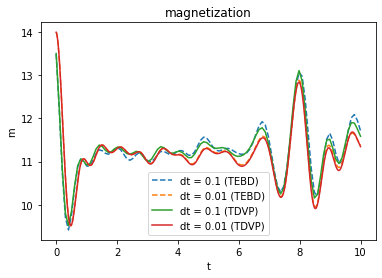

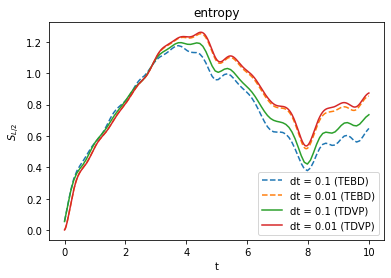

In [11]:
for i, dt in enumerate(dts_compare):
    N = (int)(np.ceil(t_stop/dt))
    ts = np.linspace(0, t_stop, N)
    plt.plot(ts, ms_compare[i], "--", label="dt = "+str(dt)+" (TEBD)")
for i, dt in enumerate(dts):
    N = (int)(np.ceil(t_stop/dt))
    ts = np.linspace(0, t_stop, N)
    plt.plot(ts, ms[i], label="dt = "+str(dt)+" (TDVP)")
plt.legend()
plt.title("magnetization")
plt.ylabel("m")
plt.xlabel("t")
plt.show()

for i, dt in enumerate(dts_compare):
    N = (int)(np.ceil(t_stop/dt))
    ts = np.linspace(0, t_stop, N)
    plt.plot(ts, entropies_compare[i], "--", label="dt = "+str(dt)+" (TEBD)")
for i, dt in enumerate(dts):
    N = (int)(np.ceil(t_stop/dt))
    ts = np.linspace(0, t_stop, N)
    plt.plot(ts, entropies[i], label="dt = "+str(dt)+" (TDVP)")
plt.legend()
plt.title("entropy")
plt.ylabel("$S_{L/2}$")
plt.xlabel("t")
plt.show()

TDVP achieves roughly the same results as TEBD, but is roughly 20 times slower.
The advantage of course is that TDVP works with MPOS and can therefore also describe long-range interactions in contrast to TEBD which can only describe nearest-neighbour interactions.